# Copy the relevant PDB files to a new folder & save the IDs for which you dont have the PDB files

In [1]:
%reset -f

In [ ]:
import os, shutil
with open ("D:\\PISCES results.txt") as file1: #this text file has a list of non-redundant PDB IDs along with their distinct chain IDs
    list1 = file1.readlines()

dict1 = dict()
for i in list1:
    dict1.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be a list containing the no. of distinct chains in that PDB ID
# print(len(dict1.keys()))
# print(dict1.keys())

list_ids = list()
path3 = "D:\\My Data\\Study Stuff\\My E-Books & Notes\\2. Lab Work\\20201120\\molprobity files containing MET\\batchz\\" #this folder contains ALL the molprobity files
for i in os.listdir(path1):
    list_ids.append(i[0:4].upper())
# print(list_ids)

set2 = set(dict1.keys()) & (set(list_ids)) #set2 will contain the PDB IDs for which I have the PDB files
# print(len(set2))

for i in set2: #I will copy the relevant PDB files to a new folder
    for j in os.listdir(path3):
        if i == j[0:4].upper():
            shutil.copy(path3 + j, "D:\\PDB files\\" + j)

set1 = set(dict1.keys()).difference(set(list_ids)) #set1 will contain the PDB IDs for which I dont have the PDB files
# print(len(set1))
with open("D:\\PDB files to be downloaded.txt", "a") as file2: #I will save these PDB IDs in a comma separated text file which I can use as query for PDB bulk download page
    for i in set1:
        file2.write(i + ",")

# WAP to remove the prefix "pdb" from the downloaded pdb files

In [ ]:
import os
import re
path = "D:\\New folder\\"
for i in os.listdir(path):
    match = re.search(r"(pdb)(.+)", i)
    if match:
        os.rename(path + i, path + match.group(2))

# Identify the files which could not get downloaded

In [ ]:
import os

with open ("D:\\PDB files to be downloaded.txt") as file1:
    list1 = file1.readlines()
list2 = list1[0].split(",")

list3 = os.listdir("D:\\New folder\\")
list4 = [i[0:4].upper() for i in list3]
print(set(list2).difference(set(list4)))

# Add hydrogens to downloaded PDB files using the molprobity

## For WSL Ubuntu

In [ ]:
import os
import subprocess

path_input_files  = "D:\\files_pdb\\"
path_input_files2 = "/mnt/d/files_pdb/"
path_output_files = "/mnt/d/files_molprobity/"
path_reduce       = "/home/prathvi/MolProbity-master/bin/linux/reduce" #WSl shell somehow doesn't recognizes the "reduce" command even after adding its alias in the bashrc so I will provide the full path of "reduce" file

for pdb_file in os.listdir(path_input_files):
    print("processing", pdb_file)
    output_filename  = pdb_file[0:len(pdb_file)-4] + "FH" + ".pdb"
    p1               = subprocess.Popen(["C:\\Windows\\System32\\wsl.exe", path_reduce, "-BUILD", path_input_files2 + pdb_file, ">", path_output_files + output_filename], #whitespaces are automatically added after each comma in the list
                                        stdout = subprocess.PIPE, 
                                        stderr = subprocess.PIPE, 
                                        shell = False)
    out, err = p1.communicate()
#     print(out.decode("utf-8")) #do not print the outputs of the reduce command as they are very long & can cause the notebook to hang
#     print(err.decode("utf-8"))

## For standalone Ubuntu

In [ ]:
import os
import subprocess

path_input_files  = "/home/rsankar/prathvi/files_pdb/"
path_output_files = "/home/rsankar/prathvi/files_molprobity/"

for pdb_file in os.listdir(path_input_files):
    print("processing", pdb_file)
    output_filename  = pdb_file[0:len(pdb_file)-4] + "FH" + ".pdb"
    p1               = subprocess.Popen("reduce -BUILD " + path_input_files + pdb_file + " > " + path_output_files + output_filename, stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True) #if "shell = False" is used, I get the "file not found error"
    out, err = p1.communicate()
#     print(out.decode("utf-8")) #do not print the outputs of the reduce command as they are very long & can cause the notebook to hang
#     print(err.decode("utf-8"))

# Move the hydrogen added files to a new directory & change their name format from "FHxxxx.ent" to "xxxxFH.pdb"

In [ ]:
import os, shutil,re

path1 = "D:\\AAAA\\"
path2 = "D:\\CCCC\\"
for i in os.listdir(path1):
    if i[0:2] == "FH":
        shutil.move(path1 + i, path2 + i)


for i in os.listdir(path2):
    match1 = re.search(r"(FH)(.+)(\.)(ent)", i)
    if match1:
        os.rename(path2 + i, path2 + match1.group(2) + "FH.pdb")

# Count the total number of polypeptide chains in the dataset <font color="red">(redundant number of chains)</font>

In [23]:
%reset -f

In [22]:
import os
from Bio.PDB import *

# molprobity_files = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
molprobity_files = "D:\\PhD Work\\Project 03\\files_pdb\\all molprobity files\\CIF+PDB\\"
pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)

ctr = 0
for molprobity_file in os.listdir(molprobity_files):
    print("processing", molprobity_file)
    structure = pdbparser.get_structure("protein", molprobity_files + molprobity_file)
    chains    = structure.get_chains()
    for chain in chains:
        ctr += 1
    # print(molprobity_file, ctr)
    # break

print("Total number of polypeptide chains in the dataset:", ctr)

processing 1a0sFH.pdb
processing 1a0tFH.pdb
processing 1af6FH.pdb
processing 1aqtFH.pdb
processing 1bh3FH.pdb
processing 1bl8FH.pdb
processing 1bmfFH.pdb
processing 1bt9FH.pdb
processing 1by3FH.pdb
processing 1by5FH.pdb
processing 1c8rFH.pdb
processing 1c8sFH.pdb
processing 1cowFH.pdb
processing 1e12FH.pdb
processing 1e54FH.pdb
processing 1efrFH.pdb
processing 1ehkFH.pdb
processing 1ek9FH.pdb
processing 1f02FH.pdb
processing 1fcpFH.pdb
processing 1fepFH.pdb
processing 1fi1FH.pdb
processing 1fw2FH.pdb
processing 1fw3FH.pdb
processing 1fx8FH.pdb
processing 1gfmFH.pdb
processing 1gfnFH.pdb
processing 1gfoFH.pdb
processing 1gfpFH.pdb
processing 1gfqFH.pdb
processing 1h2sFH.pdb
processing 1h68FH.pdb
processing 1h6sFH.pdb
processing 1hxtFH.pdb
processing 1hxuFH.pdb
processing 1hxxFH.pdb
processing 1hynFH.pdb
processing 1i78FH.pdb
processing 1ildFH.pdb
processing 1ilzFH.pdb
processing 1im0FH.pdb
processing 1iwoFH.pdb
processing 1j4nFH.pdb
processing 1jb0FH.pdb
processing 1k4cFH.pdb
processing

# Use PISCES server to identify non-redundant chains in each PDB file

In [39]:
# I originally used the PISCES server to do this but around the time I was trying to use this server for the TM dataset, I accepted the input but stopped sending me the results over email

# Use stride to generate files containing <font color="red">secondary structure</font> info for molprobity files

Stride doesn't work for CIF files. I reported this to sir and he said we will report whatever data we have.

Stride also generates phi psi values which match the phi psi values generated by chimeraX.

In [3]:
%reset -f

In [ ]:
import os
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import stride_sec_str_and_phi_psi_files_generator
import importlib
importlib.reload(stride_sec_str_and_phi_psi_files_generator)

path_stride_files1 = "D:\\files_stride_globular\\"
path_stride_files2 = "/mnt/d/files_stride_globular/"
if not os.path.isdir(path_stride_files1):
    os.makedirs(path_stride_files1)

path_molprobity_files  = "D:\\files_molprobity\\globular\\"
path_molprobity_files2 = "/mnt/d/files_molprobity/globular/" # see the function to know why I passed the molprobity files path twice
stride_sec_str_and_phi_psi_files_generator.file_generator(path_molprobity_files, path_molprobity_files2, path_stride_files2, path_stride_files1)

# Use Naccess to generate files containing <font color="red">SASA (in Åsquare)</font> info for molprobity files

<font color="red">NACCESS GENERATED EMPTY LOG FILES FOR THREE MOLPROBITY FILES: 4INDFH, 5W5RFH, 6F91FH because of the "max cubes exceeded" error </font>

In [1]:
%reset -f

In [ ]:
import os
import subprocess

path_molprobity_files  = "D:\\files_molprobity\\"
path_molprobity_files2 = "/mnt/d/files_molprobity/"

for pdb_file in os.listdir(path_molprobity_files):
    print("processing", pdb_file)
    p1 = subprocess.Popen(["C:\\Windows\\System32\\wsl.exe", "/home/prathvi/Naccess/naccess", path_molprobity_files2 + pdb_file], #whitespaces are automatically added after each comma in the list
                          stdout = subprocess.PIPE, 
                          stderr = subprocess.PIPE, 
                          shell = False) #the output files are created in the directory where the jupyter notebook is located and not where the source pdb files are located
    out, err = p1.communicate()
    print(out.decode("utf-8"))
    print(err.decode("utf-8"))


# Use chimeraX to generate files containing <font color="red">phi psi chi1</font> info for molprobity files

The code will generate 3 files per PDB file: pdbid_phi, pdbid_psi, pdbid_chi1

In [ ]:
#NOTE: The cell in which you execute this code will continue to run until you close chimera's GUI window.
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\ChimeraX\\bin\\ChimeraX.exe", "--script", "D:\\phi_psi_chi1_files_generator_chimeraX.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))

# Save the <font color="red">resolution</font> info for molprobity files

## Biopython method (fails for those PDB files which were created from CIF files)

In [ ]:
%reset -f

In [ ]:
from Bio.PDB import *
import os
import pandas as pd

dictdata  = dict()
ctr       = 0
pdbfiles  = "D:\\PhD Work\\Project 03\\files_pdb\\all molprobity files\\CIF+PDB\\"
pdbparser = PDBParser(PERMISSIVE = True, QUIET = True)
for i in os.listdir(pdbfiles):
    print("processing:", i)
    ctr += 1
    structure  = pdbparser.get_structure("protein", pdbfiles + i)
    resolution = structure.header.get("resolution")
    dictdata.setdefault("PDB ID",     []).append(i[0:4].upper())
    dictdata.setdefault("Resolution", []).append(resolution)

df1 = pd.DataFrame(dictdata)
df1.to_excel("D:\\PDB files with resolutions.xlsx", index = False, na_rep = "NA")
print("Total PDB files processed:", ctr,"/",len(os.listdir(pdbfiles)))

## Non-biopython method (works for PDB files that were created from CIF files)

In [15]:
%reset -f

In [ ]:
import os
import re
import json
import pandas as pd

dict_resolutions = dict()
dictdata         = dict()
dict_path_regex  = {
                    # "D:\\files_molprobity\\globular\\"              : r"(REMARK   2 RESOLUTION.)(\s+)(\d\.\d+)(\s+ANGSTROMS.)", 
                    "D:\\PhD Work\\Project 03\\files_pdb\\all molprobity files\\CIF original\\" : r"(_reflns.d_resolution_high)(\s+)(\d\.\d+)", #the "hybrid36" version of CIF molprobity files dont have the resolution info so I had to extract resolution separately from their original CIF files
                    }

for path_molprobity_files, regex in dict_path_regex.items():
    for pdb_file in os.listdir(path_molprobity_files):
        with open(path_molprobity_files + pdb_file) as file1:
            print("processing:", pdb_file)
            list1 = file1.readlines()
            file1.close()
            for line in list1:
                match1 = re.search(regex, line)
                if match1:
                    dict_resolutions.setdefault(pdb_file[0:4].upper(), float(match1.group(3))) #for both "pdb" and "cif" files, "match1.group(3)" contains the resolution
                    dictdata.setdefault("PDB ID",     []).append(pdb_file[0:4].upper())
                    dictdata.setdefault("Resolution", []).append(float(match1.group(3)))

#^######################################################################################################
#^ Save as JSON file:
#^######################################################################################################
dict_resolutions = dict(sorted(dict_resolutions.items()))
with open("D:\\PDb IDs with resolutions.json", 'w') as file1:
    json.dump(dict_resolutions, file1, indent = 1)

#^######################################################################################################
#^ Save as excel file:
#^######################################################################################################
df1 = pd.DataFrame(dictdata)
df1.to_excel("D:\\PDB IDs with resolutions.xlsx", index = False, na_rep = "NA")

#######################################################################################################
# Open the created dictionary
#######################################################################################################
# import json
# with open('D:\\molprobity files resolutions globular.json', 'r') as file1:
#     dict1 = json.load(file1)
# print(len(dict1))

processing: 4v8k.cif
processing: 4yuu.cif
processing: 6uwi.cif
processing: 6w1o.cif
processing: 6w1p.cif
processing: 6w1q.cif
processing: 6w1r.cif
processing: 6w1t.cif
processing: 6w1u.cif
processing: 6w1v.cif
processing: 6yvr.cif
processing: 6yy5.cif
processing: 6z2n.cif
processing: 6z33.cif
processing: 6z4q.cif
processing: 6z4v.cif
processing: 6z8n.cif
processing: 6za8.cif
processing: 6zin.cif
processing: 6zz5.cif
processing: 6zzh.cif
processing: 7a0g.cif
processing: 7obw.cif
processing: 7pj5.cif
processing: 7pp1.cif
processing: 7q7p.cif
processing: 7q7q.cif
processing: 7qij.cif
processing: 7rf1.cif
processing: 7rf2.cif
processing: 7rf4.cif
processing: 7rf5.cif
processing: 7rf6.cif
processing: 7rf7.cif
processing: 8a60.cif


# Generate an excel file containing the phi, psi, chi1, ssec, sasa, %SASA accessibility, all-atom occupancy, B-factor, disulfide bond status of all residues <font color="red">in distinct chains</font> of molprobity files <font color="red">(took 3270 mins or ~2.27 days to run)</font>.

The excel file will have one tab per residue type

For disulfide bond formation criteria, see workflow PPT

For CA atoms having occupancies < 1, there are 2 rows. Now which row's B-factor should be taken for calculation? See workflow PPT.

## The formula for calculation of normalized B-factor for a given residue takes into consideration the AVG and STDEV of B-factors of CA atoms of <font color="red">only the chain to which the residue belongs</font> (which I think is the wrong way to calculate B-factor)

In [6]:
import pandas as pd
import re
import os
import pprint
import statistics
import numpy as np
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^###################################################################################################
#^ CREATE A DICTIONARY WHOSE KEYS ARE PDB IDS AND VALUES ARE THEIR CORRESPONDING UNIQUE CHAINS:
#^###################################################################################################
with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as file2:
    listz = file2.readlines()
    file2.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID

pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)
molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
# molprobity_files = "D:\\New folder\\Project 02\\"
dictdata         = {'ALA': {}, 'ARG': {}, 'ASN': {}, 'ASP': {}, 'CYS': {}, 'GLN': {}, 'GLU': {}, 'GLY': {}, 'HIS': {}, 'ILE': {}, 'LEU': {}, 'LYS': {}, 'MET': {}, 'PHE': {}, 'PRO': {}, 'SER': {}, 'THR': {}, 'TRP': {}, 'TYR': {}, 'VAL': {}}
list_aas         = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

#^################################################################################################################################################################################################################################################
#^ Find the avg and standard deviation of B-factor of all the CA atoms of all the unique chains in the dataset (I am calculating them before anything else because these values will be used to calculate the normalized B-factors of residues):
#^################################################################################################################################################################################################################################################
dict_bfactor     = dict()
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity     = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        chains    =  structure.get_chains()
        for chain in chains:
            parent_chain_id = chain.get_id()
            if parent_chain_id in distinct_chains:
                list_b_factor_CA = list()
                residues         = chain.get_residues()
                for residue in residues:
                    if residue.get_resname() in list_aas and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ":
                        atoms = residue.get_atoms()
                        for atom in atoms:
                            if atom.get_name() == "CA":
                                list_b_factor_CA.append(atom.get_bfactor())

                avg_b_factor_CA   = round((sum(list_b_factor_CA) / len(list_b_factor_CA)), 2)
                stdev_b_factor_CA = round(statistics.stdev(list_b_factor_CA), 2) # I am using "statistics.stdev()" and not "np.std()" because former calculates SD using the sample formula while latter calculates SD using the population formula
                dict_bfactor.setdefault("PDB ID",                                    []).append(pdb_id_molprobity[0:4].upper())
                dict_bfactor.setdefault("Chain",                                     []).append(parent_chain_id)
                dict_bfactor.setdefault("Average B-factor of CA atoms in the chain", []).append(avg_b_factor_CA)
                dict_bfactor.setdefault("Stdev B-factor of CA atoms in the chain",   []).append(stdev_b_factor_CA)
df_summary_bfactor = pd.DataFrame(dict_bfactor)
df_summary_bfactor.sort_values("PDB ID", inplace = True)
print("B-factor dataframe construction complete. Proceeding further...")

#^###################################################################################################
#^ Iterate over the dictionary containing pdb id and chains:
#^###################################################################################################
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity   = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)
        #^##############################################################################################################
        #^ For the pdb file in the current iteration, create a list containing info about disulfide bonded cysteines:
        #^##############################################################################################################
        with open(molprobity_files + pdb_id_molprobity) as file2:
            list_ssbond = file2.readlines()
            file2.close()
            list_disulfides = list()
            for line_ssbond in list_ssbond:
                match_ssbond = re.search(r"(SSBOND)(\s\*{3}\s)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(\s+)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(.+)", line_ssbond) #this regex is written and tested to be valid for all "SSBOND" lines across the globular and tm dataset
                if match_ssbond:
                    if match_ssbond.group(3) == "CYS" and match_ssbond.group(9) == "CYS": # according to sir, ensure that you grab only those instances where a CYS is disulfide bonded to another CYS and not to a ligand such as CYS 192.A in pdb file 4U9O (possible ligands mentioned in regex)
                        list_temp = list() # each disulfide bonded CYS pair will be saved as a sublist
                        list_temp.append(str(match_ssbond.group(5))  + "." + str(match_ssbond.group(7)))  # "reschain" plus "resno" of 1st partner of disulfide bond in the SSBOND line
                        list_temp.append(str(match_ssbond.group(11)) + "." + str(match_ssbond.group(13))) # "reschain" plus "resno" of 2nd partner of disulfide bond in the SSBOND line
                        if list_temp not in list_disulfides: # in pdb files "1EB6", there are two SSBOND lines denoting the same disulfide bond because one of SG atoms involved has occupancy < 1. This line of code ensures that the final list has no duplicate sublists
                            list_disulfides.append(list_temp)
        # pprint.pprint(list_disulfides)
        #^##############################################################################################################
        #^ Open the current PDB file using biopython and grab relevant information about each residue:
        #^##############################################################################################################
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        chains =  structure.get_chains()
        for chain in chains:
            parent_chain_id = chain.get_id()
            if parent_chain_id in distinct_chains:
                residues = chain.get_residues()
                for residue in residues:
                    if residue.get_resname() == "CYS":
                        is_cys_disulfide_bonded    = False
                        cys_disulfide_bond_partner = "NA"
                        cys_disulfide_bond_partner_in_same_chain = "NA"
                        reschain_plus_resno     = str(residue.get_full_id()[2]) + "." + str(residue.get_full_id()[3][1]) # "reschain" plus "resno"
                        for sublist in list_disulfides:
                            if reschain_plus_resno in sublist:
                                is_cys_disulfide_bonded = True
                                for valz in sublist: #once you have found the sublist in which the "CYS" of the current iteration is present, find out its disulfide bonded partner & also find out whether it belongs to the same chain or not
                                    if reschain_plus_resno != valz:
                                        cys_disulfide_bond_partner = valz
                                        chain_id_of_partner  = cys_disulfide_bond_partner.split(".")[0]
                                        chain_id_of_original = reschain_plus_resno.split(".")[0]
                                        if chain_id_of_partner == chain_id_of_original:
                                            cys_disulfide_bond_partner_in_same_chain = True
                                        if chain_id_of_partner != chain_id_of_original:
                                            cys_disulfide_bond_partner_in_same_chain = False
                    #^#############################################################################################################
                    #^ Grab resname, resno, reschain, pdb id and disulfide bonded status info:
                    #^#############################################################################################################
                    if residue.get_resname() in dictdata.keys() and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ": #if the residue is non-heteroatom entity with no insertion code
                        dictdata[residue.get_resname()].setdefault("Resname",              []).append(residue.get_resname())
                        dictdata[residue.get_resname()].setdefault("Resno",                []).append(residue.get_full_id()[3][1])
                        dictdata[residue.get_resname()].setdefault("Reschain",             []).append(residue.get_full_id()[2])
                        dictdata[residue.get_resname()].setdefault("PDB ID",               []).append(pdb_id_molprobity[0:4].upper())
                        if residue.get_resname() == "CYS":
                            dictdata[residue.get_resname()].setdefault("CYS disulfide bonded",                          []).append(is_cys_disulfide_bonded)
                            dictdata[residue.get_resname()].setdefault("CYS disulfide bond partner",                    []).append(cys_disulfide_bond_partner)
                            dictdata[residue.get_resname()].setdefault("Is disulfide bonded partner in the same chain", []).append(cys_disulfide_bond_partner_in_same_chain)

                        #^#############################################################################################################
                        #^ Grab the normalized B-factors of residues and their all-atom occupancy:
                        #^#############################################################################################################
                        flag_occupancy    = True
                        atom_names        = str()
                        bfact_heavy_atoms = list()
                        for resatom in residue.get_atoms():
                            if resatom.get_occupancy() != 1:
                                atom_names = atom_names + resatom.get_name() + " "
                                flag_occupancy = False

                            if resatom.get_name()[0] != "H":
                                bfact_heavy_atoms.append(resatom.get_bfactor())

                        atom_names = atom_names[0:-1]
                        if flag_occupancy == True:
                            dictdata[residue.get_resname()].setdefault("All atom occupancy equals 1",      []).append(True)
                            dictdata[residue.get_resname()].setdefault("Atoms with occupancy less than 1", []).append("None")
                        if flag_occupancy == False:
                            dictdata[residue.get_resname()].setdefault("All atom occupancy equals 1",      []).append(False)
                            dictdata[residue.get_resname()].setdefault("Atoms with occupancy less than 1", []).append(atom_names)

                        avg_b_factor_heavy_atoms = round((sum(bfact_heavy_atoms) / len(bfact_heavy_atoms)), 2)
                        sum_b_factor_heavy_atoms = sum(bfact_heavy_atoms)

                        for w in df_summary_bfactor.itertuples():
                            bfact_pdb_id              = df_summary_bfactor.at[w[0], "PDB ID"]
                            bfact_chain               = df_summary_bfactor.at[w[0], "Chain"]
                            average_bfact_CA_all      = df_summary_bfactor.at[w[0], "Average B-factor of CA atoms in the chain"]
                            standard_dev_bfact_CA_all = df_summary_bfactor.at[w[0], "Stdev B-factor of CA atoms in the chain"]
                            if pdb_id_molprobity[0:4].upper() == bfact_pdb_id and parent_chain_id == bfact_chain:
                                norm_b_factor1 = round(((avg_b_factor_heavy_atoms - average_bfact_CA_all) / standard_dev_bfact_CA_all), 2)
                                norm_b_factor2 = round(((sum_b_factor_heavy_atoms - average_bfact_CA_all) / standard_dev_bfact_CA_all), 2)

                        dictdata[residue.get_resname()].setdefault("Average B-factor of all heavy atoms of donor residue",                          []).append(avg_b_factor_heavy_atoms)
                        dictdata[residue.get_resname()].setdefault("Sum B-factor of all heavy atoms of donor residue",                              []).append(sum_b_factor_heavy_atoms)
                        dictdata[residue.get_resname()].setdefault("Normalized B-factor based on average B-factor of heavy atoms of donor residue", []).append(norm_b_factor1)
                        dictdata[residue.get_resname()].setdefault("Normalized B-factor based on sum of B-factor of heavy atoms of donor residue",  []).append(norm_b_factor2)

                        #^#############################################################################################################
                        #^ Grab the phi psi chi1 angle info:
                        #^#############################################################################################################
                        path_phi_psi_chi1 = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_phi_psi_chi1_globular\\"
                        for phi_psi_chi1_file_name in os.listdir(path_phi_psi_chi1):

                            if pdb_id_molprobity[0:4].upper() == phi_psi_chi1_file_name[0:4].upper():
                                match_name = re.search(r"(\w{4})(_)(phi|psi|chi1)(\.defattr)", phi_psi_chi1_file_name)
                                if match_name:
                                    # print("PHI PSI CHI1 file found")
                                    colname = match_name.group(3)

                                with open(path_phi_psi_chi1 + phi_psi_chi1_file_name) as filez:
                                    listz = filez.readlines()
                                    filez.close()
                                    for line in listz:
                                        match_phi_psi_chi1 = re.search(r"(\t/)(\w+)(:)(-?\d+\w?)(\s+)(None|-?\d+\.\d+)", line)
                                        if match_phi_psi_chi1:
                                            if match_phi_psi_chi1.group(4) == str(residue.get_full_id()[3][1]) and match_phi_psi_chi1.group(2) == str(residue.get_full_id()[2]): # match resno and reschain
                                                if match_phi_psi_chi1.group(6) == "None": # the chi1 angle can be none in case a residue lacks a sidechain e.g., GLY
                                                    dictdata[residue.get_resname()].setdefault(colname + " angle (degrees)", []).append(match_phi_psi_chi1.group(6))
                                                if match_phi_psi_chi1.group(6) != "None":
                                                    dictdata[residue.get_resname()].setdefault(colname + " angle (degrees)", []).append(round(float(match_phi_psi_chi1.group(6)), 2))
                                                break # if one of the atoms involved in chi1 angle calculation has occupancy < 1, such a residue will have >1 entry for chi1 angle in the chi1 angle file. In such a case, only append the 1st chi1 angle value to the dictionary and break the for loop

                        #^#############################################################################################################
                        #^ Grab the SASA info:
                        #^#############################################################################################################
                        path_naccess = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_naccess_globular\\"
                        for naccess_file_name in os.listdir(path_naccess):

                            if naccess_file_name[-4:] == ".rsa" and pdb_id_molprobity[0:4].upper() == naccess_file_name[0:4].upper():
                                # print("NACCESS file found")
                                with open(path_naccess + naccess_file_name) as filez:
                                    listz = filez.readlines()
                                    filez.close()
                                    if len(listz) == 0: # some Naccess rsa files are empty
                                        dictdata[residue.get_resname()].setdefault("SASA (Å)^2", []).append("Not available")
                                        dictdata[residue.get_resname()].setdefault("% SASA accessibility", []).append("Not available")
                                        dictdata[residue.get_resname()].setdefault("Residue location",     []).append("Not available")
                                        break
                                    if len(listz) != 0:
                                        flag_naccess = True
                                        for line in listz:
                                            match_naccess = re.search(r"(RES)(\s)(\w{3})(\s)(\w)(\s*)(-?\d+)(\w?\s+)(\d+\.\d+)(\s+)(\d+\.\d+)(\s+)(.+)", line) #this regex takes into consideration negative resnos (2OFZ), resno greater than 1000 (1C0P) and insertion codes (3BEI)
                                            if match_naccess:
                                                if str(match_naccess.group(7)) == str(residue.get_full_id()[3][1]) and str(match_naccess.group(5)) == str(residue.get_full_id()[2]): # match resno & reschain
                                                    flag_naccess          = False
                                                    percent_accessibility = float(match_naccess.group(11))
                                                    if percent_accessibility < 5:
                                                        residue_location = "Buried"
                                                    if percent_accessibility >=5 and percent_accessibility <=25:
                                                        residue_location = "Partially buried"
                                                    if percent_accessibility > 25:
                                                        residue_location = "Exposed"
                                                    dictdata[residue.get_resname()].setdefault("SASA (Å)^2",           []).append(round(float(match_naccess.group(9)), 2))
                                                    dictdata[residue.get_resname()].setdefault("% SASA accessibility", []).append(percent_accessibility)
                                                    dictdata[residue.get_resname()].setdefault("Residue location",     []).append(residue_location)
                                                    break
                                        if flag_naccess == True:
                                            dictdata[residue.get_resname()].setdefault("SASA (Å)^2",           []).append("Not available")
                                            dictdata[residue.get_resname()].setdefault("% SASA accessibility", []).append("Not available")
                                            dictdata[residue.get_resname()].setdefault("Residue location",     []).append("Not available")

                        #^#############################################################################################################
                        #^ Grab the SSEC info:
                        #^#############################################################################################################
                        path_stride = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_stride_globular\\"
                        flag_stride_file_not_found = True
                        for stride_file_name in os.listdir(path_stride):

                            if pdb_id_molprobity[0:4].upper() == stride_file_name[0:4].upper():
                                # print("Stride file found")
                                flag_stride_file_not_found = False

                                with open(path_stride + stride_file_name) as filez:
                                    listz = filez.readlines()
                                    filez.close()
                                    flag_stride_resinfo_not_found = True
                                    for line in listz:
                                        match_stride = re.search(r"(ASG)(\s{2})(\w{3})(\s|\w{2}\s)(\w)(\s+)(-?\d+)(\w?\s+)(\d+)(\s+)(\w)(\s+)(\w+)(.+)", line)
                                        if match_stride:
                                            if str(match_stride.group(7)) == str(residue.get_full_id()[3][1]) and str(match_stride.group(5)) == str(residue.get_full_id()[2]): # match resno & reschain
                                                flag_stride_resinfo_not_found = False
                                                dictdata[residue.get_resname()].setdefault("Sec. structure", []).append(match_stride.group(13))
                                                break
                                    if flag_stride_resinfo_not_found == True: # in some cases, the ssec info of a residue isnt there
                                        dictdata[residue.get_resname()].setdefault("Sec. structure", []).append("Not available")
                        if flag_stride_file_not_found == True: # in some cases, Stride doesn't generate output file
                            dictdata[residue.get_resname()].setdefault("Sec. structure", []).append("Not available")

workbook_path      = "D:\\Globular residuewise info of all residues in distinct chains.xlsx"
dict_summary_count = dict()
dict_summary_sasa  = dict()
dict_summary_ssec  = {"Col1": ["310Helix", "AlphaHelix", "Bridge", "Coil", "PiHelix", "Strand", "Turn"], 'ALA': [], 'ARG': [], 'ASN': [], 'ASP': [], 'CYS': [], 'GLN': [], 'GLU': [], 'GLY': [], 'HIS': [], 'ILE': [], 'LEU': [], 'LYS': [], 'MET': [], 'PHE': [], 'PRO': [], 'SER': [], 'THR': [], 'TRP': [], 'TYR': [], 'VAL': []}
# in the above dictionary, each aacid's list will store the total instances where that aacid occurs in "310Helix", the total instances where that aacid occurs in "AlphaHelix" and so on

with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
    for aacid_name, value in dictdata.items():
        # for x,y in value.items():
        #     print(x, len(value[x]))
        df1 = pd.DataFrame(value)
        df1.sort_values("PDB ID", inplace = True)
        df1.to_excel(writer, sheet_name = aacid_name, index = False, na_rep = "NA")

        # create a dataframe containing the count of each residue in the dataset
        dict_summary_count.setdefault("Residue",                                                       []).append(aacid_name)
        dict_summary_count.setdefault("Total Count in distinct chains",                                []).append(len(df1))
        dict_summary_count.setdefault("Total Count in distinct chains where all atom occupancy is 1",  []).append(len([i for i in df1["All atom occupancy equals 1"] if i == True]))

        # create a dataframe containing ssec info of each residue in the dataset
        for ssec_type in dict_summary_ssec["Col1"]:
            dict_summary_ssec[aacid_name].append(df1["Sec. structure"].value_counts().get(ssec_type, 0))

        # create a dataframe containing average SASA info of each residue in the dataset
        dict_summary_sasa.setdefault("Residue",            []).append(aacid_name)
        dict_summary_sasa.setdefault("Average SASA (Å)^2 of the residue in unique chains", []).append(round(pd.Series([i for i in df1["SASA (Å)^2"] if i != "Not available"]).mean(), 2))

    # save the summary dataframes to excel file
    df_summary_count = pd.DataFrame(dict_summary_count)
    df_summary_count.sort_values("Total Count in distinct chains", inplace = True)
    df_summary_count.to_excel(writer, sheet_name = "Summary_count", index = False, na_rep = "NA")

    df_summary_sasa = pd.DataFrame(dict_summary_sasa)
    df_summary_sasa.sort_values("Average SASA (Å)^2 of the residue in unique chains", inplace = True)
    df_summary_sasa.to_excel(writer, sheet_name = "Summary_sasa", index = False, na_rep = "NA")

    df_summary_ssec = pd.DataFrame(dict_summary_ssec)
    df_summary_ssec.to_excel(writer, sheet_name = "Summary_ssec", index = False, na_rep = "NA")

    df_summary_bfactor.to_excel(writer, sheet_name = "B_factor_avg_std", index = False, na_rep = "NA") # this dataframe has been created in the very beginning

range_to_table.range_to_table(workbook_path)

B-factor dataframe construction complete. Proceeding further...
processing: 7odcFH.pdb
processing: 5lwaFH.pdb
processing: 5o1lFH.pdb
processing: 2qudFH.pdb
processing: 3t47_1FH.pdb
processing: 3zsjFH.pdb
processing: 5an4FH.pdb
processing: 3l1nFH.pdb
processing: 5m1pFH.pdb
processing: 5ttyFH.pdb
processing: 4apxFH.pdb
processing: 3e2qFH.pdb
processing: 3bomFH.pdb
processing: 3bsoFH.pdb
processing: 3m0zFH.pdb
processing: 5w4a1FH.pdb
processing: 4uqzFH.pdb
processing: 2gpiFH.pdb
processing: 3ha2FH.pdb
processing: 3ak8FH.pdb
processing: 3gydFH.pdb
processing: 5dofFH.pdb
processing: 3ebtFH.pdb
processing: 5oj5FH.pdb
processing: 2waoFH.pdb
processing: 6k7zFH.pdb
processing: 6atrFH.pdb
processing: 2nwrFH.pdb
processing: 4uc1FH.pdb
processing: 4hvtFH.pdb
processing: 6bkaFH.pdb
processing: 2xzeFH.pdb
processing: 6f9oFH.pdb
processing: 1t9hFH.pdb
processing: 3wydFH.pdb
processing: 1tif1FH.pdb
processing: 3c4sFH.ent
processing: 6nftFH.pdb
processing: 6h1hFH.pdb
processing: 3ub6FH.pdb
processing: 

## The formula for calculation of normalized B-factor for a given residue takes into consideration the AVG and STDEV of B-factors of CA atoms of <font color="red">ALL the unique chains</font> and not just the chain to which the residue belongs

In [2]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
import re
import os
import pprint
import statistics
import math
import numpy as np
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^###################################################################################################
#^ CREATE A DICTIONARY WHOSE KEYS ARE PDB IDS AND VALUES ARE THEIR CORRESPONDING UNIQUE CHAINS:
#^###################################################################################################
with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as file2:
    listz = file2.readlines()
    file2.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID

pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)
molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
# molprobity_files = "D:\\New folder\\Project 02\\"
dictdata         = {'ALA': {}, 'ARG': {}, 'ASN': {}, 'ASP': {}, 'CYS': {}, 'GLN': {}, 'GLU': {}, 'GLY': {}, 'HIS': {}, 'ILE': {}, 'LEU': {}, 'LYS': {}, 'MET': {}, 'PHE': {}, 'PRO': {}, 'SER': {}, 'THR': {}, 'TRP': {}, 'TYR': {}, 'VAL': {}}
list_aas         = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

#^################################################################################################################################################################################################################################################
#^ Find the avg and standard deviation of B-factor of all the CA atoms of all the unique chains in the dataset (I am calculating them before anything else because these values will be used to calculate the normalized B-factors of residues):
#^################################################################################################################################################################################################################################################
print("Creating the dataframe which will store the average and standard deviationof CA atoms of all the unique chains of each PDB ID...")
dict_bfactor = dict()
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity     = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        structure          = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        chains             =  structure.get_chains()
        list_unique_chains = list()
        list_b_factor_CA   = list()
        for chain in chains:
            parent_chain_id = chain.get_id()
            if parent_chain_id in distinct_chains:
                list_unique_chains.append(parent_chain_id)
                residues = chain.get_residues()
                for residue in residues:
                    if residue.get_resname() in list_aas and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ":
                        atoms = residue.get_atoms()
                        for atom in atoms:
                            if atom.get_name() == "CA":
                                list_b_factor_CA.append(atom.get_bfactor())

        avg_b_factor_CA   = round((sum(list_b_factor_CA) / len(list_b_factor_CA)), 2)
        stdev_b_factor_CA = round(statistics.stdev(list_b_factor_CA), 2) # I am using "statistics.stdev()" and not "np.std()" because former calculates SD using the sample formula while latter calculates SD using the population formula
        dict_bfactor.setdefault("PDB ID",                                           []).append(pdb_id_molprobity[0:4].upper())
        dict_bfactor.setdefault("Unique chains",                                    []).append(",".join(list_unique_chains))
        dict_bfactor.setdefault("Average of B-factor of CA atoms in unique chains", []).append(avg_b_factor_CA)
        dict_bfactor.setdefault("Stdev of B-factor of CA atoms in unique chains",   []).append(stdev_b_factor_CA)

df_summary_bfactor = pd.DataFrame(dict_bfactor)
df_summary_bfactor.sort_values("PDB ID", inplace = True)
print("Dataframe construction complete. Proceeding further...")

#^###################################################################################################
#^ Iterate over the dictionary containing pdb id and chains:
#^###################################################################################################
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity   = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)
        #^##############################################################################################################
        #^ For the pdb file in the current iteration, create a list containing info about disulfide bonded cysteines:
        #^##############################################################################################################
        with open(molprobity_files + pdb_id_molprobity) as file2:
            list_ssbond = file2.readlines()
            file2.close()
            list_disulfides = list()
            for line_ssbond in list_ssbond:
                match_ssbond = re.search(r"(SSBOND)(\s\*{3}\s)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(\s+)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(.+)", line_ssbond) #this regex is written and tested to be valid for all "SSBOND" lines across the globular and tm dataset
                if match_ssbond:
                    if match_ssbond.group(3) == "CYS" and match_ssbond.group(9) == "CYS": # according to sir, ensure that you grab only those instances where a CYS is disulfide bonded to another CYS and not to a ligand such as CYS 192.A in pdb file 4U9O (possible ligands mentioned in regex)
                        list_temp = list() # each disulfide bonded CYS pair will be saved as a sublist
                        list_temp.append(str(match_ssbond.group(5))  + "." + str(match_ssbond.group(7)))  # "reschain" plus "resno" of 1st partner of disulfide bond in the SSBOND line
                        list_temp.append(str(match_ssbond.group(11)) + "." + str(match_ssbond.group(13))) # "reschain" plus "resno" of 2nd partner of disulfide bond in the SSBOND line
                        if list_temp not in list_disulfides: # in pdb files "1EB6", there are two SSBOND lines denoting the same disulfide bond because one of SG atoms involved has occupancy < 1. This line of code ensures that the final list has no duplicate sublists
                            list_disulfides.append(list_temp)
        # pprint.pprint(list_disulfides)
        #^##############################################################################################################
        #^ Open the current PDB file using biopython and grab relevant information about each residue:
        #^##############################################################################################################
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        chains =  structure.get_chains()
        for chain in chains:
            parent_chain_id = chain.get_id()
            if parent_chain_id in distinct_chains:
                residues = chain.get_residues()
                for residue in residues:
                    if residue.get_resname() == "CYS":
                        is_cys_disulfide_bonded    = False
                        cys_disulfide_bond_partner = "NA"
                        cys_disulfide_bond_partner_in_same_chain = "NA"
                        reschain_plus_resno     = str(residue.get_full_id()[2]) + "." + str(residue.get_full_id()[3][1]) # "reschain" plus "resno"
                        for sublist in list_disulfides:
                            if reschain_plus_resno in sublist:
                                is_cys_disulfide_bonded = True
                                for valz in sublist: #once you have found the sublist in which the "CYS" of the current iteration is present, find out its disulfide bonded partner & also find out whether it belongs to the same chain or not
                                    if reschain_plus_resno != valz:
                                        cys_disulfide_bond_partner = valz
                                        chain_id_of_partner  = cys_disulfide_bond_partner.split(".")[0]
                                        chain_id_of_original = reschain_plus_resno.split(".")[0]
                                        if chain_id_of_partner == chain_id_of_original:
                                            cys_disulfide_bond_partner_in_same_chain = True
                                        if chain_id_of_partner != chain_id_of_original:
                                            cys_disulfide_bond_partner_in_same_chain = False
                    #^#############################################################################################################
                    #^ Grab resname, resno, reschain, pdb id and disulfide bonded status info:
                    #^#############################################################################################################
                    if residue.get_resname() in dictdata.keys() and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ": #if the residue is non-heteroatom entity with no insertion code
                        dictdata[residue.get_resname()].setdefault("Resname",              []).append(residue.get_resname())
                        dictdata[residue.get_resname()].setdefault("Resno",                []).append(residue.get_full_id()[3][1])
                        dictdata[residue.get_resname()].setdefault("Reschain",             []).append(residue.get_full_id()[2])
                        dictdata[residue.get_resname()].setdefault("PDB ID",               []).append(pdb_id_molprobity[0:4].upper())
                        dictdata[residue.get_resname()].setdefault("Resinfo",              []).append(pdb_id_molprobity[0:4].upper() + "_" + residue.get_resname() + "_" + str(residue.get_full_id()[3][1]) + "_" + residue.get_full_id()[2])
                        if residue.get_resname() == "CYS":
                            dictdata[residue.get_resname()].setdefault("CYS disulfide bonded",                          []).append(is_cys_disulfide_bonded)
                            dictdata[residue.get_resname()].setdefault("CYS disulfide bond partner",                    []).append(cys_disulfide_bond_partner)
                            dictdata[residue.get_resname()].setdefault("Is disulfide bonded partner in the same chain", []).append(cys_disulfide_bond_partner_in_same_chain)

                        #^#############################################################################################################
                        #^ Grab the B-factors of residues and their all-atom occupancy and calculate the normalized B-factors:
                        #^#############################################################################################################
                        flag_occupancy    = True
                        atom_names        = str()
                        bfact_heavy_atoms = list()
                        for resatom in residue.get_atoms():
                            if resatom.get_occupancy() != 1:
                                atom_names = atom_names + resatom.get_name() + " "
                                flag_occupancy = False

                            if resatom.get_name()[0] != "H":
                                bfact_heavy_atoms.append(resatom.get_bfactor())

                        atom_names = atom_names[0:-1]
                        if flag_occupancy == True:
                            dictdata[residue.get_resname()].setdefault("All atom occupancy equals 1",      []).append(True)
                            dictdata[residue.get_resname()].setdefault("Atoms with occupancy less than 1", []).append("None")
                        if flag_occupancy == False:
                            dictdata[residue.get_resname()].setdefault("All atom occupancy equals 1",      []).append(False)
                            dictdata[residue.get_resname()].setdefault("Atoms with occupancy less than 1", []).append(atom_names)

                        avg_b_factor_heavy_atoms = round((sum(bfact_heavy_atoms) / len(bfact_heavy_atoms)), 2)
                        sum_b_factor_heavy_atoms = sum(bfact_heavy_atoms)

                        for w in df_summary_bfactor.itertuples():
                            bfact_pdb_id              = df_summary_bfactor.at[w[0],  "PDB ID"]
                            bfact_chain               = (df_summary_bfactor.at[w[0], "Unique chains"]).split(",")
                            average_bfact_CA_all      = df_summary_bfactor.at[w[0],  "Average of B-factor of CA atoms in unique chains"]
                            standard_dev_bfact_CA_all = df_summary_bfactor.at[w[0],  "Stdev of B-factor of CA atoms in unique chains"]
                            if pdb_id_molprobity[0:4].upper() == bfact_pdb_id and parent_chain_id in bfact_chain:
                                norm_b_factor1 = round(((avg_b_factor_heavy_atoms - average_bfact_CA_all) / standard_dev_bfact_CA_all), 2)

                        dictdata[residue.get_resname()].setdefault("Average of B-factor of all heavy atoms of donor residue", []).append(avg_b_factor_heavy_atoms) # why I am saving this value? Because I want to save all the variables that go into the calculation of the normalized B-factor so that I can crosscheck them manually if needed
                        dictdata[residue.get_resname()].setdefault("Normalized B-factor of donor residue",                    []).append(norm_b_factor1)

                        #^#############################################################################################################
                        #^ Grab the phi psi chi1 angle info:
                        #^#############################################################################################################
                        path_phi_psi_chi1 = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_phi_psi_chi1_globular\\"
                        for phi_psi_chi1_file_name in os.listdir(path_phi_psi_chi1):

                            if pdb_id_molprobity[0:4].upper() == phi_psi_chi1_file_name[0:4].upper():
                                match_name = re.search(r"(\w{4})(_)(phi|psi|chi1)(\.defattr)", phi_psi_chi1_file_name)
                                if match_name:
                                    # print("PHI PSI CHI1 file found")
                                    colname = match_name.group(3)

                                with open(path_phi_psi_chi1 + phi_psi_chi1_file_name) as filez:
                                    listz = filez.readlines()
                                    filez.close()
                                    for line in listz:
                                        match_phi_psi_chi1 = re.search(r"(\t/)(\w+)(:)(-?\d+\w?)(\s+)(None|-?\d+\.\d+)", line)
                                        if match_phi_psi_chi1:
                                            if match_phi_psi_chi1.group(4) == str(residue.get_full_id()[3][1]) and match_phi_psi_chi1.group(2) == str(residue.get_full_id()[2]): # match resno and reschain
                                                if match_phi_psi_chi1.group(6) == "None": # the chi1 angle can be none in case a residue lacks a sidechain e.g., GLY
                                                    dictdata[residue.get_resname()].setdefault(colname + " angle (degrees)", []).append(match_phi_psi_chi1.group(6))
                                                if match_phi_psi_chi1.group(6) != "None":
                                                    dictdata[residue.get_resname()].setdefault(colname + " angle (degrees)", []).append(round(float(match_phi_psi_chi1.group(6)), 2))
                                                break # if one of the atoms involved in chi1 angle calculation has occupancy < 1, such a residue will have >1 entry for chi1 angle in the chi1 angle file. In such a case, only append the 1st chi1 angle value to the dictionary and break the for loop

                        #^#############################################################################################################
                        #^ Grab the SASA, %SASA accessibility and residue location info:
                        #^#############################################################################################################
                        path_naccess = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_naccess_globular\\"
                        for naccess_file_name in os.listdir(path_naccess):

                            if naccess_file_name[-4:] == ".rsa" and pdb_id_molprobity[0:4].upper() == naccess_file_name[0:4].upper():
                                # print("NACCESS file found")
                                with open(path_naccess + naccess_file_name) as filez:
                                    listz = filez.readlines()
                                    filez.close()
                                    if len(listz) == 0: # some Naccess rsa files are empty
                                        dictdata[residue.get_resname()].setdefault("SASA (Å)^2", []).append("Not available")
                                        dictdata[residue.get_resname()].setdefault("% SASA accessibility", []).append("Not available")
                                        dictdata[residue.get_resname()].setdefault("Residue location",     []).append("Not available")
                                        break
                                    if len(listz) != 0:
                                        flag_naccess = True
                                        for line in listz:
                                            match_naccess = re.search(r"(RES)(\s)(\w{3})(\s)(\w)(\s*)(-?\d+)(\w?\s+)(\d+\.\d+)(\s+)(\d+\.\d+)(\s+)(.+)", line) #this regex takes into consideration negative resnos (2OFZ), resno greater than 1000 (1C0P) and insertion codes (3BEI)
                                            if match_naccess:
                                                if str(match_naccess.group(7)) == str(residue.get_full_id()[3][1]) and str(match_naccess.group(5)) == str(residue.get_full_id()[2]): # match resno & reschain
                                                    flag_naccess          = False
                                                    percent_accessibility = float(match_naccess.group(11))
                                                    if percent_accessibility < 5: # percentage accessibility is the SASA of a residue-X relative to the residue-X in an extended ALA-X-ALA conformation. The percent criteria are taken from page 3 of the paper: Kajander et al. (Structure 8, 1203-1214, 2000)
                                                        residue_location = "Buried"
                                                    if percent_accessibility >=5 and percent_accessibility <=25:
                                                        residue_location = "Partially buried"
                                                    if percent_accessibility > 25:
                                                        residue_location = "Exposed"
                                                    dictdata[residue.get_resname()].setdefault("SASA (Å)^2",           []).append(round(float(match_naccess.group(9)), 2))
                                                    dictdata[residue.get_resname()].setdefault("% SASA accessibility", []).append(percent_accessibility)
                                                    dictdata[residue.get_resname()].setdefault("Residue location",     []).append(residue_location)
                                                    break
                                        if flag_naccess == True:
                                            dictdata[residue.get_resname()].setdefault("SASA (Å)^2",           []).append("Not available")
                                            dictdata[residue.get_resname()].setdefault("% SASA accessibility", []).append("Not available")
                                            dictdata[residue.get_resname()].setdefault("Residue location",     []).append("Not available")

                        #^#############################################################################################################
                        #^ Grab the SSEC info:
                        #^#############################################################################################################
                        path_stride = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_stride_globular\\"
                        flag_stride_file_not_found = True
                        for stride_file_name in os.listdir(path_stride):

                            if pdb_id_molprobity[0:4].upper() == stride_file_name[0:4].upper():
                                # print("Stride file found")
                                flag_stride_file_not_found = False

                                with open(path_stride + stride_file_name) as filez:
                                    listz = filez.readlines()
                                    filez.close()
                                    flag_stride_resinfo_not_found = True
                                    for line in listz:
                                        match_stride = re.search(r"(ASG)(\s{2})(\w{3})(\s|\w{2}\s)(\w)(\s+)(-?\d+)(\w?\s+)(\d+)(\s+)(\w)(\s+)(\w+)(.+)", line)
                                        if match_stride:
                                            if str(match_stride.group(7)) == str(residue.get_full_id()[3][1]) and str(match_stride.group(5)) == str(residue.get_full_id()[2]): # match resno & reschain
                                                flag_stride_resinfo_not_found = False
                                                dictdata[residue.get_resname()].setdefault("Sec. structure", []).append(match_stride.group(13))
                                                break
                                    if flag_stride_resinfo_not_found == True: # in some cases, the ssec info of a residue isnt there
                                        dictdata[residue.get_resname()].setdefault("Sec. structure", []).append("Not available")
                        if flag_stride_file_not_found == True: # in some cases, Stride doesn't generate output file
                            dictdata[residue.get_resname()].setdefault("Sec. structure", []).append("Not available")

workbook_path         = "D:\\Globular residuewise info of all residues in distinct chains.xlsx"
dict_summary_count    = dict()
dict_summary_sasa     = dict()
dict_summary_ssec  = {"Col1": ["310Helix", "AlphaHelix", "Bridge", "Coil", "PiHelix", "Strand", "Turn"], 'ALA': [], 'ARG': [], 'ASN': [], 'ASP': [], 'CYS': [], 'GLN': [], 'GLU': [], 'GLY': [], 'HIS': [], 'ILE': [], 'LEU': [], 'LYS': [], 'MET': [], 'PHE': [], 'PRO': [], 'SER': [], 'THR': [], 'TRP': [], 'TYR': [], 'VAL': []}
# in the above dictionary, each aacid's list will store the total instances where that aacid occurs in "310Helix", the total instances where that aacid occurs in "AlphaHelix" and so on

with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
    for aacid_name, value in dictdata.items():
        # for x,y in value.items():
        #     print(x, len(value[x]))
        df1 = pd.DataFrame(value)
        df1.sort_values("PDB ID", inplace = True)
        df1.to_excel(writer, sheet_name = aacid_name, index = False, na_rep = "Not available")

        #^######################################################################################
        #^ create a dataframe containing the count of each residue in the dataset:
        #^######################################################################################
        dict_summary_count.setdefault("Residue",                                                       []).append(aacid_name)
        dict_summary_count.setdefault("Total Count in distinct chains",                                []).append(len(df1))
        dict_summary_count.setdefault("Total Count in distinct chains where all atom occupancy is 1",  []).append(len([i for i in df1["All atom occupancy equals 1"] if i == True]))
        
        #^######################################################################################
        #^ create a dataframe containing ssec info of each residue in the dataset:
        #^######################################################################################
        for ssec_type in dict_summary_ssec["Col1"]:
            dict_summary_ssec[aacid_name].append(df1["Sec. structure"].value_counts().get(ssec_type, 0))

        #^######################################################################################
        #^ create a dataframe containing average SASA info of each residue in the dataset:
        #^######################################################################################
        dict_summary_sasa.setdefault("Residue",            []).append(aacid_name)
        dict_summary_sasa.setdefault("Average SASA (Å)^2 of the residue in unique chains", []).append(round(pd.Series([i for i in df1["SASA (Å)^2"] if i != "Not available"]).mean(), 2))

    df_summary_count = pd.DataFrame(dict_summary_count)
    df_summary_count.sort_values("Total Count in distinct chains", inplace = True)
    df_summary_count.to_excel(writer, sheet_name = "Summary_count", index = False, na_rep = "Not available")

    df_summary_sasa = pd.DataFrame(dict_summary_sasa)
    df_summary_sasa.sort_values("Average SASA (Å)^2 of the residue in unique chains", inplace = True)
    df_summary_sasa.to_excel(writer, sheet_name = "Summary_sasa", index = False, na_rep = "Not available")

    df_summary_ssec = pd.DataFrame(dict_summary_ssec)
    df_summary_ssec.to_excel(writer, sheet_name = "Summary_ssec", index = False, na_rep = "Not available")

    df_summary_bfactor.to_excel(writer, sheet_name = "B_factor_avg_std", index = False, na_rep = "Not available") # this dataframe has been created in the very beginning

range_to_table.range_to_table(workbook_path)

Creating the dataframe which will store the average and standard deviationof CA atoms of all the unique chains of each PDB ID...
Dataframe construction complete. Proceeding further...
processing: 7odcFH.pdb
processing: 5lwaFH.pdb
processing: 5o1lFH.pdb
processing: 2qudFH.pdb
processing: 3t47_1FH.pdb
processing: 3zsjFH.pdb
processing: 5an4FH.pdb
processing: 3l1nFH.pdb
processing: 5m1pFH.pdb
processing: 5ttyFH.pdb
processing: 4apxFH.pdb
processing: 3e2qFH.pdb
processing: 3bomFH.pdb
processing: 3bsoFH.pdb
processing: 3m0zFH.pdb
processing: 5w4a1FH.pdb
processing: 4uqzFH.pdb
processing: 2gpiFH.pdb
processing: 3ha2FH.pdb
processing: 3ak8FH.pdb
processing: 3gydFH.pdb
processing: 5dofFH.pdb
processing: 3ebtFH.pdb
processing: 5oj5FH.pdb
processing: 2waoFH.pdb
processing: 6k7zFH.pdb
processing: 6atrFH.pdb
processing: 2nwrFH.pdb
processing: 4uc1FH.pdb
processing: 4hvtFH.pdb
processing: 6bkaFH.pdb
processing: 2xzeFH.pdb
processing: 6f9oFH.pdb
processing: 1t9hFH.pdb
processing: 3wydFH.pdb
processi

In [3]:
%reset -f

# Find residuewise count of all residues <font color="red">in non-redundant chains</font> of the dataset

In [62]:
%reset -f

In [ ]:
import re
import os
import pprint
import pandas as pd
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

dict1    = {'ALA': "A", 
            'ARG': "R", 
            'ASN': "N", 
            'ASP': "D", 
            'CYS': "C", 
            'GLN': "Q", 
            'GLU': "E", 
            'GLY': "G", 
            'HIS': "H", 
            'ILE': "I", 
            'LEU': "L", 
            'LYS': "K", 
            'MET': "M", 
            'PHE': "F", 
            'PRO': "P", 
            'SER': "S", 
            'THR': "T", 
            'TRP': "W", 
            'TYR': "Y", 
            'VAL': "V"}

dictdata = {key : {} for key, value in dict1.items()}
pdbparser = PDBParser(PERMISSIVE = True, QUIET = True)
#^################################################################################################
#^ Create a dictionary containing PDB IDs and their cooresponding unique chains:
#^################################################################################################
molprobity_files = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
with open ("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as file1:
    list1 = file1.readlines()
    list1 = sorted(list1)
    file1.close()
    dict_id_chains = dict()
    for i in list1:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
    # print(len(dict_id_chains.keys()))
    # print(dict_id_chains.keys())

#^############################################################################################################
#^ Iterate over each non-redundant chain of each PDB ID in the dictionary and save each residue's info:
#^############################################################################################################
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) # "pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        residues  = structure.get_residues()
        for residue in residues:
            if residue.get_resname() in dict1.keys() and residue.get_full_id()[2] in distinct_chains and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ": #if the residue belongs to a unique chain & is a non-heteroatom entity & has no insertion code
                dictdata[residue.get_resname()].setdefault("PDB ID",               []).append(pdb_id_molprobity[0:4].upper()) # I had to split the residue data across several sheets because all the data was not fitting in a single sheet
                dictdata[residue.get_resname()].setdefault("Chain ID",             []).append(residue.get_full_id()[2])
                dictdata[residue.get_resname()].setdefault("PDB ID/Chain ID",      []).append(pdb_id_molprobity[0:4].upper() + "/" + residue.get_full_id()[2])
                dictdata[residue.get_resname()].setdefault("Resname (3 letters)",  []).append(residue.get_resname())
                dictdata[residue.get_resname()].setdefault("Resname (1 letter)",   []).append(dict1[residue.get_resname()])
                dictdata[residue.get_resname()].setdefault("Resno",                []).append(residue.get_full_id()[3][1])

workbook_path = "D:\\Resinfo of residues in non-redundant chains in globular dataset.xlsx"
dict_count    = dict()
with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dictdata.items():
        df1 = pd.DataFrame(value)
        df1.sort_values("PDB ID", inplace = True)
        df1.to_excel(writer, sheet_name = key, index = False, na_rep = "NA")
        dict_count.setdefault("Residue",                                        []).append(key)
        dict_count.setdefault("Total count of residue in non-redundant chains", []).append(len(df1))
    df_count = pd.DataFrame(dict_count)
    df_count.sort_values("Total count of residue in non-redundant chains", inplace = True)
    df_count.to_excel(writer, sheet_name = "Counts", index = False, na_rep = "NA")

range_to_table.range_to_table(workbook_path)

processing: 1a62FH.pdb
processing: 1aqzFH.pdb
processing: 1atgFH.pdb
processing: 1atzFH.pdb
processing: 1bkbFH.pdb
processing: 1bkrFH.pdb
processing: 1bu8FH.pdb
processing: 1bx7FH.pdb
processing: 1c0pFH.pdb
processing: 1c1dFH.pdb
processing: 1c3cFH.pdb
processing: 1c4qFH.pdb
processing: 1c7kFH.pdb
processing: 1c7sFH.pdb
processing: 1ccwFH.pdb
processing: 1cex1FH.pdb
processing: 1chdFH.pdb
processing: 1cipFH.pdb
processing: 1cv8FH.pdb
processing: 1cxqFH.pdb
processing: 1d02FH.pdb
processing: 1d0dFH.pdb
processing: 1d0qFH.pdb
processing: 1d2nFH.pdb
processing: 1d4oFH.pdb
processing: 1d5tFH.pdb
processing: 1d8wFH.pdb
processing: 1dcsFH.pdb
processing: 1dfmFH.pdb
processing: 1dfuFH.pdb
processing: 1dj0FH.pdb
processing: 1dmgFH.pdb
processing: 1dos1FH.pdb
processing: 1dowFH.pdb
processing: 1dp7FH.pdb
processing: 1dqgFH.pdb
processing: 1ds1FH.pdb
processing: 1dtdFH.pdb
processing: 1dusFH.pdb
processing: 1e2wFH.pdb
processing: 1e5kFH.pdb
processing: 1e6uFH.pdb
processing: 1eajFH.pdb
processin

In [60]:
%reset -f

# Create plots in <font color="red">residuewise info excel file</font>

In [ ]:
%reset -f

In [ ]:
import os
import re
import win32com.client as win32

vba_script_path = "G:\\My Drive\\python scripts and parameters\\VBA_script_for_charting_residuewise_data_excel_file.bas"
excel_file_path = "D:\\New folder\\"

excel_app         = win32.Dispatch("Excel.Application")
excel_app.Visible = False
####################################################
# OPEN EXCEL FILE:
####################################################
for excel_filename in os.listdir(excel_file_path):
    if excel_filename[-5:] == ".xlsx" and "Globular" in excel_filename:
        print("processing:", excel_filename)
        workbook = excel_app.Workbooks.Open(excel_file_path + excel_filename)
        ##################################################################
        # OPEN THE VBA SCRIPT AND MAKE A LIST OF ALL THE MACROS IN IT:
        ##################################################################
        with open(vba_script_path) as vba_file:
            vba_script = vba_file.readlines()
            vba_file.close()
            macro_names = list()
        for line in vba_script:
            match1 = re.search(r"(^Sub\s)(.+)(\(\))", line) #regex for reading the 1st line of each macro (which starts with the keyword "Sub" and ends with "()")
            if match1:
                macro_names.append(match1.group(2))
        macro_names = sorted(macro_names) # I have placed one alphabet in the beginning of each macro which will help in sorting
        ##################################################################
        # EXECUTE THE MACROS ONE BY ONE:
        ##################################################################
        workbook.VBProject.VBComponents.Import(vba_script_path)
        for macro_name in macro_names:
            excel_app.Run("{}.{}".format("Module1", macro_name)) # add all the macros in the same module named "Module1"
        workbook.Save()
        workbook.Close()
print("All excel files processed successfully!")
excel_app.Quit()

# Find H-bonds instances in distinct chains of PDB files

## Unified code where CYS, SER, THR sidechain groups act as <font color="red">donor</font> (took 3233mins)

In [14]:
%reset -f

In [8]:
import re
import os
import pprint
import json
import pandas as pd
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import post_processing
import h_bonds_cys_ser_thr_as_donor
import importlib
importlib.reload(post_processing)
importlib.reload(h_bonds_cys_ser_thr_as_donor)

#^###############################################################################################################################################################################################################################################################################################
with open("G:\\My Drive\\python scripts and parameters\\H-bonding parameters.json") as file1:
    dict1 = json.load(file1)

with open("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\molprobity files resolutions globular.json") as file_dict:
    dict_resolutions = json.load(file_dict)

dict_donor_and_hydrogen_atoms_ON      = dict1["dict_donor_and_hydrogen_atoms_ON"] #dict1 is a superdictionary
dict_donor_and_hydrogen_atoms_S       = dict1["dict_donor_and_hydrogen_atoms_S"]

dict_acceptor_and_antecedent_atoms_ON = dict1["dict_acceptor_and_antecedent_atoms_ON"]
dict_acceptor_and_antecedent_atoms_S  = dict1["dict_acceptor_and_antecedent_atoms_S"]

donor_atoms_ON    = tuple(dict_donor_and_hydrogen_atoms_ON.keys())
donor_atoms_S     = tuple(dict_donor_and_hydrogen_atoms_S.keys())
acceptor_atoms_ON = tuple(dict_acceptor_and_antecedent_atoms_ON.keys())
acceptor_atoms_S  = tuple(dict_acceptor_and_antecedent_atoms_S.keys())

dict_geom_crit    = {
                    donor_atoms_ON : {acceptor_atoms_ON:[4.0, 2.5, 90.0, 90.0],acceptor_atoms_S:[4.1, 3.2, 90.0, 80.0]}, 
                    donor_atoms_S  : {acceptor_atoms_ON:[4.3, 3.0, 90.0, 80.0],acceptor_atoms_S:[4.5, 3.3, 90.0, 80.0]}
                    }

dict_resnames_with_sidechain_donors = dict1["resnames_with_sidechain_donors"]
dictdata                            = {key:{} for key in dict_resnames_with_sidechain_donors.keys()}
dict_no_neighbors                   = dict()
relevant_neighbor_dist_cutoff       = 5
segments_relevant_chain             = None # there is no need for this variable. I am only using it to achieve code unification for TM and globular datasets

#^###############################################################################################################################################################################################################################################################################################
with open ("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
dict_id_chains = dict()
for i in listz:
    dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
# print(len(dict_id_chains.keys()))
# print(dict_id_chains.keys())    

molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\" #! having the term "Project 02" is critical in this path because I use it to discrimate between globular and tm datasets
# molprobity_files  = "D:\\New folder\\Project 02\\"
pdbparser = PDBParser(PERMISSIVE = 1, QUIET = True)
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) # "pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)

        #^##################################################################################################
        #^create a list containing info about disulfide bonded cysteines in the current pdb file:
        #^##################################################################################################
        with open(molprobity_files + pdb_id_molprobity) as file2:
            list_ssbond = file2.readlines()
            file2.close()
            list_disulfides = list()
            for line_ssbond in list_ssbond:
                match_ssbond = re.search(r"(SSBOND)(\s\*{3}\s)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(\s+)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(.+)", line_ssbond) # this regex is written and tested to be valid for all "SSBOND" lines across the globular and tm dataset
                if match_ssbond:
                    if "CYS" in match_ssbond.group(3): # I have used this condition because I have found cases where there is a disulfide bond between non-CYS entities or between CYS and a non-CYS entity
                        list_disulfides.append(str(match_ssbond.group(5)) + "." + str(match_ssbond.group(7))) # "reschain" plus "resno"
                    if "CYS" in match_ssbond.group(9):
                        list_disulfides.append(str(match_ssbond.group(11)) + "." + str(match_ssbond.group(13))) # "reschain" plus "resno"
        # pprint.pprint(list_disulfides)

        #^##################################################################################################
        #^continue finding H-bond donors and acceptors:
        #^##################################################################################################
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        residues  = structure.get_residues()
        for residue in residues:
            if (residue.get_resname() in dict_resnames_with_sidechain_donors.keys() and 
                residue.get_full_id()[2] in distinct_chains and 
                residue.get_full_id()[3][0] == " " and #if the residue is a non-heteroatom entity
                residue.get_full_id()[3][2] == " "):   #if the residue has no insertion code
                
                for key, value in dict_resnames_with_sidechain_donors[residue.get_resname()].items(): # in case a residue has >1 donor atom and if each donor atom is bonded to >1 H-atom, this loop will be required
                    desired_donor_atom = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == key), None)
                    for subvalue in value:
                        desired_hydrogen_atom = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == subvalue), None)
                        if desired_donor_atom is not None and desired_hydrogen_atom is not None:
                            #the following function will ultimately modify the global variable "dictdata", hence it need not return anything. Think of the function's code as if written here itself
                            #I am not using *args because the identity of the variables gets lost when passing to a function declared in another ".py" file
                            h_bonds_cys_ser_thr_as_donor.h_bonds_finder(structure, desired_donor_atom, desired_hydrogen_atom, relevant_neighbor_dist_cutoff, pdb_id_molprobity, dict_geom_crit, dict_no_neighbors, dictdata, dict_resolutions, list_disulfides, molprobity_files, dict_donor_and_hydrogen_atoms_ON, 
                            dict_donor_and_hydrogen_atoms_S, dict_acceptor_and_antecedent_atoms_ON, dict_acceptor_and_antecedent_atoms_S, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, segments_relevant_chain)

print("Neighbors were not found for the following:")
pprint.pprint(dict_no_neighbors)
print("H-bonds finding complete.")

for reskey, value in dictdata.items():
    print("Post processing started for " + reskey + ":")
    df1 = pd.DataFrame(value)
#     print(df1)
    excel_filename = "Globular H-bonds " + reskey + " sidechain is the donor.xlsx"
    post_processing.undesired_bifurcates_remover(df1, excel_filename, reskey, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, molprobity_files)

processing: 7odcFH.pdb
processing: 5lwaFH.pdb
processing: 5o1lFH.pdb
processing: 2qudFH.pdb
processing: 3t47_1FH.pdb
processing: 3zsjFH.pdb
processing: 5an4FH.pdb
processing: 3l1nFH.pdb
processing: 5m1pFH.pdb
processing: 5ttyFH.pdb
processing: 4apxFH.pdb
processing: 3e2qFH.pdb
processing: 3bomFH.pdb
processing: 3bsoFH.pdb
processing: 3m0zFH.pdb
processing: 5w4a1FH.pdb
processing: 4uqzFH.pdb
processing: 2gpiFH.pdb
processing: 3ha2FH.pdb
processing: 3ak8FH.pdb
processing: 3gydFH.pdb
processing: 5dofFH.pdb
processing: 3ebtFH.pdb
processing: 5oj5FH.pdb
processing: 2waoFH.pdb
processing: 6k7zFH.pdb
processing: 6atrFH.pdb
processing: 2nwrFH.pdb
processing: 4uc1FH.pdb
processing: 4hvtFH.pdb
processing: 6bkaFH.pdb
processing: 2xzeFH.pdb
processing: 6f9oFH.pdb
processing: 1t9hFH.pdb
processing: 3wydFH.pdb
processing: 1tif1FH.pdb
processing: 3c4sFH.ent
processing: 6nftFH.pdb
processing: 6h1hFH.pdb
processing: 3ub6FH.pdb
processing: 4exkFH.pdb
processing: 2i0kFH.pdb
processing: 2zb4FH.pdb
process

c:\ProgramData\Anaconda3\envs\rlanguage\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


converting the following worksheet range to table: All inst. undesired bif excl.
converting the following worksheet range to table: All inst. undesired bif incl.
converting the following worksheet range to table: Unwanted bif rows
converting the following worksheet range to table: Instances DA occup one
converting the following worksheet range to table: Self contact instances
converting the following worksheet range to table: Mainchain donor instances
converting the following worksheet range to table: Mainchain acceptor instances
converting the following worksheet range to table: Sidechain donor instances
converting the following worksheet range to table: Sidechain acceptor instances
converting the following worksheet range to table: Mainchain don inst cnts
converting the following worksheet range to table: Mainchain accep inst cnts
converting the following worksheet range to table: Sidechain don inst cnts
converting the following worksheet range to table: Sidechain accep inst cnts
con

c:\ProgramData\Anaconda3\envs\rlanguage\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


converting the following worksheet range to table: All inst. undesired bif excl.
converting the following worksheet range to table: All inst. undesired bif incl.
converting the following worksheet range to table: Unwanted bif rows
converting the following worksheet range to table: Instances DA occup one
converting the following worksheet range to table: Self contact instances
converting the following worksheet range to table: Mainchain donor instances
converting the following worksheet range to table: Mainchain acceptor instances
converting the following worksheet range to table: Sidechain donor instances
converting the following worksheet range to table: Sidechain acceptor instances
converting the following worksheet range to table: Mainchain don inst cnts
converting the following worksheet range to table: Mainchain accep inst cnts
converting the following worksheet range to table: Sidechain don inst cnts
converting the following worksheet range to table: Sidechain accep inst cnts
con

c:\ProgramData\Anaconda3\envs\rlanguage\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


converting the following worksheet range to table: All inst. undesired bif excl.
converting the following worksheet range to table: All inst. undesired bif incl.
converting the following worksheet range to table: Unwanted bif rows
converting the following worksheet range to table: Instances DA occup one
converting the following worksheet range to table: Self contact instances
converting the following worksheet range to table: Mainchain donor instances
converting the following worksheet range to table: Mainchain acceptor instances
converting the following worksheet range to table: Sidechain donor instances
converting the following worksheet range to table: Sidechain acceptor instances
converting the following worksheet range to table: Mainchain don inst cnts
converting the following worksheet range to table: Mainchain accep inst cnts
converting the following worksheet range to table: Sidechain don inst cnts
converting the following worksheet range to table: Sidechain accep inst cnts
con

## Unified code where CYS SER THR MET side chain groups act as <font color="red">acceptor</font>

In [14]:
%reset -f

In [16]:
import re
import os
import pprint
import json
import pandas as pd
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import post_processing
import h_bonds_cys_ser_thr_met_as_acceptor
import importlib
importlib.reload(post_processing)
importlib.reload(h_bonds_cys_ser_thr_met_as_acceptor)

#^###############################################################################################################################################################################################################################################################################################
with open("G:\\My Drive\\python scripts and parameters\\H-bonding parameters.json") as file1:
    dict1 = json.load(file1)

with open("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\molprobity files resolutions globular.json") as file_dict:
    dict_resolutions = json.load(file_dict)

dict_donor_and_hydrogen_atoms_ON      = dict1["dict_donor_and_hydrogen_atoms_ON"] #dict1 is a superdictionary
dict_donor_and_hydrogen_atoms_S       = dict1["dict_donor_and_hydrogen_atoms_S"]

dict_acceptor_and_antecedent_atoms_ON = dict1["dict_acceptor_and_antecedent_atoms_ON"]
dict_acceptor_and_antecedent_atoms_S  = dict1["dict_acceptor_and_antecedent_atoms_S"]

donor_atoms_ON    = tuple(dict_donor_and_hydrogen_atoms_ON.keys())
donor_atoms_S     = tuple(dict_donor_and_hydrogen_atoms_S.keys())
acceptor_atoms_ON = tuple(dict_acceptor_and_antecedent_atoms_ON.keys())
acceptor_atoms_S  = tuple(dict_acceptor_and_antecedent_atoms_S.keys())

dict_geom_crit    = {
                    donor_atoms_ON : {acceptor_atoms_ON:[4.0, 2.5, 90.0, 90.0],acceptor_atoms_S:[4.1, 3.2, 90.0, 80.0]}, 
                    donor_atoms_S  : {acceptor_atoms_ON:[4.3, 3.0, 90.0, 80.0],acceptor_atoms_S:[4.5, 3.3, 90.0, 80.0]}
                    }

dict_resnames_with_sidechain_acceptors = dict1["resnames_with_sidechain_acceptors"]
dictdata                               = {key:{} for key in dict_resnames_with_sidechain_acceptors.keys()}
dict_no_neighbors                      = dict()
relevant_neighbor_dist_cutoff          = 5
segments_relevant_chain                = None # there is no need for this variable. I am only using it to achieve code unification for TM and globular datasets

#^###############################################################################################################################################################################################################################################################################################
with open ("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as file2:
    listz = file2.readlines()
    file2.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
#     print(len(dict_id_chains.keys()))
#     print(dict_id_chains.keys())

molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\" #! having the term "Project 02" is critical in this path because I use it to discrimate between globular and tm datasets
# molprobity_files  = "D:\\files_molprobity\\Project 02\\" #! it is important that the path contains the word "Project 02"
pdbparser         = PDBParser(PERMISSIVE = True, QUIET = True)
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity   = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)

        #^#############################################################################################################################################
        #^ Create a list containing info about disulfide bonded cysteines in the current pdb file:
        #^#############################################################################################################################################
        with open(molprobity_files + pdb_id_molprobity) as file2:
            list_ssbond = file2.readlines()
            file2.close()
            list_disulfides = list()
            for line_ssbond in list_ssbond:
                match_ssbond = re.search(r"(SSBOND)(\s\*{3}\s)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(\s+)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(.+)", line_ssbond) # this regex is written and tested to be valid for all "SSBOND" lines across the globular and tm dataset
                if match_ssbond:
                    if "CYS" in match_ssbond.group(3): # I have used this condition because I have found cases where there is a disulfide bond between non-CYS entities or between CYS and a non-CYS entity
                        list_disulfides.append(str(match_ssbond.group(5)) + "." + str(match_ssbond.group(7))) # "reschain" plus "resno"
                    if "CYS" in match_ssbond.group(9):
                        list_disulfides.append(str(match_ssbond.group(11)) + "." + str(match_ssbond.group(13))) # "reschain" plus "resno"
        # pprint.pprint(list_disulfides)

        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        residues  = structure.get_residues()
        for residue in residues:
            if (residue.get_resname() in dict_resnames_with_sidechain_acceptors.keys() and 
                residue.get_full_id()[3][0] == " " and # if the residue is a non-heteroatom entity
                residue.get_full_id()[3][2] == " " and # if the residue has no insertion code
                residue.get_full_id()[2] in distinct_chains):

                if residue.get_resname() == "MET":
                    is_cys_disulfide_bonded = "NA"
                    for key, value in dict_resnames_with_sidechain_acceptors[residue.get_resname()].items(): # in case a residue has >1 acceptor atom, this loop will be required
                        desired_acceptor_atom    = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == key), None)
                        desired_antecedent_atom1 = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == value[0]), None)
                        desired_antecedent_atom2 = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == value[1]), None)
                    if desired_acceptor_atom is not None and desired_antecedent_atom1 is not None and desired_antecedent_atom2 is not None:
                        #^##############################################################################################################################################################################
                        #^ The following function will ultimately modify the global variable "dictdata", hence it need not return anything. Think of the function's code as if written here itself:
                        #^##############################################################################################################################################################################
                        h_bonds_cys_ser_thr_met_as_acceptor.h_bonds_finder(structure, desired_acceptor_atom, desired_antecedent_atom1, desired_antecedent_atom2, relevant_neighbor_dist_cutoff, pdb_id_molprobity, is_cys_disulfide_bonded, molprobity_files, dict_geom_crit, dict_no_neighbors, dictdata, dict_resolutions, 
                        dict_donor_and_hydrogen_atoms_ON, dict_donor_and_hydrogen_atoms_S, dict_acceptor_and_antecedent_atoms_ON, dict_acceptor_and_antecedent_atoms_S, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, segments_relevant_chain)

                if residue.get_resname() != "MET":
                    is_cys_disulfide_bonded = "NA"
                    if residue.get_resname() == "CYS":
                        is_cys_disulfide_bonded = False
                        reschain_plus_resno = str(residue.get_full_id()[2]) + "." + str(residue.get_full_id()[3][1]) # "reschain" plus "resno"
                        if reschain_plus_resno in list_disulfides:
                            is_cys_disulfide_bonded = True

                    for key, value in dict_resnames_with_sidechain_acceptors[residue.get_resname()].items(): # in case a residue has >1 acceptor atom, this loop will be required
                        desired_acceptor_atom    = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == key), None)
                        desired_antecedent_atom1 = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == value[0]), None)
                        desired_antecedent_atom2 = "empty"
                    if desired_acceptor_atom is not None and desired_antecedent_atom1 is not None and desired_antecedent_atom2 == "empty":
                        #^##############################################################################################################################################################################
                        #^ The following function will ultimately modify the global variable "dictdata", hence it need not return anything. Think of the function's code as if written here itself:
                        #^##############################################################################################################################################################################
                        h_bonds_cys_ser_thr_met_as_acceptor.h_bonds_finder(structure, desired_acceptor_atom, desired_antecedent_atom1, desired_antecedent_atom2, relevant_neighbor_dist_cutoff, pdb_id_molprobity, is_cys_disulfide_bonded, molprobity_files, dict_geom_crit, dict_no_neighbors, dictdata, dict_resolutions, 
                        dict_donor_and_hydrogen_atoms_ON, dict_donor_and_hydrogen_atoms_S, dict_acceptor_and_antecedent_atoms_ON, dict_acceptor_and_antecedent_atoms_S, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, segments_relevant_chain)

print("Neighbors were not found for the following:")
pprint.pprint(dict_no_neighbors)
print("H-bonds finding complete")

for reskey, value in dictdata.items():
    print("Post processing started for " + reskey + ":")
    for x, y in value.items():
        print(x, ":", len(y))
    df1 = pd.DataFrame(value)
    excel_filename = "Globular H-bonds " + reskey + " sidechain is the acceptor.xlsx"
    post_processing.undesired_bifurcates_remover(df1, excel_filename, reskey, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, molprobity_files)

processing: 7odcFH.pdb
processing: 5lwaFH.pdb
processing: 5o1lFH.pdb
processing: 2qudFH.pdb
processing: 3t47_1FH.pdb
processing: 3zsjFH.pdb
processing: 5an4FH.pdb
processing: 3l1nFH.pdb
processing: 5m1pFH.pdb
processing: 5ttyFH.pdb
processing: 4apxFH.pdb
processing: 3e2qFH.pdb
processing: 3bomFH.pdb
processing: 3bsoFH.pdb
processing: 3m0zFH.pdb
processing: 5w4a1FH.pdb
processing: 4uqzFH.pdb
processing: 2gpiFH.pdb
processing: 3ha2FH.pdb
processing: 3ak8FH.pdb
processing: 3gydFH.pdb
processing: 5dofFH.pdb
processing: 3ebtFH.pdb
processing: 5oj5FH.pdb
processing: 2waoFH.pdb
processing: 6k7zFH.pdb
processing: 6atrFH.pdb
processing: 2nwrFH.pdb
processing: 4uc1FH.pdb
processing: 4hvtFH.pdb
processing: 6bkaFH.pdb
processing: 2xzeFH.pdb
processing: 6f9oFH.pdb
processing: 1t9hFH.pdb
processing: 3wydFH.pdb
processing: 1tif1FH.pdb
processing: 3c4sFH.ent
processing: 6nftFH.pdb
processing: 6h1hFH.pdb
processing: 3ub6FH.pdb
processing: 4exkFH.pdb
processing: 2i0kFH.pdb
processing: 2zb4FH.pdb
process

G:\My Drive\python scripts and parameters\post_processing.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.sort_values("Donor PDB ID", inplace = True)
G:\My Drive\python scripts and parameters\post_processing.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.sort_values("Donor PDB ID", inplace = True)


KeyError: "None of [Index(['Chi1 angle acceptor (degrees)'], dtype='object')] are in the [columns]"

In [17]:
%reset -f

## Unified code where CYS, SER, THR sidechain groups act as <font color="red">donor</font> using the geometric criteria used by <font color="red">Eswar, N., & Ramakrishnan, C. (2000)</font>

In [ ]:
import re
import os
import pprint
import json
import pandas as pd
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import post_processing_script_used_for_Eswar_and_Ramakrishnan_2000
import h_bonds_cys_ser_thr_as_donor_script_used_for_Eswar_and_Ramakrishnan_2000
import importlib
importlib.reload(post_processing_script_used_for_Eswar_and_Ramakrishnan_2000)
importlib.reload(h_bonds_cys_ser_thr_as_donor_script_used_for_Eswar_and_Ramakrishnan_2000)

################################################################################################################################################################################################################################################################################################
with open("G:\\My Drive\\python scripts and parameters\\H-bonding parameters.json") as file1:
    dict1 = json.load(file1)

with open("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\molprobity files resolutions globular.json") as file_dict:
    dict_resolutions = json.load(file_dict)

dict_donor_and_hydrogen_atoms_ON      = dict1["dict_donor_and_hydrogen_atoms_ON"] #dict1 is a superdictionary
dict_donor_and_hydrogen_atoms_S       = dict1["dict_donor_and_hydrogen_atoms_S"]

dict_acceptor_and_antecedent_atoms_ON = dict1["dict_acceptor_and_antecedent_atoms_ON"]
dict_acceptor_and_antecedent_atoms_S  = dict1["dict_acceptor_and_antecedent_atoms_S"]

donor_atoms_ON    = tuple(dict_donor_and_hydrogen_atoms_ON.keys())
donor_atoms_S     = tuple(dict_donor_and_hydrogen_atoms_S.keys())
acceptor_atoms_ON = tuple(dict_acceptor_and_antecedent_atoms_ON.keys())
acceptor_atoms_S  = tuple(dict_acceptor_and_antecedent_atoms_S.keys())

dict_geom_crit    = {
                    donor_atoms_ON : {acceptor_atoms_ON:[4.0, 2.5, 90.0, 90.0],acceptor_atoms_S:[4.1, 3.2, 90.0, 80.0]}, 
                    donor_atoms_S  : {acceptor_atoms_ON:[4.3, 3.0, 90.0, 80.0],acceptor_atoms_S:[4.5, 3.3, 90.0, 80.0]}
                    }

dict_resnames_with_sidechain_donors = dict1["resnames_with_sidechain_donors"]
dictdata                            = {key:{} for key in dict_resnames_with_sidechain_donors.keys()}
dict_no_neighbors                   = dict()
relevant_neighbor_dist_cutoff       = 5
segments_relevant_chain             = None # there is no need for this variable. I am only using it to achieve code unification for TM and globular datasets

################################################################################################################################################################################################################################################################################################
with open ("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
dict_id_chains = dict()
for i in listz:
    dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
# print(len(dict_id_chains.keys()))
# print(dict_id_chains.keys())    

# molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\" #! having the term "Project 02" is critical in this path because I use it to discrimate between globular and tm datasets
molprobity_files  = "D:\\New folder\\"
pdbparser = PDBParser(PERMISSIVE = 1, QUIET = True)
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) # "pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)

        #create a list containing info about disulfide bonded cysteines in the current pdb file
        with open(molprobity_files + pdb_id_molprobity) as file2:
            list_ssbond = file2.readlines()
            file2.close()
            list_disulfides = list()
            for line_ssbond in list_ssbond:
                match_ssbond = re.search(r"(SSBOND)(\s\*{3}\s)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(\s+)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(.+)", line_ssbond) # this regex is written and tested to be valid for all "SSBOND" lines across the globular and tm dataset
                if match_ssbond:
                    if "CYS" in match_ssbond.group(3): # I have used this condition because I have found cases where there is a disulfide bond between non-CYS entities or between CYS and a non-CYS entity
                        list_disulfides.append(str(match_ssbond.group(5)) + "." + str(match_ssbond.group(7))) # "reschain" plus "resno"
                    if "CYS" in match_ssbond.group(9):
                        list_disulfides.append(str(match_ssbond.group(11)) + "." + str(match_ssbond.group(13))) # "reschain" plus "resno"
        # pprint.pprint(list_disulfides)

        #continue finding H-bond donors and acceptors
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        residues  = structure.get_residues()
        for residue in residues:
            if (residue.get_resname() in dict_resnames_with_sidechain_donors.keys() and 
                residue.get_full_id()[2] in distinct_chains and 
                residue.get_full_id()[3][0] == " " and #if the residue is a non-heteroatom entity
                residue.get_full_id()[3][2] == " "):   #if the residue has no insertion code
                
                for key, value in dict_resnames_with_sidechain_donors[residue.get_resname()].items(): # in case a residue has >1 donor atom and if each donor atom is bonded to >1 H-atom, this loop will be required
                    desired_donor_atom = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == key), None)
                    for subvalue in value:
                        desired_hydrogen_atom = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == subvalue), None)
                        if desired_donor_atom is not None and desired_hydrogen_atom is not None:
                            #the following function will ultimately modify the global variable "dictdata", hence it need not return anything. Think of the function's code as if written here itself
                            #I am not using *args because the identity of the variables gets lost when passing to a function declared in another ".py" file
                            h_bonds_cys_ser_thr_as_donor_script_used_for_Eswar_and_Ramakrishnan_2000.h_bonds_finder(structure, desired_donor_atom, desired_hydrogen_atom, relevant_neighbor_dist_cutoff, pdb_id_molprobity, dict_geom_crit, dict_no_neighbors, dictdata, dict_resolutions, list_disulfides, molprobity_files, dict_donor_and_hydrogen_atoms_ON, 
                            dict_donor_and_hydrogen_atoms_S, dict_acceptor_and_antecedent_atoms_ON, dict_acceptor_and_antecedent_atoms_S, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, segments_relevant_chain)

print("Neighbors were not found for the following:")
pprint.pprint(dict_no_neighbors)
print("H-bonds finding complete.")

for reskey, value in dictdata.items():
    print("Post processing started for " + reskey + ":")
    df1 = pd.DataFrame(value)
#     print(df1)
    excel_filename = "Globular H-bonds " + reskey + " sidechain is the donor.xlsx"
    post_processing_script_used_for_Eswar_and_Ramakrishnan_2000.undesired_bifurcates_remover(df1, excel_filename, reskey, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S)

## Code to find self-contacting H-bonds only

In [ ]:
import re
import os
import pprint
import json
import numpy as np
import math
import pandas as pd
from Bio.PDB import *

with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
dict_id_chains = dict()
for i in listz:
    dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
# print(len(dict_id_chains.keys()))
# print(dict_id_chains.keys())

molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
pdbparser        = PDBParser(PERMISSIVE = 1, QUIET = True)

ctr_O1 = 0
ctr_O2 = 0
ctr_N1 = 0
ctr_N2 = 0
for pdb_file in os.listdir(molprobity_files):
    if pdb_file[0:4].upper() in dict_id_chains.keys():
        print("processing:", pdb_file)
        distinct_chains = dict_id_chains[pdb_file[0:4].upper()]
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_file)
        residues  = structure.get_residues()

        for residue in residues:
            if (residue.get_resname() == "THR" and 
                residue.get_full_id()[2] in distinct_chains and 
                residue.get_full_id()[3][0] == " " and # if the residue is a non-heteroatom entity
                residue.get_full_id()[3][2] == " "):   # if the residue has no insertion code
                res_atoms           = residue.get_atoms()
                # dict_relevant_atoms = {"OG1": 0, "HG1" : 0, "C" : 0, "O" : 0, "N" : 0, "H" : 0, "CA" : 0}
                dict_relevant_atoms = {"OG1": 0, "HG1" : 0, "C" : 0, "O" : 0, "CA" : 0}
                for res_atom in res_atoms:
                    if res_atom.get_name() in dict_relevant_atoms.keys():
                        dict_relevant_atoms[res_atom.get_name()] = res_atom
                if 0 not in dict_relevant_atoms.values(): # this condition ensures that all the relevant atoms were found
                    da_dist1    = np.linalg.norm(np.array(dict_relevant_atoms["OG1"].get_coord()) - np.array(dict_relevant_atoms["O"].get_coord()))
                    # da_dist2    = np.linalg.norm(np.array(dict_relevant_atoms["OG1"].get_coord()) - np.array(dict_relevant_atoms["N"].get_coord()))
                    ha_dist1    = np.linalg.norm(np.array(dict_relevant_atoms["HG1"].get_coord()) - np.array(dict_relevant_atoms["O"].get_coord()))
                    # ha_dist2    = np.linalg.norm(np.array(dict_relevant_atoms["HG1"].get_coord()) - np.array(dict_relevant_atoms["N"].get_coord()))
                    dha_angle1  = math.degrees(calc_angle(dict_relevant_atoms["OG1"].get_vector(),  dict_relevant_atoms["HG1"].get_vector(), dict_relevant_atoms["O"].get_vector()))
                    # dha_angle2  = math.degrees(calc_angle(dict_relevant_atoms["OG1"].get_vector(),  dict_relevant_atoms["HG1"].get_vector(), dict_relevant_atoms["N"].get_vector()))
                    haan_angle1 = math.degrees(calc_angle(dict_relevant_atoms["HG1"].get_vector(),  dict_relevant_atoms["O"].get_vector(),   dict_relevant_atoms["C"].get_vector()))
                    # haan_angle2 = math.degrees(calc_angle(dict_relevant_atoms["HG1"].get_vector(),  dict_relevant_atoms["N"].get_vector(),   dict_relevant_atoms["CA"].get_vector()))

                    if da_dist1 <= 4.0 and ha_dist1 <= 2.5 and dha_angle1 >=90 and haan_angle1 >=90:
                        ctr_O1 += 1
                        if dict_relevant_atoms["OG1"].get_occupancy() == 1 and dict_relevant_atoms["O"].get_occupancy() == 1:
                            ctr_O2 += 1

                    # if da_dist2 <= 4.0 and ha_dist2 <= 2.5 and dha_angle2 >=90 and haan_angle2 >=90:
                    #     ctr_N1 += 1
                    #     da_dist3 = np.linalg.norm(np.array(dict_relevant_atoms["OG1"].get_coord()) - np.array(dict_relevant_atoms["H"].get_coord()))
                    #     if da_dist2 < da_dist3:
                    #         ctr_N2 += 1
                    #         print(df1_pdb_id, df1_don_resname, df1_don_resno, df1_don_reschain)

print(ctr_O1)
print(ctr_O2)
# print(ctr_N1)
# print(ctr_N2)

## Unified code where mainchain NH or sidechain NH/SH groups are donors and mainchain/sidechain CO groups are acceptors (incomplete)

In [17]:
%reset -f

Do the search in the transmembrane proteins

In [ ]:
import re
import os
import pprint
import json
import pandas as pd
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import post_processing
import h_bonds_cys_ser_thr_as_donor
import importlib
importlib.reload(post_processing)
importlib.reload(h_bonds_cys_ser_thr_as_donor)

################################################################################################################################################################################################################################################################################################
with open("G:\\My Drive\\python scripts and parameters\\H-bonding parameters.json") as file1:
    dict1 = json.load(file1)

with open("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\molprobity files resolutions globular.json") as file_dict:
    dict_resolutions = json.load(file_dict)

dict_donor_and_hydrogen_atoms_ON      = dict1["dict_donor_and_hydrogen_atoms_ON"] #dict1 is a superdictionary
dict_donor_and_hydrogen_atoms_S       = dict1["dict_donor_and_hydrogen_atoms_S"]

dict_acceptor_and_antecedent_atoms_ON = dict1["dict_acceptor_and_antecedent_atoms_ON"]
dict_acceptor_and_antecedent_atoms_S  = dict1["dict_acceptor_and_antecedent_atoms_S"]

donor_atoms_ON    = tuple(dict_donor_and_hydrogen_atoms_ON.keys())
donor_atoms_S     = tuple(dict_donor_and_hydrogen_atoms_S.keys())
acceptor_atoms_ON = tuple(dict_acceptor_and_antecedent_atoms_ON.keys())
acceptor_atoms_S  = tuple(dict_acceptor_and_antecedent_atoms_S.keys())

dict_geom_crit    = {
                    donor_atoms_ON : {acceptor_atoms_ON:[4.0, 2.5, 90.0, 90.0],acceptor_atoms_S:[4.1, 3.2, 90.0, 80.0]}, 
                    donor_atoms_S  : {acceptor_atoms_ON:[4.3, 3.0, 90.0, 80.0],acceptor_atoms_S:[4.5, 3.3, 90.0, 80.0]}
                    }

dict_resnames_with_sidechain_donors = dict1["resnames_with_sidechain_donors"]
dictdata                            = {key:{} for key in dict_resnames_with_sidechain_donors.keys()}
dict_no_neighbors                   = dict()
relevant_neighbor_dist_cutoff       = 5
segments_relevant_chain             = None # there is no need for this variable. I am only using it to achieve code unification for TM and globular datasets

################################################################################################################################################################################################################################################################################################
with open ("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
dict_id_chains = dict()
for i in listz:
    dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
# print(len(dict_id_chains.keys()))
# print(dict_id_chains.keys())    

molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\" #! having the term "Project 02" is critical in this path because I use it to discrimate between globular and tm datasets
# molprobity_files  = "D:\\New folder\\Project 02\\"
pdbparser = PDBParser(PERMISSIVE = 1, QUIET = True)
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) # "pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)

        #create a list containing info about disulfide bonded cysteines in the current pdb file
        with open(molprobity_files + pdb_id_molprobity) as file2:
            list_ssbond = file2.readlines()
            file2.close()
            list_disulfides = list()
            for line_ssbond in list_ssbond:
                match_ssbond = re.search(r"(SSBOND)(\s\*{3}\s)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(\s+)(CYS|CSX|CSO|DCY|DTT)(\s)(\w+)(\s+)(\d+)(.+)", line_ssbond) # this regex is written and tested to be valid for all "SSBOND" lines across the globular and tm dataset
                if match_ssbond:
                    if "CYS" in match_ssbond.group(3): # I have used this condition because I have found cases where there is a disulfide bond between non-CYS entities or between CYS and a non-CYS entity
                        list_disulfides.append(str(match_ssbond.group(5)) + "." + str(match_ssbond.group(7))) # "reschain" plus "resno"
                    if "CYS" in match_ssbond.group(9):
                        list_disulfides.append(str(match_ssbond.group(11)) + "." + str(match_ssbond.group(13))) # "reschain" plus "resno"
        # pprint.pprint(list_disulfides)

        #continue finding H-bond donors and acceptors
        structure = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        residues  = structure.get_residues()
        for residue in residues:
            if (residue.get_resname() in dict_resnames_with_sidechain_donors.keys() and 
                residue.get_full_id()[2] in distinct_chains and 
                residue.get_full_id()[3][0] == " " and #if the residue is a non-heteroatom entity
                residue.get_full_id()[3][2] == " "):   #if the residue has no insertion code
                
                for key, value in dict_resnames_with_sidechain_donors[residue.get_resname()].items(): # in case a residue has >1 donor atom and if each donor atom is bonded to >1 H-atom, this loop will be required
                    desired_donor_atom = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == key), None)
                    for subvalue in value:
                        desired_hydrogen_atom = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == subvalue), None)
                        if desired_donor_atom is not None and desired_hydrogen_atom is not None:
                            #the following function will ultimately modify the global variable "dictdata", hence it need not return anything. Think of the function's code as if written here itself
                            #I am not using *args because the identity of the variables gets lost when passing to a function declared in another ".py" file
                            h_bonds_cys_ser_thr_as_donor.h_bonds_finder(structure, desired_donor_atom, desired_hydrogen_atom, relevant_neighbor_dist_cutoff, pdb_id_molprobity, dict_geom_crit, dict_no_neighbors, dictdata, dict_resolutions, list_disulfides, molprobity_files, dict_donor_and_hydrogen_atoms_ON, 
                            dict_donor_and_hydrogen_atoms_S, dict_acceptor_and_antecedent_atoms_ON, dict_acceptor_and_antecedent_atoms_S, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, segments_relevant_chain)

print("Neighbors were not found for the following:")
pprint.pprint(dict_no_neighbors)
print("H-bonds finding complete.")

for reskey, value in dictdata.items():
    print("Post processing started for " + reskey + ":")
    df1 = pd.DataFrame(value)
#     print(df1)
    excel_filename = "Globular H-bonds " + reskey + " sidechain is the donor.xlsx"
    post_processing.undesired_bifurcates_remover(df1, excel_filename, reskey, donor_atoms_ON, donor_atoms_S, acceptor_atoms_ON, acceptor_atoms_S, molprobity_files)

# Open the excel workbook containing info on all residues of globular dataset and add extra columns/worksheets

## Add columns to CYS SER THR worksheets which tell whether the residues were engaged in H-bonding or not <font color="red">(requires the H-bonds donor excel files for CYS SER THR respectively and takes ~4781 mins to run)</font>

These extra columns will contain info whether a given CYS SER THR residue is a H-bond donor or not and if it is a donor, then of what type.

<font color="red">UPDATE:</font> It is better to do this using XLOOKUP. It will save days worth of time.

In [35]:
%reset -f

In [36]:
import pandas as pd
import openpyxl
import os
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

path_donor_residue_workbooks = "D:\\H-bond donor files latest\\original\\" #! it should contain the CYS SER THR donor excel files
path_all_residue_workbook    = "D:\\Globular residuewise info of all residues in distinct chains.xlsx"
dict_modified_excel_sheets   = {"CYS" : pd.DataFrame(), 
                                "SER" : pd.DataFrame(), 
                                "THR" : pd.DataFrame(), 
                                }

for workbook in os.listdir(path_donor_residue_workbooks):
    df1 = pd.read_excel(path_donor_residue_workbooks + workbook, sheet_name = "Unique donor residues") #! ENSURE THAT "df1" stores the "Unique donors" worksheet, else the code will give wrong results
    df2 = pd.read_excel(path_donor_residue_workbooks + workbook, sheet_name = "ON_donor residues")
    df3 = pd.read_excel(path_donor_residue_workbooks + workbook, sheet_name = "O_donor residues")
    df4 = pd.read_excel(path_donor_residue_workbooks + workbook, sheet_name = "N_donor residues")
    df5 = pd.read_excel(path_donor_residue_workbooks + workbook, sheet_name = "Self contact instances")
    df6 = df5[(df5["Acceptor atom"] == "O")]
    df7 = df5[(df5["Acceptor atom"] == "N")]
    donor_residue = workbook.split(" ")[2]
    df_donor_res  = pd.read_excel(path_all_residue_workbook, sheet_name = donor_residue)
    print("processing unique donor residues of:", workbook)

    list_of_dfs = [[df1, [False] * len(df_donor_res)], # each "[False]" sublist will become a new column in the "df_donor_res" dataframe at the end of the code
                   [df2, [False] * len(df_donor_res)], 
                   [df3, [False] * len(df_donor_res)], 
                   [df4, [False] * len(df_donor_res)], 
                   [df5, [False] * len(df_donor_res)], 
                   [df6, [False] * len(df_donor_res)], 
                   [df7, [False] * len(df_donor_res)]]

    for i in df_donor_res.itertuples():
        resname_i  = df_donor_res.at[i[0], "Resname"]
        resno_i    = df_donor_res.at[i[0], "Resno"]
        reschain_i = df_donor_res.at[i[0], "Reschain"]
        pdb_id_i   = df_donor_res.at[i[0], "PDB ID"]

        for sublist in list_of_dfs:
            dataf = sublist[0]
            list1 = sublist[1]

            for j in dataf.itertuples():
                resname_j  = dataf.at[j[0], "Donor resname"]
                resno_j    = dataf.at[j[0], "Donor resno"]
                reschain_j = dataf.at[j[0], "Donor reschain"]
                pdb_id_j   = dataf.at[j[0], "Donor PDB ID"]
                if (resname_i  == resname_j and 
                    resno_i    == resno_j and 
                    reschain_i == reschain_j and 
                    pdb_id_i   == pdb_id_j):
                    list1[i[0]] = True

    df_donor_res["Act as donor in SH/OH...S/O/N H-bonding"]                                   = list_of_dfs[0][1]
    df_donor_res["Act as donor in SH/OH...O/N H-bonding"]                                     = list_of_dfs[1][1]
    df_donor_res["Act as donor in SH/OH...O H-bonding"]                                       = list_of_dfs[2][1]
    df_donor_res["Act as donor in SH/OH...N H-bonding"]                                       = list_of_dfs[3][1]
    df_donor_res["Act as donor in self-contact H-bonding where acceptor is mainchain O or N"] = list_of_dfs[4][1]
    df_donor_res["Act as donor in self-contact H-bonding where acceptor is mainchain O"]      = list_of_dfs[5][1]
    df_donor_res["Act as donor in self-contact H-bonding where acceptor is mainchain N"]      = list_of_dfs[6][1]
    dict_modified_excel_sheets[donor_residue]                                                 = df_donor_res

###################################################################################################################################################################################
# Grab all the sheets from the residuewise dataframe (except the CYS SER THR ones), then grab the modified dataframes and then write them all together in a new excel file:
###################################################################################################################################################################################
dict2 = dict()
df_all_residues_info = pd.ExcelFile(path_all_residue_workbook)

for worksheet_name in df_all_residues_info.sheet_names:
    if worksheet_name not in dict_modified_excel_sheets.keys():
        df_iter = pd.read_excel(path_all_residue_workbook, sheet_name = worksheet_name)
        dict2.setdefault(worksheet_name, df_iter)
dict2.update(dict_modified_excel_sheets)

new_workbook_path = "D:\\Globular residuewise info of all residues in distinct chains V2.xlsx"
with pd.ExcelWriter(new_workbook_path, engine = "openpyxl") as writer:
    for worksheet_name, dataframe in dict2.items():
        dataframe.to_excel(writer, sheet_name = worksheet_name, index = False, na_rep = "NA")

range_to_table.range_to_table(new_workbook_path)

processing unique donor residues of: Globular H-bonds CYS sidechain is the donor.xlsx
processing unique donor residues of: Globular H-bonds SER sidechain is the donor.xlsx
processing unique donor residues of: Globular H-bonds THR sidechain is the donor.xlsx
converting the following worksheet range to table: ALA
converting the following worksheet range to table: ARG
converting the following worksheet range to table: ASN
converting the following worksheet range to table: ASP
converting the following worksheet range to table: GLN
converting the following worksheet range to table: GLU
converting the following worksheet range to table: GLY
converting the following worksheet range to table: HIS
converting the following worksheet range to table: ILE
converting the following worksheet range to table: LEU
converting the following worksheet range to table: LYS
converting the following worksheet range to table: MET
converting the following worksheet range to table: PHE
converting the following wo

## Add extra worksheets that contain info about the average of normalized B-factor of CYS SER THR residues <font color="red">(requires the CYS SER THR tabs to contain columns with H-bonding info and normalized B-factor info</font>

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
import statistics
import math
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

dict_avg_norm_bfactor     = {"CYS" : {}, "SER" : {}, "THR" : {}}
path_all_residue_workbook = "D:\\Globular residuewise info of all residues in distinct chains.xlsx"
xls = pd.ExcelFile(path_all_residue_workbook)
for sheet_name in xls.sheet_names:
    if sheet_name in dict_avg_norm_bfactor.keys():
        print("processing:", sheet_name)
        df1 = pd.read_excel(path_all_residue_workbook, sheet_name)

        df1_filtered1 = df1[df1["Act as donor in SH/OH...O/N H-bonding"] == False]
        df1_filtered2 = df1[df1["Act as donor in SH/OH...O/N H-bonding"] == True]
        df1_filtered3 = df1[df1["Act as donor in self-contact H-bonding where acceptor is mainchain O"] == True]

        avg_norm_bfactor  = df1["Normalized B-factor of donor residue"].mean()
        avg_norm_bfactor1 = df1_filtered1["Normalized B-factor of donor residue"].mean()
        avg_norm_bfactor2 = df1_filtered2["Normalized B-factor of donor residue"].mean()
        avg_norm_bfactor3 = df1_filtered3["Normalized B-factor of donor residue"].mean()

        stdev_norm_bfactor  = statistics.stdev(df1["Normalized B-factor of donor residue"].tolist())
        stdev_norm_bfactor1 = statistics.stdev(df1_filtered1["Normalized B-factor of donor residue"].tolist())
        stdev_norm_bfactor2 = statistics.stdev(df1_filtered2["Normalized B-factor of donor residue"].tolist())
        stdev_norm_bfactor3 = statistics.stdev(df1_filtered3["Normalized B-factor of donor residue"].tolist())

        sqrt_n  = math.sqrt((len(df1)))
        sqrt_n1 = math.sqrt((len(df1_filtered1)))
        sqrt_n2 = math.sqrt((len(df1_filtered2)))
        sqrt_n3 = math.sqrt((len(df1_filtered3)))

        sem_norm_bfactor  = stdev_norm_bfactor  / math.sqrt((len(df1)))
        sem_norm_bfactor1 = stdev_norm_bfactor1 / math.sqrt((len(df1_filtered1)))
        sem_norm_bfactor2 = stdev_norm_bfactor2 / math.sqrt((len(df1_filtered2)))
        sem_norm_bfactor3 = stdev_norm_bfactor3 / math.sqrt((len(df1_filtered3)))

        dict_avg_norm_bfactor[sheet_name].setdefault(sheet_name,                     ["Normalized B-factor of all " + sheet_name, "Normalized B-factor of " + sheet_name + " not donating to O/N", "Normalized B-factor of " + sheet_name + " donating to O/N", "Normalized B-factor of " + sheet_name + " engaged in self-contacts with mainchain O"])
        dict_avg_norm_bfactor[sheet_name].setdefault("Average",                      [avg_norm_bfactor, avg_norm_bfactor1, avg_norm_bfactor2, avg_norm_bfactor3])
        dict_avg_norm_bfactor[sheet_name].setdefault("Standard deviation",           [stdev_norm_bfactor, stdev_norm_bfactor1, stdev_norm_bfactor2, stdev_norm_bfactor3])
        dict_avg_norm_bfactor[sheet_name].setdefault("Square root of n",             [sqrt_n, sqrt_n1, sqrt_n2, sqrt_n3])
        dict_avg_norm_bfactor[sheet_name].setdefault("Standard Error of Mean (SEM)", [sem_norm_bfactor, sem_norm_bfactor1, sem_norm_bfactor2, sem_norm_bfactor3])

excel_workbook_path = "D:\\Globular residuewise info of all residues in distinct chains updated.xlsx"
with pd.ExcelWriter(excel_workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dict_avg_norm_bfactor.items():
        dfz = pd.DataFrame(value)
        dfz.to_excel(writer, sheet_name = key + "_avg_norm_bfact", index = False, na_rep = "Not available")
range_to_table.range_to_table(excel_workbook_path)

In [12]:
%reset -f

## Add extra worksheets that contain info about the %SASA accessibility of CYS SER THR residues <font color="red">(requires the CYS SER THR tabs to contain columns with H-bonding info and %SASA accessibility info</font>

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
import statistics
import math
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^#########################################################################################################################
def sasa_values_calculator(df, total_rows, list_location, list_total, list_percentage):
    list_subtotal      = list()
    list_subpercentage = list()
    for res_location in list_location:
        df_filtered   = df[df["Residue location"] == res_location]
        total_res_loc = len(df_filtered)
        percentage    = (total_res_loc/total_rows) * 100
        percentage    = round(percentage, 2)
        list_subtotal.append(total_res_loc)
        list_subpercentage.append(percentage)
    list_total.append(list_subtotal)
    list_percentage.append(list_subpercentage)

#^#########################################################################################################################
dict_avg_norm_bfactor     = {"CYS" : {}, "SER" : {}, "THR" : {}}
path_all_residue_workbook = "D:\\CYS SER THR percent SASA accessibility.xlsx"
xls = pd.ExcelFile(path_all_residue_workbook)

for sheet_name in xls.sheet_names:
    if sheet_name in dict_avg_norm_bfactor.keys():
        print("processing:", sheet_name)
        list_location   = ["Buried", "Partially buried", "Exposed"]
        list_total      = list()
        list_percentage = list()
        df1             = pd.read_excel(path_all_residue_workbook, sheet_name)
        df1             = df1[df1["Residue location"] != "Not available"]

        total_rows = len(df1)
        sasa_values_calculator(df1, total_rows, list_location, list_total, list_percentage)

        df2 = df1[df1["Act as donor in SH/OH...O H-bonding"] == True]
        total_rows = len(df2)
        sasa_values_calculator(df2, total_rows, list_location, list_total, list_percentage)

        df3 = df1[df1["Act as donor in self-contact H-bonding where acceptor is mainchain O"] == True]
        total_rows = len(df3)
        sasa_values_calculator(df3, total_rows, list_location, list_total, list_percentage)

        dict_avg_norm_bfactor[sheet_name].setdefault("Location", list_location)
        dict_avg_norm_bfactor[sheet_name].setdefault(sheet_name, list_total[0])
        dict_avg_norm_bfactor[sheet_name].setdefault("Percent1", list_percentage[0])
        dict_avg_norm_bfactor[sheet_name].setdefault(sheet_name + " that act as donor in SH/OH...O H-bonding", list_total[1])
        dict_avg_norm_bfactor[sheet_name].setdefault("Percent2", list_percentage[1])
        dict_avg_norm_bfactor[sheet_name].setdefault(sheet_name +  " that act as donor in self-contact H-bonding where acceptor is mainchain O", list_total[2])
        dict_avg_norm_bfactor[sheet_name].setdefault("Percent3", list_percentage[2])

excel_workbook_path = "D:\\Globular residuewise info of all residues in distinct chains updated.xlsx"
with pd.ExcelWriter(excel_workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dict_avg_norm_bfactor.items():
        dfz = pd.DataFrame(value)
        dfz.to_excel(writer, sheet_name = key + "_percent_SASA_access", index = False, na_rep = "Not available")
range_to_table.range_to_table(excel_workbook_path)

In [ ]:
%reset -f

# Create plots in the excel files

In [ ]:
%reset -f

In [ ]:
import os
import re
import win32com.client as win32

vba_script_path = "G:\\My Drive\\python scripts and parameters\\VBA_script_for_charting_h_bonds_donor_excel_files.bas"
excel_file_path = "D:\\Newest globular dataset files\\"

excel_app         = win32.Dispatch("Excel.Application")
excel_app.Visible = False
####################################################
# OPEN EXCEL FILE:
####################################################
for excel_filename in os.listdir(excel_file_path):
    if excel_filename[-5:] == ".xlsx" and "Globular" in excel_filename and "donor" in excel_filename:
        print("processing:", excel_filename)
        workbook = excel_app.Workbooks.Open(excel_file_path + excel_filename)
        ##################################################################
        # OPEN THE VBA SCRIPT AND MAKE A LIST OF ALL THE MACROS IN IT:
        ##################################################################
        with open(vba_script_path) as vba_file:
            vba_script = vba_file.readlines()
            vba_file.close()
            macro_names = list()
        for line in vba_script:
            match1 = re.search(r"(^Sub\s)(.+)(\(\))", line) #regex for reading the 1st line of each macro (which starts with the keyword "Sub" and ends with "()")
            if match1:
                macro_names.append(match1.group(2))
        macro_names = sorted(macro_names) # I have placed one alphabet in the beginning of each macro which will help in sorting
        ##################################################################
        # EXECUTE THE MACROS ONE BY ONE:
        ##################################################################
        workbook.VBProject.VBComponents.Import(vba_script_path)
        for macro_name in macro_names:
            excel_app.Run("{}.{}".format("Module1", macro_name)) # add all the macros in the same module named "Module1"
        workbook.Save()
        workbook.Close()
print("All excel files processed successfully!")
excel_app.Quit()

# Create HA distance histograms for self-contacting CYS SER THR using <font color="red">matplotlib</font>
I am resorting to matplotlib because I created the interaction energy histogram using excel and sir thought that the x-axis of excel's histogram was looking too crowded. I am assuming he may same the same thing for the HA distance plot so I am already creating it using matplotlib.

In [9]:
%reset -f

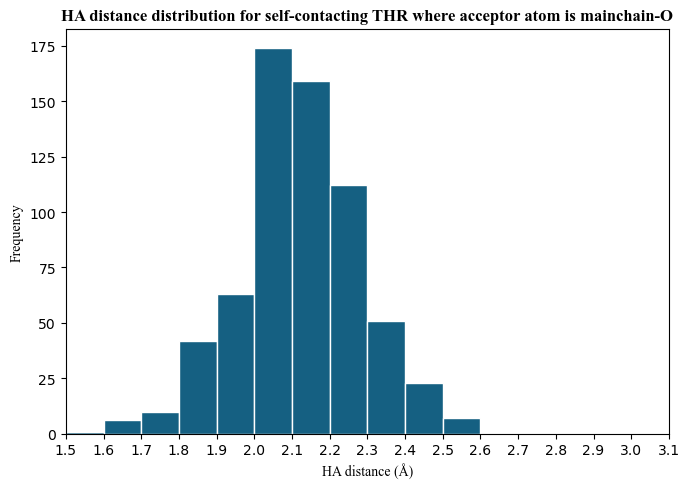

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df1         = pd.read_excel(r"D:\My Data\Study Stuff\PhD Work\Project 02 Selenium H-bonds & chalcogen bonds\20210302\files_excel\Latest\Globular H-bonds THR sidechain is the donor.xlsx", sheet_name = "Self contact instances") #& make changes here
df1         = df1[df1["Acceptor atom"] == "O"]
ha_distance = sorted(list(df1["HA distance (Å)"].round(1)))
plot_title  = "HA distance distribution for self-contacting THR where acceptor atom is mainchain-O" #& make changes here

#^#############################################################################################################################
#^ Function to annotate histogram bins:
#^#############################################################################################################################
def histogram_annotator(N, bins):
    x_coords_of_annotations = list()
    for i in range(0, len(bins) - 1):
        x_coords_of_annotations.append((bins[i] + bins[i + 1]) / 2)
    for x_coord, y_coord in zip(x_coords_of_annotations, N):
        plt.annotate(text = int(y_coord), xy = (x_coord, y_coord), ha = 'center', va = 'bottom', fontsize = 12) 

#^#############################################################################################################################
#^ Histogram code:
#^#############################################################################################################################
font1 = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    # 'size': 26
    }
font2 = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'normal', 
    # 'size': 26
    }
# title_pad     = 20
# axistitle_pad = 20
fig           = plt.figure(figsize=(7,5))
ax            = plt.axes()
bin_width     = np.arange(1.5, 3.2, 0.1)
bin_width     = np.round(bin_width, decimals = 1)                                                     # if you don't do this, then the values are not properly allocated to the bins (this becomes visibile once annotations are enabled)
N, bins, patches = ax.hist(ha_distance, color = "#156082", edgecolor = "white", bins = bin_width) #"bins" argument is used to declare the number of bins to be created. If you pass the range function to it, then the value of the 1st and the last xtick will be defined by the range values
ax.set_xticks(bins)                                                                                   #this ensures that the lower limits of the xticks are properly aligned with the histogram bars
ax.margins(x = 0)                                                                                     #this ensures that the xticks start from the origin of the x-axis (try running it after commenting it out for clarity)
ax.tick_params(
    # labelsize = 15, 
    labelcolor = font2['color']
    )
ax.tick_params(
    # axis='x', 
    # labelrotation = 90
    )

# histogram_annotator(N, bins)
plt.title(
    plot_title, 
    fontdict = font1, 
    # pad = title_pad,
    )
plt.xlabel(
    "HA distance (Å)", 
    fontdict = font2, 
    # labelpad = axistitle_pad,
    )
plt.ylabel(
    "Frequency", 
    fontdict = font2, 
    # labelpad = axistitle_pad,
    )
plt.tight_layout()
plt.gcf().set_facecolor('none')
plt.show()


# Create chalcogen bond systems

## When the system is COCH3-Cys/Met-NHCH3 and HCHO

In [25]:
%reset -f

In [ ]:
from Bio.PDB import *
import pandas as pd
import os
import json
import re

pdbparser             = PDBParser(PERMISSIVE = True, QUIET = True)
path_molprobity_files = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_excel_file       = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds CYS.xlsx"
dict_unprocessed      = dict()
dict_unprocessed_2    = dict()

desired_n_terminal_neighbors = ["C", "O", "CA", "HA", "HA2"] #GLY residues have "HA2" instead of "HA"
desired_c_terminal_neighbors = ["N", "H", "CA", "HA", "HA2"] #PRO as a C-terminal neighbor will be skipped because the N-atom of PRO is not bonded to a H-atom

df1     = pd.read_excel(path_excel_file, sheet_name = "Instances DA occup one 5A")
df1     = df1[df1["Acceptor atom"] == "O"]
print(len(df1))
residue = path_excel_file.split("\\")[-1].split(" ")[2][0:3]
print(residue)

dict_unprocessed.setdefault(residue,   {"Total Unprocessed residues" : 0})
dict_unprocessed_2.setdefault(residue, {})

for i in df1.itertuples():

    if len(df1) != 0:

        donor_pdb_id   = df1.at[i[0], "Donor PDB ID"]
        donor_atom     = df1.at[i[0], "Donor atom"]
        donor_resname  = df1.at[i[0], "Donor resname"]
        donor_resno    = df1.at[i[0], "Donor resno"]
        donor_reschain = df1.at[i[0], "Donor reschain"]

        accep_atom     = df1.at[i[0], "Acceptor atom"]
        accep_resname  = df1.at[i[0], "Acceptor resname"]
        accep_resno    = df1.at[i[0], "Acceptor resno"]
        accep_reschain = df1.at[i[0], "Acceptor reschain"]

        for pdb_file in os.listdir(path_molprobity_files):
            if pdb_file[0:4].upper() == donor_pdb_id:
                # print("processing row:", i[0])
                structure  = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                dict_atoms = {"donor atoms" : [], "N-terminal neighbor atoms" : [], "C-terminal neighbor atoms" : [], "accep atoms" : []}
                atoms      = structure.get_atoms()

                for atom in atoms:

                    if atom.get_parent().get_full_id()[3][1] == donor_resno and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_parent().get_resname() == donor_resname:
                        dict_atoms["donor atoms"].append(atom)

                    if atom.get_parent().get_full_id()[3][1] == accep_resno and atom.get_parent().get_full_id()[2] == accep_reschain and atom.get_parent().get_resname() == accep_resname:
                        if atom.get_name() in ["C", "O"]:
                            dict_atoms["accep atoms"].append(atom)

                    if atom.get_parent().get_full_id()[3][1] == donor_resno - 1 and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_name() in desired_n_terminal_neighbors:
                        dict_atoms["N-terminal neighbor atoms"].append(atom)

                    if atom.get_parent().get_full_id()[3][1] == donor_resno + 1 and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_name() in desired_c_terminal_neighbors:
                        dict_atoms["C-terminal neighbor atoms"].append(atom)

                #^######################################################################################################################################################################################################################################################################################
                #^ If all the relevant atoms are found, then write the residue info to a new PDB file:
                #^######################################################################################################################################################################################################################################################################################
                if (len(dict_atoms["N-terminal neighbor atoms"] + dict_atoms["C-terminal neighbor atoms"]) == 8 and                                  # if all the neighbor atoms are found
                    not any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in [atomz for sublist in dict_atoms.values() for atomz in sublist]) # kisi bhi atom ki occupancy ek se kam nahi honi chahiye
                    ):
                    path_destination = "D:\\unhadded_files\\"
                    if not os.path.isdir(path_destination):
                        os.makedirs(path_destination)

                    class Donor_Acceptor_Select(Select): #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                        def accept_atom(self, atom):     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                            if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_atoms.values() for atomz in sublist]:
                                return True
                            else:
                                return False

                    io = PDBIO()                # create an instance of the PDBIO class
                    io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                    system_path = path_destination + donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + "_crude.pdb"
                    io.save(system_path, Donor_Acceptor_Select())

                    #^#######################################################################################
                    #^ Open the recently created PDB file and rectify the TER issue:
                    #^#######################################################################################
                    with open(system_path) as file1:
                        list1 = file1.readlines()

                    flag2 = True
                    for index in range(len(list1) -1, -1, -1):
                        if list1[index].startswith("TER"):                                   #remove any pre-existing TER rows from the PDB file
                            list1.pop(index)
                        if "HETATM" in list1[index]:
                            flag2 = False

                    if flag2 == False:                                                       # if flag2 became false, it meant that the neighbor was a heteroatom entity e.g., dimethyl lysine as in 1LLN
                        with open("D:\\neighbor is hetero entity.txt", "w") as neighborfile: # in such a case, write the info of such an instance to a text file
                            neighborfile.write(system_path + "\n")
                            os.remove(system_path)

                    if flag2 == True:                                                        # if flag2 remained True, it meant that there was no HETATM entry in the "crude" PDB file
                        if(donor_resno - accep_resno > 0):                                   # if donor resno > acceptor resno, it means that in the crude pdb file, the rows corresponding to acceptor atoms will come first & those of the donor atoms (plus its neighbors) will come later
                            desired_neighbor_resno    = str(accep_resno)                     # therefore save the resno & reschain of the acceptor so that the "TER" row can be added after the very last row where the acceptor's resno & reschain occurs
                            desired_neighbor_reschain = accep_reschain   

                        if(donor_resno - accep_resno < 0):                                   # if donor resno < acceptor resno, it means that in the crude pdb file, the rows corresponding to donor atoms (plus its neighbors) will come first & those of the acceptor atoms will come later
                            desired_neighbor_resno    = str(donor_resno + 1)                 # therefore save the resno & reschain of the C-terminal neighbor of the donor so that the "TER" row can be added after the very last row where the C-terminal neighbor's resno & reschain occurs
                            desired_neighbor_reschain = donor_reschain

                        list_indices = list() 
                        for index in range(len(list1)):
                            match1 = re.search(r"(ATOM\s{2})(\s*\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", list1[index])
                            if match1:
                                if " " in match1.group(6): #"match1.group(6)" will contain the residue chain & residue number. Sometimes it contains a space (like "A 161") & sometimes not
                                    matchline = match1.group(6).replace(" ", "") #if the space is there, then remove it
                                if " " not in match1.group(6):
                                    matchline = match1.group(6)
                                if desired_neighbor_reschain == matchline[0] and desired_neighbor_resno == matchline[1:]: #content of "matchline" variable will be reschain & resno e.g., A161; therefore matchline[0] will contain reschain and matchline[1:] will contain the resno
                                    list_indices.append(index)  # save the index number of those lines of the PDB file whose resno & reschain matches "desired_neighbor_resno" and "desired_neighbor_reschain". These lines will represent the top half of the crude PDB file
                                                                # (the top half can either be the acceptor or the donor plus neighbors)

                        list_data_with_ter = list()
                        if len(list_indices) == 2: #if the length of list_indices is 2, it means that the index numbers in the list correspond to the acceptor's "C" & "O" atoms
                            list_data_with_ter = list1[list_indices[0]:list_indices[-1] + 1] + ["TER\n"] + list1[list_indices[-1] + 1:] #add the "TER" row at the relevant position
                        if len(list_indices) > 2:
                            list_data_with_ter = list1[0:list_indices[0]] + list1[list_indices[0]:list_indices[-1] + 1] + ["TER\n"] + list1[list_indices[-1] + 1:]
                            
                        system_path2 = path_destination + donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + ".pdb"
                        with open(system_path2, "a") as file2: #and write the info to a new PDB file & delete the old file
                            for line in list_data_with_ter:
                                file2.write(line)
                        os.remove(system_path)

                #^######################################################################################################################################################################################################################################################################################
                #^ Suppose for the self-contacting residue in the current iteration, the N-terminal neighbor residue wasn't found (condition A), then the following key will be added to the dictionary: {"condition A" : res1}
                #^ Suppose for 2nd self-contacting residue in the iteration, the N-terminal neighbor residue wasn't found (condition A) as well as the C-terminal neighbor was PRO (condition B) , then the following key will be added to the dictionary: {"condition A + condition B": res2}
                #& Note that although the 2nd residue satisfies condition A as well, its info WILL NOT be added to the condition A key because that's how dictionaries work.  
                #^######################################################################################################################################################################################################################################################################################
                resinfo              = donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain)
                flag                 = True  # if it becomes false (any of the condition in the following code can make it happen), it means that the residue in the current cannot be converted to system
                str_conditions_found = str() # if for the residue in the current iteration, the system could not get created, it will store all the conditions that led to such an outcome

                if len(dict_atoms["N-terminal neighbor atoms"]) == 0:
                    condition_found      = "N-terminal neighbor residue not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if len(dict_atoms["C-terminal neighbor atoms"]) == 0:
                    condition_found      = "C-terminal neighbor residue not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if len(dict_atoms["N-terminal neighbor atoms"]) > 0 and len(dict_atoms["N-terminal neighbor atoms"]) < 4:
                    condition_found      = "Few of the N-terminal neighbor atoms not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if len(dict_atoms["C-terminal neighbor atoms"]) > 0 and len(dict_atoms["C-terminal neighbor atoms"]) < 4:
                    condition_found      = "Few of the C-terminal neighbor atoms not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["N-terminal neighbor atoms"]):
                    condition_found      = "Occupancy of one of the relevant atoms of the N-terminal neighbor residue less than one"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["C-terminal neighbor atoms"]):
                    condition_found      = "Occupancy of one of the relevant atoms of the C-terminal neighbor residue less than one"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["donor atoms"]):
                    condition_found      = "Occupancy of one of the donor atoms less than one"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_parent().get_resname() == "PRO" for neighbor_atom in dict_atoms["C-terminal neighbor atoms"]):
                    condition_found      = "C-terminal neighbor residue is PROLINE"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if flag == False:
                    dict_unprocessed[residue]["Total Unprocessed residues"] += 1
                    dict_unprocessed_2[residue].setdefault(str_conditions_found[0:-1], []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted

with open("D:\\Residuewise info of unprocessed self contacting instances_globular.json", "w") as file1:
    json.dump(dict_unprocessed, file1, indent = 1)
with open("D:\\Conditionwise info of unprocessed self contacting instances_globular.json", "w") as file1:
    json.dump(dict_unprocessed_2, file1, indent = 1)
print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Add H-atoms to system caps:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\chimera_hadding_script_for_chalcogen_bonds.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete. Initiating removal of duplicate models (if any) in the system files....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded_files\\"
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)                   # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 #to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                #pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       #iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       #append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)

print("Removal of duplicate models (if any) in the system files complete.")

1241
CYS
Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....
Cannot execute 'gzip': no automatic decompression of .Z files



Addition of H-atoms to the caps complete. Initiating removal of duplicate models (if any) in the system files....


NotADirectoryError: [WinError 267] The directory name is invalid: 'D:\\hadded_files\\\\1C0P_SG_CYS_1259_A+_O_GLY_1235_A_donaccep_donaccep.pdb\\'

In [26]:
%reset -f

## CH3SH and HCHO (CYS)

In [ ]:
%reset -f

In [ ]:
from Bio.PDB import *
import pandas as pd
import os
import re

pdbparser = PDBParser(PERMISSIVE = True, QUIET = True)
path_save_dir_initial  = "D:\\unhadded_files\\"
path_molprobity_files  = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
df1                    = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds CYS.xlsx", sheet_name = "Instances DA occup one 5A")
df1                    = df1[(df1["Occupancy of donor atom"] == 1) & (df1["Occupancy of acceptor atom"] == 1) & (df1["Acceptor atom"] == "O")]
desired_donor_atoms    = ["CB", "HB2", "HB3", "SG", "HG"]
desired_acceptor_atoms = ["C", "O"]

if not os.path.isdir(path_save_dir_initial):
    os.makedirs(path_save_dir_initial)

for i in df1.itertuples():
    row = list(i)
    flag = True
    for pdb_file in os.listdir(path_molprobity_files):
        if row[5] == pdb_file[0:4].upper():
            print("processing row:", row[0], "PDB ID:", row[5], "acceptor atom:", row[7], "distance:", round(row[13], 2))
            structure = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)

#############NEXT I WILL SAVE THE COORDINATES OF THE RELEVANT ATOMS TO SEPARATE LISTS. I AM SAVING ONLY THE COORDINATES INFO OF THE RELEVANT ATOMS & NOT ALL THE INFO ABOUT THE RELEVANT ATOMS BECAUSE IF I SAVE & PASS 
#############ALL THE INFO ABOUT THE RELEVANT ATOMS TO THE PDBIO() METHOD, IT ONLY WRITES THE INFO OF THOSE ATOMS TO THE FILE WHOSE OCCUPANCY EQUALS TO 1 & SKIPS THOSE ATOMS WHOSE OCCUPANCY ISN'T 1 (NO MATTER WHAT) 
#############I DO, IT JUST DOESN'T WRITES THOSE ATOMS). THE ONLY SOLUTION THAT I COULD THINK OF WAS TO PASS THE COORDINATE INFO TO THE PDBIO() METHOD & WRITE THE INFO TO FILE & IT WORKED.

            donor_atoms           = list()
            acceptor_atoms        = list()
            atoms                 = structure.get_atoms()
            residues              = structure.get_residues()
            flag_occupancy        = True
            for residue in residues:
                if residue.get_resname() == row[2] and residue.get_full_id()[3][1] == row[3] and residue.get_full_id()[2] == row[4]: #if the donor residue is found
                    for atomz in residue.get_atoms():
                        if atomz.get_name() in desired_donor_atoms:
                            donor_atoms.append(list(atomz.get_coord()))
                            if atomz.get_occupancy() != 1: # if any of the desired donor atom's occupancy < 1, make flag as False
                                flag_occupancy = False

                if residue.get_resname() == row[8] and residue.get_full_id()[3][1] == row[9] and residue.get_full_id()[2] == row[10]: #if the acceptor residue is found
                    for atomz in residue.get_atoms():
                        if atomz.get_name() in desired_acceptor_atoms:
                            acceptor_atoms.append(list(atomz.get_coord()))
                            if atomz.get_occupancy() != 1: # if any of the desired acceptor atom's occupancy < 1, make flag as False
                                flag_occupancy = False

            if len(donor_atoms) == len(desired_donor_atoms) and len(acceptor_atoms) == len(desired_acceptor_atoms) and flag_occupancy == True:  #if all the relevant atoms are found & the occupacny of all the relevant atoms was 1
                class Donor_Acceptor_Select(Select):                                                                 #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                    def accept_atom(self, atom):                                                                     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                        if list(atom.get_coord()) in donor_atoms or list(atom.get_coord()) in acceptor_atoms:
                            return True
                        else:
                            return False
                io = PDBIO() #create an instance of the PDBIO class
                io.set_structure(structure) #pass the "structure" variable into "set_structure()" method as argument
                donor_acceptor_initial_filepath1 = path_save_dir_initial + row[5] + "_" + row[1] + "_" + row[2] + "_" + str(row[3]) + "_" + row[4] + "+_" + row[7] + "_" + row[8] + "_" + str(row[9]) + "_" + row[10] + "_crude.pdb"
                io.save(donor_acceptor_initial_filepath1, Donor_Acceptor_Select())

################CODE TO OPEN THE RECENTLY SAVED DONOR+ACCEPTOR FILE, REMOVE ANY PRE-EXISTING "TER" ROWS & ADD A NEW "TER" ROW BETWEEN THE DONOR (PLUS ITS NEIGHBORS) & ACCEPTOR ROWS
################I AM ADDING THE "TER" ROW BECAUSE IF I DONT DO SO, A LONGBOND/PSEUDOBOND APPEARS BETWEEN THE DONOR & ACCEPTOR FRAGMENTS IN CHIMERA AS WELL AS GAUSSIAN & THIS AFFECTS THE ENERGY CALCULATIONS.
                with open(donor_acceptor_initial_filepath1) as file1:
#                     print(donor_acceptor_initial_filepath1)
                    list1 = file1.readlines()

                flag2 = True
                for index in range(len(list1) -1, -1, -1):
                    if list1[index].startswith("TER"):                                   #remove any pre-existing TER rows from the PDB file
                        list1.pop(index)
                    if "HETATM" in list1[index]:
                        flag2 = False

                if flag2 == False:                                                       #if flag2 became false, it meant that the neighbor was a heteroatom entity e.g., dimethyl lysine as in 1LLN
                    with open("D:\\neighbor is hetero entity.txt", "a") as neighborfile: #in such a case, write the info of such an instance to a text file
                        neighborfile.write(donor_acceptor_initial_filepath1 + "\n")
                        os.remove(donor_acceptor_initial_filepath1)                      #and remove the donor+acceptor file

                if flag2 == True:                                                        #if flag2 remained True, it meant that there was no HETATM entry in the "crude" PDB file
                    if row[3] < row[9]:
                        comes_first_resno    = str(row[3])                              #I had to convert resno from integer to string, else it was not matching the results of regex in the "if" statements below
                        comes_first_reschain = row[4]
                    if row[3] > row[9]:
                        comes_first_resno    = str(row[9])
                        comes_first_reschain = row[10]
                        
                    if row[3] != row[9]: #if either of the above two "if statements" are true, then do the following
                        top_half_indices    = list()
                        bottom_half_indices = list()
                        for index in range(len(list1)):
                            match1 = re.search(r"(ATOM\s{2})(\s*\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", list1[index])
                            if match1:
                                if " " in match1.group(6): #"match1.group(6)" will contain the residue chain & residue number. Sometimes it contains a space (like "A 161") & sometimes not
                                    matchline = match1.group(6).replace(" ", "") #if the space is there, then remove it
                                if " " not in match1.group(6):
                                    matchline = match1.group(6)
                                if comes_first_reschain == matchline[0] and comes_first_resno == matchline[1:]: #content of "matchline" variable will be reschain & resno e.g., A161; therefore matchline[0] will contain reschain and matchline[1:] will contain the resno
                                    top_half_indices.append(index) #save the index number of those lines of the PDB file whose resno & reschain matches "comes_first_reschain" and "comes_first_resno". These lines will represent the top half of the crude PDB file
                                if comes_first_reschain == matchline[0] and comes_first_resno != matchline[1:]:
                                    bottom_half_indices.append(index) #save the index no. of rest of the lines to other list

                        list_data_with_ter = list()
                        for index in range(len(list1)):
                            if index in top_half_indices:
                                list_data_with_ter.append(list1[index])
                        list_data_with_ter.append("TER\n")

                        for index in range(len(list1)):
                            if index in bottom_half_indices:
                                list_data_with_ter.append(list1[index])
                                
                    if row[3] == row[9]: #if the donor & acceptor atoms belong to the same residue, then there is no need to add "TER\n"
                        list_data_with_ter = list()
                        for index in range(len(list1)):
                            list_data_with_ter.append(list1[index])

                    donor_acceptor_initial_filepath2 = path_save_dir_initial + row[5] + "_" + row[1] + "_" + row[2] + "_" + str(row[3]) + "_" + row[4] + "+_" + row[7] + "_" + row[8] + "_" + str(row[9]) + "_" + row[10] + ".pdb"
                    with open(donor_acceptor_initial_filepath2, "a") as file2: #and write the info to a new PDB file & delete the old file
                        for line in list_data_with_ter:
                            file2.write(line)
                    os.remove(donor_acceptor_initial_filepath1)
print("Creation of systems complete. Initiating addition of H-atoms....")

#^########################################################
#^ Add H-atoms to capping regions:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\chimera_hadding_script_for_chalcogen_bonds.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE) #&### make sure that the script is at this location
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms complete. Initiating removal of duplicate models (if any) in the system files....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded_files\\"
for file in os.listdir(path_hadded_files):
    print("processing", file)
    with open (path_hadded_files + file) as file1:
        list1 = file1.readlines()
        file1.close()

        flag = True
        for i in range(len(list1)):
            if "MODEL" in list1[i]:
                flag = False

        if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
            print("file with multiple models:", file)
            os.remove(path_hadded_files + file)             # delete the file with multiple models
            ctr = 0
            list2 = list()
            for i in range(len(list1)):                 # to better understand what is happening, see the file named "pdb file containing 2 models"
                if "MODEL" in list1[i]:
                    ctr += 1
                if ctr < 2:
                    list2.append(list1[i])

            list2.pop(0)                                # pop the very 1st line of "list2" which contains the string "MODEL"
            for i in range(len(list2)-1, -1, -1):       # iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                if "ENDMDL" in list2[i]:
                    list2.pop(i)
            list2.append("END\n")                       # append a line containing the string "END\n" to the end of "list2" to mark the end of the file
            with open(path_hadded_files + file, "w") as file2:
                for line in list2:
                    file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

In [ ]:
%reset -f

## CH3-S-CH3 and HCHO (MET)

In [ ]:
%reset -f

In [ ]:
from Bio.PDB import *
import pandas as pd
import os
import re

pdbparser              = PDBParser(PERMISSIVE = True, QUIET = True)
path_save_dir_initial  = "D:\\unhadded_files\\"
if not os.path.isdir(path_save_dir_initial):
    os.makedirs(path_save_dir_initial)

path_molprobity_files  = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
df1                    = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds MET.xlsx", sheet_name = "Instances DA occup one")
df1                    = df1[(df1["Occupancy of donor atom"] == 1) & (df1["Occupancy of acceptor atom"] == 1) & (df1["Acceptor atom"] == "O")]
desired_donor_atoms    = ["CG", "HG2", "HG3", "SD", "CE", "HE1", "HE2", "HE3"]
desired_acceptor_atoms = ["C", "O"]

for i in df1.itertuples():
    row = list(i)
    flag = True
    for pdb_file in os.listdir(path_molprobity_files):
        if row[5] == pdb_file[0:4].upper():
            print("processing row:", row[0], "PDB ID:", row[5], "acceptor atom:", row[7], "distance:", round(row[13], 2))
            structure = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)

#############NEXT I WILL SAVE THE COORDINATES OF THE RELEVANT ATOMS TO SEPARATE LISTS. I AM SAVING ONLY THE COORDINATES INFO OF THE RELEVANT ATOMS & NOT ALL THE INFO ABOUT THE RELEVANT ATOMS BECAUSE IF I SAVE & PASS 
#############ALL THE INFO ABOUT THE RELEVANT ATOMS TO THE PDBIO() METHOD, IT ONLY WRITES THE INFO OF THOSE ATOMS TO THE FILE WHOSE OCCUPANCY EQUALS TO 1 & SKIPS THOSE ATOMS WHOSE OCCUPANCY ISN'T 1 (NO MATTER WHAT) 
#############I DO, IT JUST DOESN'T WRITES THOSE ATOMS). THE ONLY SOLUTION THAT I COULD THINK OF WAS TO PASS THE COORDINATE INFO TO THE PDBIO() METHOD & WRITE THE INFO TO FILE & IT WORKED.

            donor_atoms    = list()
            acceptor_atoms = list()
            atoms          = structure.get_atoms()
            residues       = structure.get_residues()
            flag_occupancy = True
            for residue in residues:
                if residue.get_resname() == row[2] and residue.get_full_id()[3][1] == row[3] and residue.get_full_id()[2] == row[4]: #if the donor residue is found
                    for atomz in residue.get_atoms():
                        if atomz.get_name() in desired_donor_atoms:
                            donor_atoms.append(list(atomz.get_coord()))
                            if atomz.get_occupancy() != 1: # if any of the desired donor atom's occupancy < 1, make flag as False
                                flag_occupancy = False

                if residue.get_resname() == row[8] and residue.get_full_id()[3][1] == row[9] and residue.get_full_id()[2] == row[10]: #if the acceptor residue is found
                    for atomz in residue.get_atoms():
                        if atomz.get_name() in desired_acceptor_atoms:
                            acceptor_atoms.append(list(atomz.get_coord()))
                            if atomz.get_occupancy() != 1: # if any of the desired donor atom's occupancy < 1, make flag as False
                                flag_occupancy = False

            if len(donor_atoms) == len(desired_donor_atoms) and len(acceptor_atoms) == len(desired_acceptor_atoms):  #if all the relevant atoms are found 
                class Donor_Acceptor_Select(Select):                                                                 #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                    def accept_atom(self, atom):                                                                     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                        if list(atom.get_coord()) in donor_atoms or list(atom.get_coord()) in acceptor_atoms:
                            return True
                        else:
                            return False
                io = PDBIO() #create an instance of the PDBIO class
                io.set_structure(structure) #pass the "structure" variable into "set_structure()" method as argument
                donor_acceptor_initial_filepath1 = path_save_dir_initial + row[5] + "_" + row[1] + "_" + row[2] + "_" + str(row[3]) + "_" + row[4] + "+_" + row[7] + "_" + row[8] + "_" + str(row[9]) + "_" + row[10] + "_crude.pdb"
                io.save(donor_acceptor_initial_filepath1, Donor_Acceptor_Select())

################CODE TO OPEN THE RECENTLY SAVED DONOR+ACCEPTOR FILE, REMOVE ANY PRE-EXISTING "TER" ROWS & ADD A NEW "TER" ROW BETWEEN THE DONOR (PLUS ITS NEIGHBORS) & ACCEPTOR ROWS
################I AM ADDING THE "TER" ROW BECAUSE IF I DONT DO SO, A LONGBOND/PSEUDOBOND APPEARS BETWEEN THE DONOR & ACCEPTOR FRAGMENTS IN CHIMERA AS WELL AS GAUSSIAN & THIS AFFECTS THE ENERGY CALCULATIONS.
                with open(donor_acceptor_initial_filepath1) as file1:
#                     print(donor_acceptor_initial_filepath1)
                    list1 = file1.readlines()

                flag2 = True
                for index in range(len(list1) -1, -1, -1):
                    if list1[index].startswith("TER"):                                   #remove any pre-existing TER rows from the PDB file
                        list1.pop(index)
                    if "HETATM" in list1[index]:
                        flag2 = False

                if flag2 == False:                                                       #if flag2 became false, it meant that the neighbor was a heteroatom entity e.g., dimethyl lysine as in 1LLN
                    with open("D:\\neighbor is hetero entity.txt", "a") as neighborfile: #in such a case, write the info of such an instance to a text file
                        neighborfile.write(donor_acceptor_initial_filepath1 + "\n")
                        os.remove(donor_acceptor_initial_filepath1)                      #and remove the donor+acceptor file

                if flag2 == True:                                                        #if flag2 remained True, it meant that there was no HETATM entry in the "crude" PDB file
                    if row[3] < row[9]:
                        comes_first_resno    = str(row[3])                              #I had to convert resno from integer to string, else it was not matching the results of regex in the "if" statements below
                        comes_first_reschain = row[4]
                    if row[3] > row[9]:
                        comes_first_resno    = str(row[9])
                        comes_first_reschain = row[10]

                    if row[3] != row[9]: #if either of the above two "if statements" are true, then do the following
                        top_half_indices    = list()
                        bottom_half_indices = list()
                        for index in range(len(list1)):
                            match1 = re.search(r"(ATOM\s{2})(\s*\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", list1[index])
                            if match1:
                                if " " in match1.group(6): #"match1.group(6)" will contain the residue chain & residue number. Sometimes it contains a space (like "A 161") & sometimes not
                                    matchline = match1.group(6).replace(" ", "") #if the space is there, then remove it
                                if " " not in match1.group(6):
                                    matchline = match1.group(6)
                                if comes_first_reschain == matchline[0] and comes_first_resno == matchline[1:]: #content of "matchline" variable will be reschain & resno e.g., A161; therefore matchline[0] will contain reschain and matchline[1:] will contain the resno)
                                    top_half_indices.append(index) #save the index number of those lines of the PDB file whose resno & reschain matches "comes_first_reschain" and "comes_first_resno". These lines will represent the top half of the crude PDB file
                                if comes_first_reschain == matchline[0] and comes_first_resno != matchline[1:]:
                                    bottom_half_indices.append(index) #save the index no. of rest of the lines to other list

                        list_data_with_ter = list()
                        for index in range(len(list1)):
                            if index in top_half_indices:
                                list_data_with_ter.append(list1[index])
                        list_data_with_ter.append("TER\n")

                        for index in range(len(list1)):
                            if index in bottom_half_indices:
                                list_data_with_ter.append(list1[index])

                    if row[3] == row[9]: #if the donor & acceptor atoms belong to the same residue, then there is no need to add "TER\n"
                        list_data_with_ter = list()
                        for index in range(len(list1)):
                            list_data_with_ter.append(list1[index])
                            
                    donor_acceptor_initial_filepath2 = path_save_dir_initial + row[5] + "_" + row[1] + "_" + row[2] + "_" + str(row[3]) + "_" + row[4] + "+_" + row[7] + "_" + row[8] + "_" + str(row[9]) + "_" + row[10] + ".pdb"
                    with open(donor_acceptor_initial_filepath2, "a") as file2: #and write the info to a new PDB file & delete the old file
                        for line in list_data_with_ter:
                            file2.write(line)
                    os.remove(donor_acceptor_initial_filepath1)
print("Creation of systems complete. Initiating addition of H-atoms....")

#^########################################################
#^ Add H-atoms to capping regions:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\chimera_hadding_script_for_chalcogen_bonds.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE) #&### make sure that the script is at this location
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms complete. Initiating removal of duplicate models (if any) in the system files....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded_files\\"
for file in os.listdir(path_hadded_files):
    print("processing", file)
    with open (path_hadded_files + file) as file1:
        list1 = file1.readlines()
        file1.close()

        flag = True
        for i in range(len(list1)):
            if "MODEL" in list1[i]:
                flag = False

        if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
            print("file with multiple models:", file)
            os.remove(path_hadded_files + file)             # delete the file with multiple models
            ctr = 0
            list2 = list()
            for i in range(len(list1)):                 # to better understand what is happening, see the file named "pdb file containing 2 models"
                if "MODEL" in list1[i]:
                    ctr += 1
                if ctr < 2:
                    list2.append(list1[i])

            list2.pop(0)                                # pop the very 1st line of "list2" which contains the string "MODEL"
            for i in range(len(list2)-1, -1, -1):       # iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                if "ENDMDL" in list2[i]:
                    list2.pop(i)
            list2.append("END\n")                       # append a line containing the string "END\n" to the end of "list2" to mark the end of the file
            with open(path_hadded_files + file, "w") as file2:
                for line in list2:
                    file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

In [ ]:
%reset -f

# Identify those systems where S-O distance is minimum & move them to a new folder
* This code is written with the <font color='red'>assumption that the O-atom belongs to the amino acid "AAA"</font>.

In [28]:
%reset -f

In [29]:
from Bio.PDB import *
import os
import shutil
import numpy as np
from numpy import linalg
import pprint
import json
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

dictdata    = dict()
ctr         = 0
pdbparser   = PDBParser(PERMISSIVE = True, QUIET = True)
path        = "D:\\hadded_files\\"
# path        = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files\\"
# path        = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files\\"

destination = "D:\\hadded_files_where_SO_distance_is_minimum\\"
if not os.path.isdir(destination):
    os.makedirs(destination)

output_excel_file = "D:\\comparison of DA distance with minimum distance between atom pairs in hadded files.xlsx"

for file in os.listdir(path):
    # print("processing:", file)
    resname_donor  = file.split("_")[2] # no need for "resname_accep" cuz it will always be "AAA"
    resno_donor    = file.split("_")[3]
    resno_accep    = file.split("_")[7]
    structure      = pdbparser.get_structure("protein", path + file)
    residues       = structure.get_residues()
    #^################################################################################################
    #^ SAVE DONOR ATOM INFO AND ACCEPTOR ATOM INFO TO RESPECTIVE LISTS (DICTIONARIES NOT REQUIRED):
    #^################################################################################################
    donor_atoms    = list()
    acceptor_atoms = list()
    for residue in residues:
        if residue.get_resname() == resname_donor and residue.get_full_id()[3][1] == int(resno_donor):
            for atom in residue.get_atoms():
                donor_atoms.append(atom)
        if residue.get_resname() == "AAA" and residue.get_full_id()[3][1] == int(resno_accep):
            for atom in residue.get_atoms():
                acceptor_atoms.append(atom)
    # print(donor_atoms)
    # print(acceptor_atoms)
    #^#################################################################################################################
    #^ CREATE ALL POSSIBLE COMBINATIONS OF DONOR & ACCEPTOR ATOMS & SAVE THE DISTANCES BETWEEN THEM AS A DICTIONARY:
    #^#################################################################################################################
    dict_of_couples = dict()
    for donor_atom in donor_atoms:
        for acceptor_atom in acceptor_atoms:
            couple    = [None] * 2
            couple[0] = donor_atom.get_parent().get_resname()    + "_" + donor_atom.get_name()
            couple[1] = acceptor_atom.get_parent().get_resname() + "_" + acceptor_atom.get_name()
            couple    = tuple(couple)
            distance  = donor_atom - acceptor_atom # "donor_atom - acceptor_atom" will be the distance between the two atoms (biopython charm)
            distance  = round(distance, 2)
            dict_of_couples.setdefault(couple, distance)
    # pprint.pprint(dict_of_couples)
    #^#################################################################################################################################################################
    #^ IF THE DISTANCE BETWEEN S-O ATOMS IS INDEED THE MINIMUM DISTANCE AMONG ALL THE POSSIBLE ATOM PAIRS, THEN COPY THE CORRESPONDING FILE TO A DESTINATION FOLDER:
    #^#################################################################################################################################################################
    for key, value in dict_of_couples.items():
        if key == ("CYS_SG", "AAA_O") and value == min(dict_of_couples.values()): #&####### choose the correct statement here
        # if key == ("MET_SD", "AAA_O") and value == min(dict_of_couples.values()):
            print("System where S-O distance is minimum:", file)
            ctr += 1
            shutil.copy(path + file, destination + file)

    #^#################################################################################################################################################################
    #^ SAVE THE D-A DISTANCE AND THE SMALLEST DISTANCE OBSERVED IN EACH SYSTEM IN A DICTIONARY:
    #^#################################################################################################################################################################
    dict_temp         = dict()
    smallest_distance = min(dict_of_couples.values())
    for key, value in dict_of_couples.items():
        if key == ("CYS_SG", "AAA_O"): #&####### choose the correct statement here
        # if key == ("MET_SD", "AAA_O"):
            da_distance = value
        if value == smallest_distance:
            key2 = " and ".join(key)

    dictdata.setdefault("Resinfo",                                                              []).append(file[0:len(file)-4])
    dictdata.setdefault("DA distance (Å)",                                                      []).append(da_distance)
    dictdata.setdefault("Smallest distance observed (Å)",                                       []).append(smallest_distance)
    dictdata.setdefault("Atom pair with smallest distance",                                     []).append(key2)
    dictdata.setdefault("Difference between DA distance and smallest distance",                 []).append(da_distance - smallest_distance)
    dictdata.setdefault("DA distance is the smallest distance among donor acceptor atom pairs", []).append(da_distance == smallest_distance)

#^########################################################################################
#^ WRITE DICTDATA TO EXCEL FILE:
#^########################################################################################
with pd.ExcelWriter(path = output_excel_file, engine = "openpyxl") as writer:
    df1 = pd.DataFrame(dictdata)
    df1.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(output_excel_file)
print("Total files where S-O distance is minimum:", ctr, "/", len(os.listdir(path)))

System where S-O distance is minimum: 1C0P_SG_CYS_1259_A+_O_GLY_1235_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1D2N_SG_CYS_590_A+_O_LEU_629_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1ELQ_SG_CYS_306_A+_O_GLN_331_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1ELQ_SG_CYS_367_A+_O_ASN_169_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1ERZ_SG_CYS_278_A+_O_GLU_189_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1F9V_SG_CYS_655_A+_O_PRO_674_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1GXM_SG_CYS_510_A+_O_LEU_528_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1H0H_SG_CYS_136_A+_O_SER_128_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1JID_SG_CYS_53_A+_O_VAL_104_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1LJ8_SG_CYS_375_A+_O_THR_307_A_donaccep_donaccep.pdb
System where S-O distance is minimum: 1LQT_SG_CYS_395_A+_O_LEU_386_A_donaccep_donaccep.pd

In [ ]:
%reset -f

# <font color="red">Create self-contacting systems</font> from PDB files, add H-atoms to their caps and delete any extra models in the system file AND create a JSON file which states the reasons why any given self-contacting system couldn't get created

The self-contact system will be COCH3-residue-NHCH3

Before running this code, ensure that the H-atom adding script is in D-drive.

Adding H-atoms using UCSF chimera strangely sometimes causes addition of more than one model to some files. I am not using UCSF chimera script to delete extra models because UCSF chimera is not even detecting the extra models in the first place.


In [12]:
%reset -f

In [20]:
from Bio.PDB import *
import pandas as pd
import os
import json

pdbparser             = PDBParser(PERMISSIVE = True, QUIET = True)
path_molprobity_files = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_excel_file       = "D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds CYS.xlsx"
dict_unprocessed      = dict()
dict_unprocessed_2    = dict()

desired_n_terminal_neighbors = ["C", "O", "CA", "HA", "HA2"] #GLY residues have "HA2" instead of "HA"
desired_c_terminal_neighbors = ["N", "H", "CA", "HA", "HA2"] #PRO as a C-terminal neighbor will be skipped because the N-atom of PRO is not bonded to a H-atom

df1     = pd.read_excel(path_excel_file, sheet_name = "Instances DA occup one 5A")
df1     = df1[df1["Acceptor atom"] == "O"]
print(len(df1))
residue = path_excel_file.split("\\")[-1].split(" ")[2][0:3]
print(residue)

dict_unprocessed.setdefault(residue,   {"Total Unprocessed residues" : 0})
dict_unprocessed_2.setdefault(residue, {})

for i in df1.itertuples():

    if len(df1) != 0:

        donor_pdb_id   = df1.at[i[0], "Donor PDB ID"]
        donor_atom     = df1.at[i[0], "Donor atom"]
        donor_resname  = df1.at[i[0], "Donor resname"]
        donor_resno    = df1.at[i[0], "Donor resno"]
        donor_reschain = df1.at[i[0], "Donor reschain"]

        accep_atom     = df1.at[i[0], "Acceptor atom"]
        accep_resname  = df1.at[i[0], "Acceptor resname"]
        accep_resno    = df1.at[i[0], "Acceptor resno"]
        accep_reschain = df1.at[i[0], "Acceptor reschain"]

        for pdb_file in os.listdir(path_molprobity_files):
            if pdb_file[0:4].upper() == donor_pdb_id:
                # print("processing row:", i[0])
                structure  = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                dict_atoms = {"donor atoms" : [], "N-terminal neighbor atoms" : [], "C-terminal neighbor atoms" : []}
                atoms      = structure.get_atoms()

                for atom in atoms:

                    if atom.get_parent().get_full_id()[3][1] == donor_resno and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_parent().get_resname() == donor_resname:
                        dict_atoms["donor atoms"].append(atom)

                    if atom.get_parent().get_full_id()[3][1] == donor_resno - 1 and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_name() in desired_n_terminal_neighbors:
                        dict_atoms["N-terminal neighbor atoms"].append(atom)

                    if atom.get_parent().get_full_id()[3][1] == donor_resno + 1 and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_name() in desired_c_terminal_neighbors:
                        dict_atoms["C-terminal neighbor atoms"].append(atom)

                #^######################################################################################################################################################################################################################################################################################
                #^ If all the relevant atoms are found, then do the following:
                #^######################################################################################################################################################################################################################################################################################
                if (len(dict_atoms["N-terminal neighbor atoms"] + dict_atoms["C-terminal neighbor atoms"]) == 8 and                                  # if all the neighbor atoms are found
                    not any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in [atomz for sublist in dict_atoms.values() for atomz in sublist]) # kisi bhi atom ki occupancy ek se kam nahi honi chahiye
                    ):
                    path_destination = "D:\\unhadded files_globular\\" + residue + "\\"
                    if not os.path.isdir(path_destination):
                        os.makedirs(path_destination)

                    class Donor_Acceptor_Select(Select): #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                        def accept_atom(self, atom):     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                            if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_atoms.values() for atomz in sublist]:
                                return True
                            else:
                                return False

                    io = PDBIO()                # create an instance of the PDBIO class
                    io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                    system_path = path_destination + donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + "_donaccep.pdb"
                    io.save(system_path, Donor_Acceptor_Select())

                resinfo              = donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain)
                flag                 = True  # if it becomes false (any of the condition in the following code can make it happen), it means that the residue in the current cannot be converted to system
                str_conditions_found = str() # if for the residue in the current iteration, the system could not get created, it will store all the conditions that led to such an outcome

                #^######################################################################################################################################################################################################################################################################################
                #^ Suppose for the self-contacting residue in the current iteration, the N-terminal neighbor residue wasn't found (condition A), then the following key will be added to the dictionary: {"condition A" : res1}
                #^ Suppose for 2nd self-contacting residue in the iteration, the N-terminal neighbor residue wasn't found (condition A) as well as the C-terminal neighbor was PRO (condition B) , then the following key will be added to the dictionary: {"condition A + condition B": res2}
                #& Note that although the 2nd residue satisfies condition A as well, its info WILL NOT be added to the condition A key because that's how dictionaries work.  
                #^######################################################################################################################################################################################################################################################################################
                if len(dict_atoms["N-terminal neighbor atoms"]) == 0:
                    condition_found      = "N-terminal neighbor residue not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if len(dict_atoms["C-terminal neighbor atoms"]) == 0:
                    condition_found      = "C-terminal neighbor residue not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if len(dict_atoms["N-terminal neighbor atoms"]) > 0 and len(dict_atoms["N-terminal neighbor atoms"]) < 4:
                    condition_found      = "Few of the N-terminal neighbor atoms not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if len(dict_atoms["C-terminal neighbor atoms"]) > 0 and len(dict_atoms["C-terminal neighbor atoms"]) < 4:
                    condition_found      = "Few of the C-terminal neighbor atoms not found"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["N-terminal neighbor atoms"]):
                    condition_found      = "Occupancy of one of the relevant atoms of the N-terminal neighbor residue less than one"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["C-terminal neighbor atoms"]):
                    condition_found      = "Occupancy of one of the relevant atoms of the C-terminal neighbor residue less than one"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["donor atoms"]):
                    condition_found      = "Occupancy of one of the donor atoms less than one"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if any(neighbor_atom.get_parent().get_resname() == "PRO" for neighbor_atom in dict_atoms["C-terminal neighbor atoms"]):
                    condition_found      = "C-terminal neighbor residue is PROLINE"
                    str_conditions_found = str_conditions_found + condition_found + "+"
                    dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
                    flag = False

                if flag == False:
                    dict_unprocessed[residue]["Total Unprocessed residues"] += 1
                    dict_unprocessed_2[residue].setdefault(str_conditions_found[0:-1], []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted

with open("D:\\Residuewise info of unprocessed self contacting instances_globular.json", "w") as file1:
    json.dump(dict_unprocessed, file1, indent = 1)
with open("D:\\Conditionwise info of unprocessed self contacting instances_globular.json", "w") as file1:
    json.dump(dict_unprocessed_2, file1, indent = 1)
print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Add H-atoms to system caps:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\chimera_hadding_script_for_self_contacts.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete. Initiating removal of duplicate models (if any) in the system files....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded files\\"
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)                   # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 #to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                #pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       #iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       #append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)

print("Removal of duplicate models (if any) in the system files complete.")

1241
CYS


KeyboardInterrupt: 

In [19]:
%reset -f

## Code to count the total number of cases in each condition

In [ ]:
import json
with open("D:\\Unprocessed self contact instances_globular_2.json", "r") as file1:
    dict1 = json.load(file1)
    file1.close()
    ctr = 0
    for key, value in dict1["SER"].items():
        print(key)
        print(len(value))
        ctr = ctr + len(value)
    print(ctr)

# Create chi1 variants for systems

This has to be done using chimera

# For helix, strand and loop, copy top 5 highest resolution chi1 variant folders to a new destination

In [12]:
%reset -f

In [11]:
import pandas as pd
import os
import shutil

excel_files_path = "D:\\excelfiles\\" #& copy excel files here
for excel_filename in os.listdir(excel_files_path):

    #^########################################################################################################################################
    #^ Open the "self contacts" excel worksheet and create a dataframe containing only those rows where the acceptor is "O", for instance:
    #^########################################################################################################################################
    df1 = pd.read_excel(excel_files_path + excel_filename, sheet_name = "Self contact instances")
    for accep_atom in df1["Acceptor atom"].unique():
        if accep_atom == "N":
            df3 = df1[df1["Acceptor atom"] == accep_atom]
            df3.reset_index(drop = True, inplace = True)
            # df3 = df3.reset_index(drop = True)

            #^#################################################################################################################################################################################
            #^ From the aobve dataframe, create a filtered dataframe which contains only those rows where the ssec type of the donor is "AlphaHelix", for instance and sort it by resolution:
            #^#################################################################################################################################################################################
            for ssec in df3["Donor sec. str."].unique():
                df2 = df3[df3["Donor sec. str."] == ssec]
                df2.sort_values(by = "Resolution (Å)", inplace = True)
                df2.reset_index(drop = True, inplace = True)
                # df2 = df2.sort_values(by = "Resolution")
                # df2 = df2.reset_index(drop = True)
                print("Donor residue:", excel_filename.split(" ")[2], "Acceptor atom:", accep_atom, "Secondary structure:", ssec, "Total rows:", len(df2))
                ctr = 0

                #^###############################################################################################################################
                #^ Iterate over top 5 rows of the above created dataframe and copy their corresponding chi1 variant folders to another folder:
                #^###############################################################################################################################
                for i in df2.itertuples():
                    if ctr < 5: # the condition is "< 5" and not "<=5" because when "ctr" equals 5, it will be the 6th row. Also, if in any case, the mentioned ssec type doesn't has 5 corresponding rows, the program will run for the maximum rows available less than 5
                        donor_pdb_id   = df2.at[i[0], "Donor PDB ID"] # I am using "ctr" and not "i[0]" as the counter because some of the self contact rows dont have a corresponding chi1 variant folder (due to all-atom occupancy limitations or other limitations faced during system creation)
                        donor_atom     = df2.at[i[0], "Donor atom"]
                        donor_resname  = df2.at[i[0], "Donor resname"]
                        donor_resno    = df2.at[i[0], "Donor resno"]
                        donor_reschain = df2.at[i[0], "Donor reschain"]
                        donor_ssec     = df2.at[i[0], "Donor sec. str."]

                        accep_atom     = df2.at[i[0], "Acceptor atom"]
                        accep_resname  = df2.at[i[0], "Acceptor resname"]
                        accep_resno    = df2.at[i[0], "Acceptor resno"]
                        accep_reschain = df2.at[i[0], "Acceptor reschain"]
                        accep_ssec     = df2.at[i[0], "Acceptor sec. str."]

                        don_residue               = excel_filename.split(" ")[2]
                        chi1_variants_calc_folder = "D:\\chi1 variants calc\\" + don_residue + "\\" + "Acceptor atom is " + accep_atom + "\\" + ssec + "\\"
                        if not os.path.isdir(chi1_variants_calc_folder):
                            os.makedirs(chi1_variants_calc_folder)

                        search_query   = donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "_" + donor_ssec + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + "_" + accep_ssec + "_hadded"
                        # residue_folder = "D:\\chi1 variants of hadded files\\" + don_residue + "\\"
                        residue_folder = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\qm stuff\\20230922\\chi1 variants of hadded files\\" + don_residue + "\\"
                        for chi1_folder in os.listdir(residue_folder):
                            if chi1_folder == search_query:
                                shutil.copytree(residue_folder + chi1_folder, chi1_variants_calc_folder + chi1_folder)
                                ctr += 1

C:\Users\Prathvi\AppData\Local\Temp\ipykernel_23044\3616750074.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by = "Resolution (Å)", inplace = True)


Donor residue: CYS Acceptor atom: N Secondary structure: Strand Total rows: 94
Donor residue: CYS Acceptor atom: N Secondary structure: Coil Total rows: 48
Donor residue: CYS Acceptor atom: N Secondary structure: Turn Total rows: 53
Donor residue: CYS Acceptor atom: N Secondary structure: Bridge Total rows: 4
Donor residue: CYS Acceptor atom: N Secondary structure: AlphaHelix Total rows: 7
Donor residue: CYS Acceptor atom: N Secondary structure: 310Helix Total rows: 3


In [5]:
%reset -f

# Convert system files to gaussian input files for <font color="red">single point energy calculation</font> of chi1 variants

This has to be done using gaussian

# Run chi1 variant single point energy calculations

Nothing much to say here

# <font color='red'>Calculate relative energies</font> for chi1 angle variants from gaussian log files

Relative single point energy (HF) of chi1 variant A = Single point energy (HF) of chi1 variant A - Relative single point energy of crystal structure

1 Hartrees = 627.503 kcal/mol

<font color="red">NOTE: Ensure that folders being used as input contain log files corresponding to the single point energy calculations only and no other type of log files.</font>. Input files can be there as they dont interfere.

## V1 (use it when theory is DFT)

In [21]:
%reset -f

In [ ]:
import os
import re
import pandas as pd
import pprint
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^#######################################################################################################################################################################
def hf_extractor(chi1_variant_file_path, chi1_variant_file, dict_temp):
    with open(chi1_variant_file_path + chi1_variant_file) as file1:
        str1          = file1.read()
        str2          = str1.replace("\n", "")
        file_contents = str2.replace(" ", "") #I had to remove spaces & linebreaks because sometimes the relevant info has linebreaks in between it
        file1.close()

        if "NormalterminationofGaussian" not in file_contents:
            failed_termination.append(chi1_variant_file)

        if "NormalterminationofGaussian" in file_contents:
            match1 = re.search(r"(\||\\)(HF=)(-*\d+\.\d+)(\||\\)(RMSD=|S2=)", file_contents)
            match2 = re.search(r"(.+)(\+)(.+_chi1_)(-?\d+)(_hadded)(.+)",     chi1_variant_file)

            if match2:
                dict_temp.setdefault("chi1 angle (degrees)", []).append(float(match2.group(4)))
            if match1:
                dict_temp.setdefault("Energy (HF)",          []).append(float(match1.group(3)))
            if "ref" in match2.group(6):
                global reference_hf
                reference_hf = float(match1.group(3))

#^#######################################################################################################################################################################
path               = "D:\\chi1 variants calc\\" #####& this folder should have 3 folders: "CYS", "SER", "THR". The "CYS" folder in turn should have 2 folder: "Acceptor atom is N", "Acceptor atom is O". These folders should contain folders whose name should be a ssec type as given by Stride such as "AlphaHelix", "Strand", etc. These folders should contain folders named like "1D5T_SG_CYS_414_A_AlphaHelix+_O_CYS_414_A_AlphaHelix_hadded" and should contain the log files.
failed_termination = list()
dictdata           = dict()
for res_folder in os.listdir(path):                                                                                               # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\"
    dictdata.setdefault(res_folder, {})

    for acc_atom_folder in os.listdir(path + res_folder + "\\"):                                                                  # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\"
        for ssec_folder in os.listdir(path + res_folder + "\\" + acc_atom_folder + "\\"):                                         # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\Acceptor atom is O\"
            for chi1_variant_folder in os.listdir(path + "\\" + res_folder + "\\" + acc_atom_folder + "\\" + ssec_folder + "\\"): # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\Acceptor atom is O\AlphaHelix\"
                print("processing donor residue:", res_folder, "acceptor atom:", acc_atom_folder.split(" ")[-1], "secondary structure type:", ssec_folder, "chi1 variant folder:", chi1_variant_folder)
                match1                 = re.search(r"(\w{4})(_)(\w+)(_)(\w+)(_)(\w+)(_)(\w+)(_)(\w+)(\+)(_)(\w{1})(_)(.+)", chi1_variant_folder)
                sheet_name             = match1.group(14) + "_" + match1.group(11) + "_" + match1.group(1) + "_" + match1.group(5) + "_" + match1.group(7) + "_" + match1.group(9)  # acceptor atom + ssec type + pdbid + resname + resno + resid
                # print(sheet_name)
                dict_temp              = dict()
                reference_hf           = None
                chi1_variant_file_path = path + "\\" + res_folder + "\\" + acc_atom_folder + "\\" + ssec_folder + "\\" + chi1_variant_folder + "\\"

                for chi1_variant_file in os.listdir(chi1_variant_file_path):
                    if chi1_variant_file[- 4:] == ".log":                       #&####################### choose this IF statement if you are working with unoptimized structures
                    # if "_optimized_energy_query_output.log" in chi1_variant_file: #&####################### choose this IF statement if you are working with optimized structures
                        hf_extractor(chi1_variant_file_path, chi1_variant_file, dict_temp)

                df1                               = pd.DataFrame(dict_temp)
                df1["Energy (Kcal/mol)"]          = df1["Energy (HF)"] * 627.503
                df1["Relative Energy (HF)"]       = df1["Energy (HF)"] - reference_hf
                df1["Relative Energy (Kcal/mol)"] = df1["Relative Energy (HF)"] * 627.503
                df1 = df1.sort_values(by = "chi1 angle (degrees)") # if the dataframe isn't sorted by chi1 angle, then the scatterchart (with lines) looks messed up
                df1 = df1.reset_index(drop = True)
                dictdata[res_folder].setdefault(sheet_name, df1)

    #^#############################################################################################################################################################################################################
    #^ OPTIONAL: Create a new sheet in each excel file which will store the relative energies and chi1 angles of the reference structure and the minimum relative energies and their corresponding chi1 angles:
    #^#############################################################################################################################################################################################################
    dict_temp =dict()
    for sheet_name, dataframe in dictdata[res_folder].items():
        ref_strc_acc_atom = sheet_name.split("_")[0]
        ref_strc_ssec = sheet_name.split("_")[1]
        ref_strc_name = sheet_name.split("_")[2] + " " + sheet_name.split("_")[3] + " " + sheet_name.split("_")[4] + "." + sheet_name.split("_")[5]
        dict_temp.setdefault("Ref structure name",          []).append(ref_strc_name)
        dict_temp.setdefault("Ref structure sec. str.",     []).append(ref_strc_ssec)
        dict_temp.setdefault("Ref structure acceptor atom", []).append(ref_strc_acc_atom)

        row_index_of_zero_rel_energy     = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == 0].index[0]
        row_index_of_smallest_rel_energy = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == dataframe["Relative Energy (Kcal/mol)"].min()].index[0]

        ref_strc_rel_energy = dataframe.loc[row_index_of_zero_rel_energy, "Relative Energy (Kcal/mol)"]
        ref_strc_chi1       = dataframe.loc[row_index_of_zero_rel_energy, "chi1 angle (degrees)"]

        smallest_rel_energy      = dataframe.loc[row_index_of_smallest_rel_energy, "Relative Energy (Kcal/mol)"]
        smallest_rel_energy_chi1 = dataframe.loc[row_index_of_smallest_rel_energy, "chi1 angle (degrees)"]

        dict_temp.setdefault("Relative energy (reference structure)",                     []).append(ref_strc_rel_energy)
        dict_temp.setdefault("Chi1 angle (reference structure)",                          []).append(ref_strc_chi1)
        dict_temp.setdefault("Relative energy (smallest)",                                []).append(smallest_rel_energy)
        dict_temp.setdefault("Chi1 angle of the structure with smallest relative energy", []).append(smallest_rel_energy_chi1)

    df_temp = pd.DataFrame(dict_temp)
    dictdata[res_folder].setdefault("Summary_energies_angles", df_temp)

excel_files_destination = "D:\\Excel files of chi1 variants\\"
if not os.path.isdir(excel_files_destination):
    os.makedirs(excel_files_destination)

for resname, resdata in dictdata.items():
    workbook_path = excel_files_destination + "Globular chi1 variant data for self contacting " + resname + " sidechain is the donor" ".xlsx"
    with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
        for sheet_name, dataframe in resdata.items():
            dataframe.to_excel(writer, sheet_name = sheet_name, index = False, na_rep = "NA")
    range_to_table.range_to_table(workbook_path)

processing donor residue: CYS acceptor atom: N secondary structure type: 310Helix chi1 variant folder: 3ZBD_SG_CYS_48_A_310Helix+_N_CYS_48_A_310Helix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: 310Helix chi1 variant folder: 4JP0_SG_CYS_67_A_310Helix+_N_CYS_67_A_310Helix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: 310Helix chi1 variant folder: 5A4A_SG_CYS_570_A_310Helix+_N_CYS_570_A_310Helix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: AlphaHelix chi1 variant folder: 2XN6_SG_CYS_66_A_AlphaHelix+_N_CYS_66_A_AlphaHelix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: AlphaHelix chi1 variant folder: 3A9I_SG_CYS_202_A_AlphaHelix+_N_CYS_202_A_AlphaHelix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: AlphaHelix chi1 variant folder: 5ECK_SG_CYS_48_A_AlphaHelix+_N_CYS_48_A_AlphaHelix_hadded
processing donor residue: CYS accept

c:\ProgramData\Anaconda3\envs\rlanguage\lib\site-packages\openpyxl\writer\excel.py:200: UserWarning: File may not be readable: column headings must be strings.
  writer.write()


In [22]:
%reset -f

## V1.1 (It does what V1 does but in addition, in the "Summary_energies_angles" dataframe, it also adds the columns for:

resolution<br>
relative energy of crystal structure and structures with minimum and maximum relative energies<br>
chi1 angle of crystal structure and structures with minimum and maximum relative energies<br>

<font color="red">but I dont know whether the created excel files will be compatible with the VBA code that will read them and generate charts)</font>

In [27]:
%reset -f

In [ ]:
import os
import re
import pandas as pd
import pprint
import json
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^#######################################################################################################################################################################
#^ FUNCTION TO EXTRACT HF ENERGY AND CHI1 ANGLE FROM A LOG FILE:
#^#######################################################################################################################################################################
def hf_extractor(chi1_variant_file_path, chi1_variant_file, dict_temp):
    with open(chi1_variant_file_path + chi1_variant_file) as file1:
        str1          = file1.read()
        str2          = str1.replace("\n", "")
        file_contents = str2.replace(" ", "") #I had to remove spaces & linebreaks because sometimes the relevant info has linebreaks in between it
        file1.close()

        if "NormalterminationofGaussian" not in file_contents:
            failed_termination.append(chi1_variant_file)

        if "NormalterminationofGaussian" in file_contents:
            match1 = re.search(r"(\||\\)(HF=)(-*\d+\.\d+)(\||\\)(RMSD=|S2=)", file_contents)
            match2 = re.search(r"(.+)(\+)(.+_chi1_)(-?\d+)(_hadded)(.+)",     chi1_variant_file)

            if match2:
                dict_temp.setdefault("chi1 angle (degrees)", []).append(float(match2.group(4)))
            if match1:
                dict_temp.setdefault("Energy (HF)",          []).append(float(match1.group(3)))
            if "ref" in match2.group(6):
                global reference_hf
                reference_hf = float(match1.group(3))

#^#######################################################################################################################################################################
#^ OPEN THE JSON FILE CONTAINING THE RESOLUTION INFO OF ALL PDB FILES:
#^#######################################################################################################################################################################
with open("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\molprobity files resolutions globular.json", "r") as file_resolution_info:
    resolution_info_dict = json.load(file_resolution_info)

#^#######################################################################################################################################################################
path               = "D:\\chi1 variants calc\\" #####& this folder should have 3 folders: "CYS", "SER", "THR". The "CYS" folder in turn should have 2 folder: "Acceptor atom is N", "Acceptor atom is O". These folders should contain folders whose name should be a ssec type as given by Stride such as "AlphaHelix", "Strand", etc. These folders should contain folders named like "1D5T_SG_CYS_414_A_AlphaHelix+_O_CYS_414_A_AlphaHelix_hadded" and should contain the log files.
failed_termination = list()
dictdata           = dict()
for res_folder in os.listdir(path):                                                                                               # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\"
    dictdata.setdefault(res_folder, {})

    for acc_atom_folder in os.listdir(path + res_folder + "\\"):                                                                  # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\"
        for ssec_folder in os.listdir(path + res_folder + "\\" + acc_atom_folder + "\\"):                                         # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\Acceptor atom is O\"
            for chi1_variant_folder in os.listdir(path + "\\" + res_folder + "\\" + acc_atom_folder + "\\" + ssec_folder + "\\"): # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\Acceptor atom is O\AlphaHelix\"
                print("processing donor residue:", res_folder, "acceptor atom:", acc_atom_folder.split(" ")[-1], "secondary structure type:", ssec_folder, "chi1 variant folder:", chi1_variant_folder)
                match1                 = re.search(r"(\w{4})(_)(\w+)(_)(\w+)(_)(\w+)(_)(\w+)(_)(\w+)(\+)(_)(\w{1})(_)(.+)", chi1_variant_folder)
                sheet_name             = match1.group(14) + "_" + match1.group(11) + "_" + match1.group(1) + "_" + match1.group(5) + "_" + match1.group(7) + "_" + match1.group(9)  # acceptor atom + ssec type + pdbid + resname + resno + resid
                # print(sheet_name)
                dict_temp              = dict()
                reference_hf           = None
                chi1_variant_file_path = path + "\\" + res_folder + "\\" + acc_atom_folder + "\\" + ssec_folder + "\\" + chi1_variant_folder + "\\"

                for chi1_variant_file in os.listdir(chi1_variant_file_path):
                    if chi1_variant_file[- 4:] == ".log":                           #&####################### choose this IF statement if you are working with unoptimized structures
                    # if "_optimized_energy_query_output.log" in chi1_variant_file: #&####################### choose this IF statement if you are working with optimized structures
                        hf_extractor(chi1_variant_file_path, chi1_variant_file, dict_temp)

                df1                               = pd.DataFrame(dict_temp)
                df1["Energy (Kcal/mol)"]          = df1["Energy (HF)"] * 627.503
                df1["Relative Energy (HF)"]       = df1["Energy (HF)"] - reference_hf
                df1["Relative Energy (Kcal/mol)"] = df1["Relative Energy (HF)"] * 627.503
                df1 = df1.sort_values(by = "chi1 angle (degrees)") # if the dataframe isn't sorted by chi1 angle, then the scatterchart (with lines) looks messed up
                df1 = df1.reset_index(drop = True)
                dictdata[res_folder].setdefault(sheet_name, df1)

    #^#################################################################################################################################################################################################################################
    #^ Create a new sheet in each excel file which will store, for each example, the resoltion as well as the relative energies and chi1 angles of the crystal structure, the structure with minimum and maximum relative energies:
    #^#################################################################################################################################################################################################################################
    dict_temp =dict()
    for sheet_name, dataframe in dictdata[res_folder].items():
        ref_strc_acc_atom = sheet_name.split("_")[0]
        ref_strc_ssec = sheet_name.split("_")[1]
        ref_strc_name = sheet_name.split("_")[2] + " " + sheet_name.split("_")[3] + " " + sheet_name.split("_")[4] + "." + sheet_name.split("_")[5]
        ref_pdb_id    = sheet_name.split("_")[2]

        dict_temp.setdefault("Ref structure name",          []).append(ref_strc_name)
        dict_temp.setdefault("Ref structure sec. str.",     []).append(ref_strc_ssec)
        dict_temp.setdefault("Ref structure acceptor atom", []).append(ref_strc_acc_atom)

        row_index_of_zero_rel_energy     = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == 0].index[0]
        # the ".loc" will create an array-like object that will store the row indices of all those rows which satisfy the condition "dataframe["Relative Energy (Kcal/mol)"] == 0"
        # Since there will be only one such row where relative energy will be zero. Therefore, we will grab the very first element of this array-like object using "index[0]"
        row_index_of_smallest_rel_energy = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == dataframe["Relative Energy (Kcal/mol)"].min()].index[0]
        row_index_of_largest_rel_energy  = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == dataframe["Relative Energy (Kcal/mol)"].max()].index[0]

        ref_strc_rel_energy = dataframe.loc[row_index_of_zero_rel_energy,          "Relative Energy (Kcal/mol)"]
        smallest_rel_energy      = dataframe.loc[row_index_of_smallest_rel_energy, "Relative Energy (Kcal/mol)"]        
        largest_rel_energy       = dataframe.loc[row_index_of_largest_rel_energy,  "Relative Energy (Kcal/mol)"]

        ref_strc_chi1            = dataframe.loc[row_index_of_zero_rel_energy,     "chi1 angle (degrees)"]
        smallest_rel_energy_chi1 = dataframe.loc[row_index_of_smallest_rel_energy, "chi1 angle (degrees)"]
        largest_rel_energy_chi1  = dataframe.loc[row_index_of_largest_rel_energy,  "chi1 angle (degrees)"]

        dict_temp.setdefault("Relative energy (crystal)",             []).append(ref_strc_rel_energy)
        dict_temp.setdefault("Relative energy (smallest)",            []).append(smallest_rel_energy)
        dict_temp.setdefault("Relative energy (largest)",             []).append(largest_rel_energy)

        dict_temp.setdefault("Chi1 angle (crystal structure)",        []).append(ref_strc_chi1)
        dict_temp.setdefault("Chi1 angle (smallest relative energy)", []).append(smallest_rel_energy_chi1)
        dict_temp.setdefault("Chi1 angle (largest relative energy)",  []).append(largest_rel_energy_chi1)

        for key, value in resolution_info_dict.items():
            if key == ref_pdb_id:
                dict_temp.setdefault("Resolution (Å)", []).append(value)

    df_temp = pd.DataFrame(dict_temp)
    dictdata[res_folder].setdefault("Summary_energies_angles", df_temp)

excel_files_destination = "D:\\chi1 variants calc excel files\\"
if not os.path.isdir(excel_files_destination):
    os.makedirs(excel_files_destination)

for resname, resdata in dictdata.items():
    workbook_path = excel_files_destination + "Globular chi1 variant data for self contacting " + resname + " sidechain is the donor" ".xlsx" #& use this name if you are planning to run the charting VBA script on the excel file later
    workbook_path = excel_files_destination + resname + " " + acc_atom_folder + " " + ref_strc_ssec + ".xlsx"                                 #& use this if you are not planning to run the charting VBA script & are running this code for a specific secondary structure type
    workbook_path = excel_files_destination + resname + " " + acc_atom_folder + ".xlsx"                                                       #& use this if you are not planning to run the charting VBA script & are running for all secondary structure types together

    with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
        for sheet_name, dataframe in resdata.items():
            dataframe.to_excel(writer, sheet_name = sheet_name, index = False, na_rep = "NA")
    range_to_table.range_to_table(workbook_path)

processing donor residue: CYS acceptor atom: N secondary structure type: 310 helix chi1 variant folder: 3ZBD_SG_CYS_48_A_310Helix+_N_CYS_48_A_310Helix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: 310 helix chi1 variant folder: 4JP0_SG_CYS_67_A_310Helix+_N_CYS_67_A_310Helix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: 310 helix chi1 variant folder: 5A4A_SG_CYS_570_A_310Helix+_N_CYS_570_A_310Helix_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: Bridge chi1 variant folder: 2R9F_SG_CYS_108_A_Bridge+_N_CYS_108_A_Bridge_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: Bridge chi1 variant folder: 4IX6_SG_CYS_231_A_Bridge+_N_CYS_231_A_Bridge_hadded
processing donor residue: CYS acceptor atom: N secondary structure type: Bridge chi1 variant folder: 4ZUR_SG_CYS_169_A_Bridge+_N_CYS_169_A_Bridge_hadded
processing donor residue: CYS acceptor atom: N secondary structur

In [26]:
%reset -f

## V2 (use it when theory is MP2)
The regex to find the "HF" value is different

In [260]:
%reset -f

In [261]:
import os
import re
import pandas as pd
import pprint
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^#######################################################################################################################################################################
def hf_extractor(chi1_variant_file_path, chi1_variant_file, dict_temp):
    with open(chi1_variant_file_path + chi1_variant_file) as file1:
        str1          = file1.read()
        str2          = str1.replace("\n", "")
        file_contents = str2.replace(" ", "") #I had to remove spaces & linebreaks because sometimes the relevant info has linebreaks in between it
        file1.close()

        if "NormalterminationofGaussian" not in file_contents:
            failed_termination.append(chi1_variant_file)

        if "NormalterminationofGaussian" in file_contents:
            match1 = re.search(r"(\\HF=)(-*\d+\.\d+)(\\MP2=)", file_contents)
            match2 = re.search(r"(.+)(\+)(.+_chi1_)(-?\d+)(_hadded)(.+)",     chi1_variant_file)

            if match2:
                dict_temp.setdefault("chi1 angle (degrees)", []).append(float(match2.group(4)))
            if match1:
                dict_temp.setdefault("Energy (HF)",          []).append(float(match1.group(2)))
            if "ref" in match2.group(6):
                global reference_hf
                reference_hf = float(match1.group(2))

#^#######################################################################################################################################################################
path               = "D:\\chi1 variants calc\\" #####& this folder should have 3 folders: "CYS", "SER", "THR". The "CYS" folder in turn should have 2 folder: "Acceptor atom is N", "Acceptor atom is O". These folders should contain folders whose name should be a ssec type as given by Stride such as "AlphaHelix", "Strand", etc. These folders should contain folders named like "1D5T_SG_CYS_414_A_AlphaHelix+_O_CYS_414_A_AlphaHelix_hadded" and should contain the log files.
failed_termination = list()
dictdata           = dict()
for res_folder in os.listdir(path):                                                                                               # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\"
    dictdata.setdefault(res_folder, {})

    for acc_atom_folder in os.listdir(path + res_folder + "\\"):                                                                  # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\"
        for ssec_folder in os.listdir(path + res_folder + "\\" + acc_atom_folder + "\\"):                                         # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\Acceptor atom is O\"
            for chi1_variant_folder in os.listdir(path + "\\" + res_folder + "\\" + acc_atom_folder + "\\" + ssec_folder + "\\"): # "os.listdir()" will contain a list of folders that lie in: "D:\chi1 variants calc\CYS\Acceptor atom is O\AlphaHelix\"
                print("processing donor residue:", res_folder, "acceptor atom:", acc_atom_folder.split(" ")[-1], "secondary structure type:", ssec_folder, "chi1 variant folder:", chi1_variant_folder)
                match1                 = re.search(r"(\w{4})(_)(\w+)(_)(\w+)(_)(\w+)(_)(\w+)(_)(\w+)(\+)(_)(\w{1})(_)(.+)", chi1_variant_folder)
                sheet_name             = match1.group(14) + "_" + match1.group(11) + "_" + match1.group(1) + "_" + match1.group(5) + "_" + match1.group(7) + "_" + match1.group(9)  # acceptor atom + ssec type + pdbid + resname + resno + resid
                # print(sheet_name)
                dict_temp              = dict()
                reference_hf           = None
                chi1_variant_file_path = path + "\\" + res_folder + "\\" + acc_atom_folder + "\\" + ssec_folder + "\\" + chi1_variant_folder + "\\"

                for chi1_variant_file in os.listdir(chi1_variant_file_path):
                    # if chi1_variant_file[- 4:] == ".log":                       #&####################### choose the correct IF statement here
                    if "_optimized_energy_query_output.log" in chi1_variant_file: #&####################### choose the correct IF statement here
                        hf_extractor(chi1_variant_file_path, chi1_variant_file, dict_temp)

                df1                               = pd.DataFrame(dict_temp)
                df1["Energy (Kcal/mol)"]          = df1["Energy (HF)"] * 627.503
                df1["Relative Energy (HF)"]       = df1["Energy (HF)"] - reference_hf
                df1["Relative Energy (Kcal/mol)"] = df1["Relative Energy (HF)"] * 627.503
                df1 = df1.sort_values(by = "chi1 angle (degrees)") # if the dataframe isn't sorted by chi1 angle, then the scatterchart (with lines) looks messed up
                df1 = df1.reset_index(drop = True)
                dictdata[res_folder].setdefault(sheet_name, df1)

    # #^#############################################################################################################################################################################################################
    # #^ OPTIONAL: Create a new sheet in each excel file which will store the relative energies and chi1 angles of the reference structure and the minimum relative energies and their corresponding chi1 angles:
    # #^#############################################################################################################################################################################################################
    # dict_temp =dict()
    # for sheet_name, dataframe in dictdata[res_folder].items():
    #     ref_strc_acc_atom = sheet_name.split("_")[0]
    #     ref_strc_ssec = sheet_name.split("_")[1]
    #     ref_strc_name = sheet_name.split("_")[2] + " " + sheet_name.split("_")[3] + " " + sheet_name.split("_")[4] + "." + sheet_name.split("_")[5]
    #     dict_temp.setdefault("Ref structure name", []).append(ref_strc_name)
    #     dict_temp.setdefault("Ref structure sec. str.", []).append(ref_strc_ssec)
    #     dict_temp.setdefault("Ref structure acceptor atom", []).append(ref_strc_acc_atom)

    #     row_index_of_zero_rel_energy     = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == 0].index[0]
    #     row_index_of_smallest_rel_energy = dataframe.loc[dataframe["Relative Energy (Kcal/mol)"] == dataframe["Relative Energy (Kcal/mol)"].min()].index[0]
    #     # row_index_of_smallest_rel_energy = dataframe["Relative Energy (Kcal/mol)"].idxmin()

    #     ref_strc_rel_energy = dataframe.loc[row_index_of_zero_rel_energy, "Relative Energy (Kcal/mol)"]
    #     ref_strc_chi1       = dataframe.loc[row_index_of_zero_rel_energy, "chi1 angle (degrees)"]

    #     smallest_rel_energy      = dataframe.loc[row_index_of_smallest_rel_energy, "Relative Energy (Kcal/mol)"]
    #     smallest_rel_energy_chi1 = dataframe.loc[row_index_of_smallest_rel_energy, "chi1 angle (degrees)"]

    #     dict_temp.setdefault("Relative energy (reference structure)", []).append(ref_strc_rel_energy)
    #     dict_temp.setdefault("Chi1 angle (reference structure)", []).append(ref_strc_chi1)
    #     dict_temp.setdefault("Relative energy (smallest)", []).append(smallest_rel_energy)
    #     dict_temp.setdefault("Chi1 angle of the structure with smallest relative energy", []).append(smallest_rel_energy_chi1)

    # df_temp = pd.DataFrame(dict_temp)
    # dictdata[res_folder].setdefault("Summary_energies_angles", df_temp)

excel_files_destination = path
for resname, resdata in dictdata.items():
    workbook_path = excel_files_destination + "Globular chi1 variant data for self contacting " + resname + " sidechain is the donor" ".xlsx"
    with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
        for sheet_name, dataframe in resdata.items():
            dataframe.to_excel(writer, sheet_name = sheet_name, index = False, na_rep = "NA")
    range_to_table.range_to_table(workbook_path)

processing donor residue: CYS acceptor atom: O secondary structure type: AlphaHelix chi1 variant folder: 1D5T_SG_CYS_414_A_AlphaHelix+_O_CYS_414_A_AlphaHelix_hadded
converting the following worksheet range to table: O_AlphaHelix_1D5T_CYS_414_A


In [258]:
%reset -f

# <font color='red'>Calculate relative energies</font> for CA-CB-SG-HG angle variants from gaussian log files

Relative single point energy (HF) of a preopt/postopt structure = Single point energy (HF) of variant A - Single point energy of <u>crystal</u> structure (even if it is a postopt structure)

1 Hartrees = 627.503 kcal/mol

This code can also be used for cases where you optimize the HG atom atom position before running the single point energy calculation

<font color="red"><strong>NOTE: </strong>Before running this script for POSTOPT cases, make sure that you have converted the "optimized_energy_query_output" log files to PDB files</font>

In [41]:
%reset -f

In [45]:
from Bio.PDB import *
import math
import os
import re
import pandas as pd
import pprint
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

pdbparser          = PDBParser(PERMISSIVE = True, QUIET = True)
path               = "E:\\2AGK_SG_CYS_7_A_Strand\\postopt\\"
failed_termination = list()
dictdata           = dict()
for file in os.listdir(path):
    if file[-4:] == ".log" and "_energy_query_output.log" in file:
        info      = file.split("_")
        pdbid     = info[0]
        resname   = info[2]
        resno     = info[3]
        reschain  = info[4]
        dih_angle_pre_opt = int(info[6])
        resinfo           = pdbid + "_" + resname + "_" + resno + "_" + reschain
        print("processing:", resinfo)

        with open(path + file) as file1:
            str1          = file1.read()
            str2          = str1.replace("\n", "")
            file_contents = str2.replace(" ", "")
            file1.close()

            if "NormalterminationofGaussian" not in file_contents:
                failed_termination.append(file)

            if "NormalterminationofGaussian" in file_contents:
                match1 = re.search(r"(\||\\)(HF=)(-*\d+\.\d+)(\||\\)(RMSD=|S2=)", file_contents)
                if match1:
                    energy = float(match1.group(3))
                    dictdata.setdefault("CA-CB-SG-HG angle before optimization (degrees)", []).append(dih_angle_pre_opt)                     
                    if "_optimized_" in file:
                        pdbfile = file[0: len(file) - 4] + ".pdb"
                        structure = pdbparser.get_structure("protein", path + pdbfile)
                        residues  = structure.get_residues()
                        for residue in residues:
                            if residue.get_resname() == resname and residue.get_full_id()[3][1] == int(resno) and residue.get_full_id()[2] == reschain:
                                atoms = residue.get_atoms()
                                dict_atoms = {"CA": "NA", "CB" : "NA", "SG" : "NA", "HG" : "NA"}
                                for atom in atoms:
                                    if atom.get_name() in dict_atoms.keys():
                                        dict_atoms[atom.get_name()] = atom.get_vector()
                                if "NA" not in dict_atoms.values():
                                    dih_angle_post_opt = calc_dihedral(dict_atoms["CA"], dict_atoms["CB"], dict_atoms["SG"], dict_atoms["HG"])
                                    dih_angle_post_opt = math.degrees(dih_angle_post_opt)
                                    dih_angle_post_opt = round(dih_angle_post_opt, 1)
                                    dictdata.setdefault("CA-CB-SG-HG angle after optimization (degrees)", []).append(dih_angle_post_opt)
                    dictdata.setdefault("Energy (HF)", []).append(energy)  # I have written this statement here so that when dictdata is converted to a dataframe, the desired column order is maintained
                if "_ref_" in file:
                    reference_hf = float(match1.group(3))

df1                               = pd.DataFrame(dictdata)
df1["Energy (Kcal/mol)"]          = df1["Energy (HF)"] * 627.503
df1["Relative Energy (HF)"]       = df1["Energy (HF)"] - reference_hf
df1["Relative Energy (Kcal/mol)"] = df1["Relative Energy (HF)"] * 627.503
if "preopt" not in path:
    reference_hf_cryst = -894.1098429 #&############this is the single point energy (in HF) of the reference structure for 1D5T
    df1["Relative Energy with respect to unoptimized crystal structure (HF)"]       = df1["Energy (HF)"] - reference_hf_cryst
    df1["Relative Energy with respect to unoptimized crystal structure (Kcal/mol)"] = df1["Relative Energy with respect to unoptimized crystal structure (HF)"]  * 627.503
df1 = df1.sort_values(by = "CA-CB-SG-HG angle before optimization (degrees)") # if the dataframe isn't sorted by chi1 angle, then the scatterchart (with lines) looks messed up
df1 = df1.reset_index(drop = True)
# df1 = df1[["CA-CB-SG-HG angle before optimization (degrees)", 
#            "CA-CB-SG-HG angle after optimization (degrees)", 
#            "Energy (Kcal/mol)", 
#            "Relative Energy (HF)", 
#            "Relative Energy (Kcal/mol)", 
#            "Relative Energy with respect to unoptimized crystal structure (HF)", 
#            "Relative Energy with respect to unoptimized crystal structure (Kcal/mol)"]]

workbook_path = "E:\\Globular CA-CB-SG-HG angle variant data for self contacting " + resname + " sidechain is the donor_post_opt_b3lyp.xlsx"
# workbook_path = "E:\\Globular CA-CB-SG-HG angle variant data for self contacting " + resname + " sidechain is the donor_pre_opt_b3lyp.xlsx" #&############ choose "pre_opt" or "post_opt" here
with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
    df1.to_excel(writer, sheet_name = resinfo, index = False, na_rep = "NA")
range_to_table.range_to_table(workbook_path)

processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A
processing: 2AGK_CYS_7_A


In [44]:
%reset -f

# Create plots in <font color="red">chi1 variants excel files</font>

This code will require a VBA script file also

## For cases when sidechain is the donor

In [26]:
%reset -f

In [ ]:
import os
import re
import win32com.client as win32

vba_script_path = "G:\\My Drive\\python scripts and parameters\\VBA_script_for_charting_h_bonds_donor_chi1_variants.bas" #&#### ensure that the script at this location
excel_file_path = "D:\\Excel files of chi1 variants\\"

excel_app         = win32.Dispatch("Excel.Application")
excel_app.Visible = False # it ensures that excel runs without displaying the user interface
#^###################################################
#^ OPEN EXCEL FILE:
#^###################################################
for excel_filename in os.listdir(excel_file_path):
    if excel_filename[-5:] == ".xlsx" and "chi1 variant" and "donor" in excel_filename:
        print("processing:", excel_filename)
        workbook = excel_app.Workbooks.Open(excel_file_path + excel_filename)
        #^#################################################################
        #^ OPEN THE VBA SCRIPT AND MAKE A LIST OF ALL THE MACROS IN IT:
        #^#################################################################
        with open(vba_script_path) as vba_file:
            vba_script = vba_file.readlines()
            vba_file.close()
            macro_names = list()
        for line in vba_script:
            match1 = re.search(r"(^Sub\s)(.+)(\(\))", line) #regex for reading the 1st line of each macro (which starts with the keyword "Sub" and ends with "()")
            if match1:
                macro_names.append(match1.group(2))
        macro_names = sorted(macro_names) # I have placed one alphabet in the beginning of each macro which will help in sorting
        #^#################################################################
        #^ EXECUTE THE MACROS ONE BY ONE:
        #^#################################################################
        workbook.VBProject.VBComponents.Import(vba_script_path)
        for macro_name in macro_names:
            excel_app.Run("{}.{}".format("Module1", macro_name)) # add all the macros in the same module named "Module1"
        workbook.Save()
        workbook.Close()
print("All excel files processed successfully!")
excel_app.Quit()

processing: Globular chi1 variant data for self contacting CYS sidechain is the donor.xlsx
All excel files processed successfully!


# Count the total number of log files across chi1 variant folders

In [ ]:
import os

path = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainO_CH3CO_CYS_NHCH3\\b3lyp_6311g_2d2p\\chi1_angle_variants\\not used for paper\\z_done\\"

for folder in os.listdir(path):
    ctr = 0
    # print(folder)
    for file in os.listdir(path + folder + "\\"):
        if file[-4:] == ".log":
            ctr += 1
    if ctr < 72:
        print(folder)

1K4N_SG_CYS_51_A_Coil+_O_CYS_51_A_Coil_hadded
1NTV_SG_CYS_130_A_Strand+_O_CYS_130_A_Strand_hadded
1QTS_SG_CYS_931_A_AlphaHelix+_O_CYS_931_A_AlphaHelix_hadded
1R9W_SG_CYS_240_A_Strand+_O_CYS_240_A_Strand_hadded
3TMC_SG_CYS_116_A_AlphaHelix+_O_CYS_116_A_AlphaHelix_hadded
3UMO_SG_CYS_295_A_Coil+_O_CYS_295_A_Coil_hadded


# Convert system files to gaussian input files for <font color="red">NBO calculation</font> of self-contacting residues

This a manual step

# Edit the %chk line of gaussian input files created for NBO calculation

See the workflow PPT for the reason behind this.

In [3]:
%reset -f

In [180]:
import os

source = "C:\\Users\\Prathvi\\Downloads\\AAAA\\"
ctr    = 0
for gjf_file in os.listdir(source):
    if gjf_file[-4:] == ".gjf" and "donaccep_optimized_nbo_query" in gjf_file: #&################# ensure you use "optimized" and "unoptimized" keywords correctly
        with open(source + gjf_file) as file1:
            list1 = file1.readlines()
            file1.close() # doing this is important else you won't be able to overwrite the original file in the end

        for line in range(len(list1)):
            if list1[line].startswith("%chk="):
                print("processing:", gjf_file)
                ctr += 1
                list1[line] = "%chk=" + gjf_file[0 : len(gjf_file) - 4] + ".chk\n" # this line will edit the path of the checkpoint file so that if you run the nbo calculation in any PC other than yours, you don't run into PATH based error

        with open(source + gjf_file, "w") as file2: # "w" ensures that I am able to overwrite the original GJF file as it will no longer be needed
            for line in list1:
                file2.write(line)
print("Total processed files:", ctr)

Total processed files: 0


# Run NBO calculations

This is a manual step

# Extract 2nd order perturbation energy values from gaussian NBO log files

The following code uses regex for finding:
1. Interaction between LP of backbone O-atom/N-atom & BD* of sidechain -OH bond of SER/THR
2. Interaction between LP of backbone O-atom/N-atom & BD* of sidechain -SH bond of CYS

<font color='red'>Why we are trying to find the interaction of LP of O-atom/N-atom with antibonding orbital of sidechain -OH/-SH bond?</font> It is because antibonding orbitals are higher energy orbtials which makes it unfavorable for electrons to occupy them, therefore that orbital will be electron deficient, making it more suitable for finding a favorable interaction there (ref: ChatGPT)

<font color='red'>If you want to run this code for say self-contacting CYS residues, then copy ALL the log files (whether the acceptor atom is mainchain O or mainchain N) in one folder</font>

## For cases where the self-contacting residue is SER/THR and the C-terminal neighbor is PRO

In [4]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data[accep_atom].setdefault("Donor atom",                                  []).append(donor_atom)
    dict_data[accep_atom].setdefault("Donor resname",                               []).append(resname)
    dict_data[accep_atom].setdefault("Donor resno",                                 []).append(resno)
    dict_data[accep_atom].setdefault("Donor reschain",                              []).append(reschain)
    dict_data[accep_atom].setdefault("Donor PDB ID",                                []).append(pdb_id)
    dict_data[accep_atom].setdefault("Acceptor atom",                               []).append(accep_atom)
    dict_data[accep_atom].setdefault("HA distance (Å)",                             []).append(ha_dist)
    dict_data[accep_atom].setdefault("SASA donor (Å)^2",                            []).append(sasa)
    dict_data[accep_atom].setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data[accep_atom].setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    dict_data[accep_atom].setdefault("Second order perturbation energy (kcal/mol)", []).append(perturbation_energy)

    # If the acceptor is mainchain O, then append to the following dictionary. If the acceptor is mainchain N, then also append to this dictionary
    dict_data["ON"].setdefault("Donor atom",                                        []).append(donor_atom)
    dict_data["ON"].setdefault("Donor resname",                                     []).append(resname)
    dict_data["ON"].setdefault("Donor resno",                                       []).append(resno)
    dict_data["ON"].setdefault("Donor reschain",                                    []).append(reschain)
    dict_data["ON"].setdefault("Donor PDB ID",                                      []).append(pdb_id)
    dict_data["ON"].setdefault("Acceptor atom",                                     []).append(accep_atom)
    dict_data["ON"].setdefault("HA distance (Å)",                                   []).append(ha_dist)
    dict_data["ON"].setdefault("SASA donor (Å)^2",                                  []).append(sasa)
    dict_data["ON"].setdefault("Donor NBO info",                                    []).append(donor_nbo_info)
    dict_data["ON"].setdefault("Acceptor NBO info",                                 []).append(acceptor_nbo_info)
    dict_data["ON"].setdefault("Second order perturbation energy (kcal/mol)",       []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", # the part "(O)(\s+)(10)" of the regex means the O-10 atom in the system (open the log file in Gaussview & hover over the atoms & you will know which atom is O-10)
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                        },
            "SER" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", 
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                    },
            "THR" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", 
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                    },
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\Globular H-bonds THR sidechain is the donor.xlsx", sheet_name = "Self contact instances") ##########################& change here
path                     = "D:\\log files\\"
dict_data                = {"O" : {}, "N" : {}, "ON" : {}}
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)

for i in df1.itertuples():
    donor_atom     = df1.at[i[0], "Donor atom"]
    accep_atom     = df1.at[i[0], "Acceptor atom"]
    resname        = df1.at[i[0], "Donor resname"]
    resno          = df1.at[i[0], "Donor resno"]
    reschain       = df1.at[i[0], "Donor reschain"]
    pdb_id         = df1.at[i[0], "Donor PDB ID"]
    ssec           = df1.at[i[0], "Donor sec. str."]
    ha_dist        = df1.at[i[0], "HA distance (Å)"]
    sasa           = df1.at[i[0], "SASA donor (Å)^2"]
    excel_row_name = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_hadded.log"
    flag1          = True
    # print(excel_row_name)

    for logfile in os.listdir(path):
        if logfile == excel_row_name:
            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^######################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^######################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^######################################################################################################################
            #^ Iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^######################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            # The following condition takes care of instances where the log file is there but the relevant interaction between donor and acceptor atom isn't found
            if len(dict_matches) == 0:
                donor_nbo_info = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # If the log file for a self-contacting instance isn't found
    if flag1 == True:
        donor_nbo_info = "System wasn't created"
        acceptor_nbo_info = donor_nbo_info
        perturbation_energy = donor_nbo_info
        dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

excel_workbook_path = "D:\\Globular H-bonds " + resname + " sidechain is the donor and Ctermneigh is PRO NBO info.xlsx"
with pd.ExcelWriter(excel_workbook_path, engine = "openpyxl") as writer:
    for key, value in dict_data.items():
        df2 = pd.DataFrame(value)
        df2.to_excel(writer, sheet_name = "Accep is mainchain " + key, index = False, na_rep = "NA")

range_to_table.range_to_table(excel_workbook_path)

processing 1C0P_OG1_THR_1112_A_hadded.log
processing 1D2N_OG1_THR_542_A_hadded.log
processing 1D4O_OG1_THR_28_A_hadded.log
processing 1GK8_OG1_THR_26_A_hadded.log
processing 1HDH_OG1_THR_29_A_hadded.log
processing 1HM9_OG1_THR_103_A_hadded.log
processing 1I1W_OG1_THR_280_A_hadded.log
processing 1IJQ_OG1_THR_517_A_hadded.log
processing 1JX6_OG1_THR_162_A_hadded.log
processing 1LC5_OG1_THR_154_A_hadded.log
processing 1LS1_OG1_THR_69_A_hadded.log
processing 1O66_OG1_THR_139_A_hadded.log
processing 1PPV_OG1_THR_154_A_hadded.log
processing 1QV9_OG1_THR_264_A_hadded.log
processing 1R6W_OG1_THR_282_A_hadded.log
processing 1TT0_OG1_THR_172_A_hadded.log
processing 1UUY_OG1_THR_101_A_hadded.log
processing 1V0W_OG1_THR_8_A_hadded.log
processing 1W99_OG1_THR_432_A_hadded.log
processing 1WB4_OG1_THR_900_A_hadded.log
processing 1X9I_OG1_THR_291_A_hadded.log
processing 1XCR_OG1_THR_284_A_hadded.log
processing 1YDY_OG1_THR_324_A_hadded.log
processing 2BK9_OG1_THR_19_A_hadded.log
processing 2BS2_OG1_TH

In [3]:
%reset -f

## For cases where the self-contacting residue is CYS/SER/THR and the C-terminal neighbor is NOT PRO

In [13]:
%reset -f

In [83]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data[accep_atom].setdefault("Donor atom",                                  []).append(donor_atom)
    dict_data[accep_atom].setdefault("Donor resname",                               []).append(resname)
    dict_data[accep_atom].setdefault("Donor resno",                                 []).append(resno)
    dict_data[accep_atom].setdefault("Donor reschain",                              []).append(reschain)
    dict_data[accep_atom].setdefault("Donor PDB ID",                                []).append(pdb_id)
    dict_data[accep_atom].setdefault("Acceptor atom",                               []).append(accep_atom)
    dict_data[accep_atom].setdefault("HA distance (Å)",                             []).append(ha_dist)
    dict_data[accep_atom].setdefault("SASA donor (Å)^2",                            []).append(sasa)
    dict_data[accep_atom].setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data[accep_atom].setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    dict_data[accep_atom].setdefault("Second order perturbation energy (kcal/mol)", []).append(perturbation_energy)

    # If the acceptor is mainchain O, then append to the following dictionary. If the acceptor is mainchain N, then also append to this dictionary
    dict_data["ON"].setdefault("Donor atom",                                        []).append(donor_atom)
    dict_data["ON"].setdefault("Donor resname",                                     []).append(resname)
    dict_data["ON"].setdefault("Donor resno",                                       []).append(resno)
    dict_data["ON"].setdefault("Donor reschain",                                    []).append(reschain)
    dict_data["ON"].setdefault("Donor PDB ID",                                      []).append(pdb_id)
    dict_data["ON"].setdefault("Acceptor atom",                                     []).append(accep_atom)
    dict_data["ON"].setdefault("HA distance (Å)",                                   []).append(ha_dist)
    dict_data["ON"].setdefault("SASA donor (Å)^2",                                  []).append(sasa)
    dict_data["ON"].setdefault("Donor NBO info",                                    []).append(donor_nbo_info)
    dict_data["ON"].setdefault("Acceptor NBO info",                                 []).append(acceptor_nbo_info)
    dict_data["ON"].setdefault("Second order perturbation energy (kcal/mol)",       []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", # the part "(O)(\s+)(10)" of the regex means the O-10 atom in the system (open the log file in Gaussview & hover over the atoms & you will know which atom is O-10)
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                        },
            "SER" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", 
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                    },
            "THR" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", 
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                    },
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Self contact instances")
path                     = "D:\\log files\\"
dict_data                = {"O" : {}, "N" : {}, "ON" : {}}
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)

for i in df1.itertuples():
    donor_atom     = df1.at[i[0], "Donor atom"]
    accep_atom     = df1.at[i[0], "Acceptor atom"]
    resname        = df1.at[i[0], "Donor resname"]
    resno          = df1.at[i[0], "Donor resno"]
    reschain       = df1.at[i[0], "Donor reschain"]
    pdb_id         = df1.at[i[0], "Donor PDB ID"]
    ssec           = df1.at[i[0], "Donor sec. str."]
    ha_dist        = df1.at[i[0], "HA distance (Å)"]
    sasa           = df1.at[i[0], "SASA donor (Å)^2"]
    excel_row_name = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + ssec + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + ssec + "_hadded.log" #&######## uncomment it when running the code for those log files which DONT have the term "chi1" in their name
    # excel_row_name = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + ssec + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + ssec #&######## uncomment it when running the code for those log files which have the term "chi1" in their name
    flag1          = True
    # print(excel_row_name)

    for logfile in os.listdir(path):
        if logfile == excel_row_name:                        #&######## uncomment it when running the code for those log files which DONT have the term "chi1" in their name
        # logfile_truncated_name = logfile.split("_chi1")[0] #&######## uncomment it when running the code for those log files which have the term "chi1" in their name
        # if logfile_truncated_name in excel_row_name:       #&######## uncomment it when running the code for those log files which have the term "chi1" in their name
            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^######################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^######################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^######################################################################################################################
            #^ Iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^######################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            # The following condition takes care of instances where the log file is there but the relevant interaction between donor and acceptor atom isn't found
            if len(dict_matches) == 0:
                donor_nbo_info = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # If the log file for a self-contacting instance isn't found
    if flag1 == True:
        donor_nbo_info = "System wasn't created"
        acceptor_nbo_info = donor_nbo_info
        perturbation_energy = donor_nbo_info
        dict_writer(dict_data, donor_atom, resname, resno, reschain, pdb_id, accep_atom, ha_dist, sasa, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter("D:\\Globular H-bonds " + resname + " sidechain is the donor NBO info for self contacts.xlsx", engine = "openpyxl") as writer:
    for key, value in dict_data.items():
        df2 = pd.DataFrame(value)
        df2.to_excel(writer, sheet_name = "Accep is mainchain " + key, index = False, na_rep = "NA")

range_to_table.range_to_table("D:\\Globular H-bonds " + resname + " sidechain is the donor NBO info for self contacts.xlsx")

processing 1C7S_OG1_THR_407_A_Turn+_O_THR_407_A_Turn_hadded.log
processing 1FPO_OG1_THR_140_A_Coil+_O_THR_140_A_Coil_hadded.log
processing 1G5A_OG1_THR_248_A_Turn+_O_THR_248_A_Turn_hadded.log
processing 1G8M_OG1_THR_410_A_Coil+_O_THR_410_A_Coil_hadded.log
processing 1GU7_OG1_THR_92_A_Coil+_O_THR_92_A_Coil_hadded.log
processing 1GVE_OG1_THR_255_A_Turn+_O_THR_255_A_Turn_hadded.log
processing 1HM9_OG1_THR_383_A_Strand+_O_THR_383_A_Strand_hadded.log
processing 1I24_OG1_THR_254_A_Strand+_O_THR_254_A_Strand_hadded.log
processing 1IBY_OG1_THR_80_A_Strand+_O_THR_80_A_Strand_hadded.log
processing 1IBY_OG1_THR_24_A_Strand+_O_THR_24_A_Strand_hadded.log
processing 1JF8_OG1_THR_41_A_Turn+_O_THR_41_A_Turn_hadded.log
processing 1JQC_OG1_THR_174_A_Strand+_O_THR_174_A_Strand_hadded.log
processing 1JYH_OG1_THR_67_A_Strand+_O_THR_67_A_Strand_hadded.log
processing 1K2X_OG1_THR_232_B_Coil+_O_THR_232_B_Coil_hadded.log
processing 1KDG_OG1_THR_694_A_Turn+_O_THR_694_A_Turn_hadded.log
processing 1LJ8_OG1_THR_13

In [ ]:
%reset -f

## For cases where the self-contacting residue is CYS and the system is <font color="red">CH3CO-Cys-NHCH3</font>

In [419]:
%reset -f

In [420]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                        []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                                []).append(ssec)
    dict_data.setdefault("Donor NBO info",                                 []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                              []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)", 
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(\d+)(\s)(-)(\s)(H)(\s+)(\d+)(\s+)(\d+\.\d+)(.+\n)"
                        }
            }

#^######################################################################################################################################################################
df1 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1 = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] == 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\b3lyp_6311g_2d2p\\" #&################ choose the correct path
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\mp2_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\mp2_6311g_2d2p\\"


path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr                      = 0

for i in df1.itertuples():
    donor_atom = df1.at[i[0], "Donor atom"]
    accep_atom = df1.at[i[0], "Acceptor atom"]
    resname    = df1.at[i[0], "Donor resname"]
    resno      = df1.at[i[0], "Donor resno"]
    reschain   = df1.at[i[0], "Donor reschain"]
    pdb_id     = df1.at[i[0], "Donor PDB ID"]
    ssec       = df1.at[i[0], "Donor sec. str."]
    # resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## uncomment it when running the code for those log files which DONT have the term "chi1" in their name
    resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2   = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain
    flag1      = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^###############################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^###############################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1BKB_SG_CYS_30_A+_N_CYS_30_A_donaccep_unoptimized_nbo_query_output.log
processing 1C1D_SG_CYS_238_A+_N_CYS_238_A_donaccep_unoptimized_nbo_query_output.log
processing 1ES5_SG_CYS_223_A+_N_CYS_223_A_donaccep_unoptimized_nbo_query_output.log
processing 1EU1_SG_CYS_12_A+_N_CYS_12_A_donaccep_unoptimized_nbo_query_output.log
processing 1EVL_SG_CYS_361_A+_N_CYS_361_A_donaccep_unoptimized_nbo_query_output.log
processing 1EVL_SG_CYS_480_A+_N_CYS_480_A_donaccep_unoptimized_nbo_query_output.log
processing 1F0Y_SG_CYS_199_A+_N_CYS_199_A_donaccep_unoptimized_nbo_query_output.log
processing 1H16_SG_CYS_419_A+_N_CYS_419_A_donaccep_unoptimized_nbo_query_output.log
processing 1JG8_SG_CYS_206_A+_N_CYS_206_A_donaccep_unoptimized_nbo_query_output.log
processing 1K7J_SG_CYS_69_A+_N_CYS_69_A_donaccep_unoptimized_nbo_query_output.log
processing 1KHI_SG_CYS_53_A+_N_CYS_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_175_A+_N_CYS_175_A_donaccep_unoptimized_nbo_query_output.log


In [22]:
%reset -f

## For cases where the self-contacting residue is CYS and the system is <font color="red">HCHO + H2S/H2O</font>


In [17]:
%reset -f

In [324]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data[accep_atom].setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data[accep_atom].setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data[accep_atom].setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    dict_data[accep_atom].setdefault("Second order perturbation energy (kcal/mol)", []).append(perturbation_energy)

    # If the acceptor is mainchain O, then append to the following dictionary. If the acceptor is mainchain N, then also append to this dictionary
    dict_data["ON"].setdefault("Resinfo",                                           []).append(resinfo2)
    dict_data["ON"].setdefault("Donor NBO info",                                    []).append(donor_nbo_info)
    dict_data["ON"].setdefault("Acceptor NBO info",                                 []).append(acceptor_nbo_info)
    dict_data["ON"].setdefault("Second order perturbation energy (kcal/mol)",       []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : { "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(2)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(3)(\s)(-)(\s)(H)(\s+)(4)(\s+)(\d+\.\d+)(.+\n)"}, 
              "SER" : { "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(2)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(3)(\s)(-)(\s)(H)(\s+)(4)(\s+)(\d+\.\d+)(.+\n)"}, 
              "THR" : { "O" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(O)(\s+)(2)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(O)(\s+)(3)(\s)(-)(\s)(H)(\s+)(4)(\s+)(\d+\.\d+)(.+\n)"}, 
              }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds_latest\\Globular H-bonds THR sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### make changes here
df1                      = df1[(df1["Acceptor atom"] == "O") & (df1["DA distance in primary sequence"] == 0)] #&########## DA distance in primary sequence must be set to "==0" for self contacts and "!=0" for nonself-contacts)

path                     = "D:\\systems\\SHO_and_OHO_hbonds\\partially_optimized_int_energy\\both_sidechain_hg_atoms\\system_files_SELFCONT_THR_mainchainO_hcho_h2o\\mp2_6311g_2d2p\\"

# path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-2] + ".xlsx" #&########## choose correct name here
path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-2] + ".xlsx" #&########## choose correct name here

dict_data                = {"O" : {}, "N" : {}, "ON" : {}}
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom = df1.at[i[0], "Donor atom"]
    accep_atom = df1.at[i[0], "Acceptor atom"]
    resname    = df1.at[i[0], "Donor resname"]
    resno      = df1.at[i[0], "Donor resno"]
    reschain   = df1.at[i[0], "Donor reschain"]
    pdb_id     = df1.at[i[0], "Donor PDB ID"]
    resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## uncomment it when running the code for those log files which DONT have the term "chi1" in their name
    resinfo2   = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain
    flag1      = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing:", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^###############################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^###############################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, resinfo2, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    for key, value in dict_data.items():
        df2 = pd.DataFrame(value)
        df2.to_excel(writer, sheet_name = "Accep is mainchain " + key, index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing: 1C0P_OG1_THR_1112_A+_O_THR_1112_A_donaccep_optimized_nbo_query_output.log
processing: 1C7S_OG1_THR_407_A+_O_THR_407_A_donaccep_optimized_nbo_query_output.log
processing: 1D4O_OG1_THR_28_A+_O_THR_28_A_donaccep_optimized_nbo_query_output.log
processing: 1FPO_OG1_THR_140_A+_O_THR_140_A_donaccep_optimized_nbo_query_output.log
processing: 1G8M_OG1_THR_410_A+_O_THR_410_A_donaccep_optimized_nbo_query_output.log
processing: 1GK8_OG1_THR_26_A+_O_THR_26_A_donaccep_optimized_nbo_query_output.log
processing: 1GU7_OG1_THR_92_A+_O_THR_92_A_donaccep_optimized_nbo_query_output.log
processing: 1GVE_OG1_THR_255_A+_O_THR_255_A_donaccep_optimized_nbo_query_output.log
processing: 1HDH_OG1_THR_29_A+_O_THR_29_A_donaccep_optimized_nbo_query_output.log
processing: 1HM9_OG1_THR_383_A+_O_THR_383_A_donaccep_optimized_nbo_query_output.log
processing: 1HM9_OG1_THR_103_A+_O_THR_103_A_donaccep_optimized_nbo_query_output.log
processing: 1I1W_OG1_THR_280_A+_O_THR_280_A_donaccep_optimized_nbo_query_output.lo

In [322]:
%reset -f

## For cases when the system is <font color="red">acetamide + CH3SH</font>

### For self-contacts

In [326]:
%reset -f

In [422]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                                    []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                                            []).append(ssec)
    dict_data.setdefault("Donor NBO info",                                             []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                                          []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(9)(\s)(-)(\s)(H)(\s+)(13)(\s+)(\d+\.\d+)(.+\n)"
                        }
            }

#^######################################################################################################################################################################
df1 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1 = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] == 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\" #&################ choose the correct path
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"


path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom = df1.at[i[0], "Donor atom"]
    accep_atom = df1.at[i[0], "Acceptor atom"]
    resname    = df1.at[i[0], "Donor resname"]
    resno      = df1.at[i[0], "Donor resno"]
    reschain   = df1.at[i[0], "Donor reschain"]
    pdb_id     = df1.at[i[0], "Donor PDB ID"]
    ssec       = df1.at[i[0], "Donor sec. str."]
    # resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2   = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain
    flag1      = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing:", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^###############################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^###############################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing: 1BKB_SG_CYS_30_A+_N_CYS_30_A_donaccep_unoptimized_nbo_query_output.log
processing: 1C1D_SG_CYS_238_A+_N_CYS_238_A_donaccep_unoptimized_nbo_query_output.log
processing: 1ES5_SG_CYS_223_A+_N_CYS_223_A_donaccep_unoptimized_nbo_query_output.log
processing: 1EU1_SG_CYS_12_A+_N_CYS_12_A_donaccep_unoptimized_nbo_query_output.log
processing: 1EVL_SG_CYS_361_A+_N_CYS_361_A_donaccep_unoptimized_nbo_query_output.log
processing: 1EVL_SG_CYS_480_A+_N_CYS_480_A_donaccep_unoptimized_nbo_query_output.log
processing: 1F0Y_SG_CYS_199_A+_N_CYS_199_A_donaccep_unoptimized_nbo_query_output.log
processing: 1H16_SG_CYS_419_A+_N_CYS_419_A_donaccep_unoptimized_nbo_query_output.log
processing: 1JG8_SG_CYS_206_A+_N_CYS_206_A_donaccep_unoptimized_nbo_query_output.log
processing: 1K7J_SG_CYS_69_A+_N_CYS_69_A_donaccep_unoptimized_nbo_query_output.log
processing: 1KHI_SG_CYS_53_A+_N_CYS_53_A_donaccep_unoptimized_nbo_query_output.log
processing: 1L3K_SG_CYS_175_A+_N_CYS_175_A_donaccep_unoptimized_nbo_query

In [421]:
%reset -f

### For nonself-contacts

In [36]:
%reset -f

In [38]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(donor_ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_"in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {
    "CYS": 
    {"N" : [r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(13)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(2)(\s)(-)(\s)(H)(\s+)(5)(\s+)(\d+\.\d+)(.+\n)", # two different regexes will have to be used because the numbering of the relevant atoms is not consistent among the log files
            r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(11)(\s)(-)(\s)(H)(\s+)(14)(\s+)(\d+\.\d+)(.+\n)"]
            }
            }

#^######################################################################################################################################################################
df1 = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1 = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] != 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"  #&################ choose the correct path
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom    = df1.at[i[0], "Donor atom"]
    accep_atom    = df1.at[i[0], "Acceptor atom"]
    donor_resname = df1.at[i[0], "Donor resname"]
    accep_resname = df1.at[i[0], "Acceptor resname"]
    donor_resno   = df1.at[i[0], "Donor resno"]
    accep_resno   = df1.at[i[0], "Acceptor resno"]
    reschain      = df1.at[i[0], "Donor reschain"]
    pdb_id        = df1.at[i[0], "Donor PDB ID"]
    donor_ssec    = df1.at[i[0], "Donor sec. str."]
    # resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2      = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain
    flag1         = True
    print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[donor_resname][accep_atom][0], line)
                match2 = re.search(dict_regex[donor_resname][accep_atom][1], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))
                if match2:
                    dict_matches.setdefault(str(match2.group()), float(match2.group(25)))
            # pprint.pprint(dict_matches)

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^#################################################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the relevant info of the interaction with the highest value of 2nd order perturbation energy:
            #^#################################################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match3 = re.search(dict_regex[donor_resname][accep_atom][0], key)
                        match4 = re.search(dict_regex[donor_resname][accep_atom][1], key)
                        if match3:
                            donor_nbo_info      = match3.group(11) + match3.group(13) + " " + match3.group(15) + match3.group(17) + match3.group(19) + match3.group(21) + match3.group(23)
                            acceptor_nbo_info   = match3.group(2)  + match3.group(4)  + " " + match3.group(6)  + match3.group(8)
                            perturbation_energy = float(match3.group(25))
                        if match4:
                            donor_nbo_info      = match4.group(11) + match4.group(13) + " " + match4.group(15) + match4.group(17) + match4.group(19) + match4.group(21) + match4.group(23)
                            acceptor_nbo_info   = match4.group(2)  + match4.group(4)  + " " + match4.group(6)  + match4.group(8)
                            perturbation_energy = float(match4.group(25))
                        dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

1G8M_SG_CYS_326_A+_N_ASP_327_A_donaccep_unoptimized_nbo_query_output.log
processing 1G8M_SG_CYS_326_A+_N_ASP_327_A_donaccep_unoptimized_nbo_query_output.log
1GTE_SG_CYS_52_A+_N_GLU_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1GTE_SG_CYS_52_A+_N_GLU_53_A_donaccep_unoptimized_nbo_query_output.log
1JA1_SG_CYS_136_A+_N_ALA_95_A_donaccep_unoptimized_nbo_query_output.log
processing 1JA1_SG_CYS_136_A+_N_ALA_95_A_donaccep_unoptimized_nbo_query_output.log
1L3K_SG_CYS_43_A+_N_ARG_31_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_43_A+_N_ARG_31_A_donaccep_unoptimized_nbo_query_output.log
1LU4_SG_CYS_1036_A+_N_PRO_1037_A_donaccep_unoptimized_nbo_query_output.log
1NR0_SG_CYS_36_A+_N_VAL_64_A_donaccep_unoptimized_nbo_query_output.log
processing 1NR0_SG_CYS_36_A+_N_VAL_64_A_donaccep_unoptimized_nbo_query_output.log
1NTH_SG_CYS_22_A+_N_THR_23_A_donaccep_unoptimized_nbo_query_output.log
processing 1NTH_SG_CYS_22_A+_N_THR_23_A_donaccep_unoptimized_nbo_query_output.log
1

In [37]:
%reset -f

## For cases when the system is <font color="red">acetamide + CH3SH</font> but for <font color="green">nonself-contacting NH...S H-bonds</font>

Here I will be looking for interaction between LP of S and BD* of mainchain -NH bond

In [452]:
%reset -f

In [224]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(donor_ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" in path_output_excel_file or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes (two different regexes will have to be used because the numbering of the relevant atoms is not consistent among the log files):
#^######################################################################################################################################################################
regex1 = r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(S)(\s+)(2)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(N)(\s+)(13)(\s)(-)(\s)(H)(\s+)(14)(\s+)(\d+\.\d+)(.+\n)"
regex2 = r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(S)(\s+)(11)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(N)(\s+)(7)(\s)(-)(\s)(H)(\s+)(8)(\s+)(\d+\.\d+)(.+\n)"

#^######################################################################################################################################################################
df1  = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the acceptor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1  = df1[(df1["Donor atom"] == "N") & (df1["DA distance in primary sequence"] != 0) & (df1["Acceptor CYS disulfide bonded"] == False)]

# path = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\" #&####### choose the correct path here
# path = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
path = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"

# path_output_excel_file = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx" #&####### choose the correct name here
path_output_excel_file = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
path_output_excel_file = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"
dict_data              = dict()
ctr                    = 0

for i in df1.itertuples():
    donor_atom    = df1.at[i[0], "Donor atom"]
    accep_atom    = df1.at[i[0], "Acceptor atom"]
    donor_resname = df1.at[i[0], "Donor resname"]
    accep_resname = df1.at[i[0], "Acceptor resname"]
    donor_resno   = df1.at[i[0], "Donor resno"]
    accep_resno   = df1.at[i[0], "Acceptor resno"]
    reschain      = df1.at[i[0], "Donor reschain"]
    pdb_id        = df1.at[i[0], "Donor PDB ID"]
    donor_ssec    = df1.at[i[0], "Donor sec. str."]
    resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## choose the correct statement here
    # resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2      = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain
    flag1         = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(regex1, line)
                match2 = re.search(regex2, line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))
                if match2:
                    dict_matches.setdefault(str(match2.group()), float(match2.group(25)))
            # pprint.pprint(dict_matches)

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^#################################################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the relevant info of the interaction with the highest value of 2nd order perturbation energy:
            #^#################################################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match3 = re.search(regex1, key)
                        match4 = re.search(regex2, key)
                        if match3:
                            donor_nbo_info      = match3.group(11) + match3.group(13) + " " + match3.group(15) + match3.group(17) + match3.group(19) + match3.group(21) + match3.group(23)
                            acceptor_nbo_info   = match3.group(2)  + match3.group(4)  + " " + match3.group(6)  + match3.group(8)
                            perturbation_energy = float(match3.group(25))
                        if match4:
                            donor_nbo_info      = match4.group(11) + match4.group(13) + " " + match4.group(15) + match4.group(17) + match4.group(19) + match4.group(21) + match4.group(23)
                            acceptor_nbo_info   = match4.group(2)  + match4.group(4)  + " " + match4.group(6)  + match4.group(8)
                            perturbation_energy = float(match4.group(25))
                        dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

# print(ctr)
with pd.ExcelWriter(path_output_excel_file, engine = "xlsxwriter") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1D8W_N_HIS_103_A+_SG_CYS_47_A_donaccep_optimized_nbo_query_output.log
processing 1DJ0_N_SER_171_A+_SG_CYS_169_A_donaccep_optimized_nbo_query_output.log
processing 1ELQ_N_GLY_26_A+_SG_CYS_371_A_donaccep_optimized_nbo_query_output.log
processing 1EU1_N_LEU_299_A+_SG_CYS_297_A_donaccep_optimized_nbo_query_output.log
processing 1F1E_N_PHE_83_A+_SG_CYS_113_A_donaccep_optimized_nbo_query_output.log
processing 1G6G_N_GLN_42_A+_SG_CYS_38_A_donaccep_optimized_nbo_query_output.log
processing 1GHE_N_LYS_84_A+_SG_CYS_82_A_donaccep_optimized_nbo_query_output.log
processing 1GP6_N_GLN_222_A+_SG_CYS_220_A_donaccep_optimized_nbo_query_output.log
processing 1GXM_N_SER_530_A+_SG_CYS_510_A_donaccep_optimized_nbo_query_output.log
processing 1JA1_N_LEU_348_A+_SG_CYS_363_A_donaccep_optimized_nbo_query_output.log
processing 1JTV_N_LEU_149_A+_SG_CYS_156_A_donaccep_optimized_nbo_query_output.log
processing 1KUX_N_ILE_181_A+_SG_CYS_179_A_donaccep_optimized_nbo_query_output.log
processing 1LU4_N_THR_1

In [223]:
%reset -f

## For cases when the system is <font color="red">acetamide + H2S</font>

### For self-contacts

In [32]:
%reset -f

In [34]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(8)(\s)(-)(\s)(H)(\s+)(10)(\s+)(\d+\.\d+)(.+\n)"
                        }
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1                      = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] == 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\" #&################ choose the correct path
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom = df1.at[i[0], "Donor atom"]
    accep_atom = df1.at[i[0], "Acceptor atom"]
    resname    = df1.at[i[0], "Donor resname"]
    resno      = df1.at[i[0], "Donor resno"]
    reschain   = df1.at[i[0], "Donor reschain"]
    pdb_id     = df1.at[i[0], "Donor PDB ID"]
    ssec       = df1.at[i[0], "Donor sec. str."]
    # resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2   = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain
    flag1      = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^###############################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^###############################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1BKB_SG_CYS_30_A+_N_CYS_30_A_donaccep_unoptimized_nbo_query_output.log
processing 1C1D_SG_CYS_238_A+_N_CYS_238_A_donaccep_unoptimized_nbo_query_output.log
processing 1ES5_SG_CYS_223_A+_N_CYS_223_A_donaccep_unoptimized_nbo_query_output.log
processing 1EU1_SG_CYS_12_A+_N_CYS_12_A_donaccep_unoptimized_nbo_query_output.log
processing 1EVL_SG_CYS_361_A+_N_CYS_361_A_donaccep_unoptimized_nbo_query_output.log
processing 1EVL_SG_CYS_480_A+_N_CYS_480_A_donaccep_unoptimized_nbo_query_output.log
processing 1F0Y_SG_CYS_199_A+_N_CYS_199_A_donaccep_unoptimized_nbo_query_output.log
processing 1H16_SG_CYS_419_A+_N_CYS_419_A_donaccep_unoptimized_nbo_query_output.log
processing 1JG8_SG_CYS_206_A+_N_CYS_206_A_donaccep_unoptimized_nbo_query_output.log
processing 1K7J_SG_CYS_69_A+_N_CYS_69_A_donaccep_unoptimized_nbo_query_output.log
processing 1KHI_SG_CYS_53_A+_N_CYS_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_175_A+_N_CYS_175_A_donaccep_unoptimized_nbo_query_output.log


In [33]:
%reset -f

### For nonself-contacts

In [333]:
%reset -f

In [334]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(donor_ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {
    "CYS": 
    {"N" : [r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(1)(\s)(-)(\s)(H)(\s+)(2)(\s+)(\d+\.\d+)(.+\n)", # two different regexes will have to be used because the numbering of the relevant atoms is not consistent among the log files
            r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(10)(\s)(-)(\s)(H)(\s+)(11)(\s+)(\d+\.\d+)(.+\n)"]
            }
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1                      = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] != 0)]


# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"  #&################ choose the correct path
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom    = df1.at[i[0], "Donor atom"]
    accep_atom    = df1.at[i[0], "Acceptor atom"]
    donor_resname = df1.at[i[0], "Donor resname"]
    accep_resname = df1.at[i[0], "Acceptor resname"]
    donor_resno   = df1.at[i[0], "Donor resno"]
    accep_resno   = df1.at[i[0], "Acceptor resno"]
    reschain      = df1.at[i[0], "Donor reschain"]
    pdb_id        = df1.at[i[0], "Donor PDB ID"]
    donor_ssec    = df1.at[i[0], "Donor sec. str."]
    # resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2      = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain
    flag1         = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[donor_resname][accep_atom][0], line)
                match2 = re.search(dict_regex[donor_resname][accep_atom][1], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))
                if match2:
                    dict_matches.setdefault(str(match2.group()), float(match2.group(25)))
            # pprint.pprint(dict_matches)

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^#################################################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the relevant info of the interaction with the highest value of 2nd order perturbation energy:
            #^#################################################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match3 = re.search(dict_regex[donor_resname][accep_atom][0], key)
                        match4 = re.search(dict_regex[donor_resname][accep_atom][1], key)
                        if match3:
                            donor_nbo_info      = match3.group(11) + match3.group(13) + " " + match3.group(15) + match3.group(17) + match3.group(19) + match3.group(21) + match3.group(23)
                            acceptor_nbo_info   = match3.group(2)  + match3.group(4)  + " " + match3.group(6)  + match3.group(8)
                            perturbation_energy = float(match3.group(25))
                        if match4:
                            donor_nbo_info      = match4.group(11) + match4.group(13) + " " + match4.group(15) + match4.group(17) + match4.group(19) + match4.group(21) + match4.group(23)
                            acceptor_nbo_info   = match4.group(2)  + match4.group(4)  + " " + match4.group(6)  + match4.group(8)
                            perturbation_energy = float(match4.group(25))
                        dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1G8M_SG_CYS_326_A+_N_ASP_327_A_donaccep_unoptimized_nbo_query_output.log
processing 1GTE_SG_CYS_52_A+_N_GLU_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1JA1_SG_CYS_136_A+_N_ALA_95_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_43_A+_N_ARG_31_A_donaccep_unoptimized_nbo_query_output.log
processing 1NR0_SG_CYS_36_A+_N_VAL_64_A_donaccep_unoptimized_nbo_query_output.log
processing 1NTH_SG_CYS_22_A+_N_THR_23_A_donaccep_unoptimized_nbo_query_output.log
processing 1OAA_SG_CYS_235_A+_N_PHE_20_A_donaccep_unoptimized_nbo_query_output.log
processing 1OI2_SG_CYS_332_A+_N_ALA_161_A_donaccep_unoptimized_nbo_query_output.log
processing 1PPV_SG_CYS_118_A+_N_SER_36_A_donaccep_unoptimized_nbo_query_output.log
processing 1QTS_SG_CYS_791_A+_N_ILE_792_A_donaccep_unoptimized_nbo_query_output.log
processing 1R89_SG_CYS_114_A+_N_TYR_115_A_donaccep_unoptimized_nbo_query_output.log
processing 1RAK_SG_CYS_215_A+_N_VAL_226_A_donaccep_unoptimized_nbo_query_output.log
pro

In [58]:
%reset -f

## For cases when the system is <font color="red">methylacetamide + CH3SH</font>

### For self-contacts

In [52]:
%reset -f

In [53]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(10)(\s)(-)(\s)(H)(\s+)(15)(\s+)(\d+\.\d+)(.+\n)"
                        }
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Self contact instances") #&#### choose the correct sheet
df1                      = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] == 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\" #&################ choose the correct path
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom = df1.at[i[0], "Donor atom"]
    accep_atom = df1.at[i[0], "Acceptor atom"]
    resname    = df1.at[i[0], "Donor resname"]
    resno      = df1.at[i[0], "Donor resno"]
    reschain   = df1.at[i[0], "Donor reschain"]
    pdb_id     = df1.at[i[0], "Donor PDB ID"]
    ssec       = df1.at[i[0], "Donor sec. str."]
    resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## set to "optimized" or "unoptimized"
    resinfo2   = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain
    flag1      = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^###############################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^###############################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1BKB_SG_CYS_30_A+_N_CYS_30_A_donaccep_optimized_nbo_query_output.log
processing 1C1D_SG_CYS_238_A+_N_CYS_238_A_donaccep_optimized_nbo_query_output.log
processing 1ES5_SG_CYS_223_A+_N_CYS_223_A_donaccep_optimized_nbo_query_output.log
processing 1EU1_SG_CYS_12_A+_N_CYS_12_A_donaccep_optimized_nbo_query_output.log
processing 1EVL_SG_CYS_361_A+_N_CYS_361_A_donaccep_optimized_nbo_query_output.log
processing 1EVL_SG_CYS_480_A+_N_CYS_480_A_donaccep_optimized_nbo_query_output.log
processing 1F0Y_SG_CYS_199_A+_N_CYS_199_A_donaccep_optimized_nbo_query_output.log
processing 1H16_SG_CYS_419_A+_N_CYS_419_A_donaccep_optimized_nbo_query_output.log
processing 1JG8_SG_CYS_206_A+_N_CYS_206_A_donaccep_optimized_nbo_query_output.log
processing 1K7J_SG_CYS_69_A+_N_CYS_69_A_donaccep_optimized_nbo_query_output.log
processing 1KHI_SG_CYS_53_A+_N_CYS_53_A_donaccep_optimized_nbo_query_output.log
processing 1NTH_SG_CYS_218_A+_N_CYS_218_A_donaccep_optimized_nbo_query_output.log
processing 1PJX_SG_CYS_1

In [50]:
%reset -f

### For nonself-contacts

In [16]:
%reset -f

In [17]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(donor_ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {
    "CYS": 
    {"N" : [r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(13)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(2)(\s)(-)(\s)(H)(\s+)(5)(\s+)(\d+\.\d+)(.+\n)", # two different regexes will have to be used because the numbering of the relevant atoms is not consistent among the log files
            r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(14)(\s)(-)(\s)(H)(\s+)(17)(\s+)(\d+\.\d+)(.+\n)"]
            }
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1                      = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] != 0)]

# path    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"  #&################ choose the correct path
# path    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ choose the correct name here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom    = df1.at[i[0], "Donor atom"]
    accep_atom    = df1.at[i[0], "Acceptor atom"]
    donor_resname = df1.at[i[0], "Donor resname"]
    accep_resname = df1.at[i[0], "Acceptor resname"]
    donor_resno   = df1.at[i[0], "Donor resno"]
    accep_resno   = df1.at[i[0], "Acceptor resno"]
    reschain      = df1.at[i[0], "Donor reschain"]
    pdb_id        = df1.at[i[0], "Donor PDB ID"]
    donor_ssec    = df1.at[i[0], "Donor sec. str."]
    # resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2      = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain
    flag1         = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[donor_resname][accep_atom][0], line)
                match2 = re.search(dict_regex[donor_resname][accep_atom][1], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))
                if match2:
                    dict_matches.setdefault(str(match2.group()), float(match2.group(25)))
            # pprint.pprint(dict_matches)

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^#################################################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the relevant info of the interaction with the highest value of 2nd order perturbation energy:
            #^#################################################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match3 = re.search(dict_regex[donor_resname][accep_atom][0], key)
                        match4 = re.search(dict_regex[donor_resname][accep_atom][1], key)
                        if match3:
                            donor_nbo_info      = match3.group(11) + match3.group(13) + " " + match3.group(15) + match3.group(17) + match3.group(19) + match3.group(21) + match3.group(23)
                            acceptor_nbo_info   = match3.group(2)  + match3.group(4)  + " " + match3.group(6)  + match3.group(8)
                            perturbation_energy = float(match3.group(25))
                        if match4:
                            donor_nbo_info      = match4.group(11) + match4.group(13) + " " + match4.group(15) + match4.group(17) + match4.group(19) + match4.group(21) + match4.group(23)
                            acceptor_nbo_info   = match4.group(2)  + match4.group(4)  + " " + match4.group(6)  + match4.group(8)
                            perturbation_energy = float(match4.group(25))
                        dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1G8M_SG_CYS_326_A+_N_ASP_327_A_donaccep_unoptimized_nbo_query_output.log
processing 1GTE_SG_CYS_52_A+_N_GLU_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1JA1_SG_CYS_136_A+_N_ALA_95_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_43_A+_N_ARG_31_A_donaccep_unoptimized_nbo_query_output.log
processing 1NR0_SG_CYS_36_A+_N_VAL_64_A_donaccep_unoptimized_nbo_query_output.log
processing 1NTH_SG_CYS_22_A+_N_THR_23_A_donaccep_unoptimized_nbo_query_output.log
processing 1OAA_SG_CYS_235_A+_N_PHE_20_A_donaccep_unoptimized_nbo_query_output.log
processing 1OI2_SG_CYS_332_A+_N_ALA_161_A_donaccep_unoptimized_nbo_query_output.log
processing 1PPV_SG_CYS_118_A+_N_SER_36_A_donaccep_unoptimized_nbo_query_output.log
processing 1QTS_SG_CYS_791_A+_N_ILE_792_A_donaccep_unoptimized_nbo_query_output.log
processing 1R89_SG_CYS_114_A+_N_TYR_115_A_donaccep_unoptimized_nbo_query_output.log
processing 1RAK_SG_CYS_215_A+_N_VAL_226_A_donaccep_unoptimized_nbo_query_output.log
pro

In [14]:
%reset -f

## For cases when the system is <font color="red">methylacetamide + H2S</font>

### For self-contacts

In [337]:
%reset -f

In [339]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {"CYS" : {
                        "N" : r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(9)(\s)(-)(\s)(H)(\s+)(12)(\s+)(\d+\.\d+)(.+\n)"
                        }
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Self contact instances") #&#### choose the correct sheet
df1                      = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] == 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\" #&################ choose the correct path
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom = df1.at[i[0], "Donor atom"]
    accep_atom = df1.at[i[0], "Acceptor atom"]
    resname    = df1.at[i[0], "Donor resname"]
    resno      = df1.at[i[0], "Donor resno"]
    reschain   = df1.at[i[0], "Donor reschain"]
    pdb_id     = df1.at[i[0], "Donor PDB ID"]
    ssec       = df1.at[i[0], "Donor sec. str."]
    # resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo    = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2   = pdb_id + "_" + donor_atom + "_" + resname + "_" + str(resno) + "_" + reschain + "+_" + accep_atom + "_" + resname + "_" + str(resno) + "_" + reschain
    flag1      = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[resname][accep_atom], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^###############################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the interaction with the highest value of 2nd order perturbation energy:
            #^###############################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match2 = re.search(dict_regex[resname][accep_atom], key)
                        donor_nbo_info      = match2.group(11) + match2.group(13) + " " + match2.group(15) + match2.group(17) + match2.group(19) + match2.group(21) + match2.group(23)
                        acceptor_nbo_info   = match2.group(2)  + match2.group(4)  + " " + match2.group(6)  + match2.group(8)
                        perturbation_energy = float(match2.group(25))
                        dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    #^######################################################################################################################
    #^ If the system file was not created in the first place, then do this:
    #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1BKB_SG_CYS_30_A+_N_CYS_30_A_donaccep_unoptimized_nbo_query_output.log
processing 1C1D_SG_CYS_238_A+_N_CYS_238_A_donaccep_unoptimized_nbo_query_output.log
processing 1ES5_SG_CYS_223_A+_N_CYS_223_A_donaccep_unoptimized_nbo_query_output.log
processing 1EU1_SG_CYS_12_A+_N_CYS_12_A_donaccep_unoptimized_nbo_query_output.log
processing 1EVL_SG_CYS_361_A+_N_CYS_361_A_donaccep_unoptimized_nbo_query_output.log
processing 1EVL_SG_CYS_480_A+_N_CYS_480_A_donaccep_unoptimized_nbo_query_output.log
processing 1F0Y_SG_CYS_199_A+_N_CYS_199_A_donaccep_unoptimized_nbo_query_output.log
processing 1H16_SG_CYS_419_A+_N_CYS_419_A_donaccep_unoptimized_nbo_query_output.log
processing 1JG8_SG_CYS_206_A+_N_CYS_206_A_donaccep_unoptimized_nbo_query_output.log
processing 1K7J_SG_CYS_69_A+_N_CYS_69_A_donaccep_unoptimized_nbo_query_output.log
processing 1KHI_SG_CYS_53_A+_N_CYS_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_175_A+_N_CYS_175_A_donaccep_unoptimized_nbo_query_output.log


In [338]:
%reset -f

### For nonself-contacts

In [341]:
%reset -f

In [342]:
import os
import re
import pprint
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^##########################################
#^ Function to write data to dictionary:
#^##########################################
def dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy):
    dict_data.setdefault("Resinfo",                                     []).append(resinfo2)
    dict_data.setdefault("Donor sec. str.",                             []).append(donor_ssec)
    dict_data.setdefault("Donor NBO info",                              []).append(donor_nbo_info)
    dict_data.setdefault("Acceptor NBO info",                           []).append(acceptor_nbo_info)
    if "NBO_optimized_" or "NBO_partially_optimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(perturbation_energy)
    if "NBO_unoptimized_" in path_output_excel_file:
        dict_data.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(perturbation_energy)

#^######################################################################################################################################################################
#^ Declare the regexes for cases where the acceptor is mainchain O-atom or mainchain N-atom:
#^######################################################################################################################################################################
dict_regex = {
    "CYS": 
    {"N" : [r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(10)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(1)(\s)(-)(\s)(H)(\s+)(2)(\s+)(\d+\.\d+)(.+\n)", # two different regexes will have to be used because the numbering of the relevant atoms is not consistent among the log files
            r"(.+)(LP)(\s\(\s+)(1|2)(\)\s)(N)(\s+)(7)(\s+)(/\d+\.\s)(BD\*)(\(\s+)(\d+)(\)\s)(S)(\s+)(13)(\s)(-)(\s)(H)(\s+)(14)(\s+)(\d+\.\d+)(.+\n)"]
            }
            }

#^######################################################################################################################################################################
df1                      = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one") #&#### choose the correct sheet
df1                      = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] != 0)]

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"  #&################ choose the correct path
path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

path_output_excel_file   = path + "NBO_unoptimized_" + path.split("\\")[-4] + ".xlsx"  #&################ make changes here
# path_output_excel_file   = path + "NBO_partially_optimized_" + path.split("\\")[-4] + ".xlsx"
# path_output_excel_file   = path + "NBO_optimized_" + path.split("\\")[-4] + ".xlsx"

dict_data                = dict()
list_donor_nbo           = ["N/A"] * len(df1)
list_acceptor_nbo        = ["N/A"] * len(df1)
list_perturbation_energy = ["N/A"] * len(df1)
ctr = 0

for i in df1.itertuples():
    donor_atom    = df1.at[i[0], "Donor atom"]
    accep_atom    = df1.at[i[0], "Acceptor atom"]
    donor_resname = df1.at[i[0], "Donor resname"]
    accep_resname = df1.at[i[0], "Acceptor resname"]
    donor_resno   = df1.at[i[0], "Donor resno"]
    accep_resno   = df1.at[i[0], "Acceptor resno"]
    reschain      = df1.at[i[0], "Donor reschain"]
    pdb_id        = df1.at[i[0], "Donor PDB ID"]
    donor_ssec    = df1.at[i[0], "Donor sec. str."]
    # resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_optimized_nbo_query_output.log" #&######## make changes here
    resinfo       = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain + "_" + "donaccep_unoptimized_nbo_query_output.log"
    resinfo2      = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + reschain + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + reschain
    flag1         = True
    # print(resinfo)

    for logfile in os.listdir(path):
        if logfile == resinfo:
            ctr += 1

            flag1 = False
            print("processing", logfile)
            with open(path + logfile) as file1:
                list1 = file1.readlines()
                file1.close()

            #^###############################################################################################################################################################
            #^ Save all the lines that correspond to the relevant interactions between donor and acceptor atoms to a dictionary:
            #^###############################################################################################################################################################
            dict_matches = dict()
            for line in list1:
                match1 = re.search(dict_regex[donor_resname][accep_atom][0], line)
                match2 = re.search(dict_regex[donor_resname][accep_atom][1], line)
                if match1:
                    dict_matches.setdefault(str(match1.group()), float(match1.group(25)))
                if match2:
                    dict_matches.setdefault(str(match2.group()), float(match2.group(25)))
            # pprint.pprint(dict_matches)

            #^###############################################################################################################################################################
            #^ If no relevant interaction is found between the donor and acceptor atoms, then do this:
            #^###############################################################################################################################################################
            if len(dict_matches) == 0:
                donor_nbo_info      = "No relevant interaction found between donor and acceptor atoms"
                acceptor_nbo_info   = donor_nbo_info
                perturbation_energy = donor_nbo_info
                dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

            #^#################################################################################################################################################################################
            #^ If relevant interaction was found, then iterate over the above dictionary & grab the relevant info of the interaction with the highest value of 2nd order perturbation energy:
            #^#################################################################################################################################################################################
            if len(dict_matches) != 0:
                for key, value in dict_matches.items():
                    if value == max(dict_matches.values()):
                        match3 = re.search(dict_regex[donor_resname][accep_atom][0], key)
                        match4 = re.search(dict_regex[donor_resname][accep_atom][1], key)
                        if match3:
                            donor_nbo_info      = match3.group(11) + match3.group(13) + " " + match3.group(15) + match3.group(17) + match3.group(19) + match3.group(21) + match3.group(23)
                            acceptor_nbo_info   = match3.group(2)  + match3.group(4)  + " " + match3.group(6)  + match3.group(8)
                            perturbation_energy = float(match3.group(25))
                        if match4:
                            donor_nbo_info      = match4.group(11) + match4.group(13) + " " + match4.group(15) + match4.group(17) + match4.group(19) + match4.group(21) + match4.group(23)
                            acceptor_nbo_info   = match4.group(2)  + match4.group(4)  + " " + match4.group(6)  + match4.group(8)
                            perturbation_energy = float(match4.group(25))
                        dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

    # #^######################################################################################################################
    # #^ If the system file was not created in the first place, then do this:
    # #^######################################################################################################################
    # if flag1 == True:
    #     donor_nbo_info      = "System wasn't created"
    #     acceptor_nbo_info   = donor_nbo_info
    #     perturbation_energy = donor_nbo_info
    #     dict_writer(dict_data, resinfo2, donor_ssec, donor_nbo_info, acceptor_nbo_info, perturbation_energy)

with pd.ExcelWriter(path_output_excel_file, engine = "openpyxl") as writer:
    df2 = pd.DataFrame(dict_data)
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(path_output_excel_file)

processing 1G8M_SG_CYS_326_A+_N_ASP_327_A_donaccep_unoptimized_nbo_query_output.log
processing 1GTE_SG_CYS_52_A+_N_GLU_53_A_donaccep_unoptimized_nbo_query_output.log
processing 1JA1_SG_CYS_136_A+_N_ALA_95_A_donaccep_unoptimized_nbo_query_output.log
processing 1L3K_SG_CYS_43_A+_N_ARG_31_A_donaccep_unoptimized_nbo_query_output.log
processing 1NR0_SG_CYS_36_A+_N_VAL_64_A_donaccep_unoptimized_nbo_query_output.log
processing 1NTH_SG_CYS_22_A+_N_THR_23_A_donaccep_unoptimized_nbo_query_output.log
processing 1OAA_SG_CYS_235_A+_N_PHE_20_A_donaccep_unoptimized_nbo_query_output.log
processing 1OI2_SG_CYS_332_A+_N_ALA_161_A_donaccep_unoptimized_nbo_query_output.log
processing 1PPV_SG_CYS_118_A+_N_SER_36_A_donaccep_unoptimized_nbo_query_output.log
processing 1QTS_SG_CYS_791_A+_N_ILE_792_A_donaccep_unoptimized_nbo_query_output.log
processing 1R89_SG_CYS_114_A+_N_TYR_115_A_donaccep_unoptimized_nbo_query_output.log
processing 1RAK_SG_CYS_215_A+_N_VAL_226_A_donaccep_unoptimized_nbo_query_output.log
pro

In [8]:
%reset -f

# Create <font color="red">systems for self-contacting and nonself-contacting</font> CYS CYS SER THR for calculation of <font color="red">interaction energies</font>

## When the acceptor atom is mainchain O of same residue

I have used UCSF chimera script to do so. The input file for the script (which is a text file that contains resinfo of self contacting residues) has been created manually though because chimera cannot read excel files.

## When acceptor atom is mainchain N of same residue

SER and THR didn't had any instances of this case so systems will only be created for CYS.

For interaction energy calculations, you need to create 3 systems per self-contacting residue i.e., D,A,D+A.

The script will first save the relevant atoms required for system creation in a dictionary, save them as a PDB file and then call relevant chimera scripts to complete the valencies of that system and split it into D,A,D+A.

<font color="red">Ensure that you run the script which deletes the bond between the CA and CB atoms for the "methylacetamide + ch3sh" self contacting system files cuz this script doesn't do so.</font>

In [46]:
%reset -f

In [47]:
from Bio.PDB import *
import pandas as pd
import os
import json

pdbparser                         = PDBParser(PERMISSIVE = True, QUIET = True)
path_molprobity_files             = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_excel_files                  = "D:\\BBBB\\"                                                                          #&############## this should contain the excel file containing info of self contacts
chimera_script_hadding            = "D:\\chimera_hadding_script_for_self_contacts.py"                                     #&############## ensure that it is here
chimera_script_sys_generator      = "D:\\chimera_SELF_AND_NONSELF_CONTACTING_N_systems_creator_for_interaction_energy.py" #&############## ensure that it is here
dict_unprocessed                  = dict()
dict_unprocessed_2                = dict()

for excel_filename in os.listdir(path_excel_files):
    print("processing self contacts for the excel file:", excel_filename)
    df1     = pd.read_excel(path_excel_files + excel_filename, sheet_name = "Self contact instances")
    df1     = df1[df1["Acceptor atom"] == "N"]
    residue = excel_filename.split(" ")[2]

    dict_unprocessed.setdefault(residue,   {"Total Unprocessed residues" : 0})
    dict_unprocessed_2.setdefault(residue, {})

    if len(df1) != 0:
        for i in df1.itertuples():

            donor_pdb_id   = df1.at[i[0], "Donor PDB ID"]
            donor_atom     = df1.at[i[0], "Donor atom"]
            donor_resname  = df1.at[i[0], "Donor resname"]
            donor_resno    = df1.at[i[0], "Donor resno"]
            donor_reschain = df1.at[i[0], "Donor reschain"]
            donor_ssec     = df1.at[i[0], "Donor sec. str."]

            accep_atom     = df1.at[i[0], "Acceptor atom"]
            accep_resname  = df1.at[i[0], "Acceptor resname"]
            accep_resno    = df1.at[i[0], "Acceptor resno"]
            accep_reschain = df1.at[i[0], "Acceptor reschain"]
            accep_ssec     = df1.at[i[0], "Acceptor sec. str."]

            #^#############################################################################################################################################################################################################################
            #^ I am declaring the desired acceptor atom names inside the for loop and not universally because when the acceptor residue is "GLY" AND if the "CA" atom is required, then the associated H-atom is called "HA2" & not "HA"
            #^#############################################################################################################################################################################################################################
            if accep_resname != "GLY":
                desired_acceptor_atoms = ["N", "H", "CA", "HA"]       #&######## chose this if your system will contain methylacetamide
            if accep_resname == "GLY":
                desired_acceptor_atoms = ["N", "H", "CA", "HA2"]      #&######## chose this if your system will contain methylacetamide
            # desired_acceptor_atoms            = ["N", "H"]          #&######## chose this if your system will contain acetamide

            desired_n_terminal_neighbor_atoms = ["CA", "HA", "HA2", "C", "O"] #GLY residues have "HA2" instead of "HA"

            desired_donor_atoms = ["SG", "HG"]                     #&######## ensure that correct atoms are selected here
            # desired_donor_atoms = ["CB", "HB2", "HB3", "SG", "HG"] #&######## ensure that correct atoms are selected here

            #^#############################################################################################################################################################################################################################

            for pdb_file in os.listdir(path_molprobity_files):
                if pdb_file[0:4].upper() == donor_pdb_id:
                    print("processing row:", i[0])
                    structure  = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                    dict_atoms = {"desired_donor_atoms" : [], "desired_acceptor_atoms" : [], "desired_n_terminal_neighbor_atoms" : []}
                    atoms      = structure.get_atoms()
                    for atom in atoms:
                        if atom.get_parent().get_full_id()[3][1] == donor_resno and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_parent().get_resname() == donor_resname and atom.get_name() in desired_donor_atoms:
                            dict_atoms["desired_donor_atoms"].append(atom) # grab all the relevant atoms of the donor residue
                        if atom.get_parent().get_full_id()[3][1] == accep_resno and atom.get_parent().get_full_id()[2] == accep_reschain and atom.get_parent().get_resname() == accep_resname and atom.get_name() in desired_acceptor_atoms:
                            dict_atoms["desired_acceptor_atoms"].append(atom) # grab all the relevant atoms of the acceptor residue
                        if atom.get_parent().get_full_id()[3][1] == donor_resno - 1 and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_name() in desired_n_terminal_neighbor_atoms:
                            dict_atoms["desired_n_terminal_neighbor_atoms"].append(atom) # grab all the relevant atoms of the N-terminal neighbor residue

                    if len(dict_atoms["desired_donor_atoms"]) == len(desired_donor_atoms) and len(dict_atoms["desired_acceptor_atoms"]) == len(desired_acceptor_atoms) and len(dict_atoms["desired_n_terminal_neighbor_atoms"]) == 4: # if all the relevant atoms are found, ensure that their occupancies are 1
                        flag_occup1 = True
                        for key, value in dict_atoms.items():
                            for atomz in value:
                                if atomz.get_occupancy() != 1: # if the occupancy of any of the relevant atoms isnt 1, then dont proceed
                                    flag_occup1 = False

                        if flag_occup1 == True:
                            path_destination = "D:\\unhadded_files\\" + residue + "\\"
                            if not os.path.isdir(path_destination):
                                os.makedirs(path_destination)

                            class Donor_Acceptor_Select(Select): #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                                def accept_atom(self, atom):     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                                    if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_atoms.values() for atomz in sublist]:
                                        return True
                                    else:
                                        return False

                            io = PDBIO()                # create an instance of the PDBIO class
                            io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                            system_path = path_destination + donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "_" + donor_ssec + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + "_" + accep_ssec + ".pdb"

                            io.save(system_path, Donor_Acceptor_Select())

                    resinfo              = donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain)
                    flag                 = True  # if it becomes false (any of the condition in the following code can make it happen), it means that the residue in the current cannot be converted to system
                    str_conditions_found = str() # if for the residue in the current iteration, the system could not get created, it will store all the conditions that led to such an outcome

                    #^######################################################################################################################################################################################################################################################################################
                    #^ Suppose for the self-contacting residue in the current iteration, the N-terminal neighbor residue wasn't found (condition A), then the following key will be added to the dictionary: {"condition A" : res1}
                    #^ Suppose for 2nd self-contacting residue in the iteration, the N-terminal neighbor residue wasn't found (condition A) as well as the C-terminal neighbor was PRO (condition B) , then the following key will be added to the dictionary: {"condition A + condition B": res2}
                    #& Note that although the 2nd residue satisfies condition A as well, its info WILL NOT be added to the condition A key because that's how dictionaries work.  
                    #^######################################################################################################################################################################################################################################################################################
#                     if len(dict_atoms["desired_n_terminal_neighbor_atoms"]) == 0:
#                         condition_found      = "N-terminal neighbor residue not found"
#                         str_conditions_found = str_conditions_found + condition_found + "+"
#                         dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                         flag = False

#                     if len(dict_atoms["desired_n_terminal_neighbor_atoms"]) > 0 and len(dict_atoms["desired_n_terminal_neighbor_atoms"]) < 4:
#                         condition_found      = "Few of the N-terminal neighbor atoms not found"
#                         str_conditions_found = str_conditions_found + condition_found + "+"
#                         dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                         flag = False

#                     if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["desired_n_terminal_neighbor_atoms"]):
#                         condition_found      = "Occupancy of one of the relevant atoms of the N-terminal neighbor residue less than one"
#                         str_conditions_found = str_conditions_found + condition_found + "+"
#                         dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                         flag = False

#                     if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in (dict_atoms["desired_donor_atoms"] + dict_atoms["desired_acceptor_atoms"])): #################&
#                         condition_found      = "Occupancy of one of the donor atoms required for interaction energy system creation less than one"
#                         str_conditions_found = str_conditions_found + condition_found + "+"
#                         dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                         flag = False

#                     if flag == False:
#                         dict_unprocessed[residue]["Total Unprocessed residues"] += 1
#                         dict_unprocessed_2[residue].setdefault(str_conditions_found[0:-1], []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted

# with open("D:\\Residuewise info of unprocessed self contacting interaction systems_N_globular.json", "w") as file1:
#     json.dump(dict_unprocessed, file1, indent = 1)
# with open("D:\\Conditionwise info of unprocessed self contacting interaction systems_N_globular.json", "w") as file1:
#     json.dump(dict_unprocessed_2, file1, indent = 1)
# print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Call a chimera script to add H-atoms:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", chimera_script_hadding], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete.")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded_files\\" # this folder will be creating by the hadding script of the previous section
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)                   # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 #to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                #pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       #iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       #append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

# #^########################################################
# #^ Call another chimera script to create D,A,D+A systems:
# #^########################################################
# p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", chimera_script_sys_generator], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
# out, err = p1.communicate()
# print(out.decode("utf-8"))
# print(err.decode("utf-8"))
# print("Creation of D,A,D+A systems complete.")

processing self contacts for the excel file: Globular H-bonds CYS sidechain is the donor.xlsx
processing row: 0
processing row: 1
processing row: 5
processing row: 6
processing row: 7
processing row: 8
processing row: 9
processing row: 11
processing row: 14
processing row: 18
processing row: 19
processing row: 20
processing row: 21
processing row: 24
processing row: 27
processing row: 29
processing row: 30
processing row: 32
processing row: 34
processing row: 35
processing row: 37
processing row: 38
processing row: 39
processing row: 40
processing row: 41
processing row: 44
processing row: 46
processing row: 48
processing row: 49
processing row: 50
processing row: 52
processing row: 53
processing row: 61
processing row: 63
processing row: 65
processing row: 67
processing row: 68
processing row: 69
processing row: 72
processing row: 77
processing row: 78
processing row: 81
processing row: 83
processing row: 86
processing row: 87
processing row: 89
processing row: 91
processing row: 92
p

In [48]:
%reset -f

## When acceptor is mainchain N of another residue

In [125]:
%reset -f

In [126]:
from Bio.PDB import *
import pandas as pd
import os
import json
import re

pdbparser                    = PDBParser(PERMISSIVE = True, QUIET = True)
path_molprobity_files        = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_excel_file              = "D:\\BBBB\\Globular H-bonds CYS sidechain is the donor.xlsx"                          #&######## this should contain the excel file containing info of self contacts
chimera_script_hadding       = "D:\\chimera_hadding_script_for_self_contacts.py"                                     #&######## ensure that it is here
chimera_script_sys_generator = "D:\\chimera_SELF_AND_NONSELF_CONTACTING_N_systems_creator_for_interaction_energy.py" #&######## ensure that it is here AND ENSURE THAT WITHIN THIS SCRIPT, THE CORRECT NAMES OF DONOR RESIDUE ATOMS ARE MENTIONED!!!!!!!!!!!
dict_unprocessed             = dict()
dict_unprocessed_2           = dict()

df1     = pd.read_excel(path_excel_file, sheet_name = "Instances DA occup one")
df1     = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] != 0)] #&########## ensure that DA distance in primary sequence is not set to 0
residue = path_excel_file.split("\\")[-1].split(" ")[2]
# print(len(df1))

dict_unprocessed.setdefault(residue,   {"Total Unprocessed residues" : 0})
dict_unprocessed_2.setdefault(residue, {})

if len(df1) != 0:
    for i in df1.itertuples():

        donor_pdb_id   = df1.at[i[0], "Donor PDB ID"]
        donor_atom     = df1.at[i[0], "Donor atom"]
        donor_resname  = df1.at[i[0], "Donor resname"]
        donor_resno    = df1.at[i[0], "Donor resno"]
        donor_reschain = df1.at[i[0], "Donor reschain"]
        donor_ssec     = df1.at[i[0], "Donor sec. str."]

        accep_atom     = df1.at[i[0], "Acceptor atom"]
        accep_resname  = df1.at[i[0], "Acceptor resname"]
        accep_resno    = df1.at[i[0], "Acceptor resno"]
        accep_reschain = df1.at[i[0], "Acceptor reschain"]
        accep_ssec     = df1.at[i[0], "Acceptor sec. str."]

        #^#############################################################################################################################################################################################################################
        #^ I am declaring the desired acceptor atom names inside the for loop and not universally because when the acceptor residue is "GLY" AND 
        #^ If the "CA" atom is required, then the "HA" atom isn't there. Instead it is "HA2"
        #^#############################################################################################################################################################################################################################
        # if accep_resname != "GLY":
        #     desired_acceptor_atoms = ["N", "H", "CA", "HA"]       #&######## chose this if your system will contain methylacetamide
        # if accep_resname == "GLY":
        #     desired_acceptor_atoms = ["N", "H", "CA", "HA2"]      #&######## chose this if your system will contain methylacetamide
        desired_acceptor_atoms            = ["N", "H"]          #&######## chose this if your system will contain acetamide

        desired_n_terminal_neighbor_atoms = ["CA", "HA", "HA2", "C", "O"] #GLY residues have "HA2" instead of "HA"

        desired_donor_atoms = ["SG", "HG"]                     #&######## ensure that correct atoms are selected here
        # desired_donor_atoms = ["CB", "HB2", "HB3", "SG", "HG"] #&######## ensure that correct atoms are selected here

        #^#############################################################################################################################################################################################################################

        for pdb_file in os.listdir(path_molprobity_files):
            if pdb_file[0:4].upper() == donor_pdb_id:
                print("processing row:", i[0])
                structure  = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                dict_atoms = {"desired_donor_atoms" : [], "desired_acceptor_atoms" : [], "desired_n_terminal_neighbor_atoms" : []}
                atoms      = structure.get_atoms()
                for atom in atoms:
                    if atom.get_parent().get_full_id()[3][1] == donor_resno and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_parent().get_resname() == donor_resname and atom.get_name() in desired_donor_atoms:
                        dict_atoms["desired_donor_atoms"].append(atom) # grab all the relevant atoms of the donor residue
                    if atom.get_parent().get_full_id()[3][1] == accep_resno and atom.get_parent().get_full_id()[2] == accep_reschain and atom.get_parent().get_resname() == accep_resname  and atom.get_name() in desired_acceptor_atoms:
                        dict_atoms["desired_acceptor_atoms"].append(atom) # grab all the relevant atoms of the acceptor residue
                    if atom.get_parent().get_full_id()[3][1] == accep_resno - 1 and atom.get_parent().get_full_id()[2] == accep_reschain and atom.get_name() in desired_n_terminal_neighbor_atoms:
                        dict_atoms["desired_n_terminal_neighbor_atoms"].append(atom) # grab all the relevant atoms of the N-terminal neighbor of the acceptor residue

                if len(dict_atoms["desired_donor_atoms"]) == len(desired_donor_atoms) and len(dict_atoms["desired_acceptor_atoms"]) == len(desired_acceptor_atoms) and len(dict_atoms["desired_n_terminal_neighbor_atoms"]) == 4: # if all the relevant atoms are found, ensure that their occupancies are 1
                    flag_occup1 = True
                    for key, value in dict_atoms.items():
                        for atomz in value:
                            if atomz.get_occupancy() != 1: # if the occupancy of any of the relevant atoms isnt 1, then dont proceed
                                flag_occup1 = False

                    if flag_occup1 == True:
                        path_destination = "D:\\unhadded_files\\" + residue + "\\"
                        if not os.path.isdir(path_destination):
                            os.makedirs(path_destination)

                        class Donor_Acceptor_Select(Select): #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                            def accept_atom(self, atom):     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                                if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_atoms.values() for atomz in sublist]:
                                    return True
                                else:
                                    return False

                        io = PDBIO()                # create an instance of the PDBIO class
                        io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                        system_path = path_destination + donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "_" + donor_ssec + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + "_" + accep_ssec + ".pdb"
                        io.save(system_path, Donor_Acceptor_Select())

                        #^###################################################################################################################################################################################################################################################################
                        #^ If the distance between D & A in primary sequence > 1, then open the created PDB file, remove any pre-existing "TER" lines & add a new "TER" line between the donor lines & acceptor + acceptor's neighbor lines:
                        #* I am not adding the "TER" line for cases where the distance between D & A in primary sequence == 1 AND the donor half is H2S (e.g., "1GTE_SG_CYS_52_A_Coil+_N_GLU_53_A_Coil") 
                        #* because if I do so, then the covalent bond between the acceptor's NH and neighbor's CO gets deleted.
                        #^###################################################################################################################################################################################################################################################################
                        if abs(donor_resno - accep_resno) > 1:
                            with open(system_path) as file1:
                                list1 = file1.readlines()
                                file1.close()
                            list1          = [i for i in list1 if not i.startswith("TER")] #remove any pre-existing TER rows from the PDB file
                            donor_lines    = list() # it will store only the lines corresponding to donor atoms
                            nondonor_lines = list() # it will store only the lines corresponding to non-donor atoms i.e., acceptor atoms and its corresponding N-terminal neighbor atoms
                            lines_with_ter = list()
                            flag_hetatm    = True
                            for line in list1:
                                match1 = re.search(r"(ATOM\s+|HETATM\s+)(\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", line) # "match1.group(1)" has HETATM because if the N-terminal neighbor of acceptor residue is MSE, then its line will start with "HETATM"
                                if match1:
                                    reschain_resno = match1.group(6).replace(" ", "") # "match1.group(6)" will contain reschain & resno, either in the format "A 100" or "A100". If there is a space, then remove it
                                    reschain       = reschain_resno[0]                # all the chains in the dataset of "CYS nonselfcont with mainchain N" are represented by a single alphabet so be assured that "reschain_resno[0]" denotes the chain ID
                                    resno          = reschain_resno[1:]
                                    if int(resno) == donor_resno:
                                        donor_lines.append(line)
                                    if int(resno) != donor_resno:
                                        nondonor_lines.append(line)
                                    if "HETATM" in match1.group(1):
                                        flag_hetatm = False
                            if min([donor_resno, accep_resno, accep_resno - 1]) == donor_resno:
                                if flag_hetatm == True:
                                    lines_with_ter = donor_lines + ["TER\n"] + nondonor_lines + ["END\n"]
                                if flag_hetatm == False: # if the N-terminal neighbor of acceptor is HETEROATOM entity
                                    lines_with_ter = nondonor_lines + ["TER\n"] + donor_lines + ["END\n"]
                            if min([donor_resno, accep_resno, accep_resno - 1]) == accep_resno - 1:
                                lines_with_ter = nondonor_lines + ["TER\n"] + donor_lines + ["END\n"]

                            with open(system_path, "w") as file2: #overwrite the older system file
                                for line in lines_with_ter:
                                    file2.write(line)

                        #^###################################################################################################################################################################################################################################################################
                        #* If the distance between D & A in primary sequence == 1 AND (donor resno = acceptor's Nterminal neighbor's resno) AND the donor half is CH3SH (e.g., "1GTE_SG_CYS_52_A_Coil+_N_GLU_53_A_Coil"),
                        #* a new problem arose. Since the donor half will have the CB atom and the N-terminal neighbor will have the CA atom of the same residue, chimera was making a covalent bond between the two atoms,
                        #* resulting in a system where D and A are a single entity. In order to solve this problem, I needed to add a TER line after the lines corresponding to the donor half ended.
                        #^###################################################################################################################################################################################################################################################################
                        if (abs(donor_resno - accep_resno) == 1) and (donor_resno == (accep_resno - 1)) and (desired_donor_atoms == ["CB", "HB2", "HB3", "SG", "HG"]): # when the donor residue is same as the N-terminal neighbor of the acceptor residue AND if the "D" system is "CH3SH", then 
                            with open(system_path) as file1:
                                list1 = file1.readlines()
                                file1.close()
                            list1          = [i for i in list1 if not i.startswith("TER")] #remove any pre-existing TER rows from the PDB file
                            donor_lines    = list() # it will store only the lines corresponding to donor atoms
                            nondonor_lines = list() # it will store only the lines corresponding to non-donor atoms i.e., acceptor atoms and its corresponding N-terminal neighbor atoms
                            lines_with_ter = list()
                            for line in list1:
                                match1 = re.search(r"(ATOM\s+|HETATM\s+)(\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", line) # "match1.group(1)" has HETATM because if the N-terminal neighbor of acceptor residue is MSE, then its line will start with "HETATM"
                                if match1:
                                    reschain_resno = match1.group(6).replace(" ", "") # "match1.group(6)" will contain reschain & resno, either in the format "A 100" or "A100". If there is a space, then remove it
                                    reschain       = reschain_resno[0]                # all the chains in the dataset of "CYS nonselfcont with mainchain N" are represented by a single alphabet so be assured that "reschain_resno[0]" denotes the chain ID
                                    resno          = reschain_resno[1:]
                                    atom_name      = match1.group(3).replace(" ", "") # "match1.group(3)" will contain atom name but may also have empty spaces which need to be removed
                                    if int(resno) == donor_resno and atom_name in desired_donor_atoms:
                                        donor_lines.append(line)
                                    if int(resno) == donor_resno and atom_name not in desired_donor_atoms:
                                        nondonor_lines.append(line)
                                    if int(resno) != donor_resno:
                                        nondonor_lines.append(line)
                            lines_with_ter = nondonor_lines + ["TER\n"] + donor_lines + ["END\n"]
                            with open(system_path, "w") as file2: #overwrite the older system file
                                for line in lines_with_ter:
                                    file2.write(line)

#                 resinfo              = donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain)
#                 flag                 = True  # if it becomes false (any of the condition in the following code can make it happen), it means that the residue in the current cannot be converted to system
#                 str_conditions_found = str() # if for the residue in the current iteration, the system could not get created, it will store all the conditions that led to such an outcome

#                 #^######################################################################################################################################################################################################################################################################################
#                 #^ Suppose for the self-contacting residue in the current iteration, the N-terminal neighbor residue wasn't found (condition A), then the following key will be added to the dictionary: {"condition A" : res1}
#                 #^ Suppose for 2nd self-contacting residue in the iteration, the N-terminal neighbor residue wasn't found (condition A) as well as the C-terminal neighbor was PRO (condition B) , then the following key will be added to the dictionary: {"condition A + condition B": res2}
#                 #& Note that although the 2nd residue satisfies condition A as well, its info WILL NOT be added to the condition A key because that's how dictionaries work.  
#                 #^######################################################################################################################################################################################################################################################################################
#                 if len(dict_atoms["N-terminal neighbor atoms"]) == 0:
#                     condition_found      = "N-terminal neighbor residue not found"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if len(dict_atoms["N-terminal neighbor atoms"]) > 0 and len(dict_atoms["N-terminal neighbor atoms"]) < 4:
#                     condition_found      = "Few of the N-terminal neighbor atoms not found"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["N-terminal neighbor atoms"]):
#                     condition_found      = "Occupancy of one of the relevant atoms of the N-terminal neighbor residue less than one"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["donor atoms"] if neighbor_atom in desired_donor_atoms1): #################&
#                     condition_found      = "Occupancy of one of the donor atoms required for interaction energy system creation less than one"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if flag == False:
#                     dict_unprocessed[residue]["Total Unprocessed residues"] += 1
#                     dict_unprocessed_2[residue].setdefault(str_conditions_found[0:-1], []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted

# with open("D:\\Residuewise info of unprocessed self contacting interaction systems_N_globular.json", "w") as file1:
#     json.dump(dict_unprocessed, file1, indent = 1)
# with open("D:\\Conditionwise info of unprocessed self contacting interaction systems_N_globular.json", "w") as file1:
#     json.dump(dict_unprocessed_2, file1, indent = 1)
# print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Call a chimera script to add H-atoms:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", chimera_script_hadding], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete. Initiating creation of D,A,D+A systems....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded_files\\" # this folder will be creating by the hadding script of the previous section
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)                   # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 #to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                #pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       #iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       #append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

# #^########################################################
# #^ Call another chimera script to create D,A,D+A systems:
# #^########################################################
# p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", chimera_script_sys_generator], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
# out, err = p1.communicate()
# print(out.decode("utf-8"))
# print(err.decode("utf-8"))
# print("Creation of D,A,D+A systems complete.")

processing row: 104
processing row: 144
processing row: 188
processing row: 247
processing row: 264
processing row: 290
processing row: 296
processing row: 317
processing row: 335
processing row: 355
processing row: 367
processing row: 373
processing row: 404
processing row: 410
processing row: 422
processing row: 439
processing row: 466
processing row: 498
processing row: 499
processing row: 500
processing row: 508
processing row: 510
processing row: 535
processing row: 536
processing row: 583
processing row: 602
processing row: 605
processing row: 618
processing row: 622
processing row: 638
processing row: 730
processing row: 741
processing row: 765
processing row: 767
processing row: 774
processing row: 789
processing row: 812
processing row: 817
processing row: 823
processing row: 841
processing row: 869
processing row: 917
processing row: 962
processing row: 970
processing row: 979
processing row: 980
processing row: 986
processing row: 992
processing row: 1007
processing row: 101

In [104]:
%reset -f

## When <font color="red">donor</font> is mainchain N of another residue (NH...S H-bonds)

In [ ]:
%reset -f

In [42]:
from Bio.PDB import *
import pandas as pd
import os
import json
import re

pdbparser                    = PDBParser(PERMISSIVE = True, QUIET = True)
path_molprobity_files        = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_excel_file              = "D:\\BBBB\\Globular H-bonds CYS sidechain is the acceptor.xlsx"                                                              #&######## this should contain the excel file containing info of self contacts
chimera_script_hadding       = "D:\\chimera_hadding_script_for_self_contacts.py"                         #&######## ensure that it is here
chimera_script_sys_generator = "D:\\chimera_SELF_AND_NONSELF_CONTACTING_N_systems_creator_for_interaction_energy.py" #&######## ensure that it is here AND ENSURE THAT WITHIN THIS SCRIPT, THE CORRECT NAMES OF DONOR RESIDUE ATOMS ARE MENTIONED!!!!!!!!!!!
dict_unprocessed             = dict()
dict_unprocessed_2           = dict()

df1     = pd.read_excel(path_excel_file, sheet_name = "Instances DA occup one")
df1     = df1[(df1["Donor atom"] == "N") & (df1["DA distance in primary sequence"] != 0) & (df1["Acceptor CYS disulfide bonded"] == False)] #&########## ensure that DA distance in primary sequence is not set to 0
residue = path_excel_file.split("\\")[-1].split(" ")[2]
# print(len(df1))
# print(residue)
dict_unprocessed.setdefault(residue,   {"Total Unprocessed residues" : 0})
dict_unprocessed_2.setdefault(residue, {})

if len(df1) != 0:
    for i in df1.itertuples():

        donor_pdb_id   = df1.at[i[0], "Donor PDB ID"]
        donor_atom     = df1.at[i[0], "Donor atom"]
        donor_resname  = df1.at[i[0], "Donor resname"]
        donor_resno    = df1.at[i[0], "Donor resno"]
        donor_reschain = df1.at[i[0], "Donor reschain"]
        donor_ssec     = df1.at[i[0], "Donor sec. str."]

        accep_atom     = df1.at[i[0], "Acceptor atom"]
        accep_resname  = df1.at[i[0], "Acceptor resname"]
        accep_resno    = df1.at[i[0], "Acceptor resno"]
        accep_reschain = df1.at[i[0], "Acceptor reschain"]
        accep_ssec     = df1.at[i[0], "Acceptor sec. str."]

        #^#############################################################################################################################################################################################################################
        #^ I am declaring the desired acceptor atom names inside the for loop and not universally because when the acceptor residue is "GLY" AND 
        #^ If the "CA" atom is required, then the "HA" atom isn't there. Instead it is "HA2"
        #^#############################################################################################################################################################################################################################
        # if donor_resname != "GLY":
        #     desired_donor_atoms = ["N", "H", "CA", "HA"]       #&######## ensure that correct atoms are selected here
        # if donor_resname == "GLY":
        #     desired_donor_atoms = ["N", "H", "CA", "HA2"]      #&######## ensure that correct atoms are selected here
        desired_donor_atoms            = ["N", "H"]          #&######## ensure that correct atoms are selected here

        desired_n_terminal_neighbor_atoms = ["CA", "HA", "HA2", "C", "O"] #GLY residues have "HA2" instead of "HA"

        # desired_acceptor_atoms = ["SG", "HG"]                     #&######## ensure that correct atoms are selected here
        desired_acceptor_atoms = ["CB", "HB2", "HB3", "SG", "HG"] #&######## ensure that correct atoms are selected here

        #^#############################################################################################################################################################################################################################

        for pdb_file in os.listdir(path_molprobity_files):
            if pdb_file[0:4].upper() == donor_pdb_id:
                print("processing row:", i[0])
                structure  = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                dict_atoms = {"desired_donor_atoms" : [], "desired_acceptor_atoms" : [], "desired_n_terminal_neighbor_atoms" : []}
                atoms      = structure.get_atoms()
                for atom in atoms:
                    if atom.get_parent().get_full_id()[3][1] == donor_resno and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_parent().get_resname() == donor_resname and atom.get_name() in desired_donor_atoms:
                        dict_atoms["desired_donor_atoms"].append(atom) # grab all the relevant atoms of the donor residue
                    if atom.get_parent().get_full_id()[3][1] == accep_resno and atom.get_parent().get_full_id()[2] == accep_reschain and atom.get_parent().get_resname() == accep_resname  and atom.get_name() in desired_acceptor_atoms:
                        dict_atoms["desired_acceptor_atoms"].append(atom) # grab all the relevant atoms of the acceptor residue
                    if atom.get_parent().get_full_id()[3][1] == donor_resno - 1 and atom.get_parent().get_full_id()[2] == donor_reschain and atom.get_name() in desired_n_terminal_neighbor_atoms:
                        dict_atoms["desired_n_terminal_neighbor_atoms"].append(atom) # grab all the relevant atoms of the N-terminal neighbor of the donor residue

                if len(dict_atoms["desired_donor_atoms"]) == len(desired_donor_atoms) and len(dict_atoms["desired_acceptor_atoms"]) == len(desired_acceptor_atoms) and len(dict_atoms["desired_n_terminal_neighbor_atoms"]) == 4: # if all the relevant atoms are found, ensure that their occupancies are 1
                    flag_occup1 = True
                    for key, value in dict_atoms.items():
                        for atomz in value:
                            if atomz.get_occupancy() != 1: # if the occupancy of any of the relevant atoms isnt 1, then dont proceed
                                flag_occup1 = False

                    if flag_occup1 == True:
                        path_destination = "D:\\unhadded_files\\" + residue + "\\"
                        if not os.path.isdir(path_destination):
                            os.makedirs(path_destination)

                        class Donor_Acceptor_Select(Select): #call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                            def accept_atom(self, atom):     #and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                                if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_atoms.values() for atomz in sublist]:
                                    return True
                                else:
                                    return False

                        io = PDBIO()                # create an instance of the PDBIO class
                        io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                        system_path = path_destination + donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain) + "_" + donor_ssec + "+_" + accep_atom + "_" + accep_resname + "_" + str(accep_resno) + "_" + str(accep_reschain) + "_" + accep_ssec + ".pdb"
                        io.save(system_path, Donor_Acceptor_Select())

                        #^###################################################################################################################################################################################################################################################################
                        #^ If the distance between D & A in primary sequence > 1, then open the created PDB file, remove any pre-existing "TER" lines & add a new "TER" line between the donor lines & acceptor + acceptor's neighbor lines:
                        #* I am not adding the "TER" line for cases where the distance between D & A in primary sequence == 1 AND the donor half is H2S (e.g., "1GTE_SG_CYS_52_A_Coil+_N_GLU_53_A_Coil") 
                        #* because if I do so, then the covalent bond between the acceptor's NH and neighbor's CO gets deleted.
                        #^###################################################################################################################################################################################################################################################################
                        if abs(donor_resno - accep_resno) > 1:
                            with open(system_path) as file1:
                                list1 = file1.readlines()
                                file1.close()
                            list1             = [i for i in list1 if not i.startswith("TER")] #remove any pre-existing TER rows from the PDB file
                            acceptor_lines    = list() # it will store only the lines corresponding to donor atoms
                            nonacceptor_lines = list() # it will store only the lines corresponding to non-donor atoms i.e., acceptor atoms and its corresponding N-terminal neighbor atoms
                            lines_with_ter    = list()
                            for line in list1:
                                match1 = re.search(r"(ATOM\s+|HETATM\s+)(\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", line) # "match1.group(1)" has HETATM because if the N-terminal neighbor of acceptor residue is MSE, then its line will start with "HETATM"
                                if match1:
                                    reschain_resno = match1.group(6).replace(" ", "") # "match1.group(6)" will contain reschain & resno, either in the format "A 100" or "A100". If there is a space, then remove it
                                    reschain       = reschain_resno[0]                # all the chains in the dataset of "CYS nonselfcont with mainchain N" are represented by a single alphabet so be assured that "reschain_resno[0]" denotes the chain ID
                                    resno          = reschain_resno[1:]
                                    if int(resno) == accep_resno:
                                        acceptor_lines.append(line)
                                    if int(resno) != accep_resno:
                                        nonacceptor_lines.append(line)

                            if min([donor_resno, accep_resno, donor_resno - 1]) == accep_resno:
                                lines_with_ter = acceptor_lines + ["TER\n"] + nonacceptor_lines + ["END\n"]
                            if min([donor_resno, accep_resno, donor_resno - 1]) == donor_resno - 1:
                                lines_with_ter = nonacceptor_lines + ["TER\n"] + acceptor_lines + ["END\n"]
                            # for xyz in lines_with_ter:
                            #     print(xyz)

                            with open(system_path, "w") as file2: #overwrite the older system file
                                for line in lines_with_ter:
                                    file2.write(line)

                        #^###################################################################################################################################################################################################################################################################
                        #* If (distance between D & A in primary sequence == 1) AND (acceptor's resno == donor's Nterminal neighbor's resno) AND the acceptor half is CH3SH,
                        #* a new problem arose. Since the acceptor half will have the CB atom and the N-terminal neighbor of donor will have the CA atom of the same residue, chimera was making a covalent bond between the two atoms,
                        #* resulting in a system where D and A are a single entity. In order to solve this problem, I needed to add a TER line after the lines corresponding to the donor half ended.
                        #^###################################################################################################################################################################################################################################################################
                        if (abs(donor_resno - accep_resno) == 1) and (accep_resno == (donor_resno - 1)) and (desired_acceptor_atoms == ["CB", "HB2", "HB3", "SG", "HG"]): # when the acceptor residue is same as the N-terminal neighbor of the donor residue AND if the "A" system is "CH3SH", then 
                            with open(system_path) as file1:
                                list1 = file1.readlines()
                                file1.close()
                            list1             = [i for i in list1 if not i.startswith("TER")] #remove any pre-existing TER rows from the PDB file
                            acceptor_lines    = list() # it will store only the lines corresponding to donor atoms
                            nonacceptor_lines = list() # it will store only the lines corresponding to non-donor atoms i.e., acceptor atoms and its corresponding N-terminal neighbor atoms
                            lines_with_ter    = list()
                            for line in list1:
                                match1 = re.search(r"(ATOM\s+|HETATM\s+)(\d+)(\s+\w{1,2}\d*)(\s*\w{3,4})(\s)(\w\s*-*\d+)(.+)", line) # "match1.group(1)" has HETATM because if the N-terminal neighbor of donor residue is MSE, then its line will start with "HETATM"
                                if match1:
                                    reschain_resno = match1.group(6).replace(" ", "") # "match1.group(6)" will contain reschain & resno, either in the format "A 100" or "A100". If there is a space, then remove it
                                    reschain       = reschain_resno[0]                # all the chains in the dataset of "CYS nonselfcont with mainchain N" are represented by a single alphabet so be assured that "reschain_resno[0]" denotes the chain ID
                                    resno          = reschain_resno[1:]
                                    atom_name      = match1.group(3).replace(" ", "") # "match1.group(3)" will contain atom name but may also have empty spaces which need to be removed
                                    if int(resno) == accep_resno and atom_name in desired_acceptor_atoms:
                                        acceptor_lines.append(line)
                                    if int(resno) == accep_resno and atom_name not in desired_acceptor_atoms:
                                        nonacceptor_lines.append(line)
                                    if int(resno) != accep_resno:
                                        nonacceptor_lines.append(line)
                            lines_with_ter = nonacceptor_lines + ["TER\n"] + acceptor_lines + ["END\n"]
                            with open(system_path, "w") as file2: #overwrite the older system file
                                for line in lines_with_ter:
                                    file2.write(line)

                resinfo              = donor_pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + str(donor_resno) + "_" + str(donor_reschain)
                flag                 = True  # if it becomes false (any of the condition in the following code can make it happen), it means that the residue in the current cannot be converted to system
                str_conditions_found = str() # if for the residue in the current iteration, the system could not get created, it will store all the conditions that led to such an outcome

                #^######################################################################################################################################################################################################################################################################################
                #^ Suppose for the self-contacting residue in the current iteration, the N-terminal neighbor residue wasn't found (condition A), then the following key will be added to the dictionary: {"condition A" : res1}
                #^ Suppose for 2nd self-contacting residue in the iteration, the N-terminal neighbor residue wasn't found (condition A) as well as the C-terminal neighbor was PRO (condition B) , then the following key will be added to the dictionary: {"condition A + condition B": res2}
                #& Note that although the 2nd residue satisfies condition A as well, its info WILL NOT be added to the condition A key because that's how dictionaries work.  
                #^######################################################################################################################################################################################################################################################################################
#                 if len(dict_atoms["N-terminal neighbor atoms"]) == 0:
#                     condition_found      = "N-terminal neighbor residue not found"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if len(dict_atoms["N-terminal neighbor atoms"]) > 0 and len(dict_atoms["N-terminal neighbor atoms"]) < 4:
#                     condition_found      = "Few of the N-terminal neighbor atoms not found"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["N-terminal neighbor atoms"]):
#                     condition_found      = "Occupancy of one of the relevant atoms of the N-terminal neighbor residue less than one"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if any(neighbor_atom.get_occupancy() != 1 for neighbor_atom in dict_atoms["donor atoms"] if neighbor_atom in desired_donor_atoms1): #################&
#                     condition_found      = "Occupancy of one of the donor atoms required for interaction energy system creation less than one"
#                     str_conditions_found = str_conditions_found + condition_found + "+"
#                     dict_unprocessed[residue].setdefault(resinfo, []).append(condition_found)
#                     flag = False

#                 if flag == False:
#                     dict_unprocessed[residue]["Total Unprocessed residues"] += 1
#                     dict_unprocessed_2[residue].setdefault(str_conditions_found[0:-1], []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted

# with open("D:\\Residuewise info of unprocessed self contacting interaction systems_N_globular.json", "w") as file1:
# json.dump(dict_unprocessed, file1, indent = 1)
# with open("D:\\Conditionwise info of unprocessed self contacting interaction systems_N_globular.json", "w") as file1:
# json.dump(dict_unprocessed_2, file1, indent = 1)
# print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Call a chimera script to add H-atoms:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", chimera_script_hadding], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete. Initiating creation of D,A,D+A systems....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded_files\\" # this folder will be creating by the hadding script of the previous section
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)                   # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 #to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                #pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       #iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       #append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

# #^########################################################
# #^ Call another chimera script to create D,A,D+A systems:
# #^########################################################
# p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", chimera_script_sys_generator], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
# out, err = p1.communicate()
# print(out.decode("utf-8"))
# print(err.decode("utf-8"))
# print("Creation of D,A,D+A systems complete.")

processing row: 2
processing row: 5
processing row: 11
processing row: 12
processing row: 14
processing row: 15
processing row: 16
processing row: 17
processing row: 18
processing row: 19
processing row: 20
processing row: 27
processing row: 30
processing row: 31
processing row: 35
processing row: 38
processing row: 39
processing row: 40
processing row: 43
processing row: 49
processing row: 50
processing row: 54
processing row: 55
processing row: 58
processing row: 63
processing row: 65
processing row: 67
processing row: 68
processing row: 69
processing row: 70
processing row: 71
processing row: 72
processing row: 73
processing row: 74
processing row: 75
processing row: 76
processing row: 77
processing row: 78
processing row: 79
processing row: 80
processing row: 81
processing row: 83
processing row: 84
processing row: 86
processing row: 87
processing row: 88
processing row: 89
processing row: 90
processing row: 91
processing row: 92
processing row: 93
processing row: 94
processing row

In [41]:
%reset -f

## [OPTIONAL] Crosscheck whether the "D+A" PDB files indeed have all the relevant atoms of the donor and acceptor residue

### V1 
It simply counts the total number of lines starting with "ATOM"

In [48]:
%reset -f

In [49]:
import os

path_files = "C:\\Users\\Prathvi\\Downloads\\methylacetamide_h2s\\"
for file in os.listdir(path_files):
    if file[-3:] == "pdb":
        with open(path_files + file) as file1:
            list1 = file1.readlines()
            file1.close()
            ctr = 0
            for line in list1:
                if line[0:4] == "ATOM" or line[0:6] == "HETATM":
                    ctr += 1
            if ctr != 15: #&###### make changes here (it should be equal to the total number of atoms that the "D+A" system should have)
                print(file)

### V2

In [35]:
%reset -f

In [84]:
from Bio.PDB import *
import os

don_atoms = ["SG","HG","HG1"]
# don_atoms = ["SG","HG","CB","HB1","HB2","HB3"]

# acc_atoms = ["N","H","H1"]
acc_atoms = ["N","H","CA","HA","HA1","HA2"]

pdbparser   = PDBParser(PERMISSIVE = True, QUIET = True)
pdbfiles    = "D:\\systems\\nonself_contacts\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\"
for pdbfile in os.listdir(pdbfiles):
    if pdbfile[-4:] == ".pdb" and "donaccep" in pdbfile:
        # print("processing:", pdbfile)
        resinfo  = pdbfile.split("+")
        # print(resinfo)
        don_resinfo  = resinfo[0].split("_")
        don_resno    = int(don_resinfo[3])
        don_reschain = don_resinfo[4]
        acc_resinfo  = resinfo[1].split("_")
        acc_resno    = int(acc_resinfo[4])
        acc_reschain = acc_resinfo[5]
        # print(don_resno, don_reschain)
        # print(acc_resno, acc_reschain)
        structure = pdbparser.get_structure("protein", pdbfiles + pdbfile)
        residues = structure.get_residues()
        ctr_don = 0
        ctr_acc = 0
        flag_donaccep = True
        for residue in residues:
            if residue.get_full_id()[3][1] == don_resno and residue.get_full_id()[2] == don_reschain:
                for atom in residue.get_atoms():
                    if atom.get_name() in don_atoms:
                        ctr_don += 1
            if residue.get_full_id()[3][1] == acc_resno and residue.get_full_id()[2] == acc_reschain:
                for atom in residue.get_atoms():
                    if atom.get_name() in acc_atoms:
                        ctr_acc += 1
        if ctr_don != len(don_atoms):
            print(pdbfile)
        if ctr_acc != len(acc_atoms):
            print(pdbfile)

2GB4_SG_CYS_65_A+_2GB4_N_GLY_66_A_donaccep.pdb
2GF3_SG_CYS_262_A+_2GF3_N_GLY_263_A_donaccep.pdb
2X9O_SG_CYS_149_A+_2X9O_N_GLY_151_A_donaccep.pdb
3EDN_SG_CYS_73_A+_3EDN_N_GLY_74_A_donaccep.pdb
3G5T_SG_CYS_45_A+_3G5T_N_GLY_46_A_donaccep.pdb
3H4T_SG_CYS_8_A+_3H4T_N_GLY_9_A_donaccep.pdb
3ISQ_SG_CYS_176_A+_3ISQ_N_GLY_41_A_donaccep.pdb
3OIS_SG_CYS_78_A+_3OIS_N_GLY_34_A_donaccep.pdb
3V1N_SG_CYS_263_A+_3V1N_N_GLY_264_A_donaccep.pdb
4CIT_SG_CYS_320_A+_4CIT_N_GLY_359_A_donaccep.pdb
4H6C_SG_CYS_127_A+_4H6C_N_GLY_120_A_donaccep.pdb
4HG2_SG_CYS_45_A+_4HG2_N_GLY_46_A_donaccep.pdb
4UA6_SG_CYS_69_A+_4UA6_N_GLY_238_A_donaccep.pdb
5EHI_SG_CYS_82_A+_5EHI_N_GLY_83_A_donaccep.pdb
6OAL_SG_CYS_467_A+_6OAL_N_GLY_468_A_donaccep.pdb


In [1]:
%reset -f

# Create gaussian input files for the systems created in last step

This is a manual step

# Add the command to introduce <font color="red">BSSE correction</font> in the gaussian input files created in the last step

This code will only iterate over those gjf files which have donor AND acceptor info because BSSE correction needs to be done only for them.

However, calculations with BSSE correction require mentioning which atom belongs to donor half and which atom belongs to acceptor half. In gaussian, they are called fragments. Without this info, the calculations fail.

The code works for both self-contacting and nonself-contacting systems where the acceptor atom is mainchain O/N

## When the model system is <font color="red">anything other than</font> COCH3-Cys/Met-NHCH3 and HCHO

In [26]:
%reset -f

In [27]:
import os
import re

# don_atoms      = ["SG", "HG", "HG1"] #&########################### choose the correct set of atoms for the donor half
# don_atoms      = ["OG", "HG", "HG1"]
don_atoms      = ["OG1", "HG1", "HG11"]
# don_atoms      = ["SG", "HG", "CB", "HB1", "HB2", "HB3"]
# don_atoms      = ["CG", "HG1", "HG2", "HG3", "SD", "CE", "HE1", "HE2", "HE3"] # use this when it is a chalcogen bond system for MET: CH3-S-CH3 and HCHO
don_fragment   = "Fragment=1"        #&########################### it will be assigned to the donor half
acc_fragment   = "Fragment=2"        #&########################### it will be assigned to the acceptor half

# path_gjf_files = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\all\\mp2_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\all\\PBE0_D3_def2TZVP\\"

# path_gjf_files = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_SER_mainchainO_hcho_h2o\\all\\mp2_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_SER_mainchainO_hcho_h2o\\all\\PBE0_D3_def2TZVP\\"

# path_gjf_files = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_THR_mainchainO_hcho_h2o\\all\\mp2_6311g_2d2p\\"
path_gjf_files = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_THR_mainchainO_hcho_h2o\\all\\PBE0_D3_def2TZVP\\"

# path_gjf_files = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"

# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"
# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\"
# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"
# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\PBE0_D3_def2TZVP\\"
# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\"

# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\b3lyp_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\mp2_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\DFT_D3_TPSSTPSS_def2TZVPP\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"

# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\b3lyp_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\mp2_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\DFT_D3_TPSSTPSS_def2TZVPP\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"
# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3CO_MET_NHCH3_and_HCHO\\hadded_files_where_SO_distance_is_minimum\\DFT_D3_TPSSTPSS_def2TZVPP\\"

ctr = 0

for gjf_file in os.listdir(path_gjf_files):
	# if gjf_file[-4:] == ".gjf" and "_donaccep_optimized_int_energy_query" in gjf_file: #&###################### choose the correct if statement here (optimized or unoptimized)
	if gjf_file[-4:] == ".gjf" and "_donaccep_unoptimized_int_energy_query" in gjf_file:
		print("processing:", gjf_file)
		ctr += 1
		with open(path_gjf_files + gjf_file) as file1:
			list1 = file1.readlines()
			list2 = list()
			file1.close()
			for line in list1:
				if "PDBName=" not in line:
					if line[0] == "#":
						line = line[0:-1] + " counterpoise=2" + "\n" # add the "counterpoise" argument
						list2.append(line)
					if line[0] != "#":
						list2.append(line)
				if "PDBName=" in line:
					match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(.+)(\))(.+)(\n)", line) # the code will will replace match1.group(4), match1.group(5) and match1.group(6) with fragment info. The "match1.group(5)" will contain atom name
					if match1:
						if match1.group(5) in don_atoms:
							line = match1.group(1) + match1.group(2) + match1.group(3) + don_fragment + match1.group(7) + match1.group(8) + match1.group(9) # add proper fragment number to the donor and acceptor halves 
							list2.append(line)
						if match1.group(5) not in don_atoms:
							line = match1.group(1) + match1.group(2) + match1.group(3) + acc_fragment + match1.group(7) + match1.group(8) + match1.group(9) # add proper fragment number to the donor and acceptor halves 
							list2.append(line)
						# print(line)
		with open(path_gjf_files + gjf_file, "w") as file2:
			for line in list2:
				file2.write(line)
print("Total processed files:", ctr)

processing: 1C0P_OG1_THR_1112_A+_O_THR_1112_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1C7S_OG1_THR_407_A+_O_THR_407_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1D2N_OG1_THR_542_A+_O_THR_542_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1D4O_OG1_THR_28_A+_O_THR_28_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1FPO_OG1_THR_140_A+_O_THR_140_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1G5A_OG1_THR_248_A+_O_THR_248_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1G8M_OG1_THR_410_A+_O_THR_410_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1GK8_OG1_THR_26_A+_O_THR_26_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1GU7_OG1_THR_92_A+_O_THR_92_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1GVE_OG1_THR_255_A+_O_THR_255_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1HDH_OG1_THR_29_A+_O_THR_29_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1HM9_OG1_THR_103_A+_O_THR_103_A_donaccep_unoptim

In [28]:
%reset -f

## When the system is COCH3-Cys/Met-NHCH3 and HCHO where HCHO belongs to an amino acid named "AAA"

In [31]:
%reset -f

In [33]:
import os
import re

ctr            = 0
don_atoms      = ["CA", "HA1", "HA2", "O"]
don_fragment   = "Fragment=1"        #&###########################
acc_fragment   = "Fragment=2"        #&###########################

# path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3CO_MET_NHCH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"
path_gjf_files = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3CO_CYS_NHCH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"

for gjf_file in os.listdir(path_gjf_files):
	# if gjf_file[-4:] == ".gjf" and "_donaccep_optimized_int_energy_query" in gjf_file: #&###################### choose the correct if statement here (optimized or unoptimized)
	if gjf_file[-4:] == ".gjf" and "_donaccep_unoptimized_int_energy_query" in gjf_file:
		print("processing:", gjf_file)
		ctr += 1
		with open(path_gjf_files + gjf_file) as file1:
			list1 = file1.readlines()
			list2 = list()
			file1.close()
			for line in list1:
				if "PDBName=" not in line:
					if line[0] == "#":
						line = line[0:-1] + " counterpoise=2" + "\n" # add the "counterpoise" argument
						list2.append(line)
					if line[0] != "#":
						list2.append(line)
				if "PDBName=" in line:
					match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(.+)(\))(.+)(\n)", line) # the code will will replace match1.group(4), match1.group(5) and match1.group(6) with fragment info. The "match1.group(5)" will contain atom name
					if match1:
						if "AAA" in match1.group():
							line = match1.group(1) + match1.group(2) + match1.group(3) + acc_fragment + match1.group(7) + match1.group(8) + match1.group(9) # add proper fragment number to the donor and acceptor halves 
							list2.append(line)
						if "AAA" not in match1.group():
							line = match1.group(1) + match1.group(2) + match1.group(3) + don_fragment + match1.group(7) + match1.group(8) + match1.group(9) # add proper fragment number to the donor and acceptor halves 
							list2.append(line)
						# print(line)
		with open(path_gjf_files + gjf_file, "w") as file2:
			for line in list2:
				file2.write(line)
print("Total processed files:", ctr)

processing: 1C0P_SG_CYS_1259_A+_O_GLY_1235_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1D2N_SG_CYS_590_A+_O_LEU_629_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1ELQ_SG_CYS_306_A+_O_GLN_331_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1ELQ_SG_CYS_367_A+_O_ASN_169_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1ERZ_SG_CYS_278_A+_O_GLU_189_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1F9V_SG_CYS_655_A+_O_PRO_674_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1GXM_SG_CYS_510_A+_O_LEU_528_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1H0H_SG_CYS_136_A+_O_SER_128_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1JID_SG_CYS_53_A+_O_VAL_104_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1LJ8_SG_CYS_375_A+_O_THR_307_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1LQT_SG_CYS_395_A+_O_LEU_386_A_donaccep_unoptimized_int_energy_query.gjf
processing: 1NS5_SG_CYS_112_A+_O_GLY_57_A_donaccep_unoptimized_i

In [32]:
%reset -f

# Run calculations

This is a manual step

# Add the %chk line to gaussian input files to be used for ESP map generation

In [1]:
%reset -f

In [2]:
import os

path = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\ESP maps\\system_files_CH3CO_MET_NHCH3_and_HCHO_5_angstrom\\PBE0_D3_def2_TZVP\\"
for i in os.listdir(path):
    if i[-4:] == ".gjf":
        with open(path + i) as file1:
            list1 = file1.readlines()
            file1.close()
            list1 = ["%chk=" + i[0:len(i) - 4] + ".chk\n"] + list1
            with open(path + i, "w") as file2:
                for line in list1:
                    file2.write(line)

# <font color="#C5E90B">Copy abnormally terminated gaussian log files from one folder to another</font>

The code also has option to copy the corresponding input files as well

In [3]:
%reset -f

In [ ]:
import os
import shutil

path1 = "C:\\Users\\Prathvi\\Downloads\\AAAA\\"
path2 = "C:\\Users\\Prathvi\\Downloads\\BBBB\\"
if not os.path.isdir(path2):
    os.makedirs(path2)

total_files = len(os.listdir(path1))
ctr = 0
for i in os.listdir(path1):
        if i[-4:] == ".log":
            with open(path1 + i) as file1:
                str1 = file1.read()
                file1.close()
            if " Normal termination " in str1:
            # if " Error termination" in str1: 
            # if " Normal termination of Gaussian" not in str1 and " Error termination" not in str1:   #&#################### choose this statement if you want to segregate those log files which stopped abruptly
                shutil.move(path1 + i, path2 + i)
                #^##########################################################################################################################################
                #^ Uncomment the following 2 lines if you also want to MOVE (not copy) the normally terminated log file's corresponding input file
                #^##########################################################################################################################################
                j = i[0 : len(i) - 4] + ".gjf"
                shutil.move(path1 + j, path2 + j)
                ctr += 1
print("Total error termination files:",ctr, "out of", total_files)

Total error termination files: 46 out of 150


# Calculate <font color="red">interaction energies</font>

## V1 

This code requires 3 log files per system (D file, A file, D+A file) to calculate interaction energy. Works for both for self and nonself contacts

In [184]:
%reset -f

In [32]:
import pandas as pd
import os
import re
import json
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

path_log_files    = "C:\\Users\\Prathvi\\Downloads\\THR\\" #####& make changes here
output_excel_file = path_log_files + "Interaction_energies_unoptimized_system_files_SELFCONT_THR_mainchainO_hcho_h2o.xlsx" #####& make changes here
df1               = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds_latest\\Globular H-bonds THR sidechain is the donor.xlsx", sheet_name = "Instances DA occup one")
df1               = df1[(df1["Acceptor atom"] == "O") & (df1["DA distance in primary sequence"] == 0)] #&########## DA distance in primary sequence must be set to "==0" for self contacts and "!=0" for nonself-contacts)
dictdata          = dict()

for i in df1.itertuples():
    pdb_id           = df1.at[i[0], "Donor PDB ID"]
    chain_id         = df1.at[i[0], "Donor reschain"]
    da_dist          = df1.at[i[0], "DA distance (Å)"]
    ha_dist          = df1.at[i[0], "HA distance (Å)"]
    dha_angle        = df1.at[i[0], "DHA angle (degrees)"]
    haan_angle       = df1.at[i[0], "HAAn angle/HABisector angle (degrees)"]

    don_atom         = df1.at[i[0], "Donor atom"]
    don_resname      = df1.at[i[0], "Donor resname"]
    don_resno        = df1.at[i[0], "Donor resno"]

    acc_atom         = df1.at[i[0], "Acceptor atom"]
    acc_resname      = df1.at[i[0], "Acceptor resname"]
    acc_resno        = df1.at[i[0], "Acceptor resno"]

    resinfo_don      = pdb_id + "_" + don_atom + "_" + don_resname + "_" + str(don_resno) + "_" + chain_id + "_don.log"
    resinfo_acc      = pdb_id + "_" + acc_atom + "_" + acc_resname + "_" + str(acc_resno) + "_" + chain_id + "_accep.log"
    resinfo_donaccep = pdb_id + "_" + don_atom + "_" + don_resname + "_" + str(don_resno) + "_" + chain_id + "+_" + acc_atom + "_" + acc_resname + "_" + str(acc_resno) + "_" + chain_id + "_donaccep.log"
    # print("processing:", resinfo_donaccep)

    dict_hf_vals     = {resinfo_don : ["System not created", "System not created"], resinfo_acc : ["System not created", "System not created"], resinfo_donaccep : ["System not created", "System not created"]}
    ctr              = 0
    for file in os.listdir(path_log_files):
        if file[-4:] == ".log":
            if file in list(dict_hf_vals.keys()):
                ctr += 1

                #^#############################################################################################################################################################################################################
                if file == resinfo_donaccep:
                    with open(path_log_files + file) as file1:
                        listlines = file1.readlines()
                        file1.close()
                    if " Normal termination of Gaussian 09" not in listlines[-1]:
                        dict_hf_vals[file][0] = "Calculation failed"
                        dict_hf_vals[file][1] = "Calculation failed"
                    if " Normal termination of Gaussian 09" in listlines[-1]:
                        for listline in listlines:
                            match1 = re.search(r"( Counterpoise corrected energy =)(\s+)(-*\d+\.\d+)(\n)", listline) # the regex to find counterpoise corrected energy is different from the regex for finding HF
                            if match1:
                                hf_value              = float(match1.group(3))
                                hf_value_kcal_mol     = hf_value * 627.503
                                dict_hf_vals[file][0] = hf_value
                                dict_hf_vals[file][1] = hf_value_kcal_mol
                #^#############################################################################################################################################################################################################
                if file == resinfo_don or file == resinfo_acc:
                    with open(path_log_files + file) as file1:
                        listlines = file1.readlines()
                        file1.close()
                    if " Normal termination of Gaussian 09" not in listlines[-1]:
                        dict_hf_vals[file][0] = "Calculation failed"
                        dict_hf_vals[file][1] = "Calculation failed"
                    if " Normal termination of Gaussian 09" in listlines[-1]:
                        with open(path_log_files + file) as file1:
                            str1          = file1.read()
                            str2          = str1.replace("\n", "")
                            file_contents = str2.replace(" ", "") #I had to remove spaces & linebreaks because sometimes the relevant info has linebreaks in between it
                            file1.close()
                            match1 = re.search(r"(\||\\)(HF=)(-*\d+\.\d+)(\||\\)(RMSD=|S2=)", file_contents)
                            if match1:
                                hf_value              = float(match1.group(3))
                                hf_value_kcal_mol     = hf_value * 627.503
                                dict_hf_vals[file][0] = hf_value
                                dict_hf_vals[file][1] = hf_value_kcal_mol
                #^#############################################################################################################################################################################################################
    if ctr == 3:
        print(dict_hf_vals)
        if dict_hf_vals[resinfo_donaccep][0] == "Calculation failed" and dict_hf_vals[resinfo_donaccep][1] == "Calculation failed":
            interaction_energy_hf       = dict_hf_vals[resinfo_donaccep][0]
            interaction_energy_kcal_mol = dict_hf_vals[resinfo_donaccep][1]
        if dict_hf_vals[resinfo_donaccep][0] != "Calculation failed" and dict_hf_vals[resinfo_donaccep][1] != "Calculation failed":
            interaction_energy_hf       = dict_hf_vals[resinfo_donaccep][0] - dict_hf_vals[resinfo_don][0] - dict_hf_vals[resinfo_acc][0]
            interaction_energy_kcal_mol = dict_hf_vals[resinfo_donaccep][1] - dict_hf_vals[resinfo_don][1] - dict_hf_vals[resinfo_acc][1]

    if ctr != 3:
        interaction_energy_hf       = dict_hf_vals[resinfo_donaccep][0]
        interaction_energy_kcal_mol = dict_hf_vals[resinfo_donaccep][1]

    dictdata.setdefault("Resinfo",                                  []).append(resinfo_donaccep.replace("_donaccep.log", ""))
    dictdata.setdefault("DA distance (Å)",                          []).append(da_dist)
    dictdata.setdefault("HA distance (Å)",                          []).append(ha_dist)
    dictdata.setdefault("DHA angle (degrees)",                      []).append(dha_angle)
    dictdata.setdefault("HAAn angle (degrees)",                     []).append(haan_angle)
    dictdata.setdefault("Donor energy (HF)",                        []).append(dict_hf_vals[resinfo_don][0])
    dictdata.setdefault("Acceptor energy (HF)",                     []).append(dict_hf_vals[resinfo_acc][0])
    dictdata.setdefault("Donor-Acceptor complex energy (HF)",       []).append(dict_hf_vals[resinfo_donaccep][0])
    dictdata.setdefault("Donor energy (kcal/mol)",                  []).append(dict_hf_vals[resinfo_don][1])
    dictdata.setdefault("Acceptor energy (kcal/mol)",               []).append(dict_hf_vals[resinfo_acc][1])
    dictdata.setdefault("Donor-Acceptor complex energy (kcal/mol)", []).append(dict_hf_vals[resinfo_donaccep][1])
    dictdata.setdefault("Interaction energy (HF)",                  []).append(interaction_energy_hf)
    dictdata.setdefault("Interaction energy (kcal/mol)",            []).append(interaction_energy_kcal_mol)

df2 = pd.DataFrame(dictdata)
with pd.ExcelWriter(path = output_excel_file, engine = "xlsxwriter") as writer:
    df2.to_excel(writer, index = False, na_rep = "Not Available")
range_to_table.range_to_table(output_excel_file)

{'1C0P_OG1_THR_1112_A_don.log': [-76.4431878, -47968.3296740634], '1C0P_O_THR_1112_A_accep.log': [-114.543452, -71876.359760356], '1C0P_OG1_THR_1112_A+_O_THR_1112_A_donaccep.log': [-190.989422924148, -119846.43585317164]}
{'1C7S_OG1_THR_407_A_don.log': [-76.4433296, -47968.4186539888], '1C7S_O_THR_407_A_accep.log': [-114.5436236, -71876.4674398708], '1C7S_OG1_THR_407_A+_O_THR_407_A_donaccep.log': [-190.98918085419, -119846.28395354681]}
{'1D2N_OG1_THR_542_A_don.log': [-76.4432119, -47968.3447968857], '1D2N_O_THR_542_A_accep.log': [-114.542977, -71876.061696431], '1D2N_OG1_THR_542_A+_O_THR_542_A_donaccep.log': [-190.980004005723, -119840.52545360322]}
{'1D4O_OG1_THR_28_A_don.log': [-76.4433642, -47968.44036559261], '1D4O_O_THR_28_A_accep.log': [-114.5420513, -71875.4808169039], '1D4O_OG1_THR_28_A+_O_THR_28_A_donaccep.log': [-190.990341366093, -119847.01217824746]}
{'1FPO_OG1_THR_140_A_don.log': [-76.4433034, -47968.402213410205], '1FPO_O_THR_140_A_accep.log': [-114.5435993, -71876.45219

In [278]:
import pandas as pd
import os
import re
import json
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

path_log_files    = "C:\\Users\\Prathvi\\Downloads\\THR\\" #####& make changes here
output_excel_file = path_log_files + "Interaction_energies_" + path_log_files.split("\\")[-2] + ".xlsx"
df1               = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds_latest\\Globular H-bonds THR sidechain is the donor.xlsx", sheet_name = "Instances DA occup one")
df1               = df1[(df1["Acceptor atom"] == "O") & (df1["DA distance in primary sequence"] == 0)] #&########## DA distance in primary sequence must be set to "==0" for self contacts and "!=0" for nonself-contacts)
dictdata          = dict()

for i in df1.itertuples():
    pdb_id           = df1.at[i[0], "Donor PDB ID"]
    chain_id         = df1.at[i[0], "Donor reschain"]
    da_dist          = df1.at[i[0], "DA distance (Å)"]
    ha_dist          = df1.at[i[0], "HA distance (Å)"]
    dha_angle        = df1.at[i[0], "DHA angle (degrees)"]
    haan_angle       = df1.at[i[0], "HAAn angle/HABisector angle (degrees)"]

    don_atom         = df1.at[i[0], "Donor atom"]
    don_resname      = df1.at[i[0], "Donor resname"]
    don_resno        = df1.at[i[0], "Donor resno"]

    acc_atom         = df1.at[i[0], "Acceptor atom"]
    acc_resname      = df1.at[i[0], "Acceptor resname"]
    acc_resno        = df1.at[i[0], "Acceptor resno"]

    resinfo_don      = pdb_id + "_" + don_atom + "_" + don_resname + "_" + str(don_resno) + "_" + chain_id + "_don.log"
    resinfo_acc      = pdb_id + "_" + acc_atom + "_" + acc_resname + "_" + str(acc_resno) + "_" + chain_id + "_accep.log"
    resinfo_donaccep = resinfo_don.replace("_don.log", "") + "+_" + resinfo_acc.replace("_accep.log", "")  + "_donaccep.log"
    print("processing:", resinfo_donaccep)

    dict_hf_vals     = {resinfo_don : ["System not created", "System not created"], resinfo_acc : ["System not created", "System not created"], resinfo_donaccep : ["System not created", "System not created"]}
    ctr              = 0
    for file in os.listdir(path_log_files):
        if file[-4:] == ".log":
            if file in list(dict_hf_vals.keys()):
                ctr += 1

                if file == resinfo_donaccep:
                    with open(path_log_files + file) as file1:
                        listlines = file1.readlines()
                        file1.close()
                    if " Normal termination of Gaussian 09" not in listlines[-1]:
                        dict_hf_vals[file][0] = "Calculation failed"
                        dict_hf_vals[file][1] = "Calculation failed"
                    if " Normal termination of Gaussian 09" in listlines[-1]:
                        for listline in listlines:
                            match1 = re.search(r"( Counterpoise corrected energy =)(\s+)(-*\d+\.\d+)(\n)", listline) # the regex to find counterpoise corrected energy is different from the regex for finding HF
                            if match1:
                                hf_value              = float(match1.group(3))
                                hf_value_kcal_mol     = hf_value * 627.503
                                dict_hf_vals[file][0] = hf_value
                                dict_hf_vals[file][1] = hf_value_kcal_mol

                if file == resinfo_don or file == resinfo_acc:
                    with open(path_log_files + file) as file1:
                        listlines = file1.readlines()
                        file1.close()
                    if " Normal termination of Gaussian 09" not in listlines[-1]:
                        dict_hf_vals[file][0] = "Calculation failed"
                        dict_hf_vals[file][1] = "Calculation failed"
                    if " Normal termination of Gaussian 09" in listlines[-1]:
                        with open(path_log_files + file) as file1:
                            str1          = file1.read()
                            str2          = str1.replace("\n", "")
                            file_contents = str2.replace(" ", "") #I had to remove spaces & linebreaks because sometimes the relevant info has linebreaks in between it
                            file1.close()
                            match1 = re.search(r"(\||\\)(HF=)(-*\d+\.\d+)(\||\\)(RMSD=|S2=)", file_contents)
                            if match1:
                                hf_value              = float(match1.group(3))
                                hf_value_kcal_mol     = hf_value * 627.503
                                dict_hf_vals[file][0] = hf_value
                                dict_hf_vals[file][1] = hf_value_kcal_mol

    if ctr == 3:
        print(dict_hf_vals)
        if dict_hf_vals[resinfo_donaccep][0] == "Calculation failed" and dict_hf_vals[resinfo_donaccep][1] == "Calculation failed":
            interaction_energy_hf       = dict_hf_vals[resinfo_donaccep][0]
            interaction_energy_kcal_mol = dict_hf_vals[resinfo_donaccep][1]
        if dict_hf_vals[resinfo_donaccep][0] != "Calculation failed" and dict_hf_vals[resinfo_donaccep][1] != "Calculation failed":
            interaction_energy_hf       = dict_hf_vals[resinfo_donaccep][0] - dict_hf_vals[resinfo_don][0] - dict_hf_vals[resinfo_acc][0]
            interaction_energy_kcal_mol = dict_hf_vals[resinfo_donaccep][1] - dict_hf_vals[resinfo_don][1] - dict_hf_vals[resinfo_acc][1]

    if ctr != 3:
        interaction_energy_hf       = dict_hf_vals[resinfo_donaccep][0]
        interaction_energy_kcal_mol = dict_hf_vals[resinfo_donaccep][1]

    dictdata.setdefault("Resinfo",                                  []).append(resinfo_donaccep.replace("_donaccep.log", ""))
    dictdata.setdefault("DA distance (Å)",                          []).append(da_dist)
    dictdata.setdefault("HA distance (Å)",                          []).append(ha_dist)
    dictdata.setdefault("DHA angle (degrees)",                      []).append(dha_angle)
    dictdata.setdefault("HAAn angle (degrees)",                     []).append(haan_angle)
    dictdata.setdefault("Donor energy (HF)",                        []).append(dict_hf_vals[resinfo_don][0])
    dictdata.setdefault("Acceptor energy (HF)",                     []).append(dict_hf_vals[resinfo_acc][0])
    dictdata.setdefault("Donor-Acceptor complex energy (HF)",       []).append(dict_hf_vals[resinfo_donaccep][0])
    dictdata.setdefault("Donor energy (kcal/mol)",                  []).append(dict_hf_vals[resinfo_don][1])
    dictdata.setdefault("Acceptor energy (kcal/mol)",               []).append(dict_hf_vals[resinfo_acc][1])
    dictdata.setdefault("Donor-Acceptor complex energy (kcal/mol)", []).append(dict_hf_vals[resinfo_donaccep][1])
    dictdata.setdefault("Interaction energy (HF)",                  []).append(interaction_energy_hf)
    dictdata.setdefault("Interaction energy (kcal/mol)",            []).append(interaction_energy_kcal_mol)

df2 = pd.DataFrame(dictdata)
with pd.ExcelWriter(path = output_excel_file, engine = "xlsxwriter") as writer:
    df2.to_excel(writer, index = False, na_rep = "Not Available")
range_to_table.range_to_table(output_excel_file)

processing: 1C0P_OG1_THR_1112_A+_1C0P_O_THR_1112_A_donaccep.log
{'1C0P_OG1_THR_1112_A_don.log': [-76.4431878, -47968.3296740634], '1C0P_O_THR_1112_A_accep.log': [-114.543452, -71876.359760356], '1C0P_OG1_THR_1112_A+_1C0P_O_THR_1112_A_donaccep.log': [-190.989422924148, -119846.43585317164]}
processing: 1C7S_OG1_THR_407_A+_1C7S_O_THR_407_A_donaccep.log
{'1C7S_OG1_THR_407_A_don.log': [-76.4433296, -47968.4186539888], '1C7S_O_THR_407_A_accep.log': [-114.5436236, -71876.4674398708], '1C7S_OG1_THR_407_A+_1C7S_O_THR_407_A_donaccep.log': [-190.98918085419, -119846.28395354681]}
processing: 1D2N_OG1_THR_542_A+_1D2N_O_THR_542_A_donaccep.log
{'1D2N_OG1_THR_542_A_don.log': [-76.4432119, -47968.3447968857], '1D2N_O_THR_542_A_accep.log': [-114.542977, -71876.061696431], '1D2N_OG1_THR_542_A+_1D2N_O_THR_542_A_donaccep.log': [-190.980004005723, -119840.52545360322]}
processing: 1D4O_OG1_THR_28_A+_1D4O_O_THR_28_A_donaccep.log
{'1D4O_OG1_THR_28_A_don.log': [-76.4433642, -47968.44036559261], '1D4O_O_THR_2

In [276]:
%reset -f

In [275]:
import os
path = "C:\\Users\\Prathvi\\Downloads\\THR\\"
for file in os.listdir(path):
    if "_accep" in file:
        newname = file.replace("_OG1_", "_O_")
        # print(newname)
        os.rename(path + file, path + newname)
    if "_donaccep" in file:
        name1   = file.split("_donaccep")
        newname = name1[0] + "+_" + name1[0].replace("_OG1_", "_O_") + "_donaccep" + name1[1]
        # print(newname)
        os.rename(path + file, path + newname)

## V2 

This code requires only 1 log file per system (D+A file) because it extracts the value of complexation energy (I have manually compared the interaction energies and complexation energies of several systems. They are identical up to 1 decimal place)

### For Hbonds

In [67]:
%reset -f

In [16]:
import shutil
import pandas as pd
import os
import re
import json
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^####################################################################################
#^ Use this section when dealing with "CYS/SER/THR sidechain is the donor" cases:
#^####################################################################################
# df1               = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Instances DA occup one")
# df1               = df1[(df1["Acceptor atom"] == "O") & (df1["DA distance in primary sequence"] == 0)] #&########## DA distance in primary sequence must be set to "== 0" for self contacts and "!= 0" for nonself-contacts)
# df1               = df1[(df1["Acceptor atom"] == "O") & (df1["DA distance in primary sequence"] != 0)]
# df1               = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] == 0)]
# df1               = df1[(df1["Acceptor atom"] == "N") & (df1["DA distance in primary sequence"] != 0)]

#^####################################################################################
#^ Choose the correct path:
#^####################################################################################
# path_log_files    = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHO_and_OHO_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\all\\PBE0_D3_def2TZVP\\"

# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\"

#^####################################################################################
#^ Use this section when dealing with "CYS/SER/THR sidechain is the acceptor" cases:
#^####################################################################################
# df1               = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds\\Globular H-bonds CYS sidechain is the acceptor.xlsx", sheet_name = "Instances DA occup one")
# df1               = df1[(df1["Donor atom"] == "N") & (df1["DA distance in primary sequence"] != 0) & (df1["Acceptor CYS disulfide bonded"] == False)]

# path_log_files = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\" #####& choose the correct path
# path_log_files = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"
# path_log_files = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_log_files = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\"

#^####################################################################################
#^ Use this section when dealing with "SHORT HYDROGEN BONDS" cases:
#^####################################################################################
df1 = pd.read_excel("D:\\PhD Work\\Project 03\\files_excel\\short hydrogen bonds\\SHBs in TM dataset 2.xlsx", sheet_name = "DA occup one")
df1 = df1[(df1["Donor atom location"] == "Sidechain") & (df1["Acceptor atom location"] == "Sidechain")]

path_log_files = "D:\\qm_systems\\SHBs\\pre_optimized\\system_files_CH3CO_RESIDUE_NHCH3\\all\\PBE0_D3_def2TZVP\\"
# path_log_files = "D:\\qm_systems\\SHBs\\pre_optimized\\system_files_mainchain_atoms_trimmed\\sc_sc_only\\PBE0_D3_def2TZVP\\"


#^####################################################################################
#^ CHOOSE THE CORRECT NAME FOR THE OUTPUT EXCEL FILE:
#^####################################################################################
output_excel_file = path_log_files + "Interaction_energies_unoptimized_"         + path_log_files.split("\\")[-4] + ".xlsx" #####& use this name when working with unoptimized log files
# output_excel_file = path_log_files + "Interaction_energies_partially_optimized_" + path_log_files.split("\\")[-4] + ".xlsx" #####& use this name when working with partially optimized log files
# output_excel_file = path_log_files + "Interaction_energies_optimized_"           + path_log_files.split("\\")[-4] + ".xlsx" #####& use this name when working with fully optimized log files


#^####################################################################################
#^ AND PROCEED:
#^####################################################################################
# print(len(df1))
dictdata          = dict()
ctr = 0
# print(len(df1))
for i in df1.itertuples():
    pdb_id           = df1.at[i[0], "Donor PDB ID"]
    chain_id         = df1.at[i[0], "Donor reschain"]
    da_dist          = df1.at[i[0], "DA distance (Å)"]
    ha_dist          = df1.at[i[0], "HA distance (Å)"]
    dha_angle        = df1.at[i[0], "DHA angle (degrees)"]
    haan_angle       = df1.at[i[0], "HAAn angle/HABisector angle (degrees)"]

    don_atom         = df1.at[i[0], "Donor atom"]
    don_resname      = df1.at[i[0], "Donor resname"]
    don_resno        = df1.at[i[0], "Donor resno"]

    acc_atom         = df1.at[i[0], "Acceptor atom"]
    acc_resname      = df1.at[i[0], "Acceptor resname"]
    acc_resno        = df1.at[i[0], "Acceptor resno"]

    resinfo_don      = pdb_id      + "_"  + don_atom    + "_" + don_resname    + "_" + str(don_resno) + "_" + chain_id
    resinfo_acc      = acc_atom    + "_"  + acc_resname + "_" + str(acc_resno) + "_" + chain_id
    # resinfo_donaccep = resinfo_don + "+_" + resinfo_acc + "_donaccep_optimized_int_energy_query_output.log" #&##################### make changes here
    resinfo_donaccep = resinfo_don + "+_" + resinfo_acc + "_donaccep_unoptimized_int_energy_query_output.log" #&##################### make changes here
    # print(resinfo_donaccep)

    for file in os.listdir(path_log_files):
        if file == resinfo_donaccep:
            print("processing:", file)
            ctr += 1
            with open(path_log_files + file) as file1:
                listlines = file1.readlines()
                file1.close()

                if " Normal termination of Gaussian 09" not in listlines[-1]:
                    dictdata.setdefault("Resinfo",                                      []).append(resinfo_donaccep.split("_donaccep_")[0])
                    dictdata.setdefault("DA distance (Å) (PRE-OPT)",                    []).append(da_dist)
                    dictdata.setdefault("HA distance (Å) (PRE-OPT)",                    []).append(ha_dist)
                    dictdata.setdefault("DHA angle (degrees) (PRE-OPT)",                []).append(dha_angle)
                    dictdata.setdefault("HAAn angle (degrees) (PRE-OPT)",               []).append(haan_angle)
                    if "_optimized_" in output_excel_file:
                        dictdata.setdefault("Interaction energy (kcal/mol) (POST-OPT)", []).append("Calculation failed")
                    if "_optimized_" not in output_excel_file:
                        dictdata.setdefault("Interaction energy (kcal/mol) (PRE-OPT)",  []).append("Calculation failed")

                if " Normal termination of Gaussian 09" in listlines[-1]:
                    # flag = True #&##################### if you made the mistake of running int energy calculations on Rakesh PC (mistake cuz the log file its gaussian generates somehow reports regex incompatible interaction energies), then uncomment this line and the "if" statement given below 
                    for listline in listlines:
                        match1 = re.search(r"(^\s+)(complexation energy =)(\s+)(.+)(kcal/mole \(corrected\)\n)", listline)
                        if match1:
                            # flag = False
                            int_energy_kcal_mol = match1.group(4) # yes the interaction is already given in kcal/mol in the output file
                            int_energy_kcal_mol = int_energy_kcal_mol.replace(" ", "")
                            int_energy_kcal_mol = float(int_energy_kcal_mol)
                            dictdata.setdefault("Resinfo",                                      []).append(resinfo_donaccep.split("_donaccep_")[0])
                            dictdata.setdefault("DA distance (Å) (PRE-OPT)",                    []).append(da_dist)
                            dictdata.setdefault("HA distance (Å) (PRE-OPT)",                    []).append(ha_dist)
                            dictdata.setdefault("DHA angle (degrees) (PRE-OPT)",                []).append(dha_angle)
                            dictdata.setdefault("HAAn angle (degrees) (PRE-OPT)",               []).append(haan_angle)
                            if "_optimized_" in output_excel_file:
                                dictdata.setdefault("Interaction energy (kcal/mol) (POST-OPT)", []).append(int_energy_kcal_mol)
                            if "_unoptimized_" in output_excel_file:
                                dictdata.setdefault("Interaction energy (kcal/mol) (PRE-OPT)",  []).append(int_energy_kcal_mol)
                    # if flag == True:
                        # shutil.copy(path_log_files + resinfo_don + "+_" + resinfo_acc + "_donaccep_optimized_int_energy_query.gjf", "D:\\AAAA\\" +  resinfo_don + "+_" + resinfo_acc + "_donaccep_optimized_int_energy_query.gjf")
                        # shutil.copy(path_log_files + resinfo_donaccep, "D:\\AAAA\\" + resinfo_donaccep)
# print(ctr)
df2 = pd.DataFrame(dictdata)
# print(len(df2))
with pd.ExcelWriter(path = output_excel_file, engine = "openpyxl") as writer:
    df2.to_excel(writer, index = False, na_rep = "Not Available")
range_to_table.range_to_table(output_excel_file)

processing: 1CIP_SG_CYS_139_A+_O_CYS_139_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1CIP_SG_CYS_254_A+_O_CYS_254_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1D5T_SG_CYS_414_A+_O_CYS_414_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1FCY_SG_CYS_237_A+_O_CYS_237_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1H99_SG_CYS_242_A+_O_CYS_242_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1JG8_SG_CYS_159_A+_O_CYS_159_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1JW9_SG_CYS_231_B+_O_CYS_231_B_donaccep_unoptimized_int_energy_query_output.log
processing: 1JYH_SG_CYS_65_A+_O_CYS_65_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1K4N_SG_CYS_51_A+_O_CYS_51_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1NTV_SG_CYS_130_A+_O_CYS_130_A_donaccep_unoptimized_int_energy_query_output.log
processing: 1O66_SG_CYS_195_A+_O_CYS_195_A_donaccep_unoptimized_int_energy_query_out

In [15]:
%reset -f

### For chalcogen bonds

In [3]:
%reset -f

In [5]:
import shutil
import pandas as pd
import os
import re
import json
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^####################################################################################
#^ CHOOSE THE CORRECT PATH FOR THE INPUT EXCEL FILE:
#^####################################################################################
df1               = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds CYS.xlsx", sheet_name = "Instances DA occup one 5A")
# df1               = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds MET.xlsx", sheet_name = "Instances DA occup one 5A")
df1               = df1[(df1["Acceptor atom"] == "O")]

#^####################################################################################
#^ CHOOSE THE CORRECT PATH FOR THE INPUT LOG FILES:
#^####################################################################################
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\DFT_D3_TPSSTPSS_def2TZVPP\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"
path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3CO_CYS_NHCH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"

# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\b3lyp_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\DFT_D3_TPSSTPSS_def2TZVPP\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\mp2_6311g_2d2p\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"
# path_log_files    = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3CO_MET_NHCH3_and_HCHO_5_angstrom\\hadded_files_where_SO_distance_is_minimum\\PBE0_D3_def2_TZVP\\"

#^####################################################################################
#^ CHOOSE THE CORRECT PATH FOR THE OUTPUT EXCEL FILE:
#^####################################################################################
output_excel_file = path_log_files + "Interaction_energies_unoptimized_" + path_log_files.split("\\")[-2] + ".xlsx" #####& use this name when working with unoptimized log files

#^####################################################################################
#^ AND PROCEED:
#^####################################################################################
dictdata          = dict()
ctr = 0
for i in df1.itertuples():
    pdb_id           = df1.at[i[0], "Donor PDB ID"]
    chain_id         = df1.at[i[0], "Donor reschain"]
    da_dist          = df1.at[i[0], "DA distance (Å)"]
    dha_angle        = df1.at[i[0], "Chalcogen bond angle (degrees)"]

    don_atom         = df1.at[i[0], "Donor atom"]
    don_resname      = df1.at[i[0], "Donor resname"]
    don_resno        = df1.at[i[0], "Donor resno"]

    acc_atom         = df1.at[i[0], "Acceptor atom"]
    acc_resname      = df1.at[i[0], "Acceptor resname"]
    acc_resno        = df1.at[i[0], "Acceptor resno"]

    resinfo_don      = pdb_id      + "_"  + don_atom    + "_" + don_resname    + "_" + str(don_resno) + "_" + chain_id
    resinfo_acc      = acc_atom    + "_"  + acc_resname + "_" + str(acc_resno) + "_" + chain_id
    # resinfo_donaccep = resinfo_don + "+_" + resinfo_acc + "_donaccep_optimized_int_energy_query_output.log" #&##################### make changes here
    resinfo_donaccep = resinfo_don + "+_" + resinfo_acc + "_donaccep_unoptimized_int_energy_query_output.log" #&##################### make changes here
    # print(resinfo_donaccep)

    for file in os.listdir(path_log_files):
        if file == resinfo_donaccep:
            print("processing:", file)
            ctr += 1

            with open(path_log_files + file) as file1:
                listlines = file1.readlines()
                file1.close()

                if " Normal termination of Gaussian 09" not in listlines[-1]:
                    dictdata.setdefault("Resinfo",                                      []).append(resinfo_donaccep.split("_donaccep_")[0])
                    dictdata.setdefault("DA distance (Å) (PRE-OPT)",                    []).append(da_dist)
                    dictdata.setdefault("Chalcogen bond angle (degrees) (PRE-OPT)",     []).append(dha_angle)
                    if "_optimized_" in output_excel_file:
                        dictdata.setdefault("Interaction energy (kcal/mol) (POST-OPT)", []).append("Calculation failed")
                    if "_optimized_" not in output_excel_file:
                        dictdata.setdefault("Interaction energy (kcal/mol) (PRE-OPT)",  []).append("Calculation failed")

                if " Normal termination of Gaussian 09" in listlines[-1]:
                    # flag = True #&##################### if you made the mistake of running int energy calculations on Rakesh PC (mistake cuz the log file its gaussian generates somehow reports regex incompatible interaction energies), then uncomment this line and the "if" statement given below 
                    for listline in listlines:
                        match1 = re.search(r"(^\s+)(complexation energy =)(\s+)(.+)(kcal/mole \(corrected\)\n)", listline)
                        if match1:
                            # flag = False
                            int_energy_kcal_mol = match1.group(4) # yes the interaction is already given in kcal/mol in the output file
                            int_energy_kcal_mol = int_energy_kcal_mol.replace(" ", "")
                            int_energy_kcal_mol = float(int_energy_kcal_mol)
                            dictdata.setdefault("Resinfo",                                      []).append(resinfo_donaccep.split("_donaccep_")[0])
                            dictdata.setdefault("DA distance (Å) (PRE-OPT)",                    []).append(da_dist)
                            dictdata.setdefault("Chalcogen bond angle (degrees) (PRE-OPT)",     []).append(dha_angle)
                            if "_optimized_" in output_excel_file:
                                dictdata.setdefault("Interaction energy (kcal/mol) (POST-OPT)", []).append(int_energy_kcal_mol)
                            if "_unoptimized_" in output_excel_file:
                                dictdata.setdefault("Interaction energy (kcal/mol) (PRE-OPT)",  []).append(int_energy_kcal_mol)
                    # if flag == True:
                        # shutil.copy(path_log_files + resinfo_don + "+_" + resinfo_acc + "_donaccep_optimized_int_energy_query.gjf", "D:\\AAAA\\" +  resinfo_don + "+_" + resinfo_acc + "_donaccep_optimized_int_energy_query.gjf")
                        # shutil.copy(path_log_files + resinfo_donaccep, "D:\\AAAA\\" + resinfo_donaccep)
# print(ctr)
df2 = pd.DataFrame(dictdata)
# print(len(df2))
with pd.ExcelWriter(path = output_excel_file, engine = "openpyxl") as writer:
    df2.to_excel(writer, index = False, na_rep = "Not Available")
range_to_table.range_to_table(output_excel_file)

processing: 3VBJ_SG_CYS_48_A+_O_ALA_63_A_donaccep_unoptimized_int_energy_query_output.log
processing: 4FS7_SG_CYS_204_A+_O_PHE_178_A_donaccep_unoptimized_int_energy_query_output.log
processing: 4EA9_SG_CYS_29_A+_O_ILE_97_A_donaccep_unoptimized_int_energy_query_output.log
processing: 2C5A_SG_CYS_85_A+_O_LEU_79_A_donaccep_unoptimized_int_energy_query_output.log
processing: 4FS7_SG_CYS_339_A+_O_PHE_313_A_donaccep_unoptimized_int_energy_query_output.log
processing: 5TQI_SG_CYS_75_A+_O_ALA_77_A_donaccep_unoptimized_int_energy_query_output.log
processing: 2BII_SG_CYS_385_A+_O_PRO_134_A_donaccep_unoptimized_int_energy_query_output.log
processing: 6E43_SG_CYS_335_A+_O_LEU_200_A_donaccep_unoptimized_int_energy_query_output.log
processing: 6ILU_SG_CYS_261_A+_O_GLY_264_A_donaccep_unoptimized_int_energy_query_output.log
processing: 4H5I_SG_CYS_87_A+_O_ASP_71_A_donaccep_unoptimized_int_energy_query_output.log
processing: 3MZ0_SG_CYS_231_A+_O_GLY_234_A_donaccep_unoptimized_int_energy_query_output.lo

In [4]:
%reset -f

# <font color="red">Compare</font>

## Post-optimized interaction energies of systems with their corresponding pre-optimized interaction energies

In [246]:
%reset -f

In [250]:
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^####################################################################################
#^ CHOOSE THE CORRECT PATH SETS:
#^####################################################################################

# path_excel_file_unopt_int_energy = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_opt_int_energy   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_opt_int_energy   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

path_excel_file_unopt_int_energy = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_opt_int_energy   = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_opt_int_energy   = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_excel_file_opt_int_energy   = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^####################################################################################
#^ AND PROCEED:
#^####################################################################################
df_opt   = pd.read_excel(path_excel_file_opt_int_energy,   sheet_name = "Sheet1")
df_opt   = df_opt[df_opt["Interaction energy (kcal/mol) (POST-OPT)"] != "Calculation failed"]
df_unopt = pd.read_excel(path_excel_file_unopt_int_energy, sheet_name = "Sheet1")
dictdata = dict()
ctr      = 0

for i in df_opt.itertuples():
    resinfo_opt    = df_opt.at[i[0], "Resinfo"]
    int_energy_opt = df_opt.at[i[0], "Interaction energy (kcal/mol) (POST-OPT)"]
    for j in df_unopt.itertuples():
        resinfo_unopt    = df_unopt.at[j[0], "Resinfo"]
        int_energy_unopt = df_unopt.at[j[0], "Interaction energy (kcal/mol) (PRE-OPT)"]
        if resinfo_opt == resinfo_unopt:
            print("processing:", resinfo_opt)
            ctr += 1
            dictdata.setdefault("Resinfo",                                  []).append(resinfo_opt)
            dictdata.setdefault("Interaction energy (kcal/mol) (PRE-OPT)",  []).append(int_energy_unopt)
            dictdata.setdefault("Interaction energy (kcal/mol) (POST-OPT)", []).append(int_energy_opt)

df_comparison = pd.DataFrame(dictdata)
with pd.ExcelWriter(path_excel_file_opt_int_energy, engine = "openpyxl", mode = "a") as writer:
    df_comparison.to_excel(writer, sheet_name = "comparison", index = False)
range_to_table.range_to_table(path_excel_file_opt_int_energy)
print("Total rows processed:", ctr)

processing: 1D8W_N_HIS_103_A+_SG_CYS_47_A
processing: 1DJ0_N_SER_171_A+_SG_CYS_169_A
processing: 1ELQ_N_GLY_26_A+_SG_CYS_371_A
processing: 1EU1_N_LEU_299_A+_SG_CYS_297_A
processing: 1F1E_N_PHE_83_A+_SG_CYS_113_A
processing: 1G6G_N_GLN_42_A+_SG_CYS_38_A
processing: 1GHE_N_LYS_84_A+_SG_CYS_82_A
processing: 1GP6_N_GLN_222_A+_SG_CYS_220_A
processing: 1GXM_N_SER_530_A+_SG_CYS_510_A
processing: 1JA1_N_LEU_348_A+_SG_CYS_363_A
processing: 1JTV_N_LEU_149_A+_SG_CYS_156_A
processing: 1KUX_N_ILE_181_A+_SG_CYS_179_A
processing: 1LU4_N_THR_1033_A+_SG_CYS_1039_A
processing: 1M2X_N_GLY_124_A+_SG_CYS_85_A
processing: 1M2X_N_GLY_123_A+_SG_CYS_85_A
processing: 1MR7_N_VAL_120_A+_SG_CYS_67_A
processing: 1MUW_N_PHE_259_A+_SG_CYS_305_A
processing: 1NR0_N_GLY_554_A+_SG_CYS_541_A
processing: 1NTH_N_ASP_79_A+_SG_CYS_77_A
processing: 1OFL_N_CYS_133_A+_SG_CYS_165_A
processing: 1OFL_N_ASN_128_A+_SG_CYS_160_A
processing: 1OFL_N_HIS_198_A+_SG_CYS_230_A
processing: 1OFL_N_CYS_165_A+_SG_CYS_203_A
processing: 1OFL_N_IL

In [249]:
%reset -f

## Post-optimized 2nd order perturbation energies of systems with their corresponding pre-optimized 2nd order perturbation energies

In [ ]:
%reset -f

In [226]:
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^#######################################################################
#^ Choose the correct path sets for optimized & unoptimized NBO excel file:
#^#######################################################################
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx"
# path_excel_file_opt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx"
# path_excel_file_unopt_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx"

# path_excel_file_opt_nbo   = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_opt_nbo   = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_excel_file_opt_nbo   = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_excel_file_unopt_nbo = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^####################################################################################
#^ AND PROCEED:
#^####################################################################################
df_opt   = pd.read_excel(path_excel_file_opt_nbo, sheet_name = "Sheet1")   #&############# make changes here in sheet name
df_opt   = df_opt[df_opt["Second order perturbation energy (kcal/mol) (POST-OPT)"] != "No relevant interaction found between donor and acceptor atoms"]
df_unopt = pd.read_excel(path_excel_file_unopt_nbo, sheet_name = "Sheet1") #&############# make changes here in sheet name

df_opt   = df_opt.drop_duplicates(subset =   ["Resinfo"], keep = "first")    #&###### use these line if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized and partially_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
df_unopt = df_unopt.drop_duplicates(subset = ["Resinfo"], keep = "first")
df_opt   = df_opt.reset_index(drop = True)
df_unopt = df_unopt.reset_index(drop = True)
dictdata = dict()
ctr      = 0

for i in df_opt.itertuples():
    resinfo_opt = df_opt.at[i[0], "Resinfo"]
    energy_opt  = df_opt.at[i[0], "Second order perturbation energy (kcal/mol) (POST-OPT)"]
    for j in df_unopt.itertuples():
        resinfo_unopt = df_unopt.at[j[0], "Resinfo"]
        energy_unopt  = df_unopt.at[j[0], "Second order perturbation energy (kcal/mol) (PRE-OPT)"]
        if resinfo_opt == resinfo_unopt:
            print("processing", resinfo_opt)
            ctr += 1
            dictdata.setdefault("Resinfo",                                                []).append(resinfo_opt)
            dictdata.setdefault("Second order perturbation energy (kcal/mol) (PRE-OPT)",  []).append(energy_unopt)
            dictdata.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(energy_opt)

df_comparison = pd.DataFrame(dictdata)
with pd.ExcelWriter(path_excel_file_opt_nbo, engine = "openpyxl", mode = "a") as writer: #"xlsxwriter" doesn't support append mode
    df_comparison.to_excel(writer, sheet_name = "comparison", index = False)

print("Total rows processed:", ctr)
range_to_table.range_to_table(path_excel_file_opt_nbo)

processing 1D8W_N_HIS_103_A+_SG_CYS_47_A
processing 1DJ0_N_SER_171_A+_SG_CYS_169_A
processing 1ELQ_N_GLY_26_A+_SG_CYS_371_A
processing 1EU1_N_LEU_299_A+_SG_CYS_297_A
processing 1F1E_N_PHE_83_A+_SG_CYS_113_A
processing 1G6G_N_GLN_42_A+_SG_CYS_38_A
processing 1GHE_N_LYS_84_A+_SG_CYS_82_A
processing 1GP6_N_GLN_222_A+_SG_CYS_220_A
processing 1GXM_N_SER_530_A+_SG_CYS_510_A
processing 1JA1_N_LEU_348_A+_SG_CYS_363_A
processing 1JTV_N_LEU_149_A+_SG_CYS_156_A
processing 1KUX_N_ILE_181_A+_SG_CYS_179_A
processing 1LU4_N_THR_1033_A+_SG_CYS_1039_A
processing 1M2X_N_GLY_124_A+_SG_CYS_85_A
processing 1M2X_N_GLY_123_A+_SG_CYS_85_A
processing 1MR7_N_VAL_120_A+_SG_CYS_67_A
processing 1MUW_N_PHE_259_A+_SG_CYS_305_A
processing 1NR0_N_GLY_554_A+_SG_CYS_541_A
processing 1NTH_N_ASP_79_A+_SG_CYS_77_A
processing 1OFL_N_CYS_133_A+_SG_CYS_165_A
processing 1OFL_N_ASN_128_A+_SG_CYS_160_A
processing 1OFL_N_HIS_198_A+_SG_CYS_230_A
processing 1OFL_N_CYS_165_A+_SG_CYS_203_A
processing 1OFL_N_ILE_101_A+_SG_CYS_133_A
pr

In [225]:
%reset -f

## 2nd order perturbation energies of those systems whose interaction energy < 0

In [251]:
%reset -f

In [235]:
import pandas as pd
import statistics

#^#######################################################################
#^ Select the right path from PRE OPT SELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^#######################################################################
#^ Select the right path from PARTIAL OPT SELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^#######################################################################
#^ Select the right path from PRE OPT NONSELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^#######################################################################
#^ Select the right path from PARTIAL OPT NONSELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^##############################################################################
#^ Select the right path from PRE OPT NONSELFCONT CYS IS ACCEPTOR directories:
#^##############################################################################
# path_int = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^##################################################################################
#^ Select the right path from PARTIAL OPT NONSELFCONT CYS IS ACCEPTOR directories:
#^##################################################################################
# path_int = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^##################################################################################
#^ Select the right path from FULLY OPT NONSELFCONT CYS IS ACCEPTOR directories:
#^##################################################################################
path_int = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_nbo = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^###########################################################################################################
#^ Find out the total number of examples where relevant interaction was found AND interaction energy < 0:
#^###########################################################################################################
df_int = pd.read_excel(path_int, sheet_name = "Sheet1")
df_nbo = pd.read_excel(path_nbo, sheet_name = "Sheet1")
# df_nbo = df_nbo[df_nbo["Second order perturbation energy (kcal/mol) (PRE-OPT)"] != "No relevant interaction found between donor and acceptor atoms"] #&###### choose the correct statement here
df_nbo = df_nbo[df_nbo["Second order perturbation energy (kcal/mol) (POST-OPT)"] != "No relevant interaction found between donor and acceptor atoms"]
df_nbo = df_nbo.drop_duplicates(subset = ["Resinfo"], keep = "first") #&###### use this option if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
df_nbo = df_nbo.reset_index(drop = True)
print("Total examples where relevant interaction was found are:", len(df_nbo))

ctr       = 0
list_nbos = list()
for i in df_nbo.itertuples():
    resinfo_nbo = df_nbo.at[i[0], "Resinfo"]
    # nbo         = df_nbo.at[i[0], "Second order perturbation energy (kcal/mol) (PRE-OPT)"] #&###### choose the correct statement here
    nbo         = df_nbo.at[i[0], "Second order perturbation energy (kcal/mol) (POST-OPT)"]
    for j in df_int.itertuples():
        resinfo_int = df_int.at[j[0], "Resinfo"]
        # int_energy  = df_int.at[j[0], "Interaction energy (kcal/mol) (PRE-OPT)"] #&###### choose the correct statement here
        int_energy  = df_int.at[j[0], "Interaction energy (kcal/mol) (POST-OPT)"]
        if resinfo_nbo == resinfo_int and int_energy < 0:
            ctr += 1
            list_nbos.append(nbo)

print("Total examples where relevant interaction was found AND interaction energy less than zero are:", ctr, "/", len(df_nbo))
print("Average 2nd order perturbation energy of these examples is:", statistics.mean(list_nbos))

Total examples where relevant interaction was found are: 559
Total examples where relevant interaction was found AND interaction energy less than zero are: 280 / 559
Average 2nd order perturbation energy of these examples is: 3.9627142857142856


In [234]:
%reset -f

## Pick top 5 systems from sets of 10 highest second order perturbation energy examples calculated using DFT B3LYP 6311G ++ 2d2p and MP2 6311G ++ 2d2p and these systems’ interaction energies (calculated using DFT B3LYP 6311G ++ 2d2p ) should be < 0

In [ ]:
%reset -f

In [608]:
import pandas as pd
import statistics

#^#######################################################################
#^ Select the right path from PRE OPT SELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^#######################################################################
#^ Select the right path from PARTIAL OPT SELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^#######################################################################
#^ Select the right path from PRE OPT NONSELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^#######################################################################
#^ Select the right path from PARTIAL OPT NONSELFCONT directories:
#^#######################################################################
# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_int = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_nbo = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

#^##############################################################################
#^ Select the right path from PRE OPT NONSELFCONT CYS IS ACCEPTOR directories:
#^##############################################################################
path_int_b3lyp = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_nbo_b3lyp = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_nbo_mp2   = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^##################################################################################
#^ Select the right path from PARTIAL OPT NONSELFCONT CYS IS ACCEPTOR directories:
#^##################################################################################
# path_int = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

# path_int = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_nbo = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^###########################################################################################################
#^ Find out the total number of examples where relevant interaction was found AND interaction energy < 0:
#^###########################################################################################################
df_int_b3lyp = pd.read_excel(path_int_b3lyp, sheet_name = "Sheet1")
df_nbo_b3lyp = pd.read_excel(path_nbo_b3lyp, sheet_name = "Sheet1")
df_nbo_mp2   = pd.read_excel(path_nbo_mp2,   sheet_name = "Sheet1")

df_nbo_b3lyp = df_nbo_b3lyp[df_nbo_b3lyp["Second order perturbation energy (kcal/mol) (PRE-OPT)"]  != "No relevant interaction found between donor and acceptor atoms"] #&###### choose the correct statement sets here
# df_nbo_b3lyp = df_nbo_b3lyp[df_nbo_b3lyp["Second order perturbation energy (kcal/mol) (POST-OPT)"] != "No relevant interaction found between donor and acceptor atoms"]
df_nbo_mp2   = df_nbo_mp2[df_nbo_mp2["Second order perturbation energy (kcal/mol) (PRE-OPT)"]      != "No relevant interaction found between donor and acceptor atoms"]
# df_nbo_mp2   = df_nbo_mp2[df_nbo_mp2["Second order perturbation energy (kcal/mol) (POST-OPT)"]     != "No relevant interaction found between donor and acceptor atoms"]
df_int_b3lyp = df_int_b3lyp[df_int_b3lyp["Interaction energy (kcal/mol) (PRE-OPT)"] != "Calculation failed"]

df_nbo_b3lyp = df_nbo_b3lyp.drop_duplicates(subset = ["Resinfo"], keep = "first") #&###### use this option if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
df_nbo_mp2   = df_nbo_mp2.drop_duplicates(subset = ["Resinfo"],   keep = "first")
df_nbo_b3lyp = df_nbo_b3lyp.reset_index(drop = True)
df_nbo_mp2   = df_nbo_mp2.reset_index(drop = True)
print("Total examples where relevant interaction was found for DFT B3LYP are:", len(df_nbo_b3lyp))
print("Total examples where relevant interaction was found for MP2 are:",       len(df_nbo_b3lyp))

df_nbo_b3lyp = df_nbo_b3lyp.sort_values(by = "Second order perturbation energy (kcal/mol) (PRE-OPT)", ascending = False)
df_nbo_mp2   = df_nbo_mp2.sort_values(by = "Second order perturbation energy (kcal/mol) (PRE-OPT)", ascending = False)
df_int_b3lyp = df_int_b3lyp.sort_values(by = "Interaction energy (kcal/mol) (PRE-OPT)", ascending = True)

ctr       = 0
list_systems = list()

for i in df_nbo_b3lyp.itertuples():
    resinfo_nbo_b3lyp = df_nbo_b3lyp.at[i[0], "Resinfo"]
    for j in df_nbo_mp2.itertuples():
        resinfo_nbo_mp2 = df_nbo_mp2.at[j[0], "Resinfo"]
        if resinfo_nbo_b3lyp == resinfo_nbo_mp2:
            for k in df_int_b3lyp.itertuples():
                resinfo_int_b3lyp = df_int_b3lyp.at[k[0], "Resinfo"]
                int_energy_b3lyp  = df_int_b3lyp.at[k[0], "Interaction energy (kcal/mol) (PRE-OPT)"] #&###### choose the correct statement here
                if resinfo_nbo_mp2 == resinfo_int_b3lyp and int_energy_b3lyp < 0:
                    ctr += 1
                    if ctr <= 5:

                        list_systems.append(resinfo_nbo_b3lyp)
print(list_systems)

Total examples where relevant interaction was found for DFT B3LYP are: 735
Total examples where relevant interaction was found for MP2 are: 735
['3S5M_N_LEU_440_A+_SG_CYS_438_A', '4WI1_N_SER_732_A+_SG_CYS_729_A', '4U9H_N_LYS_512_L+_SG_CYS_510_L', '6I28_N_GLY_100_A+_SG_CYS_97_A', '6AX4_N_LEU_546_A+_SG_CYS_544_A']


In [607]:
%reset -f

# Create <font color="red">histograms</font>

## For interaction energies

In [5]:
%reset -f

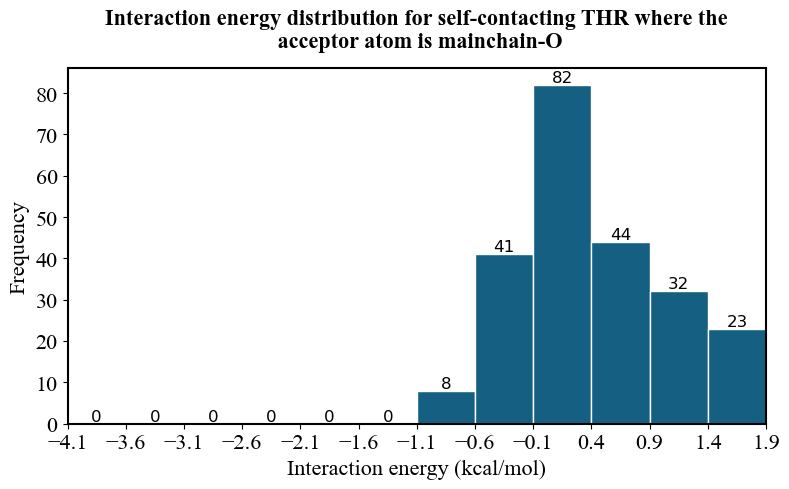

In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df1             = pd.read_excel("D:\\systems\\Globular selfcontSER interaction energies.xlsx", sheet_name = "Sheet1") #& make changes here
list_int_energy = sorted(list(df1["Interaction energy (kcal/mol)"].round(1)))
plot_title      = "Interaction energy distribution for self-contacting THR where the\n acceptor atom is mainchain-O" #& make changes here
label_xaxis     = "Interaction energy (kcal/mol)"
label_yaxis     =  "Frequency"

#^#############################################################################################################################
#^ Function to annotate histogram bins:
#^#############################################################################################################################
def histogram_annotator(N, bins):
    x_coords_of_annotations = list()
    for i in range(0, len(bins) - 1):
        x_coords_of_annotations.append((bins[i] + bins[i + 1]) / 2)
    for x_coord, y_coord in zip(x_coords_of_annotations, N):
        plt.annotate(text = int(y_coord), xy = (x_coord, y_coord), ha = 'center', va = 'bottom', fontsize = 12) 

#^#############################################################################################################################
#^ Histogram code:
#^#############################################################################################################################
font_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size': 16, 
    }
font_axis_labels = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'normal', 
    'size'  : 16, 
    }
font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'normal', 
    'size'  : 16, 
    }
pads = {
    "plot title pad" : 15, 
    "axis title pad" : 20, 
    }

# fig           = plt.figure(figsize=(25,6)) #? kind of optimized for bin width of 0.1
fig           = plt.figure(figsize=(8,5))    #? kind of optimized for bin width of 0.5
ax            = plt.axes()
bin_width     = np.arange(-4.1, 2.0, 0.5)
bin_width     = np.round(bin_width, decimals = 1)                                                     # if you don't do this, then the values are not properly allocated to the bins (this becomes visibile once annotations are enabled)
N, bins, patches = ax.hist(list_int_energy, color = "#156082", edgecolor = "white", bins = bin_width) #"bins" argument is used to declare the number of bins to be created. If you pass the range function to it, then the value of the 1st and the last xtick will be defined by the range values
ax.set_xticks(bins)                                                                                   #this ensures that the lower limits of the xticks are properly aligned with the histogram bars
ax.margins(x = 0)                                                                                     #this ensures that the xticks start from the origin of the x-axis (try running it after commenting it out for clarity)

histogram_annotator(N, bins)

plt.title(
    plot_title, 
    fontdict = font_title, 
    pad      = pads["plot title pad"],
    )

plt.xlabel(
    label_xaxis, 
    fontdict = font_axis_labels, 
    # labelpad = axistitle_pad,
    )
plt.ylabel(
    label_yaxis, 
    fontdict = font_axis_labels, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    # rotation = 45, 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )

plt.tight_layout()
plt.gca().set_facecolor('none') # this makes the chart area transparent
plt.gcf().set_facecolor('none') # this makes the axes and title area transparent
plt.show()

# Create <font color="red">boxplots</font>

## For interaction energies

### V1 (create 1 boxplot in one plot)

for pre optimization results

In [359]:
%reset -f

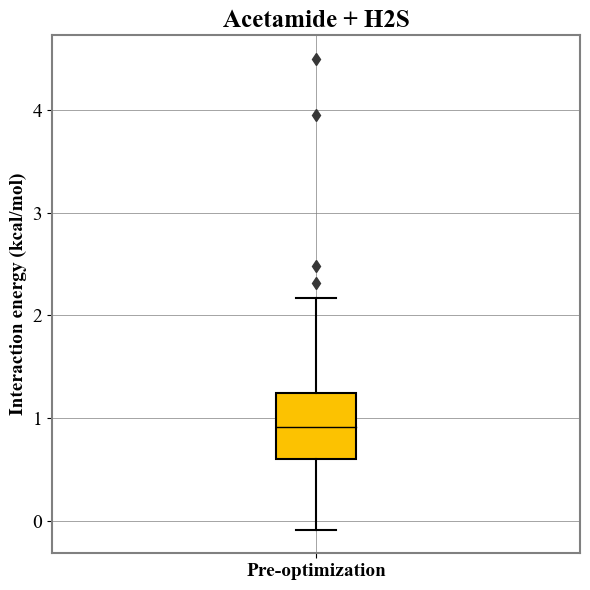

In [305]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
path_excel_file = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# plot_title      = "Acetamide + CH3SH" #&############# make changes here
plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"

df1             = pd.read_excel(path_excel_file, sheet_name = "Sheet1")
data_pre_opt    = df1["Interaction energy (kcal/mol) (PRE-OPT)"]
# data_post_opt   = df1["Interaction energy (kcal/mol) (POST-OPT)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
# data_post_opt   = pd.to_numeric(data_post_opt, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
# data_post_opt   = data_post_opt.dropna()

dict1           = dict()
dict1.setdefault("Pre-optimization",  data_pre_opt)
# dict1.setdefault("Post-optimization", data_post_opt)

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["Pre-optimization"], 
        # dict1["Post-optimization"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#D0312D', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)", #&############# make changes here
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [176]:
%reset -f

### V2 (create 2 boxplots in one plot)

#### V2.1 (for comparison of pre and post optimization results)

In [252]:
%reset -f

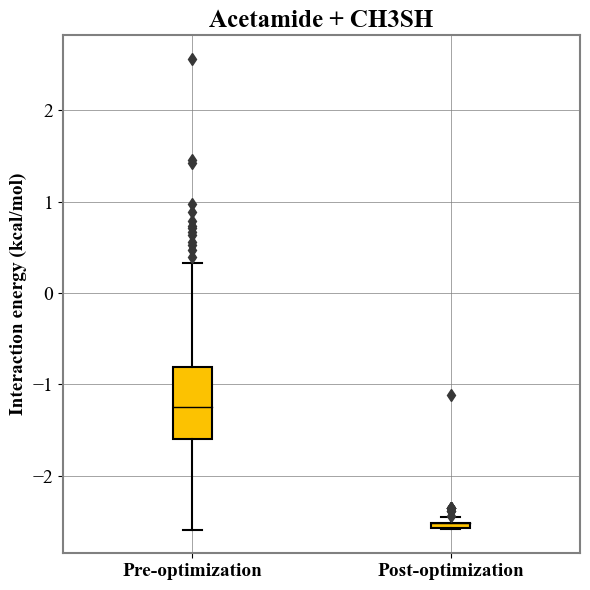

In [254]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\Interaction_energies_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\Interaction_energies_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\Interaction_energies_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

path_excel_file = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"

df1             = pd.read_excel(path_excel_file, sheet_name = "comparison")
data_pre_opt    = df1["Interaction energy (kcal/mol) (PRE-OPT)"]
data_post_opt   = df1["Interaction energy (kcal/mol) (POST-OPT)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_post_opt   = pd.to_numeric(data_post_opt, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
data_post_opt   = data_post_opt.dropna()
dict1           = dict()
dict1.setdefault("Pre-optimization",  data_pre_opt)
dict1.setdefault("Post-optimization", data_post_opt)

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["Pre-optimization"], 
        dict1["Post-optimization"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)", #&############# make changes here
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [253]:
%reset -f

#### V2.2 (for comparison of results obtained from B3LYP and MP2)

In [530]:
%reset -f

In [535]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ CHOOSE THE CORRECT PATH:
#^#####################################################################################################
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file_b3lyp = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
#^#####################################################################################################
#^ Choose plot title:
#^#####################################################################################################
plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"

df_b3lyp   = pd.read_excel(path_excel_file_b3lyp, sheet_name = "Sheet1")
df_mp2     = pd.read_excel(path_excel_file_mp2,   sheet_name = "Sheet1")
data_b3lyp = df_b3lyp["Interaction energy (kcal/mol) (PRE-OPT)"]
data_mp2   = df_mp2["Interaction energy (kcal/mol) (PRE-OPT)"]
data_b3lyp = pd.to_numeric(data_b3lyp, errors = "coerce") # it will ensure that string values are converted to nan values
data_mp2   = pd.to_numeric(data_mp2,   errors = "coerce")
data_b3lyp = data_b3lyp.dropna() # it will drop the nan values
data_mp2   = data_mp2.dropna()
dict1      = dict()
dict1.setdefault("B3LYP", data_b3lyp)
dict1.setdefault("MP2",   data_mp2)

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["B3LYP"], 
        dict1["MP2"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)", #&############# make changes here
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600, format = "jpg")

KeyError: 'Interaction energy (kcal/mol) (PRE-OPT)'

In [534]:
%reset -f

### V3 (create 3 boxplots in one plot)



#### for comparison of pre optimization results with post optimization results generated using two different theories

<font color="red">for this code to work, you will need the sheet named "comparison" in the partially optimized excel file</font>

In [ ]:
%reset -f

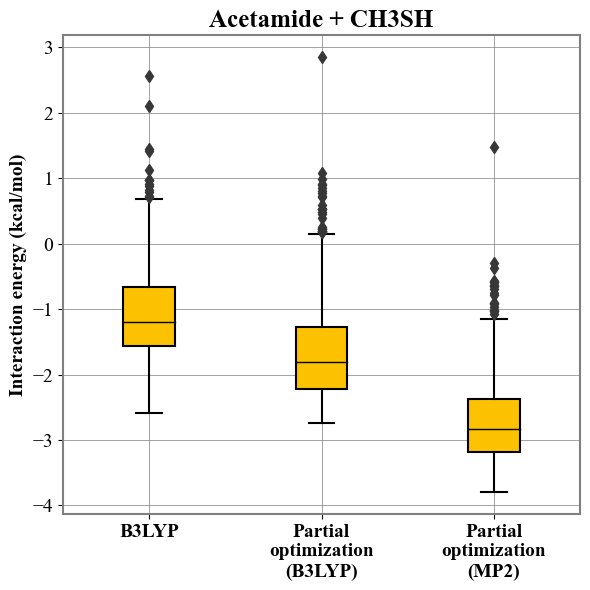

In [544]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ CHOOSE THE CORRECT PATH:
#^#####################################################################################################
path_excel_file_b3lyp         = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_excel_file_mp2           = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1           = dict()
df_pre_opt      = pd.read_excel(path_excel_file_b3lyp  , sheet_name = "comparison")
df_dft          = pd.read_excel(path_excel_file_b3lyp  , sheet_name = "comparison")
df_mp2          = pd.read_excel(path_excel_file_mp2    , sheet_name = "comparison")
data_pre_opt    = df_pre_opt["Interaction energy (kcal/mol) (PRE-OPT)"]
data_post_opt   = df_dft["Interaction energy (kcal/mol) (POST-OPT)"]
data_post_opt2  = df_mp2["Interaction energy (kcal/mol) (POST-OPT)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,   errors = 'coerce') # it will ensure that string values are converted to nan values
data_post_opt   = pd.to_numeric(data_post_opt,  errors = 'coerce')
data_post_opt2  = pd.to_numeric(data_post_opt2, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
data_post_opt   = data_post_opt.dropna()
data_post_opt2  = data_post_opt2.dropna()

plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"
# plot_title      = "CYS" #&############# make changes here
list1 = ["B3LYP", "Partial\noptimization\n(B3LYP)", "Partial\noptimization\n(MP2)"]
dict1 = {list1[0] : data_pre_opt, 
         list1[1] : data_post_opt, 
         list1[2] : data_post_opt2, 
         }

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]], dict1[list1[1]], dict1[list1[2]]], #&############# make changes here
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#FCC201']): #&#### shade of golden is: #FCC201; shade of red is: #D0312D
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig("D:\\THR_interaction_energy_partial_opt.jpg", dpi = 600, format = "jpg")

In [543]:
%reset -f

#### for comparison of pre optimization results generated using three different theories and basis sets

In [23]:
%reset -f

C:\Users\Prathvi\AppData\Local\Temp\ipykernel_22836\4011083982.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


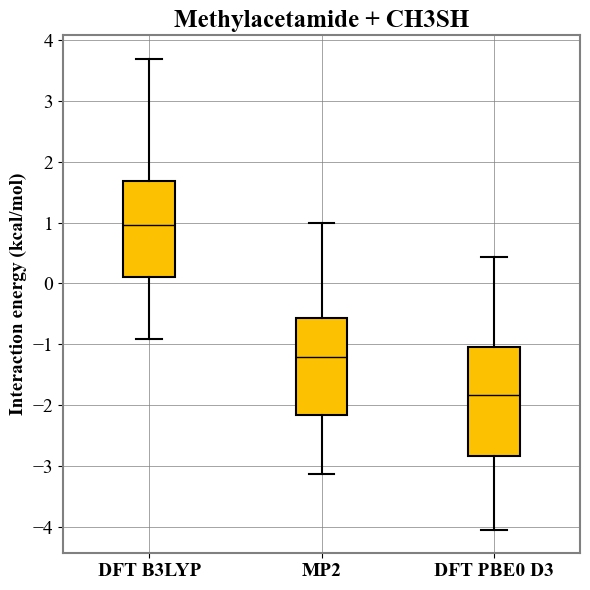

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ CHOOSE THE CORRECT PATH:
#^#####################################################################################################
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_pbe0  = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_pbe0  = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
path_excel_file_pbe0  = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\Interaction_energies_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1      = dict()
df_b3lyp   = pd.read_excel(path_excel_file_b3lyp , sheet_name = "Sheet1")
df_mp2     = pd.read_excel(path_excel_file_mp2   , sheet_name = "Sheet1")
df_pbe0    = pd.read_excel(path_excel_file_pbe0  , sheet_name = "Sheet1")
data_b3lyp = df_b3lyp["Interaction energy (kcal/mol) (PRE-OPT)"]
data_mp2   = df_mp2["Interaction energy (kcal/mol) (PRE-OPT)"]
data_pbe0  = df_pbe0["Interaction energy (kcal/mol) (PRE-OPT)"]
data_b3lyp = pd.to_numeric(data_b3lyp,   errors = 'coerce') # it will ensure that string values are converted to nan values
data_mp2   = pd.to_numeric(data_mp2, errors = 'coerce')
data_pbe0  = pd.to_numeric(data_pbe0,  errors = 'coerce')
data_b3lyp = data_b3lyp.dropna() # it will drop the nan values
data_mp2   = data_mp2.dropna()
data_pbe0  = data_pbe0.dropna()

# plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"
# plot_title      = "CYS" #&############# make changes here
list1 = ["DFT B3LYP", "MP2", "DFT PBE0 D3"]
dict1 = {list1[0] : data_b3lyp, 
         list1[1] : data_mp2, 
         list1[2] : data_pbe0, 
         }

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]], dict1[list1[1]], dict1[list1[2]]], #&############# make changes here
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#FCC201']): #&#### shade of golden is: #FCC201; shade of red is: #D0312D
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig("D:\\THR_interaction_energy_partial_opt.jpg", dpi = 600, format = "jpg")

In [23]:
%reset -f

#### for comparison of pre-optimization results for CYS SER THR

In [ ]:
%reset -f

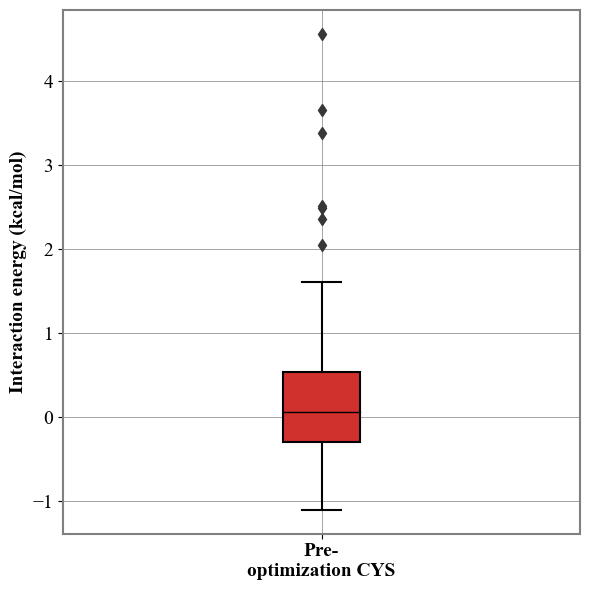

In [85]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1            = dict()
df_pre_opt_cys   = pd.read_excel("D:\\systems\\SHO_and_OHO_hbonds\\unoptimized_nbo_and_int_energy\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\int_energy_new\\Interaction_energies_SELFCONT_CYS_mainchainO_hcho_h2s.xlsx" , sheet_name = "Sheet1") #&############# make changes in sheet name here
df_pre_opt_ser   = pd.read_excel("D:\\systems\\SHO_and_OHO_hbonds\\unoptimized_nbo_and_int_energy\\system_files_SELFCONT_SER_mainchainO_hcho_h2o\\int_energy_new\\Interaction_energies_SELFCONT_SER_mainchainO_hcho_h2o.xlsx" , sheet_name = "Sheet1")
df_pre_opt_thr   = pd.read_excel("D:\\systems\\SHO_and_OHO_hbonds\\unoptimized_nbo_and_int_energy\\system_files_SELFCONT_THR_mainchainO_hcho_h2o\\int_energy_new\\Interaction_energies_SELFCONT_THR_mainchainO_hcho_h2o.xlsx" , sheet_name = "Sheet1")
data_pre_opt_cys = df_pre_opt_cys["Interaction energy (kcal/mol) (PRE-OPT)"]
data_pre_opt_ser = df_pre_opt_ser["Interaction energy (kcal/mol) (PRE-OPT)"]
data_pre_opt_thr = df_pre_opt_thr["Interaction energy (kcal/mol) (PRE-OPT)"]

data_pre_opt_cys = pd.to_numeric(data_pre_opt_cys,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_pre_opt_ser = pd.to_numeric(data_pre_opt_ser,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_pre_opt_thr = pd.to_numeric(data_pre_opt_thr,  errors = 'coerce') # it will ensure that string values are converted to nan values

data_pre_opt_cys = data_pre_opt_cys.dropna() # it will drop the nan values
data_pre_opt_ser = data_pre_opt_ser.dropna() # it will drop the nan values
data_pre_opt_thr = data_pre_opt_thr.dropna() # it will drop the nan values

# plot_title      = "CYS" #&############# make changes here
list1 = ["Pre-\noptimization CYS", #&############# make changes here
        "Pre-\noptimization SER", 
        "Pre-\noptimization THR", 
        ]

dict1 = {list1[0] : data_pre_opt_cys, #&############# make changes here
         list1[1] : data_pre_opt_ser, 
         list1[2] : data_pre_opt_thr,
         } 

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]],  #&############# make changes here
        dict1[list1[1]], 
        dict1[list1[2]], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#D0312D', '#D0312D', '#D0312D']): #&#### shade of golden is: #FCC201; shade of red is: #D0312D
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
# plt.title(
    # plot_title, 
    # fontdict = font_plot_title, 
    # pad = title_pad,
    # )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig("D:\\THR_interaction_energy_partial_opt.jpg", dpi = 600, format = "jpg")

In [ ]:
%reset -f

#### for comparison of post-optimization results for CYS SER THR

In [17]:
%reset -f

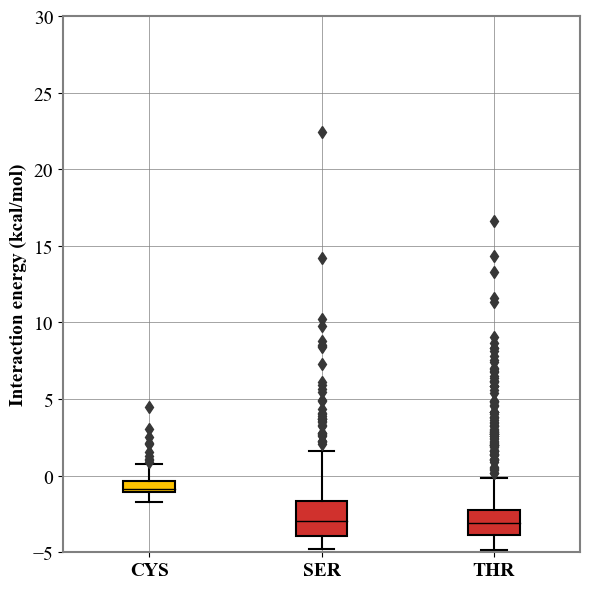

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1            = dict() 
df_pre_opt_cys   = pd.read_excel("D:\\systems\\SHO_and_OHO_hbonds\\partially_optimized_int_energy\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainO_hcho_h2s\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_mp2_6311g_2d2p.xlsx" , sheet_name = "comparison") #&############# make changes in sheet name here
df_pre_opt_ser   = pd.read_excel("D:\\systems\\SHO_and_OHO_hbonds\\partially_optimized_int_energy\\sidechain_hg_atom_only\\system_files_SELFCONT_SER_mainchainO_hcho_h2o\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_mp2_6311g_2d2p.xlsx" , sheet_name = "comparison")
df_pre_opt_thr   = pd.read_excel("D:\\systems\\SHO_and_OHO_hbonds\\partially_optimized_int_energy\\sidechain_hg_atom_only\\system_files_SELFCONT_THR_mainchainO_hcho_h2o\\mp2_6311g_2d2p\\Interaction_energies_partially_optimized_mp2_6311g_2d2p.xlsx" , sheet_name = "comparison")
data_pre_opt_cys = df_pre_opt_cys["Interaction energy (kcal/mol) (POST-OPT)"]
data_pre_opt_ser = df_pre_opt_ser["Interaction energy (kcal/mol) (POST-OPT)"]
data_pre_opt_thr = df_pre_opt_thr["Interaction energy (kcal/mol) (POST-OPT)"]

data_pre_opt_cys = pd.to_numeric(data_pre_opt_cys,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_pre_opt_ser = pd.to_numeric(data_pre_opt_ser,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_pre_opt_thr = pd.to_numeric(data_pre_opt_thr,  errors = 'coerce') # it will ensure that string values are converted to nan values

data_pre_opt_cys = data_pre_opt_cys.dropna() # it will drop the nan values
data_pre_opt_ser = data_pre_opt_ser.dropna() # it will drop the nan values
data_pre_opt_thr = data_pre_opt_thr.dropna() # it will drop the nan values

# list1 = ["CYS", #&############# make changes here
#         "SER", 
#         "THR", 
#         ]

list1 = ["CYS", #&############# make changes here
        "SER", 
        "THR", 
        ]

# list1 = ["CYS\n(MP2)", #&############# make changes here
#         "SER\n(MP2)", 
#         "THR\n(MP2)", 
#         ]

dict1 = {list1[0] : data_pre_opt_cys, #&############# make changes here
         list1[1] : data_pre_opt_ser, 
         list1[2] : data_pre_opt_thr,
         }

# plot_filename    = "E:\\CYS_SER_THR_interaction_energy_partial_opt_unopt.jpg" #&############# choose the correct name here
# plot_filename    = "E:\\CYS_SER_THR_interaction_energy_partial_opt_b3lyp.jpg"
plot_filename    = "E:\\CYS_SER_THR_interaction_energy_partial_opt_mp2.jpg"
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]],  #&############# make changes here
        dict1[list1[1]], 
        dict1[list1[2]], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#D0312D', '#D0312D']): #&#### shade of golden is: #FCC201; shade of red is: #D0312D
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
# plt.title(
    # plot_title, 
    # fontdict = font_plot_title, 
    # pad = title_pad,
    # )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

#^#####################################################################################################
#^ Set the axis limits:
#^#####################################################################################################
plt.ylim(-5, 30)

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
# plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [11]:
%reset -f

## For 2nd order perturbation energies

### V1 (Create 1 boxplot in one plot)

For pre-optimization results

In [ ]:
%reset -f

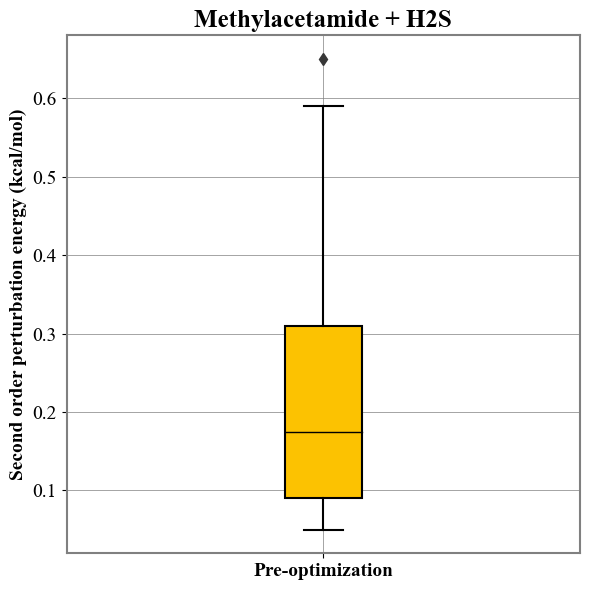

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx"

# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
path_excel_file = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
plot_title      = "Methylacetamide + H2S"
# plot_title      = "CH3CO-CYS-NHCH3"

df1          = pd.read_excel(path_excel_file, sheet_name = "Sheet1")
df1          = df1.drop_duplicates(subset = ["Resinfo"], keep = "first")    #&###### use these lines if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized and partially_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
df1          = df1.reset_index(drop = True)

data_pre_opt = df1["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_pre_opt = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_pre_opt = data_pre_opt.dropna() # it will drop the nan values

dict1           = dict()
dict1.setdefault("Pre-optimization",  data_pre_opt)

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["Pre-optimization"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#D0312D', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Second order perturbation energy (kcal/mol)", #&############# make changes here
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [ ]:
%reset -f

### V2 (Create 2 boxplots in one plot)

#### V2.1 (for comparison of pre and post optimization results)

In [ ]:
%reset -f

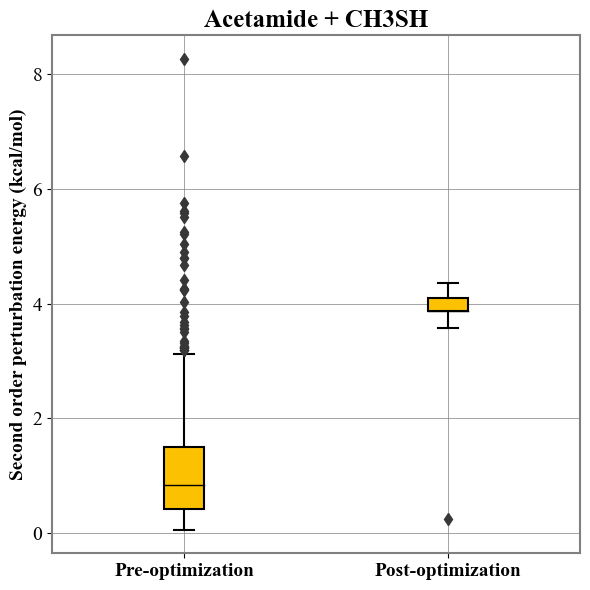

In [241]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\NBO_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\NBO_optimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\NBO_optimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\NBO_optimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx"

# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" #&############# make changes here
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

path_excel_file = "D:\\qm_systems\\NHS_hbonds\\fully_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"
# plot_title      = "CH3CO-CYS-NHCH3"

df1             = pd.read_excel(path_excel_file, sheet_name = "comparison")
data_pre_opt    = df1["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_post_opt   = df1["Second order perturbation energy (kcal/mol) (POST-OPT)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_post_opt   = pd.to_numeric(data_post_opt, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
data_post_opt   = data_post_opt.dropna()

# data_pre_opt    = data_pre_opt.drop_duplicates(subset = ["Resinfo"], keep = "first")    #&###### use these lines if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized and partially_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
# data_post_opt   = data_post_opt.drop_duplicates(subset = ["Resinfo"], keep = "first")
data_pre_opt    = data_pre_opt.reset_index(drop = True)
data_post_opt   = data_post_opt.reset_index(drop = True)

dict1           = dict()
dict1.setdefault("Pre-optimization",  data_pre_opt)
dict1.setdefault("Post-optimization", data_post_opt)

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["Pre-optimization"], 
        dict1["Post-optimization"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    # "2nd order perturbation energy (kcal/mol)", #&############# make changes here
    "Second order perturbation energy (kcal/mol)", #&############# make changes here
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [240]:
%reset -f

#### V2.2 (for comparison of results obtained from B3LYP and MP2)

In [555]:
%reset -f

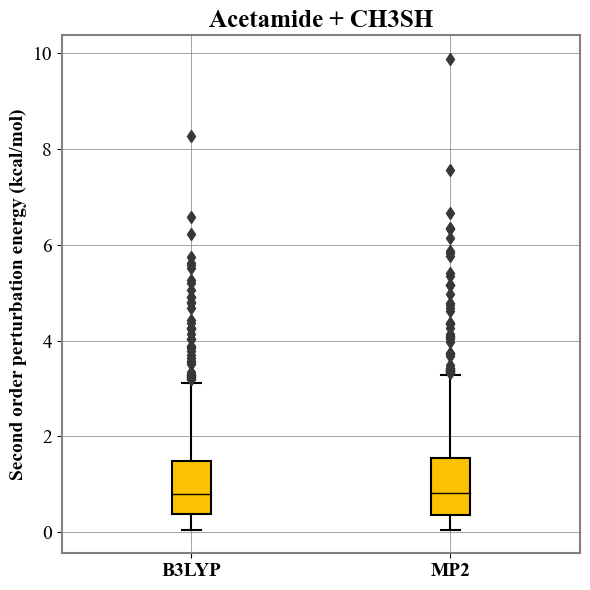

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"

path_excel_file_b3lyp = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
path_excel_file_mp2   = "D:\\qm_systems\\NHS_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
#^#####################################################################################################
#^ Choose plot title:
#^#####################################################################################################
plot_title = "Acetamide + CH3SH" #&############# make changes here
# plot_title = "Acetamide + H2S"
# plot_title = "Methylacetamide + CH3SH"
# plot_title = "Methylacetamide + H2S"

y_label = "Second order perturbation energy (kcal/mol)" #&############# make changes here

df_b3lyp   = pd.read_excel(path_excel_file_b3lyp, sheet_name = "Sheet1")
df_mp2     = pd.read_excel(path_excel_file_mp2,   sheet_name = "Sheet1")
df_b3lyp   = df_b3lyp.drop_duplicates(subset = ["Resinfo"], keep = "first")    #&###### use these lines if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized and partially_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
df_mp2     = df_mp2.drop_duplicates(subset = ["Resinfo"], keep = "first")
df_b3lyp   = df_b3lyp.reset_index(drop = True)
df_mp2     = df_mp2.reset_index(drop = True)

data_b3lyp = df_b3lyp["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_mp2   = df_mp2["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_b3lyp = pd.to_numeric(data_b3lyp, errors = "coerce") # it will ensure that string values are converted to nan values
data_mp2   = pd.to_numeric(data_mp2,   errors = "coerce")
data_b3lyp = data_b3lyp.dropna() # it will drop the nan values
data_mp2   = data_mp2.dropna()

dict1      = dict()
dict1.setdefault("B3LYP", data_b3lyp)
dict1.setdefault("MP2",   data_mp2)

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["B3LYP"], 
        dict1["MP2"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    y_label,
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [354]:
%reset -f

### V3 (Create 3 boxplots in one plot)

#### for comparison of pre optimization results generated using three different theories and basis sets

In [20]:
%reset -f

C:\Users\Prathvi\AppData\Local\Temp\ipykernel_22836\3255767721.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


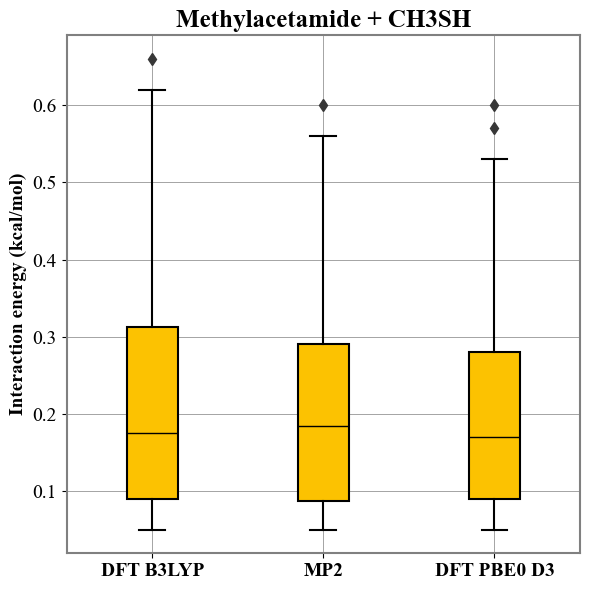

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ CHOOSE THE CORRECT PATH:
#^#####################################################################################################
# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file_pbe0  = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\NBO_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

# path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file_pbe0  = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"

path_excel_file_b3lyp = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
path_excel_file_mp2   = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
path_excel_file_pbe0  = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\NBO_unoptimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1      = dict()
df_b3lyp   = pd.read_excel(path_excel_file_b3lyp , sheet_name = "Sheet1")
df_mp2     = pd.read_excel(path_excel_file_mp2   , sheet_name = "Sheet1")
df_pbe0    = pd.read_excel(path_excel_file_pbe0  , sheet_name = "Sheet1")
data_b3lyp = df_b3lyp["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_mp2   = df_mp2["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_pbe0  = df_pbe0["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_b3lyp = pd.to_numeric(data_b3lyp,   errors = 'coerce') # it will ensure that string values are converted to nan values
data_mp2   = pd.to_numeric(data_mp2, errors = 'coerce')
data_pbe0  = pd.to_numeric(data_pbe0,  errors = 'coerce')
data_b3lyp = data_b3lyp.dropna() # it will drop the nan values
data_mp2   = data_mp2.dropna()
data_pbe0  = data_pbe0.dropna()

# plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"
# plot_title      = "CYS" #&############# make changes here
list1 = ["DFT B3LYP", "MP2", "DFT PBE0 D3"]
dict1 = {list1[0] : data_b3lyp, 
         list1[1] : data_mp2, 
         list1[2] : data_pbe0, 
         }

# plot_filename    = "D:\\" + resname + ".jpg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]], dict1[list1[1]], dict1[list1[2]]], #&############# make changes here
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#FCC201']): #&#### shade of golden is: #FCC201; shade of red is: #D0312D
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Interaction energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig("D:\\THR_interaction_energy_partial_opt.jpg", dpi = 600, format = "jpg")

In [5]:
%reset -f

#### for comparing pre optimization results with post optimization results generated using two different theories)

In [590]:
%reset -f

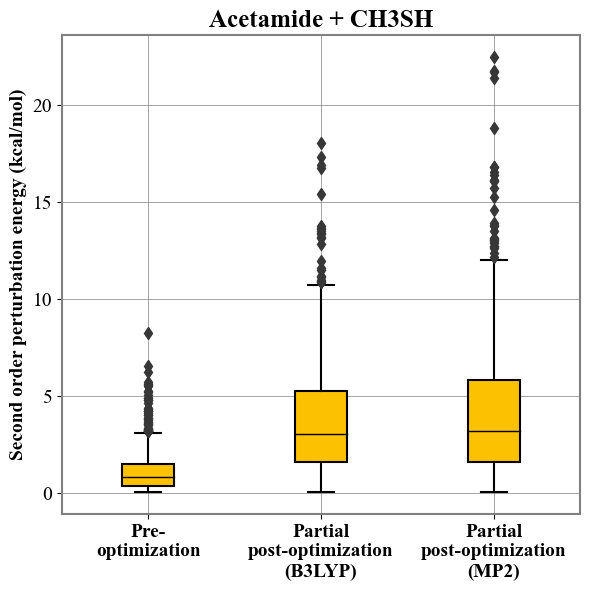

In [592]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1           = dict()
# df_pre_opt      = pd.read_excel("D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx" ,  sheet_name = "comparison") #&############# make changes in sheet name here
# df_dft          = pd.read_excel("D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"   , sheet_name = "comparison")
# df_mp2          = pd.read_excel("D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"       , sheet_name = "comparison")

# df_pre_opt      = pd.read_excel("D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx" ,  sheet_name = "comparison")
# df_dft          = pd.read_excel("D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx" ,  sheet_name = "comparison")
# df_mp2          = pd.read_excel("D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3.xlsx"   ,  sheet_name = "comparison")

df_pre_opt = pd.read_excel("D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx", sheet_name = "comparison")
df_dft     = pd.read_excel("D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\b3lyp_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx", sheet_name = "comparison")
df_mp2     = pd.read_excel("D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"  , sheet_name = "comparison")
#^NOTE: This code works on the "comparison" worksheet due to which it doesn't require the code lines which are used to remove duplicate rows w.r.t. "Resinfo" column

data_pre_opt    = df_pre_opt["Second order perturbation energy (kcal/mol) (PRE-OPT)"]
data_post_opt   = df_dft["Second order perturbation energy (kcal/mol) (POST-OPT)"]
data_post_opt2  = df_mp2["Second order perturbation energy (kcal/mol) (POST-OPT)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_post_opt   = pd.to_numeric(data_post_opt, errors = 'coerce')
data_post_opt2  = pd.to_numeric(data_post_opt2, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
data_post_opt   = data_post_opt.dropna()
data_post_opt2  = data_post_opt2.dropna()

plot_title      = "Acetamide + CH3SH" #&############# make changes here
# plot_title      = "Acetamide + H2S"
# plot_title      = "Methylacetamide + CH3SH"
# plot_title      = "Methylacetamide + H2S"
# plot_title      = "CH3CO_CYS_NHCH3"
# plot_title      = "CYS" #&############# make changes here
list1 = ["Pre-\noptimization", "Partial\npost-optimization\n(B3LYP)", "Partial\npost-optimization\n(MP2)"]

dict1 = {list1[0] : data_pre_opt, 
         list1[1] : data_post_opt, 
         list1[2] : data_post_opt2, 
         }

# plot_filename    = "D:\\" + resname + ".jpeg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }


#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]], dict1[list1[1]], dict1[list1[2]]], #&############# make changes here
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#FCC201']): #&#### shade of golden is: #FCC201; shade of red is: #D0312D
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
plt.title(
    plot_title, 
    fontdict = font_plot_title, 
    # pad = title_pad,
    )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "Second order perturbation energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600)

In [591]:
%reset -f

#### V3.2 (for comparing pre optimization results of CYS SER THR)

In [ ]:
%reset -f

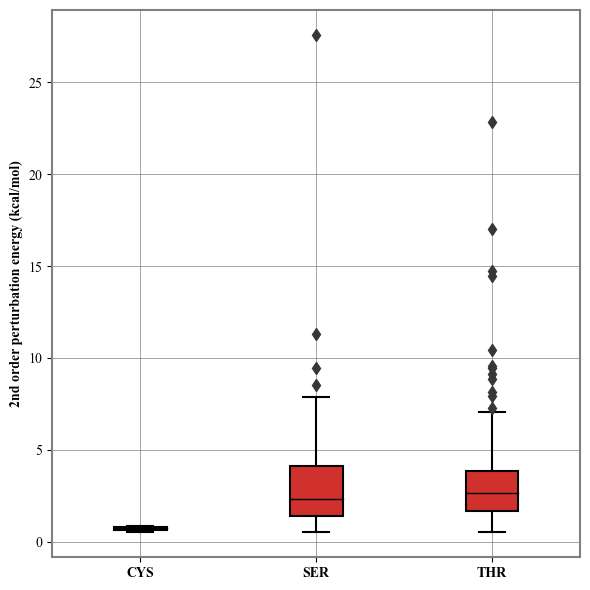

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1           = dict()
df_pre_opt      = pd.read_excel("C:\\Users\\Prathvi\\Downloads\\Globular H-bonds CYS sidechain is the donor NBO info for self contacts.xlsx" , sheet_name = "Accep is mainchain O") #&############# make changes in sheet name here
df_dft          = pd.read_excel("C:\\Users\\Prathvi\\Downloads\\Globular H-bonds SER sidechain is the donor NBO info for self contacts.xlsx" , sheet_name = "Accep is mainchain O")
df_mp2          = pd.read_excel("C:\\Users\\Prathvi\\Downloads\\Globular H-bonds THR sidechain is the donor NBO info for self contacts.xlsx" , sheet_name = "Accep is mainchain O")

df_pre_opt = df_pre_opt.drop_duplicates(subset = ["Resinfo"], keep = "first")    #&###### use these lines if you have duplicate rows in the dataframe w.r.t. "Resinfo" column (this happened in NHS pre_optimized and partially_optimized NONSELFCONT_CYS_mainchainN_acetamide_ch3sh NBO excel file cuz the BD* orbital of NH group was interaction with 2 lone pairs of the S-atom)
df_dft     = df_dft.drop_duplicates(subset = ["Resinfo"], keep = "first")
df_mp2     = df_mp2.drop_duplicates(subset = ["Resinfo"], keep = "first")
df_pre_opt = df_pre_opt.reset_index(drop = True)
df_dft     = df_dft.reset_index(drop = True)
df_mp2     = df_mp2.reset_index(drop = True)

data_pre_opt    = df_pre_opt["Second order perturbation energy (kcal/mol)"]
data_post_opt   = df_dft["Second order perturbation energy (kcal/mol)"]
data_post_opt2  = df_mp2["Second order perturbation energy (kcal/mol)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_post_opt   = pd.to_numeric(data_post_opt, errors = 'coerce')
data_post_opt2  = pd.to_numeric(data_post_opt2, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
data_post_opt   = data_post_opt.dropna()
data_post_opt2  = data_post_opt2.dropna()

# plot_title      = "CYS\n(HCHO + H2S)" #&############# make changes here
list1= ["CYS", 
        "SER", 
        "THR", 
        ]
dict1 = {list1[0] : data_pre_opt, 
         list1[1] : data_post_opt, 
         list1[2] : data_post_opt2, 
         }

# plot_filename    = "D:\\" + resname + ".jpeg" #&############# make changes here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 15
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1[list1[0]], #&############# make changes here
         dict1[list1[1]], 
         dict1[list1[2]], 
         ], 
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#D0312D', '#D0312D']): # '#FCC201' is a shade of golden and '#D0312D' is a shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
# plt.title(
    # plot_title, 
    # fontdict = font_plot_title, 
    # pad = title_pad,
    # )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "2nd order perturbation energy (kcal/mol)",
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
# plt.savefig(plot_filename, dpi = 600)

In [ ]:
%reset -f

## For comparison of H-O or H-N distances before and after partial optimization

ADVICE: If you have to create these plots for all the different types of model systems, first create HG...O plots for all the model systems and then create HG...N. If you do like this, you will have to make least number of manual changes in the code.

In [277]:
%reset -f

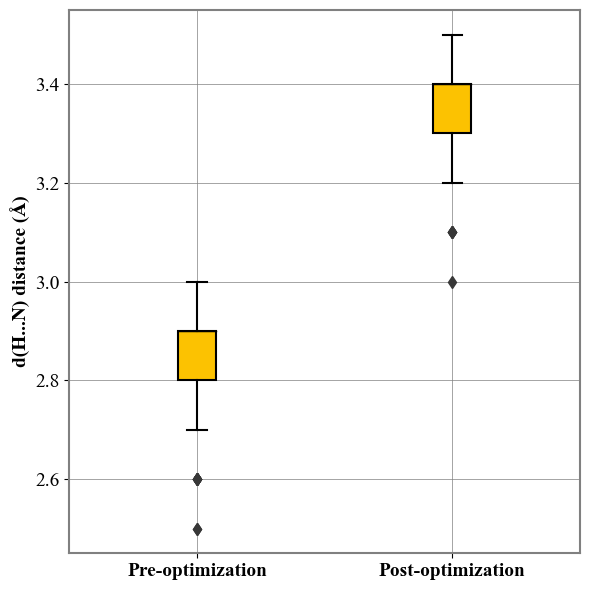

In [279]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ CHOOSE THE CORRECT PATH:
#^#####################################################################################################
# path_excel_file = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\Pre optimized pdb files and their corresponding partially optimized pdb files\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\b3lyp_6311g_2d2p\\HG_O_and_HG_N_distances_system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\Pre optimized pdb files and their corresponding partially optimized pdb files\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\b3lyp_6311g_2d2p\\HG_O_and_HG_N_distances_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\Pre optimized pdb files and their corresponding partially optimized pdb files\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\b3lyp_6311g_2d2p\\HG_O_and_HG_N_distances_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh.xlsx"
# path_excel_file = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\Pre optimized pdb files and their corresponding partially optimized pdb files\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\b3lyp_6311g_2d2p\\HG_O_and_HG_N_distances_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
path_excel_file = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\Pre optimized pdb files and their corresponding partially optimized pdb files\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\b3lyp_6311g_2d2p\\HG_O_and_HG_N_distances_system_files_SELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"

#^#####################################################################################################
#^ CREATE INPUT FOR THE PLOT:
#^#####################################################################################################
df1             = pd.read_excel(path_excel_file, sheet_name = "Sheet1")
data_pre_opt    = df1["HG_N distance (PRE-OPT)"] #&############# make sure that if here it is "HG_O", then there is "HG_O" in "data_post_opt", "ylabel" and "plot_filename" also
data_post_opt   = df1["HG_N distance (POST-OPT)"]
data_pre_opt    = pd.to_numeric(data_pre_opt,  errors = 'coerce') # it will ensure that string values are converted to nan values
data_post_opt   = pd.to_numeric(data_post_opt, errors = 'coerce')
data_pre_opt    = data_pre_opt.dropna() # it will drop the nan values
data_post_opt   = data_post_opt.dropna()
dict1           = dict()
dict1.setdefault("Pre-optimization",  data_pre_opt)
dict1.setdefault("Post-optimization", data_post_opt)

y_label       = "d(H...N) distance (Å)" #&############# make changes to the "...O" part here
plot_filename = "\\".join(path_excel_file.split("\\")[0:-3]) + "\\" + path_excel_file.split("\\")[-3] + "_HG_N" + ".jpg" #&############# make changes to the ""_HG_O"" part here
#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 18
    }

font_xaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 10
    }

font_yaxis_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

font_ticks = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 14
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [
        dict1["Pre-optimization"], 
        dict1["Post-optimization"], 
        ],
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )

#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#FCC201', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black")           # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
# plt.title(
#     plot_title, 
#     fontdict = font_plot_title, 
    # pad = title_pad,
    # )
# plt.xlabel(
#     "Residue", 
#     fontdict = font_xaxis_title, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    y_label,
    fontdict = font_yaxis_title, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = font_ticks["weight"], 
    )
plt.yticks(
    fontname   = font_ticks["family"], 
    fontsize   = font_ticks["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f')) # this line ensures that the values on the y-axis ticks have a single digit after the decimal
plt.rcParams['axes.linewidth'] = 1.5
plt.tight_layout()
plt.gcf().set_facecolor("none") # creates plots with transparent background
# plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
plt.savefig(plot_filename, dpi = 600, format = "jpg")

In [278]:
%reset -f

## For HA distances for self-contacting CYS SER THR

In [ ]:
%reset -f

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#^#####################################################################################################
#^ Import the data:
#^#####################################################################################################
dict1            = dict()
path_excel_files = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Latest\\"
for excel_file in os.listdir(path_excel_files):
    if excel_file in ["Globular H-bonds CYS sidechain is the donor.xlsx", "Globular H-bonds SER sidechain is the donor.xlsx", "Globular H-bonds THR sidechain is the donor.xlsx"]:
        print("processing:", excel_file)
        df1          = pd.read_excel(path_excel_files + excel_file, sheet_name = "Self contact instances")
        df1          = df1[df1["Acceptor atom"] == "O"]
        resname      = excel_file.split(" ")[2]
        data = df1["HA distance (Å)"] # boxplots can be created using pandas series only. Normal lists cannot be used to create boxplots
        dict1.setdefault(resname, data)
# print(dict1.values())

#^#####################################################################################################
#^ Define colors, linewidths & fonts:
#^#####################################################################################################
gridline_width    = 0.5
spineline_width   = 1.5
boxplotedge_width = 1.5
grid_color        = "grey"
spine_color       = grid_color
outlier_color     = "#373737"

font_plot_title = {
    'family':'Times New Roman', 
    'color' :'black', 
    'weight':'bold', 
    'size'  : 16
    }

#^#####################################################################################################
#^ Plot:
#^#####################################################################################################
fig = plt.figure(figsize=(6,6))
ax  = plt.axes()
box = ax.boxplot(
    x = [dict1["CYS"], dict1["SER"], dict1["THR"]], 
    patch_artist = True, 
    # notch = True, # creates a notch at that point of the box where the median is
    # showmeans = True, # displays a dashed line at mean
    # meanline = True, # displays a dashed line at mean
    labels = list(dict1.keys())
    )
#^#####################################################################################################
#^ Set box facecolor and edgecolor (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for patch, color in zip(box['boxes'], ['#FCC201', '#D0312D', '#D0312D']): # shade of golden and shade of red
    patch.set_facecolor(color)
    patch.set_edgecolor("black") # I want each boxplot's edgecolor to be black
    patch.set_linewidth(boxplotedge_width) # sets the width of boxplot edges

#^#####################################################################################################
#^ Set median line color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for median in box['medians']:
    median.set(
        color = "black", 
        # linewidth = boxplotedge_width
        )

#^#####################################################################################################
#^ Set whisker color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for whisker in box['whiskers']:
    whisker.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set whiskercap color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for cap in box['caps']:
    cap.set(
        color = "black", 
        linewidth = boxplotedge_width, 
        )

#^#####################################################################################################
#^ Set outlier markers color (works only if "patch_artist= True" is passed in "ax.boxplot()"):
#^#####################################################################################################
for flier in box['fliers']:
    flier.set(
        marker = 'd', 
        markerfacecolor = outlier_color, 
        markeredgecolor = outlier_color, 
        # linewidth=  1.5, 
        )

#^#####################################################################################################
#^ Set axis lables and fonts:
#^#####################################################################################################
# plt.title(
    # plot_title, 
    # fontdict = font1, 
    # pad = title_pad,
    # )
# plt.xlabel(
#     "Residue", 
#     fontdict = font2, 
    # labelpad = axistitle_pad,
    # )
plt.ylabel(
    "HA distance (Å)", 
    fontdict = font2, 
    # labelpad = axistitle_pad,
    )
plt.xticks(
    fontname   = font2["family"], 
    fontsize   = font2["size"], 
    fontweight = font2["weight"], 
    )
plt.yticks(
    fontname   = font2["family"], 
    fontsize   = font2["size"], 
    fontweight = 'normal', 
    )

ax.grid(axis = "both", which = "major", visible = True, color = grid_color, linestyle = "-", linewidth = gridline_width)
ax.spines['bottom'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['top'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
plt.rcParams['axes.linewidth'] = 1.5
plt.gcf().set_facecolor("none") # creates plots with transparent background
# plt.show() # if you enable this alongwith "plt.savefig", the plot saves on disk as a blank canvas
plt.savefig("D:\\Boxplots for HA distances for self-contacting CYS SER THR.jpeg", dpi = 600)

# Print the min, max, avg values of <font color="red">pre-opt</font> interaction energies/2nd order perturbation energies for the PPT

In [ ]:
%reset -f

In [ ]:
import pandas as pd
excel_file_path = "D:\\qm_systems\\SHN_hbonds\\pre_optimized\\New folder\\Interaction_energies_unoptimized_system_files_SELFCONT_CYS_mainchainN_acetamide_ch3sh.xlsx" # copy all the excel files in one folder called "New folder"
df1             = pd.read_excel(excel_file_path, sheet_name = "Sheet1")

#^#################################################################################
#^ Choose the correct column:
#^#################################################################################
if "Interaction_energies" in excel_file_path:
    col_header = "Interaction energy (kcal/mol) (PRE-OPT)"
if "NBO" in excel_file_path:
    col_header = "Second order perturbation energy (kcal/mol) (PRE-OPT)"

#^###################################################################################################################################
#^ Convert all the non-numeric values of the desired column to "NaN" so that they dont interfere with downstream operations:
#^###################################################################################################################################
df2             = pd.DataFrame()
df2[col_header] = pd.to_numeric(df1[col_header], errors = "coerce")

#^#################################################################################
#^ Calculate the minimum, maximum & average of the desired column:
#^#################################################################################
val_min = df2[col_header].min()
val_max = df2[col_header].max()
val_avg = df2[col_header].mean()

if "Interaction_energies" in excel_file_path:
    df3                = pd.DataFrame()
    df3                = df2[df2[col_header] < 0]
    val_less_than_zero = len(df3)
    avg_less_than_zero = df3[col_header].mean()
    print("Minimum:", val_min)
    print("Maximum:", val_max)
    print("Average:", val_avg)
    print("Average of values <0 kcal/mol:", avg_less_than_zero if len(df3) > 0 else "No value < 0")
    print("Total values <0 kcal/mol:", val_less_than_zero)

if "NBO" in excel_file_path:
    total_examples_where_rel_interaction_was_found = df2[col_header].count() # dont use "len(df2[col_header])" here
    print("Minimum:", val_min)
    print("Maximum:", val_max)
    print("Average:", val_avg)
    print("Total examples where relevant interaction was found:", str(total_examples_where_rel_interaction_was_found) + "/" + str(len(df2)))

Minimum: 56.24
Maximum: 110.48
Average: 79.00217821782178
Average of values <0 kcal/mol: No value < 0
Total values <0 kcal/mol: 0


# Print the min, max, avg values of <font color="red">post-opt</font> interaction energies/2nd order perturbation energies for the PPT

This code is made for the "comparison" tab

In [ ]:
%reset -f

In [ ]:
import pandas as pd
excel_file_path = "D:\\qm_systems\\SHN_hbonds\\fully_optimized\\New folder\\NBO_optimized_system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s.xlsx"
df1             = pd.read_excel(excel_file_path, sheet_name = "comparison")

#^#################################################################################
#^ Choose the correct column:
#^#################################################################################
if "Interaction_energies" in excel_file_path:
    col_header  = "Interaction energy (kcal/mol) (PRE-OPT)"
    col_header2 = "Interaction energy (kcal/mol) (POST-OPT)"
if "NBO" in excel_file_path:
    col_header  = "Second order perturbation energy (kcal/mol) (PRE-OPT)"
    col_header2 = "Second order perturbation energy (kcal/mol) (POST-OPT)"

#^###################################################################################################################################
#^ Convert all the non-numeric values of the desired columns to "NaN" so that they dont interfere with downstream operations:
#^###################################################################################################################################
df2              = pd.DataFrame()
df2[col_header]  = pd.to_numeric(df1[col_header],  errors = "coerce") # convert all the non-numeric values to "NaN" so that they dont interfere with the functions
df2[col_header2] = pd.to_numeric(df1[col_header2], errors = "coerce")

#^#################################################################################
#^ Calculate the minimum, maximum & average of the desired columns:
#^#################################################################################
val_min = df2[col_header].min()
val_max = df2[col_header].max()
val_avg = df2[col_header].mean()

val_min2 = df2[col_header2].min()
val_max2 = df2[col_header2].max()
val_avg2 = df2[col_header2].mean()

if "Interaction_energies" in excel_file_path:
    df3 = pd.DataFrame()
    df4 = pd.DataFrame()

    df3                = df2[df2[col_header] < 0]
    val_less_than_zero = len(df3)
    avg_less_than_zero = df3[col_header].mean()

    df4                 = df2[df2[col_header2] < 0]
    val_less_than_zero2 = len(df4)
    avg_less_than_zero2 = df4[col_header2].mean()

    print("PRE_OPT Minimum:", val_min)
    print("PRE_OPT Maximum:", val_max)
    print("PRE_OPT Average:", val_avg)
    print("Average of PRE-OPT values <0 kcal/mol:", avg_less_than_zero if len(df3) > 0 else "No value < 0")
    print("Total PRE-OPT values <0 kcal/mol:",      val_less_than_zero)

    print("POST-OPT Minimum:", val_min2)
    print("POST-OPT Maximum:", val_max2)
    print("POST-OPT Average:", val_avg2)
    print("Average of POST-OPT values <0 kcal/mol:", avg_less_than_zero2 if len(df4) > 0 else "No value < 0")
    print("Total POST-OPT values <0 kcal/mol:",      val_less_than_zero2)

if "NBO" in excel_file_path:
    total_examples_where_rel_interaction_was_found2 = df2[col_header2].count() # dont use "len(df2[col_header])" here
    print("PRE_OPT Minimum:", val_min)
    print("PRE_OPT Maximum:", val_max)
    print("PRE_OPT Average:", val_avg)
    print("POST-OPT Minimum:", val_min2)
    print("POST-OPT Maximum:", val_max2)
    print("POST-OPT Average:", val_avg2)
    print("Total POST-OPT examples where relevant interaction was found:", total_examples_where_rel_interaction_was_found2)

PRE_OPT Minimum: 0.06
PRE_OPT Maximum: 0.48
PRE_OPT Average: 0.24047619047619045
POST-OPT Minimum: 1.02
POST-OPT Maximum: 1.27
POST-OPT Average: 1.187
Total POST-OPT examples where relevant interaction was found: 10


In [1]:
%reset -f

# Create an excel workbook containing two worksheets:
one containing interaction energies corresponding to 2nd order perturbation energies<br>
other containing 2nd order perturbation energies corresponding to interaction energies

QUESTION: Why create two worksheets? Can't they be found in the same worksheet? No. Because it can be possible that for a given example, interaction energy was found but 2nd order perturbation energy wasn't found (this could mean that the interaction energy is not due to charge transfer between the desired atoms but between some other atom pairs) and vice-versa.

In [39]:
%reset -f

In [91]:
import os
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^###########################################################################################
#^ Create dataframes for nbo and int energy excel files:
#^###########################################################################################
path = "C:\\Users\\Prathvi\\Downloads\\AAAA\\" # paste 2 excel files in this folder: the interaction energy excel file and the nbo excel file, both for the same model system and for the same interaction type e.g., nbo excel file and int energy excel file for selfcont acetamide + ch3sh
for file in os.listdir(path):
    if ".xlsx" in file:
        if "NBO" in file:
            df_nbo      = pd.read_excel(path + file, sheet_name = "comparison")
            system_type = file.split("NBO_")[1] # if the file name is "NBO_partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx", then system_type will contain "partially_optimized_system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s.xlsx"
        if "Interaction_energies" in file:
            df_int = pd.read_excel(path + file, sheet_name = "comparison")

#^###########################################################################################
#^ Grab interaction energies corresponding to 2nd order perturbation energies:
#^###########################################################################################
dict1 = dict()
for i in df_nbo.itertuples():
    resinfo1 = df_nbo.at[i[0], "Resinfo"]
    nbo      = df_nbo.at[i[0], "Second order perturbation energy (kcal/mol) (POST-OPT)"]
    for j in df_int.itertuples():
        resinfo2 = df_int.at[j[0], "Resinfo"]
        if resinfo1 == resinfo2:
            int_energy = df_int.at[j[0], "Interaction energy (kcal/mol) (POST-OPT)"]
            dict1.setdefault("Resinfo",                                                []).append(resinfo1)
            dict1.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(nbo)
            dict1.setdefault("Interaction energy (kcal/mol) (POST-OPT)",               []).append(int_energy)

#^###########################################################################################
#^ Grab 2nd order perturbation energies corresponding to interaction energies:
#^###########################################################################################
dict2 = dict()
for i in df_int.itertuples():
    resinfo1   = df_int.at[i[0], "Resinfo"]
    int_energy = df_int.at[i[0], "Interaction energy (kcal/mol) (POST-OPT)"]
    for j in df_nbo.itertuples():
        resinfo2 = df_nbo.at[j[0], "Resinfo"]
        if resinfo1 == resinfo2:
            nbo = df_nbo.at[j[0], "Second order perturbation energy (kcal/mol) (POST-OPT)"]
            dict2.setdefault("Resinfo",                                                []).append(resinfo1)
            dict2.setdefault("Interaction energy (kcal/mol) (POST-OPT)",               []).append(int_energy)
            dict2.setdefault("Second order perturbation energy (kcal/mol) (POST-OPT)", []).append(nbo)

# excel_workbook_path = "C:\\Users\\Prathvi\\Downloads\\" + "b3lyp" + "_nbo_int_energy_comp_" + system_type #&##### make changes in the theory name here
excel_workbook_path = "C:\\Users\\Prathvi\\Downloads\\" + "mp2" + "_nbo_int_energy_comp_" + system_type #&##### make changes in the theory name here
with pd.ExcelWriter(excel_workbook_path, engine = "openpyxl") as writer:
    df_comp1 = pd.DataFrame(dict1)
    df_comp2 = pd.DataFrame(dict2)
    df_comp1.to_excel(writer, sheet_name = "nbo_compared_with_int_energy", index = False)
    df_comp2.to_excel(writer, sheet_name = "int_energy_compared_with_nbo", index = False)
range_to_table.range_to_table(excel_workbook_path)

converting the following worksheet to table: nbo_compared_with_int_energy
converting the following worksheet to table: int_energy_compared_with_nbo


In [90]:
%reset -f

# Save SASA values of residues from the Naccess output files to excel file

## For all Cys, Ser, Thr residues in the unique chains of the dataset

In [2]:
import pandas as pd
import pprint
import os
import re

#^#########################################################################################################################################
#^ Create a dictionary containing unique chains of the dataset:
#^#########################################################################################################################################
with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
    filez.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
# pprint.pprint(dict_id_chains)        
# print(len(dict_id_chains.keys()))
# print(dict_id_chains.keys()) 

#^#########################################################################################################################################
#^ Grabbing & saving the SASA values of all the Cys, Ser, Thr residues in unique chains:
#^#########################################################################################################################################
path_sasa_files = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity_naccess\\"
dictdata_CYS    = dict()
dictdata_SER    = dict()
dictdata_THR    = dict()

for file in filter(lambda file : file[-4:] == ".rsa", os.listdir(path_sasa_files)):
    print("processing:", file)
    with open(path_sasa_files + file) as file1:
        list1 = file1.readlines()
        file1.close()
        for line in list1:
            match1 = re.search(r"(RES)(\s)(\w{3})(\s)(\w)(\s*)(-?\d+)(\w?\s+)(\d+\.\d+)(\s+)(.+)", line) #this regex takes into consideration negative resnos (2OFZ), resno greater than 1000 (1C0P) and insertion codes (3BEI)
            if match1:
                if match1.group(3) == "CYS" and match1.group(5) in dict_id_chains[file[0:4].upper()]: #I am saving the SASA values of only those residues which are in unique chains
                    dictdata_CYS.setdefault("Resname",  []).append("CYS")
                    dictdata_CYS.setdefault("Resno",    []).append(int(match1.group(7)))
                    dictdata_CYS.setdefault("Reschain", []).append(match1.group(5))
                    dictdata_CYS.setdefault("PDB ID",   []).append(file[0:4].upper())
                    dictdata_CYS.setdefault("SASA",     []).append(float(match1.group(9))) #I am grabbing the "all-atom" SASA value of the residues

                if match1.group(3) == "SER" and match1.group(5) in dict_id_chains[file[0:4].upper()]:
                    dictdata_SER.setdefault("Resname",  []).append("SER")
                    dictdata_SER.setdefault("Resno",    []).append(int(match1.group(7)))
                    dictdata_SER.setdefault("Reschain", []).append(match1.group(5))
                    dictdata_SER.setdefault("PDB ID",   []).append(file[0:4].upper())
                    dictdata_SER.setdefault("SASA",     []).append(float(match1.group(9)))

                if match1.group(3) == "THR" and match1.group(5) in dict_id_chains[file[0:4].upper()]:
                    dictdata_THR.setdefault("Resname",  []).append("THR")
                    dictdata_THR.setdefault("Resno",    []).append(int(match1.group(7)))
                    dictdata_THR.setdefault("Reschain", []).append(match1.group(5))
                    dictdata_THR.setdefault("PDB ID",   []).append(file[0:4].upper())
                    dictdata_THR.setdefault("SASA",     []).append(float(match1.group(9)))

df_CYS = pd.DataFrame(dictdata_CYS)
df_SER = pd.DataFrame(dictdata_SER)
df_THR = pd.DataFrame(dictdata_THR)


#^###################################################################################################################################################################################################
#^ Delete duplicate rows from the dataframes which get created because some residues in PDB files have insertion codes and when Naccess reads them, it generates >1 SASA value for them:
#^###################################################################################################################################################################################################
df_CYS.drop_duplicates(subset = ["Resname", "Resno", "Reschain", "PDB ID"], keep = "first", inplace = True) #I have note chosen the "SASA" column because, due to insertion code issue, some residues have 2 SASA values
df_SER.drop_duplicates(subset = ["Resname", "Resno", "Reschain", "PDB ID"], keep = "first", inplace = True)
df_THR.drop_duplicates(subset = ["Resname", "Resno", "Reschain", "PDB ID"], keep = "first", inplace = True)


with pd.ExcelWriter("D:\\SASA of all distinct chains CYS SER THR.xlsx") as writer:
    df_CYS.to_excel(writer, sheet_name = "CYS", index = False)
    df_SER.to_excel(writer, sheet_name = "SER", index = False)
    df_THR.to_excel(writer, sheet_name = "THR", index = False)

processing: 1a62FH.rsa
processing: 1aqzFH.rsa
processing: 1atgFH.rsa
processing: 1atzFH.rsa
processing: 1bkbFH.rsa
processing: 1bkrFH.rsa
processing: 1bu8FH.rsa
processing: 1bx7FH.rsa
processing: 1c0pFH.rsa
processing: 1c1dFH.rsa
processing: 1c3cFH.rsa
processing: 1c4qFH.rsa
processing: 1c7kFH.rsa
processing: 1c7sFH.rsa
processing: 1ccwFH.rsa
processing: 1cex1FH.rsa
processing: 1chdFH.rsa
processing: 1cipFH.rsa
processing: 1cv8FH.rsa
processing: 1cxqFH.rsa
processing: 1d02FH.rsa
processing: 1d0dFH.rsa
processing: 1d0qFH.rsa
processing: 1d2nFH.rsa
processing: 1d4oFH.rsa
processing: 1d5tFH.rsa
processing: 1d8wFH.rsa
processing: 1dcsFH.rsa
processing: 1dfmFH.rsa
processing: 1dfuFH.rsa
processing: 1dj0FH.rsa
processing: 1dmgFH.rsa
processing: 1dos1FH.rsa
processing: 1dowFH.rsa
processing: 1dp7FH.rsa
processing: 1dqgFH.rsa
processing: 1ds1FH.rsa
processing: 1dtdFH.rsa
processing: 1dusFH.rsa
processing: 1e2wFH.rsa
processing: 1e5kFH.rsa
processing: 1e6uFH.rsa
processing: 1eajFH.rsa
processin

processing: 1s9uFH.rsa
processing: 1sbyFH.rsa
processing: 1sdiFH.rsa
processing: 1sf9FH.rsa
processing: 1sfsFH.rsa
processing: 1sfxFH.rsa
processing: 1sg4FH.rsa
processing: 1sg6FH.rsa
processing: 1sh8FH.rsa
processing: 1shuFH.rsa
processing: 1sj1FH.rsa
processing: 1sjyFH.rsa
processing: 1sngFH.rsa
processing: 1so7FH.rsa
processing: 1sqeFH.rsa
processing: 1sqsFH.rsa
processing: 1sxrFH.rsa
processing: 1t07FH.rsa
processing: 1t1jFH.rsa
processing: 1t2hFH.rsa
processing: 1t3yFH.rsa
processing: 1t5bFH.rsa
processing: 1t6cFH.rsa
processing: 1t82FH.rsa
processing: 1t8kFH.rsa
processing: 1t9hFH.rsa
processing: 1t9iFH.rsa
processing: 1tbfFH.rsa
processing: 1td4FH.rsa
processing: 1te2FH.rsa
processing: 1tgrFH.rsa
processing: 1tif1FH.rsa
processing: 1tj6FH.rsa
processing: 1tjx1FH.rsa
processing: 1tkeFH.rsa
processing: 1tp6FH.rsa
processing: 1tt0FH.rsa
processing: 1tt8_1FH.rsa
processing: 1tu9FH.rsa
processing: 1tuaFH.rsa
processing: 1tuvFH.rsa
processing: 1twdFH.rsa
processing: 1tzpFH.rsa
process

processing: 2fd5FH.rsa
processing: 2fe3FH.rsa
processing: 2fexFH.rsa
processing: 2fhpFH.rsa
processing: 2fhzFH.rsa
processing: 2fi1FH.rsa
processing: 2fi9FH.rsa
processing: 2fjeFH.rsa
processing: 2fk9FH.rsa
processing: 2fkk1FH.rsa
processing: 2fl4FH.rsa
processing: 2fp1FH.rsa
processing: 2fpeFH.rsa
processing: 2fr5FH.rsa
processing: 2fsqFH.rsa
processing: 2fsuFH.rsa
processing: 2fsxFH.rsa
processing: 2ftrFH.rsa
processing: 2fueFH.rsa
processing: 2fulFH.rsa
processing: 2fupFH.rsa
processing: 2fvvFH.rsa
processing: 2fvy1FH.rsa
processing: 2fyfFH.rsa
processing: 2fzvFH.rsa
processing: 2g0wFH.rsa
processing: 2g1uFH.rsa
processing: 2g2cFH.rsa
processing: 2g30FH.rsa
processing: 2g40FH.rsa
processing: 2g7oFH.rsa
processing: 2g8sFH.rsa
processing: 2ga4FH.rsa
processing: 2gb4FH.rsa
processing: 2gb7FH.rsa
processing: 2genFH.rsa
processing: 2gf3FH.rsa
processing: 2gfqFH.rsa
processing: 2ggcFH.rsa
processing: 2ghsFH.rsa
processing: 2giyFH.rsa
processing: 2gj3FH.rsa
processing: 2gj4FH.rsa
processin

processing: 2qudFH.rsa
processing: 2quoFH.rsa
processing: 2qvkFH.rsa
processing: 2qw5FH.rsa
processing: 2qwuFH.rsa
processing: 2qxfFH.rsa
processing: 2qzcFH.rsa
processing: 2qzuFH.rsa
processing: 2r01FH.rsa
processing: 2r0xFH.rsa
processing: 2r16FH.rsa
processing: 2r1iFH.rsa
processing: 2r25FH.rsa
processing: 2r2cFH.rsa
processing: 2r2dFH.rsa
processing: 2r2yFH.rsa
processing: 2r2zFH.rsa
processing: 2r31FH.rsa
processing: 2r4fFH.rsa
processing: 2r4iFH.rsa
processing: 2r6jFH.rsa
processing: 2r6uFH.rsa
processing: 2r6vFH.rsa
processing: 2r6zFH.rsa
processing: 2r78FH.rsa
processing: 2r7dFH.rsa
processing: 2r7gFH.rsa
processing: 2r85FH.rsa
processing: 2r9fFH.rsa
processing: 2ra9FH.rsa
processing: 2rafFH.rsa
processing: 2rasFH.rsa
processing: 2rb7FH.rsa
processing: 2rbdFH.rsa
processing: 2rbgFH.rsa
processing: 2rbkFH.rsa
processing: 2rciFH.rsa
processing: 2rdcFH.rsa
processing: 2rdgFH.rsa
processing: 2rdmFH.rsa
processing: 2rdqFH.rsa
processing: 2re2FH.rsa
processing: 2rffFH.rsa
processing:

processing: 3a9bFH.rsa
processing: 3a9fFH.rsa
processing: 3a9iFH.rsa
processing: 3a9sFH.rsa
processing: 3aa0FH.rsa
processing: 3acxFH.rsa
processing: 3adoFH.rsa
processing: 3adrFH.rsa
processing: 3afbFH.rsa
processing: 3ag7FH.rsa
processing: 3agnFH.rsa
processing: 3agtFH.rsa
processing: 3ahcFH.rsa
processing: 3aj4_1FH.rsa
processing: 3aj7FH.rsa
processing: 3ajdFH.rsa
processing: 3ajvFH.rsa
processing: 3ak8FH.rsa
processing: 3aksFH.rsa
processing: 3aljFH.rsa
processing: 3amlFH.rsa
processing: 3amrFH.rsa
processing: 3atrFH.rsa
processing: 3axdFH.rsa
processing: 3ayjFH.rsa
processing: 3az3FH.rsa
processing: 3b08FH.rsa
processing: 3b0fFH.rsa
processing: 3b0gFH.rsa
processing: 3b0xFH.rsa
processing: 3b2yFH.rsa
processing: 3b35FH.rsa
processing: 3b4qFH.rsa
processing: 3b4uFH.rsa
processing: 3b5eFH.rsa
processing: 3b5mFH.rsa
processing: 3b5nFH.rsa
processing: 3b5oFH.rsa
processing: 3b64FH.rsa
processing: 3b6eFH.rsa
processing: 3b79FH.rsa
processing: 3b7cFH.rsa
processing: 3b8lFH.rsa
processin

processing: 3gzrFH.rsa
processing: 3h01FH.rsa
processing: 3h05FH.rsa
processing: 3h09FH.rsa
processing: 3h0nFH.rsa
processing: 3h0uFH.rsa
processing: 3h2yFH.rsa
processing: 3h36FH.rsa
processing: 3h3hFH.rsa
processing: 3h3lFH.rsa
processing: 3h49FH.rsa
processing: 3h4tFH.rsa
processing: 3h4xFH.rsa
processing: 3h50FH.rsa
processing: 3h51FH.rsa
processing: 3h5jFH.rsa
processing: 3h5lFH.rsa
processing: 3h6jFH.rsa
processing: 3h6qFH.rsa
processing: 3h74FH.rsa
processing: 3h79FH.rsa
processing: 3h7iFH.rsa
processing: 3h87FH.rsa
processing: 3h8gFH.rsa
processing: 3h8uFH.rsa
processing: 3h9cFH.rsa
processing: 3ha2FH.rsa
processing: 3ha9FH.rsa
processing: 3hdjFH.rsa
processing: 3hdxFH.rsa
processing: 3hf5FH.rsa
processing: 3hj4FH.rsa
processing: 3hkwFH.rsa
processing: 3hlxFH.rsa
processing: 3hlzFH.rsa
processing: 3hm4FH.rsa
processing: 3hmcFH.rsa
processing: 3hn0FH.rsa
processing: 3hn5FH.rsa
processing: 3hn7FH.rsa
processing: 3hnyFH.rsa
processing: 3ho6_1FH.rsa
processing: 3ho7FH.rsa
processin

processing: 3oqgFH.rsa
processing: 3oqpFH.rsa
processing: 3or1FH.rsa
processing: 3oruFH.rsa
processing: 3otiFH.rsa
processing: 3oulFH.rsa
processing: 3ov5FH.rsa
processing: 3oxhFH.rsa
processing: 3oxpFH.rsa
processing: 3oyvFH.rsa
processing: 3oz2FH.rsa
processing: 3p0fFH.rsa
processing: 3p1gFH.rsa
processing: 3p24FH.rsa
processing: 3p2eFH.rsa
processing: 3p2uFH.rsa
processing: 3p3cFH.rsa
processing: 3p4eFH.rsa
processing: 3p4gFH.rsa
processing: 3p4h1FH.rsa
processing: 3p4tFH.rsa
processing: 3p6zFH.rsa
processing: 3p9vFH.rsa
processing: 3pb6FH.rsa
processing: 3pc7FH.rsa
processing: 3pd7FH.rsa
processing: 3pe6_1FH.rsa
processing: 3pe7FH.rsa
processing: 3pesFH.rsa
processing: 3pf2FH.rsa
processing: 3pf6FH.rsa
processing: 3pfgFH.rsa
processing: 3pg0FH.rsa
processing: 3pguFH.rsa
processing: 3phhFH.rsa
processing: 3phsFH.rsa
processing: 3pijFH.rsa
processing: 3plnFH.rsa
processing: 3plwFH.rsa
processing: 3pm2FH.rsa
processing: 3pmcFH.rsa
processing: 3pmoFH.rsa
processing: 3pmsFH.rsa
processi

processing: 3zwfFH.rsa
processing: 3zx4FH.rsa
processing: 3zxcFH.rsa
processing: 3zxkFH.rsa
processing: 3zy7FH.rsa
processing: 3zyh1FH.rsa
processing: 3zylFH.rsa
processing: 3zypFH.rsa
processing: 3zzoFH.rsa
processing: 3zzpFH.rsa
processing: 3zzsFH.rsa
processing: 3zzyFH.rsa
processing: 4a1kFH.rsa
processing: 4a20FH.rsa
processing: 4a29_1FH.rsa
processing: 4a2bFH.rsa
processing: 4a2vFH.rsa
processing: 4a35FH.rsa
processing: 4a37FH.rsa
processing: 4a3zFH.rsa
processing: 4a4jFH.rsa
processing: 4a4yFH.rsa
processing: 4a56FH.rsa
processing: 4a5sFH.rsa
processing: 4a6hFH.rsa
processing: 4a6qFH.rsa
processing: 4a7uFH.rsa
processing: 4a7wFH.rsa
processing: 4a94FH.rsa
processing: 4a9v1FH.rsa
processing: 4ac1FH.rsa
processing: 4aciFH.rsa
processing: 4acjFH.rsa
processing: 4adnFH.rsa
processing: 4adzFH.rsa
processing: 4ae2FH.rsa
processing: 4ae4FH.rsa
processing: 4ae7FH.rsa
processing: 4af8FH.rsa
processing: 4affFH.rsa
processing: 4afmFH.rsa
processing: 4aiwFH.rsa
processing: 4ajyFH.rsa
process

processing: 4iauFH.rsa
processing: 4ibnFH.rsa
processing: 4ic4FH.rsa
processing: 4icvFH.rsa
processing: 4id9FH.rsa
processing: 4iejFH.rsa
processing: 4ifaFH.rsa
processing: 4igi1FH.rsa
processing: 4igtFH.rsa
processing: 4igvFH.rsa
processing: 4ihzFH.rsa
processing: 4iikFH.rsa
processing: 4iil1FH.rsa
processing: 4iimFH.rsa
processing: 4iiyFH.rsa
processing: 4ijnFH.rsa
processing: 4im6FH.rsa
processing: 4indFH.rsa
processing: 4inoFH.rsa
processing: 4inzFH.rsa
processing: 4io2_1FH.rsa
processing: 4ipiFH.rsa
processing: 4ipuFH.rsa
processing: 4iqnFH.rsa
processing: 4ium1FH.rsa
processing: 4iusFH.rsa
processing: 4iv0FH.rsa
processing: 4iwbFH.rsa
processing: 4ix6FH.rsa
processing: 4ix7FH.rsa
processing: 4iz7FH.rsa
processing: 4izhFH.rsa
processing: 4j0cFH.rsa
processing: 4j1oFH.rsa
processing: 4j32FH.rsa
processing: 4j37_1FH.rsa
processing: 4j39FH.rsa
processing: 4j42FH.rsa
processing: 4j44FH.rsa
processing: 4j4hFH.rsa
processing: 4j5oFH.rsa
processing: 4j5r1FH.rsa
processing: 4j6r1FH.rsa
pr

processing: 4rn7FH.rsa
processing: 4rnlFH.rsa
processing: 4ro3FH.rsa
processing: 4rp3FH.rsa
processing: 4rpmFH.rsa
processing: 4rptFH.rsa
processing: 4rthFH.rsa
processing: 4ru1FH.rsa
processing: 4ru3FH.rsa
processing: 4ru5FH.rsa
processing: 4ruqFH.rsa
processing: 4rv5_1FH.rsa
processing: 4rwuFH.rsa
processing: 4rxtFH.rsa
processing: 4rxv1FH.rsa
processing: 4ry1FH.rsa
processing: 4ry9FH.rsa
processing: 4ryaFH.rsa
processing: 4rz4FH.rsa
processing: 4rz9_1FH.rsa
processing: 4s12FH.rsa
processing: 4s1aFH.rsa
processing: 4s1pFH.rsa
processing: 4s28FH.rsa
processing: 4s2xFH.rsa
processing: 4s36FH.rsa
processing: 4s39FH.rsa
processing: 4s3j1FH.rsa
processing: 4tjvFH.rsa
processing: 4tmeFH.rsa
processing: 4tpvFH.rsa
processing: 4tqx1FH.rsa
processing: 4tsdFH.rsa
processing: 4tvsFH.rsa
processing: 4tx5FH.rsa
processing: 4txr1FH.rsa
processing: 4txwFH.rsa
processing: 4tyzFH.rsa
processing: 4u0o1FH.rsa
processing: 4u63FH.rsa
processing: 4u6oFH.rsa
processing: 4u7aFH.rsa
processing: 4u89FH.rsa
pr

processing: 5cnwFH.rsa
processing: 5cof1FH.rsa
processing: 5cowFH.rsa
processing: 5coyFH.rsa
processing: 5cphFH.rsa
processing: 5cq2FH.rsa
processing: 5cr5FH.rsa
processing: 5cr9_1FH.rsa
processing: 5cs2FH.rsa
processing: 5cta1FH.rsa
processing: 5ctd1FH.rsa
processing: 5cttFH.rsa
processing: 5ctvFH.rsa
processing: 5cuo1FH.rsa
processing: 5cvwFH.rsa
processing: 5cwgFH.rsa
processing: 5cwhFH.rsa
processing: 5cwlFH.rsa
processing: 5cxwFH.rsa
processing: 5cxxFH.rsa
processing: 5cyjFH.rsa
processing: 5czcFH.rsa
processing: 5czg1FH.rsa
processing: 5d08FH.rsa
processing: 5d16FH.rsa
processing: 5d1mFH.rsa
processing: 5d2eFH.rsa
processing: 5d2kFH.rsa
processing: 5d3kFH.rsa
processing: 5d3qFH.rsa
processing: 5d3xFH.rsa
processing: 5d4nFH.rsa
processing: 5d4vFH.rsa
processing: 5d5yFH.rsa
processing: 5d6eFH.rsa
processing: 5d7uFH.rsa
processing: 5d7wFH.rsa
processing: 5d8v1FH.rsa
processing: 5dagFH.rsa
processing: 5dblFH.rsa
processing: 5dclFH.rsa
processing: 5dcuFH.rsa
processing: 5de3FH.rsa
pro

processing: 5ly3FH.rsa
processing: 5ly9FH.rsa
processing: 5lypFH.rsa
processing: 5lzhFH.rsa
processing: 5lzk1FH.rsa
processing: 5m0nFH.rsa
processing: 5m0wFH.rsa
processing: 5m0yFH.rsa
processing: 5m10FH.rsa
processing: 5m17FH.rsa
processing: 5m1pFH.rsa
processing: 5m29FH.rsa
processing: 5m2rFH.rsa
processing: 5m2sFH.rsa
processing: 5m2yFH.rsa
processing: 5m33FH.rsa
processing: 5m5tFH.rsa
processing: 5m5zFH.rsa
processing: 5m72FH.rsa
processing: 5m7dFH.rsa
processing: 5m7yFH.rsa
processing: 5m89FH.rsa
processing: 5m97FH.rsa
processing: 5maoFH.rsa
processing: 5mawFH.rsa
processing: 5mc1FH.rsa
processing: 5mdtFH.rsa
processing: 5mduFH.rsa
processing: 5me4_1FH.rsa
processing: 5mebFH.rsa
processing: 5mfaFH.rsa
processing: 5mfo1FH.rsa
processing: 5mh0_1FH.rsa
processing: 5mi4FH.rsa
processing: 5mixFH.rsa
processing: 5miyFH.rsa
processing: 5mjrFH.rsa
processing: 5mk2FH.rsa
processing: 5mk9FH.rsa
processing: 5ml3FH.rsa
processing: 5mltFH.rsa
processing: 5mptFH.rsa
processing: 5mr1_1FH.rsa
pro

processing: 5zynFH.rsa
processing: 5zyuFH.rsa
processing: 5zzaFH.rsa
processing: 6a15FH.rsa
processing: 6a1iFH.rsa
processing: 6a27FH.rsa
processing: 6a2qFH.rsa
processing: 6a2wFH.rsa
processing: 6a56FH.rsa
processing: 6a5hFH.rsa
processing: 6a8mFH.rsa
processing: 6a9sFH.rsa
processing: 6a9wFH.rsa
processing: 6ac5FH.rsa
processing: 6ad3FH.rsa
processing: 6ae9FH.rsa
processing: 6ail1FH.rsa
processing: 6aklFH.rsa
processing: 6akzFH.rsa
processing: 6am3FH.rsa
processing: 6amg1FH.rsa
processing: 6anzFH.rsa
processing: 6ao1FH.rsa
processing: 6ao8FH.rsa
processing: 6ao9FH.rsa
processing: 6aonFH.rsa
processing: 6ap8FH.rsa
processing: 6aqjFH.rsa
processing: 6aqkFH.rsa
processing: 6askFH.rsa
processing: 6at4FH.rsa
processing: 6atgFH.rsa
processing: 6atrFH.rsa
processing: 6au8_1FH.rsa
processing: 6avx1FH.rsa
processing: 6ax4_1FH.rsa
processing: 6ay8FH.rsa
processing: 6b29FH.rsa
processing: 6b2yFH.rsa
processing: 6b3vFH.rsa
processing: 6b6uFH.rsa
processing: 6b8f1FH.rsa
processing: 6b9h1FH.rsa
pr

processing: 6k93_1FH.rsa
processing: 6kbxFH.rsa
processing: 6kc5FH.rsa
processing: 6keyFH.rsa
processing: 6kfaFH.rsa
processing: 6kfn1FH.rsa
processing: 6khlFH.rsa
processing: 6kjh1FH.rsa
processing: 6kjkFH.rsa
processing: 6kjuFH.rsa
processing: 6klz1FH.rsa
processing: 6kmjFH.rsa
processing: 6ko8FH.rsa
processing: 6kp5FH.rsa
processing: 6kplFH.rsa
processing: 6kqsFH.rsa
processing: 6kri1FH.rsa
processing: 6krlFH.rsa
processing: 6ksrFH.rsa
processing: 6kth1FH.rsa
processing: 6ktkFH.rsa
processing: 6ku0FH.rsa
processing: 6kvhFH.rsa
processing: 6kwzFH.rsa
processing: 6kxdFH.rsa
processing: 6kxtFH.rsa
processing: 6kzjFH.rsa
processing: 6l0o1FH.rsa
processing: 6l0qFH.rsa
processing: 6l0vFH.rsa
processing: 6l1mFH.rsa
processing: 6l1pFH.rsa
processing: 6l27_1FH.rsa
processing: 6l3mFH.rsa
processing: 6l4pFH.rsa
processing: 6l4vFH.rsa
processing: 6l5hFH.rsa
processing: 6l5tFH.rsa
processing: 6l7qFH.rsa
processing: 6l8gFH.rsa
processing: 6l8pFH.rsa
processing: 6la0FH.rsa
processing: 6lceFH.rsa
p

processing: 6ullFH.rsa
processing: 6uloFH.rsa
processing: 6umuFH.rsa
processing: 6un0_1FH.rsa
processing: 6uo3FH.rsa
processing: 6uofFH.rsa
processing: 6ure1FH.rsa
processing: 6uscFH.rsa
processing: 6ut9FH.rsa
processing: 6uueFH.rsa
processing: 6uuyFH.rsa
processing: 6uwpFH.rsa
processing: 6uxcFH.rsa
processing: 6v04_1FH.rsa
processing: 6v1cFH.rsa
processing: 6v42FH.rsa
processing: 6v4bFH.rsa
processing: 6v4mFH.rsa
processing: 6v67FH.rsa
processing: 6v9mFH.rsa
processing: 6va5FH.rsa
processing: 6vc5FH.rsa
processing: 6vg5FH.rsa
processing: 6vgwFH.rsa
processing: 6vh6_1FH.rsa
processing: 6vikFH.rsa
processing: 6vjgFH.rsa
processing: 6vjjFH.rsa
processing: 6vjrFH.rsa
processing: 6vjuFH.rsa
processing: 6vk6FH.rsa
processing: 6vo5FH.rsa
processing: 6vpqFH.rsa
processing: 6vtbFH.rsa
processing: 6vtmFH.rsa
processing: 6vwo1FH.rsa
processing: 6vydFH.rsa
processing: 6vz0FH.rsa
processing: 6w08FH.rsa
processing: 6w0vFH.rsa
processing: 6w39FH.rsa
processing: 6w3d1FH.rsa
processing: 6w3w1FH.rsa
p

## Once the above code has run, open the excel file and manually input the SASA values of the distinct chain Cys, Ser, Thr residues of those PDB files for which Naccess had not run. You can get the SASA values of these residues using ChimeraX

## For self contacting residues

In [ ]:
import pandas as pd
import os
import re

path_sasa_files = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity_naccess\\"
df1             = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V1.xlsx")
# df1             = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds SER V1.xlsx")
# df1             = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds THR V1.xlsx")
df1             = df1[(df1["Occupancy of donor atom"] == 1) & (df1["Occupancy of acceptor atom"] == 1)]
df1             = df1.reset_index(drop = True)
SASA_values     = [None] * len(df1)

# print(len(df1))

for i in df1.itertuples():
    row = list(i)
    resname  = row[2]
    resno    = row[3]
    reschain = row[4]
    pdbid    = row[5]
    for sasa_file in os.listdir(path_sasa_files):
        if sasa_file[0:4].upper() == pdbid and sasa_file[-4:] == ".rsa":
            with open(path_sasa_files + sasa_file) as file1:
                list1 = file1.readlines()
                file1.close()
                for line in list1:
                    match1 = re.search(r"(RES)(\s)(\w{3})(\s)(\w)(\s*)(-?\d+)(\w?\s+)(\d+\.\d+)(\s+)(.+)", line) #this regex takes into consideration negative resnos (2OFZ), resno greater than 1000 (1C0P) and insertion codes (3BEI)
                    if match1:
                        if match1.group(3) == resname and match1.group(5) == reschain and int(match1.group(7)) == resno:
                            SASA_values[row[0]] = float(match1.group(9))

df1["SASA values"] = SASA_values
df1.to_excel("D:\\H-bonds CYS V9 SASA of self contacts.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")
# df1.to_excel("D:\\H-bonds SER V6 SASA of self contacts.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")
# df1.to_excel("D:\\H-bonds THR V6 SASA of self contacts.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")

## Once the above code has run, open the excel file and manually input the SASA values of the distinct chain <font color="red"> self-contacting </font>Cys, Ser, Thr residues of those PDB files for which Naccess had not run. You can get the SASA values of these residues using ChimeraX

## For those Cys, Ser, Thr that are in unique chains but not engaged in self contacts 
<font color="red">These Cys, Ser, Thr residues may be engaged in H-bonding with other residues or with no residues</font>

In [8]:
%reset -f

In [9]:
import pandas as pd
import os
import re

def checker(df_all,df_self_contacts):
    dictdata = dict()
    for i in df_all.itertuples():
        flag = True
        for j in df_self_contacts.itertuples():
            if list(i)[1:5] == list(j)[2:6]:
                flag = False

        if flag == True: #if "flag" stayed True, it means that the row was not found in the self contacts excel file, meaning that it is a non-self contacting residue in a distinct chain
            dictdata.setdefault("Resname",  []).append(list(i)[1])
            dictdata.setdefault("Resno",    []).append(list(i)[2])
            dictdata.setdefault("Reschain", []).append(list(i)[3])
            dictdata.setdefault("PDB ID",   []).append(list(i)[4])
            dictdata.setdefault("SASA",     []).append(list(i)[5])

    return dictdata

df_cys_all           = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\SASA of all distinct chains CYS SER THR.xlsx", sheet_name = "CYS")
df_ser_all           = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\SASA of all distinct chains CYS SER THR.xlsx", sheet_name = "SER")
df_thr_all           = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\SASA of all distinct chains CYS SER THR.xlsx", sheet_name = "THR")

df_cys_self_contacts = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V9 SASA of self contacts.xlsx")
df_ser_self_contacts = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds SER V6 SASA of self contacts.xlsx")
df_thr_self_contacts = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds THR V6 SASA of self contacts.xlsx")

dictdata_CYS         = checker(df_cys_all, df_cys_self_contacts)
dictdata_SER         = checker(df_ser_all, df_ser_self_contacts)
dictdata_THR         = checker(df_thr_all, df_thr_self_contacts)

df_CYS = pd.DataFrame(dictdata_CYS)
df_SER = pd.DataFrame(dictdata_SER)
df_THR = pd.DataFrame(dictdata_THR)

with pd.ExcelWriter("D:\\SASA of non-self-contacting distinct chains CYS SER THR.xlsx") as writer:
    df_CYS.to_excel(writer, sheet_name = "CYS", index = False)
    df_SER.to_excel(writer, sheet_name = "SER", index = False)
    df_THR.to_excel(writer, sheet_name = "THR", index = False)

## From the donor atom of self contacting H-bonds
This code will also do three more things:
1. Create a column for the total number of hydrophobic residues whose atoms are within the given distance from the donor atom
2. Create a column which will write the SASA value for the self contacting residue
3. Create a column which will write the 2nd order perturbation energy for the self contacting residue

In [ ]:
from Bio.PDB import *
import pandas as pd
import os
import pprint
import numpy as np
from numpy import linalg

# df1               = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V1.xlsx")
# df1               = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds SER V1.xlsx")
df1               = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds THR V1.xlsx")
df1               = df1[(df1["Occupancy of donor atom"] == 1) & (df1["Occupancy of acceptor atom"] == 1)]
df1               = df1.reset_index(drop = True)

# df2 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V9 SASA of self contacts.xlsx")
# df2 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds SER V6 SASA of self contacts.xlsx")
df2 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds THR V6 SASA of self contacts.xlsx")

# df3 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V4 NBO.xlsx")
# df3 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds SER V4 NBO.xlsx")
df3 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds THR V4 NBO.xlsx")

molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
pdbparser         = PDBParser(PERMISSIVE = True, QUIET = True)
dict_data         = dict()
hydrophobic_res   = ["LEU", "ILE", "PHE", "VAL", "ALA", "MET", "TRP", "PRO"] #ref: page 31 of Stryer 8th edition, page 82 of Voet 5th edition (both refs say that glycine is also nonpolar, but I have not considered it as nonpolar)

for i in df1.itertuples():
    row        = list(i)
    print("processing row", row[0])
    donor_atom = row[1]
    resname    = row[2]
    resno      = row[3]
    reschain   = row[4]
    pdb_id     = row[5]
    for file in os.listdir(molprobity_files):
        if file[0:4] == pdb_id.lower():
            structure = pdbparser.get_structure("protein", molprobity_files + file)
            residues  = structure.get_residues()
            atoms     = list(structure.get_atoms())
            for atom in atoms:
                if atom.get_name() == donor_atom and atom.get_parent().get_resname() == resname and atom.get_parent().get_full_id()[3][1] == resno and atom.get_parent().get_full_id()[2] == reschain:
                    neighbors                      = list()
                    neighbors                      = NeighborSearch(atoms).search(atom.coord, 4)
                    list_of_neighbors_complete     = list()
                    list_of_neighbor_residues_only = set()

                    for neighbor in neighbors:
                        if neighbor.get_parent().get_full_id()[3][0] == " ": #this will eliminate non-amino acid entities
                            info_neighbor_complete     = neighbor.get_parent().get_resname() + " " + str(neighbor.get_parent().get_full_id()[3][1]) + "." + neighbor.get_parent().get_full_id()[2] + "@" + neighbor.get_name()
                            info_neighbor_residue_only = neighbor.get_parent().get_resname() + " " + str(neighbor.get_parent().get_full_id()[3][1]) + "." + neighbor.get_parent().get_full_id()[2]
                            info_donor_residue_only    = resname + " " + str(resno) + "." + reschain

                            if info_neighbor_residue_only != info_donor_residue_only: #parent of donor atom and parent of neighbor atom shouldn't be equal
                                list_of_neighbors_complete.append(info_neighbor_complete)
                                list_of_neighbor_residues_only.add(info_neighbor_residue_only)

                    total_number_of_neighbor_residues   = len(list_of_neighbor_residues_only)
                    total_number_of_neighbor_atoms      = len(list_of_neighbors_complete)
                    info_of_all_neighbors_complete      = ",".join(list_of_neighbors_complete)
                    info_of_all_neighbor_residues_only  = ",".join(list_of_neighbor_residues_only)

                    ctr = 0
                    for residue in list_of_neighbor_residues_only:
                        if residue[0:3] in hydrophobic_res:
                            ctr += 1

                    for j in df2.itertuples():
                        df2_row = list(j)
                        df2_donor_atom = df2_row[1]
                        df2_resname    = df2_row[2]
                        df2_resno      = df2_row[3]
                        df2_reschain   = df2_row[4]
                        df2_pdb_id     = df2_row[5]
                        if df2_donor_atom == donor_atom and df2_resname == resname and df2_resno == resno and df2_reschain == reschain and df2_pdb_id == pdb_id:
                            sasa_value = df2_row[30]

                    for k in df3.itertuples():
                        df3_row = list(k)
                        df3_donor_atom = df3_row[1]
                        df3_resname    = df3_row[2]
                        df3_resno      = df3_row[3]
                        df3_reschain   = df3_row[4]
                        df3_pdb_id     = df3_row[5]
                        if df3_donor_atom == donor_atom and df3_resname == resname and df3_resno == resno and df3_reschain == reschain and df3_pdb_id == pdb_id:
                            second_order_perturb_energy = df3_row[36]

                    dict_data.setdefault("Donor atom",                                  []).append(donor_atom)
                    dict_data.setdefault("Donor resname",                               []).append(resname)
                    dict_data.setdefault("Donor resno",                                 []).append(resno)
                    dict_data.setdefault("Donor reschain",                              []).append(reschain)
                    dict_data.setdefault("Donor PDB ID",                                []).append(pdb_id)
                    dict_data.setdefault("Neighbor info complete",                      []).append(info_of_all_neighbors_complete)
                    dict_data.setdefault("Neighbor info residues only",                 []).append(info_of_all_neighbor_residues_only)
                    dict_data.setdefault("Total number of neighbor residues",           []).append(total_number_of_neighbor_residues)
                    dict_data.setdefault("Total number of hydrophobic residues",        []).append(ctr)
                    dict_data.setdefault("Total number of neighbor atoms",              []).append(total_number_of_neighbor_atoms)
                    dict_data.setdefault("SASA value of donor residue",                 []).append(sasa_value)
                    dict_data.setdefault("Second order perturbation energy (kcal/mol)", []).append(second_order_perturb_energy)

# # pprint.pprint(dict_data)
df2 = pd.DataFrame(dict_data)
# display(df2)
# df2.to_excel("D:\\H-bonds CYS V5 neighbors of self contact donor atom.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")
# df2.to_excel("D:\\H-bonds SER V5 neighbors of self contact donor atom.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")
df2.to_excel("D:\\H-bonds THR V5 neighbors of self contact donor atom.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")

## For SG atoms of those CYS residues which are neither engaged in H-bonding nor disulphide bonding

In [ ]:
from Bio.PDB import *
import pandas as pd
import os
import pprint
import numpy as np
from numpy import linalg

molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
pdbparser         = PDBParser(PERMISSIVE = True, QUIET = True)

df1               = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V7 neither Hbonded nor disulphide bonded cysteines.xlsx")
# print(len(df1))
# display(df1)
dict_data = dict()

for i in df1.itertuples():
    row        = list(i)
    print("processing row:", row[0])
    resatom    = "SG"
    resname    = row[2]
    resno      = row[3]
    reschain   = row[4]
    pdb_id     = row[1].lower()

    for file in os.listdir(molprobity_files):
        if pdb_id == file[0:4]:
            structure = pdbparser.get_structure("protein", molprobity_files + file)
            residues  = structure.get_residues()
            atoms     = list(structure.get_atoms())
            for residue in residues:
                if residue.get_resname() == resname and residue.get_full_id()[3][1] == resno and residue.get_full_id()[2] == reschain:
                    for atom in residue.get_atoms():
                        if atom.get_name() == "SG":
                            neighbors = list()
                            neighbors = NeighborSearch(atoms).search(atom.coord, 4)
                            for neighbor_atom in neighbors:
                                dict_data.setdefault("PDB ID",              []).append(pdb_id.upper())
                                dict_data.setdefault("Atom",                []).append(resatom)
                                dict_data.setdefault("Resname",             []).append(resname)
                                dict_data.setdefault("Resno",               []).append(resno)
                                dict_data.setdefault("Reschain",            []).append(reschain)
                                dict_data.setdefault("Neighbor atom",       []).append(neighbor_atom.get_name())
                                dict_data.setdefault("Neighbor resname",    []).append(neighbor_atom.get_parent().get_resname())
                                dict_data.setdefault("Neighbor resno",      []).append(neighbor_atom.get_parent().get_full_id()[3][1])
                                dict_data.setdefault("Neighbor reschain",   []).append(neighbor_atom.get_parent().get_full_id()[2])

                                donor_neighbor_distance = linalg.norm(np.array(neighbor_atom.get_coord()) - np.array(atom.get_coord()))
                                dict_data.setdefault("Distance from neighbor",   []).append(donor_neighbor_distance)

                                info_neighbor           = neighbor_atom.get_parent().get_resname() + str(neighbor_atom.get_parent().get_full_id()[3][1]) + "." + neighbor_atom.get_parent().get_full_id()[2]
                                info_non_interacting    = resname + str(resno) + "." + reschain
                                if info_non_interacting == info_neighbor:
                                    dict_data.setdefault("Are non-interacting CYS and neighbor residues identical",   []).append("Yes")
                                if info_non_interacting != info_neighbor:
                                    dict_data.setdefault("Are non-interacting CYS and neighbor residues identical",   []).append("No")

# pprint.pprint(dict_data)
df2 = pd.DataFrame(dict_data)
df2.to_excel("D:\\H-bonds CYS V9 neighbors of SG atom of neither Hbonded nor disulphide bonded cysteines.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")

# Find all those CYS residues in <font color="red">distinct chains</font> whose SG atom is engaged neither in H-bonding nor disulphide bonding

In [17]:
from Bio.PDB import *
import pandas as pd
import pprint
import os
import re

###################################################################################################################################################
#Create a dictionary whose keys are PDB IDs and values are arrays containing all the CYS residues of that protein which are engaged in H-bonding:
###################################################################################################################################################
df1             = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V0.xlsx", sheet_name = "Sheet1")
dict_data_hbond_2 = dict()
for i in df1.itertuples():
    row = list(i)
    dict_data_hbond_2.setdefault(row[5], []).append(row[2] + str(row[3]) + row[4]) #this will look like "'1C0P': ['CYS1211A', 'CYS1259A', 'CYS1123A']"

dict_data_hbond = dict()
for key, value in dict_data_hbond_2.items():
    value = set(value)                                                            #this will remove duplicate instances in values (duplication occurs due to bifurcated H-bonds)
    value = list(value)
    dict_data_hbond.setdefault(key, value)

############################################################################################################################################################
#Create a dictionary whose keys are PDB IDs and values are arrays containing all the CYS residues of that protein which are engaged in disulphide bonding:
############################################################################################################################################################
df2                  = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V6 disulphide bonded CYS in distinct chains.xlsx", sheet_name = "Sheet1")
dict_data_disulphide = dict()
for i in df2.itertuples():
    row = list(i)
    dict_data_disulphide.setdefault(row[1], []).append(row[2] + str(row[3]) + row[4])
# pprint.pprint(dict_data_disulphide)
# print(len(dict_data_disulphide))

#######################################################################################################################################################################
#Merging the hbonded and disulphide bonded dictionaries is proving difficult because some keys of "dict_data_hbond" are not in "dict_data_disulphide" and vice-versa:
#######################################################################################################################################################################
###################################################################################################################################################
#Create a dictionary whose keys are PDB IDs and values are arrays containing all the CYS residues of that protein:
###################################################################################################################################################
df3 = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\H-bonds CYS V8 info of all cysteines.xlsx", sheet_name = "Sheet1")
dict_data_all_cys = dict()
for i in df3.itertuples():
    row = list(i)
    dict_data_all_cys.setdefault(row[1], []).append(row[2] + str(row[3]) + row[4])
# pprint.pprint(dict_data_all_cys)
# print(len(dict_data_all_cys))

##########################################
#Create a dictionary for distinct chains:
##########################################
with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
    filez.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID
# pprint.pprint(dict_id_chains)

###################################################################################################################################################
#Find those CYS residues IN UNIQUE CHAINS which are neither engaged in H-bonding nor disulphide bonding:
###################################################################################################################################################
molprobity_files = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)
dict_data        = dict()
problem          = list()

for pdbid, distinct_chains in dict_id_chains.items():
    for file in os.listdir(molprobity_files):
        if file[0:4].upper() == pdbid:
            print("processing:", file[0:4])
            list_hbond      = [None]
            list_disulphide = [None]
            list_all_cys    = [None]
            
            if pdbid in dict_data_hbond.keys():
                list_hbond = dict_data_hbond[pdbid]
            if pdbid in dict_data_disulphide.keys():
                list_disulphide = dict_data_disulphide[pdbid]
            if pdbid in dict_data_all_cys.keys():
                list_all_cys    = dict_data_all_cys[pdbid]

            list_concat = list_hbond + list_disulphide
            structure   = pdbparser.get_structure("protein", molprobity_files + file)
            residues    = structure.get_residues()
            list_unbonded = list()
            for residue in residues:
                if residue.get_resname() == "CYS" and residue.get_full_id()[2] in distinct_chains: #if the residue name is "CYS" and its chain ID is one of the distinct chain IDs
                    for atom in residue.get_atoms():
                        if atom.get_name() == "SG":                                                #I have found a few CYS residues which lack "SG" atoms:
                            resinfo = residue.get_resname() +  str(residue.get_full_id()[3][1]) + residue.get_full_id()[2]
                            if resinfo not in list_concat:
                                list_unbonded.append(resinfo)
                                dict_data.setdefault("PDB ID",   []).append(pdbid)
                                dict_data.setdefault("Resname",  []).append(residue.get_resname())
                                dict_data.setdefault("Resno",    []).append(int(residue.get_full_id()[3][1]))
                                dict_data.setdefault("Reschain", []).append(residue.get_full_id()[2])

            for i in range(len(list_hbond) -1, -1, -1):
                if list_hbond[i] == None:
                    list_hbond.pop(i)

            for i in range(len(list_disulphide) -1, -1, -1):
                if list_disulphide[i] == None:
                    list_disulphide.pop(i)
            
            for i in range(len(list_all_cys) -1, -1, -1):
                if list_all_cys[i] == None:
                    list_all_cys.pop(i)

            if len(list_all_cys) != (len(list_hbond) + len(list_disulphide) + len(list_unbonded)):
                problem.append(pdbid)

print(problem)
df4 = pd.DataFrame(dict_data)
df4.to_excel("D:\\H-bonds CYS V7 neither Hbonded nor disulphide bonded cysteines.xlsx", sheet_name = "Sheet1", index = False, na_rep = "NA")

processing: 7odc
processing: 5lwa
processing: 5o1l
processing: 2qud
processing: 3t47
processing: 3zsj
processing: 5an4
processing: 3l1n
processing: 5m1p
processing: 5tty
processing: 4apx
processing: 3e2q
processing: 3bom
processing: 3bso
processing: 3m0z
processing: 5w4a
processing: 4uqz
processing: 2gpi
processing: 3ha2
processing: 3ak8
processing: 3gyd
processing: 5dof
processing: 3ebt
processing: 5oj5
processing: 2wao
processing: 6k7z
processing: 6atr
processing: 2nwr
processing: 4uc1
processing: 4hvt
processing: 6bka
processing: 2xze
processing: 6f9o
processing: 1t9h
processing: 3wyd
processing: 1tif
processing: 3c4s
processing: 6nft
processing: 6h1h
processing: 3ub6
processing: 4exk
processing: 2i0k
processing: 2zb4
processing: 4qkw
processing: 4wri
processing: 1mj5
processing: 3znv
processing: 3wa2
processing: 2pr7
processing: 1p9h
processing: 5a35
processing: 6aon
processing: 1mg4
processing: 4txw
processing: 5vxv
processing: 2erb
processing: 3pt8
processing: 2rb7
processing: 5y

processing: 6xyz
processing: 3mdu
processing: 6j4k
processing: 6oj1
processing: 1c7s
processing: 2ip1
processing: 3fnc
processing: 4wh9
processing: 1xzz
processing: 2f6r
processing: 5wsf
processing: 2ic2
processing: 1f2t
processing: 6ujk
processing: 2r6j
processing: 6wfn
processing: 1atg
processing: 6bm5
processing: 6ori
processing: 4bvx
processing: 6ffa
processing: 1ijq
processing: 2ofz
processing: 4n5h
processing: 6wrh
processing: 6qsp
processing: 5c0p
processing: 5ol4
processing: 3edn
processing: 4hro
processing: 3d79
processing: 2oml
processing: 4v0w
processing: 3fka
processing: 6od3
processing: 4peo
processing: 3buu
processing: 2qmq
processing: 3ejf
processing: 2f7v
processing: 1dus
processing: 6lu2
processing: 3l4a
processing: 5n3v
processing: 1d02
processing: 1nzj
processing: 4wbt
processing: 6exx
processing: 2y8y
processing: 3qio
processing: 6r3m
processing: 1i5g
processing: 6kth
processing: 4r9p
processing: 3vfi
processing: 2uz1
processing: 2zpt
processing: 2vng
processing: 5d

processing: 1bx7
processing: 1oi2
processing: 5kp7
processing: 3ke7
processing: 4dn7
processing: 6is8
processing: 1xy7
processing: 5ii8
processing: 4pas
processing: 1fcq
processing: 5nrm
processing: 1r6j
processing: 2vlg
processing: 4gmu
processing: 6tlk
processing: 5a51
processing: 3pms
processing: 2rh3
processing: 6jk4
processing: 1zce
processing: 5j1n
processing: 2cjs
processing: 1qwy
processing: 2ovg
processing: 2bji
processing: 2axq
processing: 3ezi
processing: 4bol
processing: 1vht
processing: 3ds4
processing: 2we5
processing: 3r3d
processing: 3b2y
processing: 5vbd
processing: 3mc3
processing: 6sxt
processing: 3fsa
processing: 1y93
processing: 4p94
processing: 4n0r
processing: 1z6m
processing: 5wf9
processing: 6y8s
processing: 3fpf
processing: 2qlt
processing: 6ro6
processing: 4acj
processing: 4ntd
processing: 7abb
processing: 5uki
processing: 3swo
processing: 4a2v
processing: 3npd
processing: 2ox7
processing: 5uxm
processing: 6cd7
processing: 2e8e
processing: 1f9v
processing: 4x

processing: 4lqb
processing: 4l6h
processing: 5eha
processing: 6r5w
processing: 3m3p
processing: 2chc
processing: 6p0q
processing: 2ze3
processing: 3bc1
processing: 5c54
processing: 6iw3
processing: 3fm2
processing: 2p4f
processing: 4zfl
processing: 3lyd
processing: 4ibn
processing: 4hh3
processing: 1jb3
processing: 3puc
processing: 6n9h
processing: 3h8u
processing: 5faf
processing: 1dow
processing: 2q72
processing: 6i9w
processing: 4at0
processing: 2iwr
processing: 5e4b
processing: 2hxi
processing: 4ak2
processing: 2xom
processing: 6vk6
processing: 3teu
processing: 3g14
processing: 3m7a
processing: 3c8l
processing: 2nxw
processing: 3v9o
processing: 2y8n
processing: 4n2k
processing: 2bry
processing: 6gg1
processing: 1pdo
processing: 7kff
processing: 6kp5
processing: 5al6
processing: 5fu5
processing: 3rlg
processing: 2w3x
processing: 3go9
processing: 5um2
processing: 4i4o
processing: 1z2n
processing: 4hhr
processing: 6r0r
processing: 4ro3
processing: 3oti
processing: 1g12
processing: 4l

processing: 1jfu
processing: 6ukf
processing: 4pw0
processing: 1od6
processing: 3bl9
processing: 6xkb
processing: 2inw
processing: 3t2c
processing: 5e1w
processing: 4g78
processing: 3uce
processing: 5in4
processing: 4xur
processing: 6dub
processing: 3alj
processing: 3hdj
processing: 3mz0
processing: 2w6a
processing: 3k1w
processing: 3cwn
processing: 2v76
processing: 2y4r
processing: 5dxl
processing: 3s83
processing: 5tk8
processing: 3uoa
processing: 4g1q
processing: 3db7
processing: 4k2e
processing: 1u7g
processing: 7jmr
processing: 1e2w
processing: 4j5r
processing: 2xuv
processing: 3ip0
processing: 2oit
processing: 3gf6
processing: 4lpq
processing: 4ohn
processing: 6pvj
processing: 6wmm
processing: 1jg8
processing: 4oj5
processing: 4qpv
processing: 1sby
processing: 4n8g
processing: 3blz
processing: 1gkm
processing: 4bk7
processing: 5lt5
processing: 4cdp
processing: 1wz3
processing: 4c97
processing: 2jku
processing: 1uwc
processing: 2ve8
processing: 2p12
processing: 3szu
processing: 4c

processing: 5vcc
processing: 4o5f
processing: 3v4g
processing: 5h9i
processing: 4hly
processing: 1t82
processing: 6fre
processing: 2q79
processing: 2qe8
processing: 2wef
processing: 3eby
processing: 1z67
processing: 3zyh
processing: 1ydy
processing: 6h4e
processing: 2eh3
processing: 4qtc
processing: 3kkz
processing: 2ibd
processing: 2vws
processing: 5wa2
processing: 2it9
processing: 4uzg
processing: 5k08
processing: 1p1m
processing: 7c0d
processing: 2jae
processing: 3n2w
processing: 5oe3
processing: 4al0
processing: 3ihv
processing: 3ts3
processing: 5yrh
processing: 3bmx
processing: 3v1n
processing: 3w9v
processing: 3wh1
processing: 2yzj
processing: 2v8t
processing: 2brf
processing: 6evg
processing: 5r7x
processing: 4jcc
processing: 1g61
processing: 2i02
processing: 5g3q
processing: 5z1v
processing: 2dtj
processing: 5aq0
processing: 4i4t
processing: 2o90
processing: 2dqa
processing: 5w0g
processing: 4yx1
processing: 6l7q
processing: 4z49
processing: 2zws
processing: 3gy1
processing: 4e

processing: 5gji
processing: 6kbx
processing: 5zdm
processing: 3i94
processing: 7dif
processing: 2wlv
processing: 3ef8
processing: 2j91
processing: 3njd
processing: 5kvr
processing: 4qpw
processing: 3p9v
processing: 6fjl
processing: 6sf4
processing: 5y9z
processing: 2wtp
processing: 5fzs
processing: 2i9x
processing: 2qq5
processing: 1uj2
processing: 4a3z
processing: 1g8a
processing: 2hhc
processing: 4mno
processing: 3ond
processing: 5jj2
processing: 5m5z
processing: 6hhn
processing: 4zur
processing: 5cof
processing: 2od5
processing: 4rd4
processing: 4dvc
processing: 2fcw
processing: 6qp1
processing: 2gmk
processing: 2yfu
processing: 6d9n
processing: 2dvm
processing: 4rd8
processing: 4yyc
processing: 4blp
processing: 4me2
processing: 6r6u
processing: 2o9s
processing: 6vc5
processing: 1r9w
processing: 2ftr
processing: 6xzu
processing: 6k4f
processing: 5uaz
processing: 3sxm
processing: 1dmg
processing: 5a3a
processing: 6ts3
processing: 5iwe
processing: 6j93
processing: 6cbr
processing: 5o

processing: 4rwu
processing: 3zyl
processing: 6rg2
processing: 6lxs
processing: 3u9w
processing: 3k05
processing: 6xoj
processing: 3e0x
processing: 5dyq
processing: 2cnq
processing: 2qee
processing: 5m72
processing: 3bje
processing: 6tt2
processing: 2xwv
processing: 6git
processing: 6lxu
processing: 5v03
processing: 1gk8
processing: 6u2s
processing: 5lkb
processing: 5ik4
processing: 3nmw
processing: 2a6z
processing: 4cxf
processing: 3r0v
processing: 2xcj
processing: 4b8x
processing: 3uw3
processing: 1sg4
processing: 1ukk
processing: 5cta
processing: 6we8
processing: 2ghs
processing: 6ozd
processing: 5lyp
processing: 2rji
processing: 4ate
processing: 1f0l
processing: 4fs7
processing: 2bky
processing: 4iik
processing: 5kpg
processing: 6gzu
processing: 2uu8
processing: 1xdn
processing: 6gho
processing: 3rtl
processing: 1ji7
processing: 2wnv
processing: 3g7n
processing: 1jr8
processing: 2p0e
processing: 1g5a
processing: 3mtw
processing: 4fzl
processing: 6ecb
processing: 5wm2
processing: 1i

processing: 4qxb
processing: 5b4s
processing: 2bk9
processing: 5ow0
processing: 3lx3
processing: 4y9v
processing: 6nd7
processing: 3giw
processing: 1qvy
processing: 4xkb
processing: 6rsn
processing: 3rpz
processing: 2iya
processing: 4io2
processing: 5tjz
processing: 1jye
processing: 6rra
processing: 6syi
processing: 2bue
processing: 5bxy
processing: 6kxt
processing: 3phs
processing: 6q10
processing: 2r1i
processing: 4lb6
processing: 3l1w
processing: 4xxf
processing: 6bl5
processing: 5n20
processing: 5bmt
processing: 2r9f
processing: 5zcy
processing: 2a26
processing: 3k1h
processing: 4x3l
processing: 3c0f
processing: 2w31
processing: 6jqw
processing: 4wfo
processing: 2qjl
processing: 3kc2
processing: 1kwf
processing: 5de3
processing: 5d7u
processing: 5mzn
processing: 1nki
processing: 5lir
processing: 3suk
processing: 6oe6
processing: 1h32
processing: 4nxy
processing: 1qdd
processing: 1g2r
processing: 4orl
processing: 3cin
processing: 3m6z
processing: 1ypy
processing: 4e2u
processing: 3g

processing: 3lax
processing: 3e8m
processing: 5x14
processing: 3jq1
processing: 5ly3
processing: 3dao
processing: 5oq3
processing: 4oq9
processing: 4inz
processing: 1ynb
processing: 2bf6
processing: 2xrh
processing: 1oa0
processing: 4wjt
processing: 6tkl
processing: 2wnf
processing: 4cll
processing: 5ex2
processing: 1itx
processing: 6n2h
processing: 3giu
processing: 7bvd
processing: 5llj
processing: 3poj
processing: 6tbz
processing: 4err
processing: 5czg
processing: 5njo
processing: 4djt
processing: 6wgm
processing: 2izx
processing: 4gf0
processing: 2xdw
processing: 5o45
processing: 6nlq
processing: 3g08
processing: 6akz
processing: 3n0r
processing: 2evg
processing: 1jl0
processing: 4ldv
processing: 3qoo
processing: 3ult
processing: 1oai
processing: 3k01
processing: 3gwa
processing: 5mjr
processing: 4i8h
processing: 2wfo
processing: 2glz
processing: 6z96
processing: 4uho
processing: 4qn8
processing: 5fbf
processing: 6is0
processing: 5x1u
processing: 1ru4
processing: 3rc1
processing: 2j

processing: 3e9v
processing: 3nvs
processing: 2v8f
processing: 3df8
processing: 6dnm
processing: 2rff
processing: 6y1y
processing: 6dt3
processing: 3ho7
processing: 3bgu
processing: 3zzy
processing: 5jab
processing: 5b2e
processing: 2rdm
processing: 3pqh
processing: 6qz3
processing: 6ao8
processing: 1lzl
processing: 2abw
processing: 2w1r
processing: 2hoq
processing: 2ixm
processing: 5w82
processing: 1gmx
processing: 5z4a
processing: 3rlo
processing: 3f3k
processing: 3klk
processing: 3iht
processing: 4mfi
processing: 2rdq
processing: 1u14
processing: 6mrr
processing: 3zwf
processing: 3d1p
processing: 3cl5
processing: 4hde
processing: 1uix
processing: 5knh
processing: 4ca1
processing: 3lrt
processing: 2qhp
processing: 4gmq
processing: 2pag
processing: 6hhm
processing: 6fxd
processing: 1ft5
processing: 4h0c
processing: 4e6f
processing: 4n6q
processing: 5cr5
processing: 4hf7
processing: 1vzm
processing: 1k77
processing: 3log
processing: 5y0m
processing: 2xhg
processing: 4upi
processing: 5a

processing: 4hr3
processing: 4myp
processing: 6zmp
processing: 3v4k
processing: 4ru3
processing: 6jqb
processing: 4wi1
processing: 1j2j
processing: 3k40
processing: 6y4j
processing: 5c33
processing: 3ctp
processing: 1ka1
processing: 5zim
processing: 3r72
processing: 1gny
processing: 1vyr
processing: 5cml
processing: 3kz5
processing: 2qpx
processing: 5ctv
processing: 1gy7
processing: 2ozh
processing: 4b9g
processing: 4za9
processing: 1jf3
processing: 2oiz
processing: 3a9i
processing: 1qts
processing: 6jch
processing: 4psr
processing: 4l9b
processing: 2ozj
processing: 4eys
processing: 2j0a
processing: 4wwf
processing: 3pe6
processing: 4gqm
processing: 4z04
processing: 4lvu
processing: 3oj0
processing: 4lyp
processing: 3mbr
processing: 6ypf
processing: 3c8c
processing: 6c4q
processing: 3f4a
processing: 4czg
processing: 3m73
processing: 6tyj
processing: 6vgw
processing: 2p0n
processing: 3a6r
processing: 4qnd
processing: 4xww
processing: 3gnz
processing: 2wcr
processing: 2fvv
processing: 3d

# Find all the atoms and residues that lie within a given distance from the side chain donor atom of a self-contacting residue

First I find the atoms that lie within the distance cutoff and then I find the residues to which they belong

Distance cutoff = 4A


In [26]:
%reset -f

In [27]:
from Bio.PDB import *
import pandas as pd
import os
import pprint
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters")
import range_to_table
import importlib
importlib.reload(range_to_table)

pdbparser         = PDBParser(PERMISSIVE = True, QUIET = True)
molprobity_files  = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
excel_file_path   = "D:\\New folder\\"
hydrophobic_res   = ["LEU", "ILE", "PHE", "VAL", "ALA", "MET", "TRP", "PRO"] #ref: page 31 of Stryer 8th edition, page 82 of Voet 5th edition (both refs say that glycine is also nonpolar, but I have not considered it as nonpolar)

for excel_file in os.listdir(excel_file_path):
    print("processing:", excel_file)
    df1           = pd.read_excel(excel_file_path + excel_file, sheet_name = "Self contact instances")
    dict_data     = {"O" : {}, "N" : {}, "ON" : {}}

    for i in df1.itertuples():
        donor_atom    = df1.at[i[0], "Donor atom"]
        accep_atom    = df1.at[i[0], "Acceptor atom"]
        resname       = df1.at[i[0], "Donor resname"]
        resno         = df1.at[i[0], "Donor resno"]
        reschain      = df1.at[i[0], "Donor reschain"]
        pdb_id        = df1.at[i[0], "Donor PDB ID"]
        residue_types = {"ALA": 0, "ARG": 0, "ASN": 0, "ASP": 0, "CYS": 0, "GLN": 0, "GLU": 0, "GLY": 0, "HIS": 0, "ILE": 0, "LEU": 0, "LYS": 0, "MET": 0, "PHE": 0, "PRO": 0, "SER": 0, "THR": 0, "TRP": 0, "TYR": 0, "VAL": 0}
        atom_types    = {
            "N": 0,
            "CA": 0,
            "C": 0,
            "O": 0,
            "CB": 0,
            "CG": 0,
            "CD1": 0,
            "CD2": 0,
            "HA": 0,
            "HB2": 0,
            "HB3": 0,
            "HG": 0,
            "HD11": 0,
            "HD12": 0,
            "HD13": 0,
            "HD21": 0,
            "HD22": 0,
            "HD23": 0,
            "H": 0,
            "HA2": 0,
            "HA3": 0,
            "CD": 0,
            "OE1": 0,
            "NE2": 0,
            "HG2": 0,
            "HG3": 0,
            "HE21": 0,
            "HE22": 0,
            "OG": 0,
            "CE1": 0,
            "CE2": 0,
            "CZ": 0,
            "HD1": 0,
            "HD2": 0,
            "HE1": 0,
            "HE2": 0,
            "HZ": 0,
            "HD3": 0,
            "HB1": 0,
            "OD1": 0,
            "ND2": 0,
            "CE": 0,
            "NZ": 0,
            "HE3": 0,
            "HZ1": 0,
            "HZ2": 0,
            "HZ3": 0,
            "CG1": 0,
            "CG2": 0,
            "HB": 0,
            "HG11": 0,
            "HG12": 0,
            "HG13": 0,
            "HG21": 0,
            "HG22": 0,
            "HG23": 0,
            "OH": 0,
            "HH": 0,
            "OE2": 0,
            "OD2": 0,
            "OG1": 0,
            "HG1": 0,
            "NE": 0,
            "NH1": 0,
            "NH2": 0,
            "HE": 0,
            "HH11": 0,
            "HH12": 0,
            "HH21": 0,
            "HH22": 0,
            "SD": 0,
            "ND1": 0,
            "SG": 0,
            "NE1": 0,
            "CE3": 0,
            "CZ2": 0,
            "CZ3": 0,
            "CH2": 0,
            "HH2": 0
            }

        for file in os.listdir(molprobity_files):
            if file[0:4] == pdb_id.lower():
                structure = pdbparser.get_structure("protein", molprobity_files + file)
                residues  = structure.get_residues()
                atoms     = list(structure.get_atoms())

                for residue in residues:
                    if residue.get_resname() == resname and residue.get_full_id()[3][1] == resno and residue.get_full_id()[2] == reschain:
                        desired_donor_atom             = next((res_atom for res_atom in residue.get_atoms() if res_atom.get_name() == donor_atom), None)
                        neighbors                      = list()
                        neighbors                      = NeighborSearch(atoms).search(desired_donor_atom.coord, 4)
                        list_of_neighbors_complete     = list()
                        list_of_neighbor_residues_only = list()
                        list_of_neighbor_atoms_only    = list()

                        for neighbor in neighbors:
                            neighbor_info = neighbor.get_parent().get_resname() + " " + str(neighbor.get_parent().get_full_id()[3][1]) + "." + neighbor.get_parent().get_full_id()[2]
                            donor_info    = resname + " " + str(resno) + "." + reschain
                            if neighbor_info != donor_info and neighbor.get_parent().get_full_id()[3][0] == " " and neighbor.get_parent().get_full_id()[3][2] == " ": # if the neighboring atom's parent residue is not the same as donor atom's parent residue and if the neighbor residue is a non-heteroatom entity with no insertion code and 
                                info_neighbor_complete     = neighbor.get_parent().get_resname() + " " + str(neighbor.get_parent().get_full_id()[3][1]) + "." + neighbor.get_parent().get_full_id()[2] + "@" + neighbor.get_name()
                                info_neighbor_residue_only = neighbor.get_parent().get_resname() + " " + str(neighbor.get_parent().get_full_id()[3][1]) + "." + neighbor.get_parent().get_full_id()[2]
                                info_neighbor_atom_only    = neighbor.get_name()

                                list_of_neighbors_complete.append(info_neighbor_complete)
                                list_of_neighbor_residues_only.append(info_neighbor_residue_only)
                                list_of_neighbor_atoms_only.append(info_neighbor_atom_only)
                        info_of_all_neighbors_complete = ",".join(list_of_neighbors_complete)

                        ##################################################################################################################################
                        # Count the total number ALA residues around the donor atom, the total number of ARG residues around the donor atom and so on:
                        ##################################################################################################################################
                        list_of_neighbor_residues_only = set(list_of_neighbor_residues_only) # if two neighbor atoms belong to the same residue, their residue info would have been appended twice. To remove such redundancies, I have converted it to set
                        list_of_neighbor_residues_only = list(list_of_neighbor_residues_only)
                        for resinfo in list_of_neighbor_residues_only:
                            aacid_name = resinfo[0:3].upper()
                            if aacid_name in residue_types.keys():
                                residue_types[aacid_name] += 1
                        ##########################################################################################################################################################################
                        # I am not doing the hydrophilic/hydrophobic residue count because it doesn't tell whether a hydrophobic residue's sidechain is actually acting as neighbor or not:
                        ##########################################################################################################################################################################
                        # total_number_of_hydrophobic_neighbor_residues = 0
                        # total_number_of_hydrophilic_neighbor_residues = total_number_of_neighbor_residues - total_number_of_hydrophobic_neighbor_residues
                        # for residue in list_of_neighbor_residues_only:
                        #     if residue[0:3] in hydrophobic_res:
                        #         total_number_of_hydrophobic_neighbor_residues += 1

                        ##########################################################################################################################
                        # Count the total number CA atoms around the donor atom, the total number of CB atoms around the donor atom and so on:
                        ##########################################################################################################################
                        for atom_type in list_of_neighbor_atoms_only:
                            if atom_type in atom_types.keys():
                                atom_types[atom_type] += 1

                        ##########################################################################################################################
                        # Write data to dictionary:
                        ##########################################################################################################################
                        dict_data[accep_atom].setdefault("Donor atom",                                []).append(donor_atom)
                        dict_data[accep_atom].setdefault("Donor resname",                             []).append(resname)
                        dict_data[accep_atom].setdefault("Donor resno",                               []).append(resno)
                        dict_data[accep_atom].setdefault("Donor reschain",                            []).append(reschain)
                        dict_data[accep_atom].setdefault("Donor PDB ID",                              []).append(pdb_id)
                        dict_data[accep_atom].setdefault("Acceptor atom",                             []).append(accep_atom)
                        dict_data[accep_atom].setdefault("Neighbor info complete",                    []).append(info_of_all_neighbors_complete)
                        dict_data[accep_atom].setdefault("Total number of neighboring residues",      []).append(len(list_of_neighbor_residues_only))
                        dict_data[accep_atom].setdefault("Total number of neighboring atoms",         []).append(len(list_of_neighbor_atoms_only))
                        for res_type, counter in residue_types.items():
                            dict_data[accep_atom].setdefault("Total number of neighboring " + res_type,  []).append(counter)
                        for atom_type, counter in atom_types.items():
                            dict_data[accep_atom].setdefault("Total number of neighboring " + atom_type, []).append(counter)

                        # Append the data to "ON" key whether the acceptor atom is "O" or "N". As a result the length of the dataframe created from this dictionary will be equal to the length of the dataframe on which we are iterating
                        dict_data["ON"].setdefault("Donor atom",                                []).append(donor_atom)
                        dict_data["ON"].setdefault("Donor resname",                             []).append(resname)
                        dict_data["ON"].setdefault("Donor resno",                               []).append(resno)
                        dict_data["ON"].setdefault("Donor reschain",                            []).append(reschain)
                        dict_data["ON"].setdefault("Donor PDB ID",                              []).append(pdb_id)
                        dict_data["ON"].setdefault("Acceptor atom",                             []).append(accep_atom)
                        dict_data["ON"].setdefault("Neighbor info complete",                    []).append(info_of_all_neighbors_complete)
                        dict_data["ON"].setdefault("Total number of neighboring residues",      []).append(len(list_of_neighbor_residues_only))
                        dict_data["ON"].setdefault("Total number of neighboring atoms",         []).append(len(list_of_neighbor_atoms_only))
                        for res_type, counter in residue_types.items():
                            dict_data["ON"].setdefault("Total number of neighboring " + res_type,  []).append(counter)
                        for atom_type, counter in atom_types.items():
                            dict_data["ON"].setdefault("Total number of neighboring " + atom_type, []).append(counter)

    #################################################################################################################
    # Count the total number of times ALA is the neighbor, the total number of times ARG is the neighbor and so on:
    # Count the total number of times CA is the neighbor, the total number of times CB is the neighbor and so on:
    #################################################################################################################
    dict_summary_residues = {"O" : {}, "N" : {}, "ON" : {}}
    dict_summary_atoms    = {"O" : {}, "N" : {}, "ON" : {}}
    for key, value in dict_data.items():
        for key2, value2 in value.items():
            if "Total number of neighboring " in key2 and key2.split(" ")[-1] in residue_types:
                dict_summary_residues[key].setdefault("Residue type", []).append(key2.split(" ")[-1])
                dict_summary_residues[key].setdefault("Count",        []).append(sum(value2))
            if "Total number of neighboring " in key2 and key2.split(" ")[-1] in atom_types:
                dict_summary_atoms[key].setdefault("Atom type",       []).append(key2.split(" ")[-1])
                dict_summary_atoms[key].setdefault("Count",           []).append(sum(value2))

    ###########################################################################################################################################################################################
    # Count the total number of self-contact instances which are surrounded by only 1 residue, the total number of self-contact instances which are surrounded by only 2 residues and so on:
    # Count the total number of self-contact instances which are surrounded by only 1 atom, the total number of self-contact instances which are surrounded by only 2 atoms and so on:
    ###########################################################################################################################################################################################
    dict_summary_residues2 = {"O" : {}, "N" : {}, "ON" : {}}
    dict_summary_atoms2    = {"O" : {}, "N" : {}, "ON" : {}}
    for key, value in dict_data.items():
        for key2, value2 in value.items():
            if key2 == "Total number of neighboring residues":
                dict_temp = {i : value2.count(i) for i in value2} # suppose value2 = [1,1,5,5,9,9,9], then dict_temp will be like {1: 2, 5: 2, 9: 3}
                for key3, value3 in dict_temp.items():
                    dict_summary_residues2[key].setdefault("Number of neighboring residues", []).append(str(key3))
                    dict_summary_residues2[key].setdefault("Count",                          []).append(value3)
            if key2 == "Total number of neighboring atoms":
                dict_temp = {i : value2.count(i) for i in value2}
                for key3, value3 in dict_temp.items():
                    dict_summary_atoms2[key].setdefault("Number of neighboring atoms", []).append(str(key3))
                    dict_summary_atoms2[key].setdefault("Count",                       []).append(value3)

    ######################################################
    # Write data to excel file:
    ######################################################
    destination_excel_file = "D:\\Globular H-bonds " + resname + " sidechain is the donor neighbor info for self contacts.xlsx"
    with pd.ExcelWriter(destination_excel_file, engine = "xlsxwriter") as writer:
        for key, value in dict_data.items():
            df_neighbor_atoms = pd.DataFrame(value)
            df_neighbor_atoms.to_excel(writer, sheet_name = "Accep is mainchain " + key, index = False, na_rep = "NA")

        for key, value in dict_summary_residues.items():
            df_summary = pd.DataFrame(value)
            if "Count" in df_summary.columns: # in case where of SER and THR, there were no instances where acceptor was mainchain N-atom so these dataframes didnt had the "Count" column
                df_summary = df_summary.sort_values(by = "Count", ascending = False)
                df_summary.to_excel(writer, sheet_name = "Accep is mainchain " + key + " resinfo", index = False, na_rep = "NA")

        for key, value in dict_summary_atoms.items():
            df_summary = pd.DataFrame(value)
            if "Count" in df_summary.columns:
                df_summary = df_summary.sort_values(by = "Count", ascending = False)
                df_summary.to_excel(writer, sheet_name = "Accep is mainchain " + key + " atominfo", index = False, na_rep = "NA")

        for key, value in dict_summary_residues2.items():
            df_summary = pd.DataFrame(value)
            if "Count" in df_summary.columns:
                df_summary = df_summary.sort_values(by = "Count", ascending = False)
                df_summary.to_excel(writer, sheet_name = "Accep is mainchain " + key + " rescount", index = False, na_rep = "NA")

        for key, value in dict_summary_atoms2.items():
            df_summary = pd.DataFrame(value)
            if "Count" in df_summary.columns:
                df_summary = df_summary.sort_values(by = "Count", ascending = False)
                df_summary.to_excel(writer, sheet_name = "Accep is mainchain " + key + " atomcount", index = False, na_rep = "NA")

    range_to_table.range_to_table(destination_excel_file)

processing: Globular H-bonds SER sidechain is the donor.xlsx
converting the following worksheet range to table: Accep is mainchain O
converting the following worksheet range to table: Accep is mainchain N
converting the following worksheet range to table: Accep is mainchain ON
converting the following worksheet range to table: Accep is mainchain O resinfo
converting the following worksheet range to table: Accep is mainchain ON resinfo
converting the following worksheet range to table: Accep is mainchain O atominfo
converting the following worksheet range to table: Accep is mainchain ON atominfo
converting the following worksheet range to table: Accep is mainchain O rescount
converting the following worksheet range to table: Accep is mainchain ON rescount
converting the following worksheet range to table: Accep is mainchain O atomcount
converting the following worksheet range to table: Accep is mainchain ON atomcount
processing: Globular H-bonds THR sidechain is the donor.xlsx
convertin

In [24]:
%reset -f

# Create an excel file containing phi psi of those self-contacting THR residues (where the acceptor atom is mainchain O) where the donor atom's C-terminal neighbor is a PRO

In [20]:
import pandas as pd
import os
import json
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

excel_file_path = "D:\\H-bond donor files latest\\original\\Globular H-bonds THR sidechain is the donor.xlsx"
df1             = pd.read_excel(excel_file_path, sheet_name = "Self contact instances")

json_file_path = "D:\\Conditionwise info of unprocessed self contacting instances_globular.json"
with open(json_file_path, "r") as file1:
    dict1 = json.load(file1)
    file1.close()

ctr      = 0
dictdata = dict()
for key, value in dict1["THR"].items():
    if "PROLINE" in key:
        for resinfo in value:
            resinfo_split      = resinfo.split("_")
            json_pdb_id        = resinfo_split[0]
            json_don_atom      = resinfo_split[1]
            json_don_resname   = resinfo_split[2]
            json_don_resno     = int(resinfo_split[3])
            json_don_reschain  = resinfo_split[4]
            for i in df1.itertuples():
                df1_pdb_id        = df1.at[i[0], "Donor PDB ID"]
                df1_don_atom      = df1.at[i[0], "Donor atom"]
                df1_don_resname   = df1.at[i[0], "Donor resname"]
                df1_don_resno     = df1.at[i[0], "Donor resno"]
                df1_don_reschain  = df1.at[i[0], "Donor reschain"]
                df1_don_phi       = df1.at[i[0], "Phi angle donor (degrees)"]
                df1_don_psi       = df1.at[i[0], "Psi angle donor (degrees)"]
                df1_ssec          = df1.at[i[0], "Donor sec. str."]
                if (json_pdb_id       == df1_pdb_id and 
                    json_don_atom     == df1_don_atom and 
                    json_don_resname  == df1_don_resname and 
                    json_don_resno    == df1_don_resno and 
                    json_don_reschain == df1_don_reschain):
                    dictdata.setdefault("Donor atom",                []).append(df1_don_atom)
                    dictdata.setdefault("Donor resname",             []).append(df1_don_resname)
                    dictdata.setdefault("Donor resno",               []).append(df1_don_resno)
                    dictdata.setdefault("Donor reschain",            []).append(df1_don_reschain)
                    dictdata.setdefault("Donor PDB ID",              []).append(df1_pdb_id)
                    dictdata.setdefault("Phi angle donor (degrees)", []).append(df1_don_phi)
                    dictdata.setdefault("Psi angle donor (degrees)", []).append(df1_don_psi)
                    dictdata.setdefault("Donor sec. str.",           []).append(df1_ssec)

df2 = pd.DataFrame(dictdata)
destination_workbook_path = "D:\\Globular_Phi Psi values of self contacting THR where C-terminal neighbor is PRO.xlsx"
with pd.ExcelWriter(destination_workbook_path, engine = "xlsxwriter") as writer:
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(destination_workbook_path)

converting the following worksheet range to table: Sheet1


In [ ]:
%reset -f

# <font color="red">Find the distance</font> between mainchain N-atom and sidechain OG1-atom for all the self-contacting THR where the acceptor atom is mainchain O and add a column which allows you to identify those self-contacting instances where the donor residue's C-terminal neighbor is PRO

In [33]:
import numpy as np
import math
import os
import pandas as pd
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

dictdata = {}
exfel_file_path_proline_is_neighbor = "D:\\Globular_Phi Psi values of self contacting THR where C-terminal neighbor is PRO.xlsx"
excel_file_path  = "D:\\H-bond donor files latest\\original\\Globular H-bonds THR sidechain is the donor.xlsx"
molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
pdbparser        = PDBParser(PERMISSIVE = 1, QUIET = True)
df_proline       = pd.read_excel(exfel_file_path_proline_is_neighbor, sheet_name = "Sheet1")
df1              = pd.read_excel(excel_file_path, sheet_name = "Self contact instances")
for i in df1.itertuples():
    df1_don_atom      = df1.at[i[0], "Donor atom"]
    df1_don_resname   = df1.at[i[0], "Donor resname"]
    df1_don_resno     = df1.at[i[0], "Donor resno"]
    df1_don_reschain  = df1.at[i[0], "Donor reschain"]
    df1_pdb_id        = df1.at[i[0], "Donor PDB ID"]

    for pdb_file in os.listdir(molprobity_files):
        if pdb_file[0:4].upper() == df1_pdb_id:
            print("processing:", pdb_file)
            structure = pdbparser.get_structure("protein", molprobity_files + pdb_file)
            residues  = structure.get_residues()

            for residue in residues:
                if (residue.get_resname()       == df1_don_resname and 
                    residue.get_full_id()[3][1] == df1_don_resno and 
                    residue.get_full_id()[2]    == df1_don_reschain):
                    res_atoms           = residue.get_atoms()
                    dict_relevant_atoms = {"OG1": 0, "N" : 0}
                    for res_atom in res_atoms:
                        if res_atom.get_name() in dict_relevant_atoms.keys():
                            dict_relevant_atoms[res_atom.get_name()] = res_atom

                    dictdata.setdefault("Donor atom",     []).append(df1_don_atom)
                    dictdata.setdefault("Donor resname",  []).append(df1_don_resname)
                    dictdata.setdefault("Donor resno",    []).append(df1_don_resno)
                    dictdata.setdefault("Donor reschain", []).append(df1_don_reschain)
                    dictdata.setdefault("Donor PDB ID",   []).append(df1_pdb_id)
                    if 0 not in dict_relevant_atoms.values():
                        dist_OG1_N = np.linalg.norm(np.array(dict_relevant_atoms["OG1"].get_coord()) - np.array(dict_relevant_atoms["N"].get_coord()))
                        dist_OG1_N = round(float(dist_OG1_N), 1)
                        dictdata.setdefault("Distance between sidechain OG1-atom and mainchain N-atom",  []).append(dist_OG1_N)
                    if 0 in dict_relevant_atoms.values():
                        dictdata.setdefault("Distance between sidechain OG1-atom and mainchain N-atom",  []).append("NA")

                    df_subset = df_proline[(df_proline["Donor atom"] == df1_don_atom) & (df_proline["Donor resname"] == df1_don_resname) & (df_proline["Donor resno"] == df1_don_resno) & (df_proline["Donor reschain"] == df1_don_reschain) & (df_proline["Donor PDB ID"] == df1_pdb_id)]
                    if len(df_subset) == 0:
                        dictdata.setdefault("C-terminal neighbor is PRO",  []).append(False)
                    if len(df_subset) != 0:
                        dictdata.setdefault("C-terminal neighbor is PRO",  []).append(True)

df2 = pd.DataFrame(dictdata)
destination_workbook_path = "D:\\Globular distance between selfcontTHR_OG1 and selfcontTHR_N.xlsx"
with pd.ExcelWriter(destination_workbook_path, engine = "xlsxwriter") as writer:
    df2.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(destination_workbook_path)

processing: 1c0pFH.pdb
processing: 1c7sFH.pdb
processing: 1d2nFH.pdb
processing: 1d4oFH.pdb
processing: 1fpoFH.pdb
processing: 1g5aFH.pdb
processing: 1g8mFH.pdb
processing: 1gk8FH.pdb
processing: 1gu7FH.pdb
processing: 1gveFH.pdb
processing: 1hdhFH.pdb
processing: 1hm9FH.pdb
processing: 1hm9FH.pdb
processing: 1i1w1FH.pdb
processing: 1i24FH.pdb
processing: 1ibyFH.pdb
processing: 1ibyFH.pdb
processing: 1ijqFH.pdb
processing: 1jf8FH.pdb
processing: 1jqcFH.pdb
processing: 1jx6FH.pdb
processing: 1jyhFH.pdb
processing: 1k2xFH.pdb
processing: 1kdgFH.pdb
processing: 1kwgFH.pdb
processing: 1l7aFH.pdb
processing: 1lc5FH.pdb
processing: 1lj8FH.pdb
processing: 1ls1_1FH.pdb
processing: 1m2dFH.pdb
processing: 1n3lFH.pdb
processing: 1o66FH.pdb
processing: 1o98FH.pdb
processing: 1oh4FH.pdb
processing: 1p5vFH.pdb
processing: 1pb3FH.pdb
processing: 1pbyFH.pdb
processing: 1ppvFH.pdb
processing: 1qq5FH.pdb
processing: 1qtsFH.pdb
processing: 1qv9FH.pdb
processing: 1r0mFH.pdb
processing: 1r6wFH.pdb
processi

In [34]:
%reset -f

# Find the N-terminal and C-terminal neighbor residues (and the secondary structure to which they belong) of all the CYS SER THR in the distinct chains 

<font color="red">I have manually modified the end results of THR</font> by manually replacing the neighbor residues designated as "UNK" with the actual amino acids by manually looking into the relevant PDB files

In [41]:
import re
import os
import pprint
import json
import pandas as pd
pd.set_option('display.max_rows', 1000)  # Display up to 1000 rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)
#^################################################################################################################################################
#^ Function to find the ssec to which a given residue belongs:
#^################################################################################################################################################
def ssec_finder(dictdata, residue, column_header, pdb_id, resname, reschain, resno):
    path_stride = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_stride_globular\\"
    flag_file = False
    for stride_file in os.listdir(path_stride):
        if stride_file[0:4].upper() == pdb_id:
            flag_file = True
            with open(path_stride + stride_file) as ssec_data_file:
                list_ssec_data = ssec_data_file.readlines()
                ssec_data_file.close()
                flag_line = False
                for stride_line in list_ssec_data:
                    if flag_line == False:
                        match1 = re.search(r"(ASG)(\s{2})(\w{3})(\s|\w{2}\s)(\w)(\s+)(-?\d+)(\w?\s+)(\d+)(\s+)(\w)(\s+)(\w+)(.+)", stride_line)
                        if match1:
                            if match1.group(3) == resname and match1.group(5) == reschain and int(match1.group(7)) == resno:
                                flag_line = True
                                dictdata[residue.get_resname()].setdefault(column_header + " ssec", []).append(match1.group(13))
                if flag_line == False:
                    dictdata[residue.get_resname()].setdefault(column_header + " ssec",         []).append("Stride file exists but " + column_header + " entry not found in file")
    if flag_file == False:
        dictdata[residue.get_resname()].setdefault(column_header + " ssec",                     []).append("Stride file does not exist")

#^################################################################################################################################################
path_cys_as_the_donor = "D:\\H-bond donor files latest\\original\\Globular H-bonds CYS sidechain is the donor.xlsx"
path_ser_as_the_donor = "D:\\H-bond donor files latest\\original\\Globular H-bonds SER sidechain is the donor.xlsx"
path_thr_as_the_donor = "D:\\H-bond donor files latest\\original\\Globular H-bonds THR sidechain is the donor.xlsx"

df_cys_as_the_donor   = pd.read_excel(path_cys_as_the_donor, sheet_name = "Self contact instances")
df_ser_as_the_donor   = pd.read_excel(path_ser_as_the_donor, sheet_name = "Self contact instances")
df_thr_as_the_donor   = pd.read_excel(path_thr_as_the_donor, sheet_name = "Self contact instances")

dict_df_donor = {"CYS" : {"N" : df_cys_as_the_donor[(df_cys_as_the_donor["Acceptor atom"] == "N")], "O" : df_cys_as_the_donor[(df_cys_as_the_donor["Acceptor atom"] == "O")]}, 
                 "SER" : {"N" : df_ser_as_the_donor[(df_ser_as_the_donor["Acceptor atom"] == "N")], "O" : df_ser_as_the_donor[(df_ser_as_the_donor["Acceptor atom"] == "O")]}, 
                 "THR" : {"N" : df_thr_as_the_donor[(df_thr_as_the_donor["Acceptor atom"] == "N")], "O" : df_thr_as_the_donor[(df_thr_as_the_donor["Acceptor atom"] == "O")]}, 
                 }

with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as filez:
    listz = filez.readlines()
dict_id_chains = dict()
for i in listz:
    dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID

molprobity_files             = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
# molprobity_files             = "D:\\New folder\\Project 02\\"
pdbparser                    = PDBParser(PERMISSIVE = 1, QUIET = True)
dictdata                     = {"CYS" : {}, "SER" : {}, "THR" : {}}
# dictdata                     = {"SER" : {}}
dict_neighbor_residues_found = {"CYS" : [], "SER" : [], "THR" : []} # dict_neighbor_residues_found["CYS"] will store the various types of residues encountered as neighbors (including conventional and non-conventional residues) of self-contacting CYS and so on

for pdb_file in os.listdir(molprobity_files):
    if pdb_file[0:4].upper() in dict_id_chains.keys():
        print("processing:", pdb_file)
        distinct_chains = dict_id_chains[pdb_file[0:4].upper()]
        structure       = pdbparser.get_structure("protein", molprobity_files + pdb_file)
        residues        = structure.get_residues()

        for residue in residues:
            if (residue.get_resname() in dictdata.keys() and 
                residue.get_full_id()[2] in distinct_chains and 
                residue.get_full_id()[3][0] == " " and # if the residue is a non-heteroatom entity
                residue.get_full_id()[3][2] == " "):   # if the residue has no insertion code
                desired_pdb_id   = pdb_file[0:4].upper()
                desired_resname  = residue.get_resname()
                desired_resno    = residue.get_full_id()[3][1]
                desired_reschain = residue.get_full_id()[2]
                desired_resinfo  = desired_pdb_id + "_" + desired_resname + "_" + str(desired_resno) + "_" + desired_reschain
                dictdata[residue.get_resname()].setdefault("Resinfo", []).append(desired_resinfo)
                column_header   = desired_resname + " residue"
                ssec_finder(dictdata, residue, column_header, desired_pdb_id, desired_resname, desired_reschain, desired_resno) # find the secondary structure to which the residue in current iteration belongs
                #^####################################################################################################################################################################################
                #^ Find whether the residue in current iteration is self-contacting or not:
                #^####################################################################################################################################################################################
                df_temp_N  = dict_df_donor[residue.get_resname()]["N"]
                df_temp_O  = dict_df_donor[residue.get_resname()]["O"]
                df_temp_N2 = df_temp_N[(df_temp_N["Donor PDB ID"] == desired_pdb_id) & (df_temp_N["Donor resname"] == desired_resname) & (df_temp_N["Donor resno"] == desired_resno) & (df_temp_N["Donor reschain"] == desired_reschain)]
                df_temp_O2 = df_temp_O[(df_temp_O["Donor PDB ID"] == desired_pdb_id) & (df_temp_O["Donor resname"] == desired_resname) & (df_temp_O["Donor resno"] == desired_resno) & (df_temp_O["Donor reschain"] == desired_reschain)]

                if len(df_temp_N2) + len(df_temp_O2) != 0:
                    dictdata[residue.get_resname()].setdefault("Is it a self-contacting residue", []).append(True)
                if len(df_temp_N2) + len(df_temp_O2) == 0:
                    dictdata[residue.get_resname()].setdefault("Is it a self-contacting residue", []).append(False)

                if len(df_temp_N2) != 0:
                    dictdata[residue.get_resname()].setdefault("Self-contacting residue donating to mainchain N", []).append(True)
                if len(df_temp_N2) == 0:
                    dictdata[residue.get_resname()].setdefault("Self-contacting residue donating to mainchain N", []).append(False)

                if len(df_temp_O2) != 0:
                    dictdata[residue.get_resname()].setdefault("Self-contacting residue donating to mainchain O", []).append(True)
                if len(df_temp_O2) == 0:
                    dictdata[residue.get_resname()].setdefault("Self-contacting residue donating to mainchain O", []).append(False)

                #^####################################################################################################################################################################################
                #^ Find the N-terminal and C-terminal neighbour residues of the residue in current iteration:
                #^####################################################################################################################################################################################
                flag_preceding  = True
                flag_succeeding = True
                column_header_ntermneigh_ssec = "N-terminal neighbor residue"
                column_header_ctermneigh_ssec = "C-terminal neighbor residue"
                residues2 = structure.get_residues() # I had to initialize it again
                for residue2 in residues2:
                    if flag_preceding == True: # I did this because I was getting "all arrays should be of equal length" error when constructing dataframe. I suspect that since I am allow heteratom entities as well, maybe in some cases, >1 heteratom entity has the same neighbor resno
                        if (residue2.get_full_id()[3][1] == desired_resno - 1 and
                            residue2.get_full_id()[2]    == desired_reschain and 
                            residue2.get_full_id()[3][2] == " "): # if the residue has no insertion code
                            preceding_residue_pdb_id   = desired_pdb_id[0:4].upper()
                            preceding_residue_resname  = residue2.get_resname()
                            preceding_residue_resno    = residue2.get_full_id()[3][1]
                            preceding_residue_reschain = residue2.get_full_id()[2]
                            preceding_residue_resinfo  = preceding_residue_pdb_id + "_" + preceding_residue_resname + "_" + str(preceding_residue_resno) + "_" + preceding_residue_reschain
                            dictdata[residue.get_resname()].setdefault("N-terminal neighbor residue info", []).append(preceding_residue_resinfo)
                            dictdata[residue.get_resname()].setdefault("N-terminal neighbor resname",      []).append(preceding_residue_resname + "-" + residue.get_resname()) # I am modifying here and not at the source so that the variable "preceding_residue_resinfo" doesnt get messed up
                            dict_neighbor_residues_found[residue.get_resname()].append(preceding_residue_resname)
                            flag_preceding = False
                            ssec_finder(dictdata, residue, column_header_ntermneigh_ssec, desired_pdb_id, preceding_residue_resname, preceding_residue_reschain, preceding_residue_resno)

                    if flag_succeeding == True:
                        if (residue2.get_full_id()[3][1] == desired_resno + 1 and
                            residue2.get_full_id()[2]    == desired_reschain and 
                            residue2.get_full_id()[3][2] == " "): # if the residue has no insertion code
                            suceeding_residue_pdb_id   = desired_pdb_id[0:4].upper()
                            suceeding_residue_resname  = residue2.get_resname()
                            suceeding_residue_resno    = residue2.get_full_id()[3][1]
                            suceeding_residue_reschain = residue2.get_full_id()[2]
                            suceeding_residue_resinfo  = suceeding_residue_pdb_id + "_" + suceeding_residue_resname + "_" + str(suceeding_residue_resno) + "_" + suceeding_residue_reschain
                            dictdata[residue.get_resname()].setdefault("C-terminal neighbor residue info", []).append(suceeding_residue_resinfo)
                            dictdata[residue.get_resname()].setdefault("C-terminal neighbor resname",      []).append(residue.get_resname() + "-" + suceeding_residue_resname)
                            dict_neighbor_residues_found[residue.get_resname()].append(suceeding_residue_resname)
                            flag_succeeding = False
                            ssec_finder(dictdata, residue, column_header_ctermneigh_ssec, desired_pdb_id, suceeding_residue_resname, suceeding_residue_reschain, suceeding_residue_resno)

                if flag_preceding == True:
                    dictdata[residue.get_resname()].setdefault("N-terminal neighbor residue info",     []).append("N-terminal neighbor residue does not exist")
                    dictdata[residue.get_resname()].setdefault("N-terminal neighbor resname",          []).append("Not available-" + residue.get_resname())
                    dictdata[residue.get_resname()].setdefault(column_header_ntermneigh_ssec + " ssec", []).append("N-terminal neighbor residue does not exist")

                if flag_succeeding == True:
                    dictdata[residue.get_resname()].setdefault("C-terminal neighbor residue info",     []).append("C-terminal neighbor residue does not exist")
                    dictdata[residue.get_resname()].setdefault("C-terminal neighbor resname",          []).append(residue.get_resname() + "-Not available")
                    dictdata[residue.get_resname()].setdefault(column_header_ctermneigh_ssec + " ssec", []).append("C-terminal neighbor residue does not exist")

#^####################################################################################################################################################
#^ Find the count of N and C terminal neighbor residues for each desired residue for each self contacting case and for all CYS SER THR in dataset:
#^####################################################################################################################################################
dictdata_copy = dictdata.copy()
for desired_res, desired_res_dict in dictdata_copy.items():
    dict_resname_rescount = {
        desired_res + " selfcont with O_Nterm neig"  : {}, 
        desired_res + " selfcont with O_Cterm neig"  : {}, 
        desired_res + " selfcont with N_Nterm neig"  : {}, 
        desired_res + " selfcont with N_Cterm neig"  : {}, 
        desired_res + " selfcont with ON_Nterm neig" : {}, 
        desired_res + " selfcont with ON_Cterm neig" : {}, 
        desired_res + " all_Nterm neig"              : {}, 
        desired_res + " all_Cterm neig"              : {}, 
        }

    df_temp             = pd.DataFrame(desired_res_dict)
    df_selfcont_with_O  = df_temp[(df_temp["Self-contacting residue donating to mainchain O"]         == True)] # this was the easiest way to segregate the dictionary items into self contacts and stuff
    df_selfcont_with_N  = df_temp[(df_temp["Self-contacting residue donating to mainchain N"]         == True)]
    df_selfcont_with_ON = df_temp[(df_temp["Is it a self-contacting residue"] == True)]

    desired_res_dict_selfcont_with_O  = df_selfcont_with_O.to_dict('list')
    desired_res_dict_selfcont_with_N  = df_selfcont_with_N.to_dict('list')
    desired_res_dict_selfcont_with_ON = df_selfcont_with_ON.to_dict('list')

    # print(desired_res_dict)
    # pprint.pprint(desired_res_dict_selfcont_with_O)
    # pprint.pprint(desired_res_dict_selfcont_with_N)
    # pprint.pprint(desired_res_dict_selfcont_with_ON)

    unique_neighbor_residues_found = list(set(dict_neighbor_residues_found[desired_res]))
    twenty_aacids                  = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']
    total_aacids                   = unique_neighbor_residues_found + twenty_aacids
    unique_aacids                  = list(set(total_aacids))

    list_of_unique_n_terminal_neighbor_resnames_all              = list(set([doublet.split("-")[0] for doublet in list(desired_res_dict["N-terminal neighbor resname"])] + unique_aacids))
    list_of_unique_n_terminal_neighbor_resnames_selfcont_with_O  = list(set([doublet.split("-")[0] for doublet in list(desired_res_dict_selfcont_with_O["N-terminal neighbor resname"])] + unique_aacids))
    list_of_unique_n_terminal_neighbor_resnames_selfcont_with_N  = list(set([doublet.split("-")[0] for doublet in list(desired_res_dict_selfcont_with_N["N-terminal neighbor resname"])] + unique_aacids))
    list_of_unique_n_terminal_neighbor_resnames_selfcont_with_ON = list(set([doublet.split("-")[0] for doublet in list(desired_res_dict_selfcont_with_ON["N-terminal neighbor resname"])] + unique_aacids))

    list_of_unique_c_terminal_neighbor_resnames_all              = list(set([doublet.split("-")[-1] for doublet in list(desired_res_dict["C-terminal neighbor resname"])] + unique_aacids))
    list_of_unique_c_terminal_neighbor_resnames_selfcont_with_O  = list(set([doublet.split("-")[-1] for doublet in list(desired_res_dict_selfcont_with_O["C-terminal neighbor resname"])] + unique_aacids))
    list_of_unique_c_terminal_neighbor_resnames_selfcont_with_N  = list(set([doublet.split("-")[-1] for doublet in list(desired_res_dict_selfcont_with_N["C-terminal neighbor resname"])] + unique_aacids))
    list_of_unique_c_terminal_neighbor_resnames_selfcont_with_ON = list(set([doublet.split("-")[-1] for doublet in list(desired_res_dict_selfcont_with_ON["C-terminal neighbor resname"])] + unique_aacids))

    #&############################################################################################################################################################
    for unique_aacid in list_of_unique_n_terminal_neighbor_resnames_all:
        n_terminal_neighbor_resname_count  = list(desired_res_dict["N-terminal neighbor resname"]).count(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " all_Nterm neig"].setdefault("N-terminal neighbor resname",  []).append(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " all_Nterm neig"].setdefault("N-terminal neighbor rescount", []).append(n_terminal_neighbor_resname_count)

    for unique_aacid in list_of_unique_c_terminal_neighbor_resnames_all:
        c_terminal_neighbor_resname_count  = list(desired_res_dict["C-terminal neighbor resname"]).count(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " all_Cterm neig"].setdefault("C-terminal neighbor resname",  []).append(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " all_Cterm neig"].setdefault("C-terminal neighbor rescount", []).append(c_terminal_neighbor_resname_count)

    #&############################################################################################################################################################
    for unique_aacid in list_of_unique_n_terminal_neighbor_resnames_selfcont_with_O:
        n_terminal_neighbor_resname_count  = list(desired_res_dict_selfcont_with_O["N-terminal neighbor resname"]).count(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " selfcont with O_Nterm neig"].setdefault("N-terminal neighbor resname",  []).append(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " selfcont with O_Nterm neig"].setdefault("N-terminal neighbor rescount", []).append(n_terminal_neighbor_resname_count)

    for unique_aacid in list_of_unique_c_terminal_neighbor_resnames_selfcont_with_O:
        c_terminal_neighbor_resname_count  = list(desired_res_dict_selfcont_with_O["C-terminal neighbor resname"]).count(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " selfcont with O_Cterm neig"].setdefault("C-terminal neighbor resname",  []).append(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " selfcont with O_Cterm neig"].setdefault("C-terminal neighbor rescount", []).append(c_terminal_neighbor_resname_count)

    #&#############################################################################################################################################################
    for unique_aacid in list_of_unique_n_terminal_neighbor_resnames_selfcont_with_N:
        n_terminal_neighbor_resname_count  = list(desired_res_dict_selfcont_with_N["N-terminal neighbor resname"]).count(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " selfcont with N_Nterm neig"].setdefault("N-terminal neighbor resname",  []).append(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " selfcont with N_Nterm neig"].setdefault("N-terminal neighbor rescount", []).append(n_terminal_neighbor_resname_count)

    for unique_aacid in list_of_unique_c_terminal_neighbor_resnames_selfcont_with_N:
        c_terminal_neighbor_resname_count  = list(desired_res_dict_selfcont_with_N["C-terminal neighbor resname"]).count(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " selfcont with N_Cterm neig"].setdefault("C-terminal neighbor resname",  []).append(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " selfcont with N_Cterm neig"].setdefault("C-terminal neighbor rescount", []).append(c_terminal_neighbor_resname_count)

    #&#############################################################################################################################################################
    for unique_aacid in list_of_unique_n_terminal_neighbor_resnames_selfcont_with_ON:
        n_terminal_neighbor_resname_count  = list(desired_res_dict_selfcont_with_ON["N-terminal neighbor resname"]).count(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " selfcont with ON_Nterm neig"].setdefault("N-terminal neighbor resname",  []).append(unique_aacid + "-" + desired_res)
        dict_resname_rescount[desired_res + " selfcont with ON_Nterm neig"].setdefault("N-terminal neighbor rescount", []).append(n_terminal_neighbor_resname_count)

    for unique_aacid in list_of_unique_c_terminal_neighbor_resnames_selfcont_with_ON:
        c_terminal_neighbor_resname_count  = list(desired_res_dict_selfcont_with_ON["C-terminal neighbor resname"]).count(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " selfcont with ON_Cterm neig"].setdefault("C-terminal neighbor resname",  []).append(desired_res + "-" + unique_aacid)
        dict_resname_rescount[desired_res + " selfcont with ON_Cterm neig"].setdefault("C-terminal neighbor rescount", []).append(c_terminal_neighbor_resname_count)

    #^##########################################################################################################
    #^ Sort each dictionary by relevant column and append to the master dictionary:
    #^##########################################################################################################
    for key, value in dict_resname_rescount.items():
        df_rescount = pd.DataFrame(value) # for sorting purpose, I am converting the dictionary to dataframe. I will revert this operation before appending to the master dictionary
        if "Nterm" in key:
            df_rescount.sort_values("N-terminal neighbor rescount", ascending = False, inplace = True)
        if "Cterm" in key:
            df_rescount.sort_values("C-terminal neighbor rescount", ascending = False, inplace = True)
        dict_selfcont = df_rescount.to_dict('list')
        dictdata.setdefault(key, value)

#^##########################################################################################################
#^ Save dataframes to excel file:
#^##########################################################################################################
destination_workbook_path = "D:\\Globular N and C terminal neighbor residues of CYS SER THR with ssec info.xlsx"
with pd.ExcelWriter(destination_workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dictdata.items():
        df1 = pd.DataFrame(value)
        if key in ["CYS", "SER", "THR"]:
            df1["SSEC of " + key + " equals N-terminal neighbor residue"] = df1[key + " residue ssec"] == df1["N-terminal neighbor residue ssec"] # add a new column which compares the ssec of donor residue with the ssec of N-terminal neighbor and ssec of C-terminal neighbor
            df1["SSEC of " + key + " equals C-terminal neighbor residue"] = df1[key + " residue ssec"] == df1["C-terminal neighbor residue ssec"]
        df1.to_excel(writer, sheet_name = key, index = False, na_rep = "NA")
range_to_table.range_to_table(destination_workbook_path)

processing: 1a62FH.pdb
processing: 1aqzFH.pdb
processing: 1atgFH.pdb
processing: 1atzFH.pdb
processing: 1bkbFH.pdb
processing: 1bkrFH.pdb
processing: 1bu8FH.pdb
processing: 1bx7FH.pdb
processing: 1c0pFH.pdb
processing: 1c1dFH.pdb
processing: 1c3cFH.pdb
processing: 1c4qFH.pdb
processing: 1c7kFH.pdb
processing: 1c7sFH.pdb
processing: 1ccwFH.pdb
processing: 1cex1FH.pdb
processing: 1chdFH.pdb
processing: 1cipFH.pdb
processing: 1cv8FH.pdb
processing: 1cxqFH.pdb
processing: 1d02FH.pdb
processing: 1d0dFH.pdb
processing: 1d0qFH.pdb
processing: 1d2nFH.pdb
processing: 1d4oFH.pdb
processing: 1d5tFH.pdb
processing: 1d8wFH.pdb
processing: 1dcsFH.pdb
processing: 1dfmFH.pdb
processing: 1dfuFH.pdb
processing: 1dj0FH.pdb
processing: 1dmgFH.pdb
processing: 1dos1FH.pdb
processing: 1dowFH.pdb
processing: 1dp7FH.pdb
processing: 1dqgFH.pdb
processing: 1ds1FH.pdb
processing: 1dtdFH.pdb
processing: 1dusFH.pdb
processing: 1e2wFH.pdb
processing: 1e5kFH.pdb
processing: 1e6uFH.pdb
processing: 1eajFH.pdb
processin

In [40]:
%reset -f

# Find the propensity of residues to occur at C-terminal of self-contacting THR where acceptor atom is mainchain O

In [ ]:
import pandas as pd
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

path_reswise_info    = "D:\\reswise_counts.xlsx" #^ it contains only 1 worksheet which has been derived from the reswise info excel workbook. This saves me a lot of time since it is a very heavy workbook
path_dipeptide_info  = "D:\\Globular N and C terminal neighbor residues of CYS SER THR with ssec info.xlsx"

df_reswise_info                    = pd.read_excel(path_reswise_info, sheet_name   = "Sheet1")
df_dipeptide_info                  = pd.read_excel(path_dipeptide_info, sheet_name = "THR all_Cterm neig")
df_dipeptide_self_cont_with_O_info = pd.read_excel(path_dipeptide_info, sheet_name = "THR selfcont with O_Cterm neig")
df_selfcontwith_ON_THR_info        = pd.read_excel(path_dipeptide_info, sheet_name = "THR")
df_selfcontwith_ON_THR_info        = df_selfcontwith_ON_THR_info[df_selfcontwith_ON_THR_info["Is it a self-contacting residue"] == True]

B_total_selfcont_thr_residues = len(df_selfcontwith_ON_THR_info)
print("Total THR self-contacts where the acceptor atom is mainchain O:", B_total_selfcont_thr_residues)

#^##########################################################################################################################################################################################
#^ Count the total number of doublets:
#& Why I am not simply using the sum of all the values of the column "THR C term neighbor counts"?
#& it is because the column also stores the number of cases where THR was found to have no C-terminal neighbor AND the cases where its C-terminal neighbor is an ambigous residue ASX
#& I have to skip them to get the correct value for the total number of doublets
#^##########################################################################################################################################################################################
D_total_THR_X_dipeptides_in_the_dataset = 0
for i in df_dipeptide_info.itertuples():
    c_term_neighbor_residue = df_dipeptide_info.at[i[0], "C-terminal neighbor resname"]
    if c_term_neighbor_residue not in ["THR-Not available", "THR-ASX"]:
        c_terminal_neighbor_rescount            = df_dipeptide_info.at[i[0], "C-terminal neighbor rescount"]
        D_total_THR_X_dipeptides_in_the_dataset = D_total_THR_X_dipeptides_in_the_dataset + c_terminal_neighbor_rescount
print("Total number of THR-X dipeptides in the dataset:", D_total_THR_X_dipeptides_in_the_dataset)

#^##########################################################################################################################################################################################
#^ Calculate the propensity of a given residue to occur at the C-terminal of self-contacting THR where acceptor atom is mainchain O:
#^##########################################################################################################################################################################################
dictdata = dict()
for i in df_dipeptide_info.itertuples(): # I have decided to iterate over this dataframe and not the other ones because I want to run calculations for every C-terminal neighbor of self-contacting THR
    c_term_neighbor_residue_in_the_iteration  = df_dipeptide_info.at[i[0], "C-terminal neighbor resname"].split("-")[-1]
    if c_term_neighbor_residue_in_the_iteration not in ["Not available", "ASX"]:
        print("processing the following C-terminal neighbor residue:", c_term_neighbor_residue_in_the_iteration)
        C_total_dipeptides_formed_by_thr_with_c_term_neighbor_residue_in_iteration = df_dipeptide_info.at[i[0], "C-terminal neighbor rescount"]

        for j in df_dipeptide_self_cont_with_O_info.itertuples():
            a = df_dipeptide_self_cont_with_O_info.at[j[0], "C-terminal neighbor resname"].split("-")[-1]
            if a == c_term_neighbor_residue_in_the_iteration:
                A_total_dipeptides_formed_by_selfcont_thr_with_c_term_neighbor_residue_in_iteration = df_dipeptide_self_cont_with_O_info.at[j[0], "C-terminal neighbor rescount"]
                # print(c_term_neighbor_residue_in_the_iteration, C_total_doublets_formed_by_thr_with_c_term_neighbor_residue_in_iteration, A_total_doublets_formed_by_selfcont_thr_with_c_term_neighbor_residue_in_iteration)
                propensity_of_thr_to_occur_with_the_c_terminal_neighbor_in_iteration = ((A_total_dipeptides_formed_by_selfcont_thr_with_c_term_neighbor_residue_in_iteration/B_total_selfcont_thr_residues) / 
                                                                                        (C_total_dipeptides_formed_by_thr_with_c_term_neighbor_residue_in_iteration/D_total_THR_X_dipeptides_in_the_dataset))
                dictdata.setdefault("C-terminal neighbor resname",                                                                             []).append("THR-" + c_term_neighbor_residue_in_the_iteration)
                dictdata.setdefault("Propensity of residues to occur at C-terminal of self contacting THR where acceptor atom is mainchain O", []).append(propensity_of_thr_to_occur_with_the_c_terminal_neighbor_in_iteration)

df1 = pd.DataFrame(dictdata)
df1.sort_values("Propensity of residues to occur at C-terminal of self contacting THR where acceptor atom is mainchain O", ascending = False, inplace = True)
destination_workbook_path = "D:\\Globular propensity of residues to occur at C terminal of self contacting THR where acceptor atom is mainchain O.xlsx"
with pd.ExcelWriter(destination_workbook_path, engine = "xlsxwriter") as writer:
    df1.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
range_to_table.range_to_table(destination_workbook_path)

processing: LEU
processing: ALA
processing: GLY
processing: VAL
processing: ASP
processing: SER
processing: ILE
processing: GLU
processing: THR
processing: PRO
processing: LYS
processing: PHE
processing: ARG
processing: ASN
processing: TYR
processing: GLN
processing: HIS
processing: TRP
processing: MET
processing: CYS
converting the following worksheet range to table: Sheet1


In [3]:
%reset -f

# <font color="red">Find the following distances</font> and save to excel file: 

Mainchain CA-atom of self-contacting THR (where acceptor atom is mainchain O) and the sidechain CD-atom of its C-terminal neighbor where the neighbor is PRO

Mainchain O-atom of self-contacting THR (where acceptor atom is mainchain O) and the mainchain O-atom of its C-terminal neighbor where the neighbor is PRO

Mainchain O-atom of self-contacting THR (where acceptor atom is mainchain O) and the mainchain O-atom of its C-terminal neighbor where the neighbor is any residue other than PRO

In [ ]:
import pandas as pd
import numpy as np
import os
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

df1                                          = pd.read_excel("D:\\Globular N and C terminal neighbor residues of CYS SER THR.xlsx", sheet_name = "THR")
df1_THR_selfcont_O                           = df1[(df1["Is it a self-contacting residue"] == True)]
df1_THR_selfcont_O_C_term_neighbor_is_PRO    = df1_THR_selfcont_O[df1_THR_selfcont_O["C-terminal neighbor resname"] == "THR-PRO"]
df1_THR_selfcont_O_C_term_neighbor_isnot_PRO = df1_THR_selfcont_O[df1_THR_selfcont_O["C-terminal neighbor resname"] != "THR-PRO"]

# print(len(df1_THR_selfcont_O))
# print(len(df1_THR_selfcont_O_C_term_neighbor_is_PRO))
# print(len(df1_THR_selfcont_O_C_term_neighbor_isnot_PRO))

molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
pdbparser        = PDBParser(PERMISSIVE = 1, QUIET = True)
dictdata_master  = {"dictdata1" : {}, "dictdata2" : {}}

#^################################################################################################################################################
#^ Save the following 2 distances in one dictionary:
#& distance between CA atom of self contacting THR and CD of its Cterm neighbor where the neighbor is PRO
#& distance between mainchain O atom of self contacting THR and mainchain O atom of its Cterm neighor where the neighbor is PRO
#^################################################################################################################################################
for i in df1_THR_selfcont_O_C_term_neighbor_is_PRO.itertuples():
    resinfo       = df1_THR_selfcont_O_C_term_neighbor_is_PRO.at[i[0], "Resinfo"]
    neighbor_info = df1_THR_selfcont_O_C_term_neighbor_is_PRO.at[i[0], "C-terminal neighbor resname"]
    pdb_id        = resinfo.split("_")[0]
    resname       = resinfo.split("_")[1]
    resno         = int(resinfo.split("_")[2])
    reschain      = resinfo.split("_")[3]
    for pdb_file in os.listdir(molprobity_files):
        if pdb_file[0:4].upper() == pdb_id:
            structure      = pdbparser.get_structure("protein", molprobity_files + pdb_file)
            residues       = structure.get_residues()
            relevant_atoms = {"THR mainchain O" : 0, "THR mainchain CA" : 0, "PRO mainchain O" : 0, "PRO mainchain CD" : 0}
            for residue in residues:
                if (residue.get_resname()       == resname and 
                    residue.get_full_id()[2]    == reschain and 
                    residue.get_full_id()[3][1] == resno):
                    resatoms = residue.get_atoms()
                    print("processing:", resinfo)
                    for resatom in resatoms:
                        if resatom.get_name() == "O":
                            relevant_atoms["THR mainchain O"] = resatom
                        if resatom.get_name() == "CA":
                            relevant_atoms["THR mainchain CA"] = resatom

                if (residue.get_full_id()[2]    == reschain and 
                    residue.get_full_id()[3][1] == resno + 1):
                    resatoms = residue.get_atoms()
                    for resatom in resatoms:
                        if resatom.get_name() == "O":
                            relevant_atoms["PRO mainchain O"] = resatom
                        if resatom.get_name() == "CD":
                            relevant_atoms["PRO mainchain CD"] = resatom

            dist_CA_CD = np.linalg.norm(np.array(relevant_atoms["THR mainchain CA"].get_coord()) - np.array(relevant_atoms["PRO mainchain CD"].get_coord()))
            dist_O     = np.linalg.norm(np.array(relevant_atoms["THR mainchain O"].get_coord())  - np.array(relevant_atoms["PRO mainchain O"].get_coord()))
            dist_CA_CD = round(float(dist_CA_CD), 1)
            dist_O     = round(float(dist_O),     1)
            dictdata_master["dictdata1"].setdefault("Resinfo",                                                                                                  []).append(resinfo)
            dictdata_master["dictdata1"].setdefault("C-terminal neighbor resname",                                                                              []).append(neighbor_info)
            dictdata_master["dictdata1"].setdefault("Distance between CA atom of self contacting THR and CD atom of C-terminal neighbor PRO",                   []).append(dist_CA_CD)
            dictdata_master["dictdata1"].setdefault("Distance between mainchain O-atom of self contacting THR and mainchain O-atom of C-terminal neighbor PRO", []).append(dist_O)

#^#################################################################################################################################################################
#^ Save the distance between mainchain O atom of self contacting THR and mainchain O atom of its Cterm neighor where the neighbor is any residue other than PRO:
#^#################################################################################################################################################################
for i in df1_THR_selfcont_O_C_term_neighbor_isnot_PRO.itertuples():
    resinfo       = df1_THR_selfcont_O_C_term_neighbor_isnot_PRO.at[i[0], "Resinfo"]
    neighbor_info = df1_THR_selfcont_O_C_term_neighbor_isnot_PRO.at[i[0], "C-terminal neighbor resname"]
    pdb_id        = resinfo.split("_")[0]
    resname       = resinfo.split("_")[1]
    resno         = int(resinfo.split("_")[2])
    reschain      = resinfo.split("_")[3]
    for pdb_file in os.listdir(molprobity_files):
        if pdb_file[0:4].upper() == pdb_id:
            structure      = pdbparser.get_structure("protein", molprobity_files + pdb_file)
            residues       = structure.get_residues()
            relevant_atoms = {"THR mainchain O" : 0, "NON-PRO mainchain O" : 0}
            for residue in residues:
                if (residue.get_resname()       == resname and 
                    residue.get_full_id()[2]    == reschain and 
                    residue.get_full_id()[3][1] == resno):
                    resatoms = residue.get_atoms()
                    print("processing:", resinfo)
                    for resatom in resatoms:
                        if resatom.get_name() == "O":
                            relevant_atoms["THR mainchain O"] = resatom

                if (residue.get_full_id()[2]    == reschain and 
                    residue.get_full_id()[3][1] == resno + 1):
                    resatoms = residue.get_atoms()
                    for resatom in resatoms:
                        if resatom.get_name() == "O":
                            relevant_atoms["NON-PRO mainchain O"] = resatom

            if relevant_atoms["NON-PRO mainchain O"] != 0:
                dist_O = np.linalg.norm(np.array(relevant_atoms["THR mainchain O"].get_coord())  - np.array(relevant_atoms["NON-PRO mainchain O"].get_coord()))
                dist_O = round(float(dist_O), 1)
                dictdata_master["dictdata2"].setdefault("Resinfo",                                                                                                      []).append(resinfo)
                dictdata_master["dictdata2"].setdefault("C-terminal neighbor resname",                                                                                  []).append(neighbor_info)
                dictdata_master["dictdata2"].setdefault("Distance between mainchain O-atom of self contacting THR and mainchain O-atom of C-terminal neighbor NON-PRO", []).append(dist_O)

            if relevant_atoms["NON-PRO mainchain O"] == 0: # it will be 0 if the C-terminal neighbor residue wasnt found
                dictdata_master["dictdata2"].setdefault("Resinfo",                                                                                                      []).append(resinfo)
                dictdata_master["dictdata2"].setdefault("C-terminal neighbor resname",                                                                                  []).append(neighbor_info)
                dictdata_master["dictdata2"].setdefault("Distance between mainchain O-atom of self contacting THR and mainchain O-atom of C-terminal neighbor NON-PRO", []).append("C term neighbor not found")

#^#################################################################################################################################################################
#^ Convert dictionaries to dataframes and save to excel file:
#^#################################################################################################################################################################
destination_workbook_path = "D:\\Globular distance between selfcontTHR_O and Ctermneigh_O.xlsx"
with pd.ExcelWriter(path = destination_workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dictdata_master.items():
        df1 = pd.DataFrame(value)
        df1.to_excel(writer, sheet_name = key, index = False, na_rep = "NA")
range_to_table.range_to_table(destination_workbook_path)

# <font color="red">Find the distance</font> between the sidechain CD-atom of PRO and mainchain CA-atom of its N-terminal neighbor residue for all Prolines in unique chains

In [30]:
import pandas as pd
pd.set_option('display.max_rows', 1000)  # Display up to 100 rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
import re
import os
import pprint
import statistics
import numpy as np
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^###################################################################################################
#^ CREATE A DICTIONARY WHOSE KEYS ARE PDB IDS AND VALUES ARE THEIR CORRESPONDING UNIQUE CHAINS:
#^###################################################################################################
with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as file2:
    listz = file2.readlines()
    file2.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID

#^###############################################################################################################################################################################
#^ ITERATE OVER EACH UNIQUE CHAIN OF EACH PDB FILE AND SAVE THE INFO OF ALL THE PROLINES IN A LIST:
#^###############################################################################################################################################################################
list_aas         = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']
df_self_contact  = pd.read_excel("D:\\self contact files\\Globular self contacting H-bonds THR accep atom is mainchain O.xlsx")
pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)
molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
# molprobity_files = "D:\\New folder\\Project 02\\"
dictdata         = {"All Nterm neigh PRO" : {}, "all" : {}, "all except selfcont_THR" : {}, "selfcont_THR" : {}, "nonselfcont_THR" : {}}
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity     = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)
        structure                 = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        chains                    =  structure.get_chains()
        for chain in chains:
            parent_chain_id = chain.get_id()
            if parent_chain_id in distinct_chains:
                residues = chain.get_residues()
                prolines = list()
                for residue in residues:
                    if residue.get_resname() == "PRO" and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ":
                        prolines.append(residue)
                #^#######################################################################################################################################################
                #^ ITERATE OVER EACH PROLINE IN THE UNIQUE CHAIN AND SAVE ITS INFO AS WELL AS THE INFO OF ITS CORRESPONDING N-TERMINAL NEIGHBOR TO A DICTIONARY:
                #^#######################################################################################################################################################
                for proline in prolines:
                    dict_temp = {"PRO" : 0, "X" : 0}
                    residues = chain.get_residues()
                    for residue in residues:
                        if (residue.get_resname()       == proline.get_resname() and 
                            residue.get_full_id()[3][1] == proline.get_full_id()[3][1] and 
                            residue.get_full_id()[2]    == proline.get_full_id()[2]):
                            dict_temp["PRO"] = residue
                        if (residue.get_resname() in list_aas and 
                            residue.get_full_id()[3][0] == " " and 
                            residue.get_full_id()[3][2] == " " and 
                            residue.get_full_id()[3][1] == proline.get_full_id()[3][1] - 1 and 
                            residue.get_full_id()[2] == proline.get_full_id()[2]):
                            dict_temp["X"] = residue
                    #^#######################################################################################################################################################
                    #^ IF THE N-TERMINAL NEIGHBOR IS FOUND, GRAB THE RELEVANT ATOMS OF THE PRO AND ITS NEIGHBOR:
                    #^#######################################################################################################################################################
                    if dict_temp["X"] == 0:
                        dictdata["All Nterm neigh PRO"].setdefault("PRO resinfo",                                                                []).append(proline_info)
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resinfo",                                                []).append("N-terminal neighbor residue not found")
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resname",                                                []).append("N-terminal neighbor residue not found")
                        dictdata["All Nterm neigh PRO"].setdefault("Distance between CD atom of PRO and CA atom of N-terminal neighbor residue", []).append("N-terminal neighbor residue not found")
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O",       []).append("N-terminal neighbor residue not found")
                    if dict_temp["X"] != 0:
                        dict_relevant_atoms = {"PRO CD atom" : 0, "X CA atom" : 0}
                        for atom in dict_temp["PRO"].get_atoms():
                            if atom.get_name() == "CD":
                                dict_relevant_atoms["PRO CD atom"] = atom
                        for atom in dict_temp["X"].get_atoms():
                            if atom.get_name() == "CA":
                                dict_relevant_atoms["X CA atom"] = atom
                        #^#######################################################################################################################################################
                        #^ CALCULATE THE DISTANCE BETWEEN THE RELEVANT ATOMS AND APPEND INFO TO DICTIONARY:
                        #^#######################################################################################################################################################
                        if 0 not in dict_relevant_atoms.values():
                            dist_CA_CD = np.linalg.norm(np.array(dict_relevant_atoms["PRO CD atom"].get_coord()) - np.array(dict_relevant_atoms["X CA atom"].get_coord()))
                            dist_CA_CD = round(float(dist_CA_CD), 1) # the original data type of this variable was "numpy.float" but rounding it off to 1 decimal place was not working so I had to do this
                        if dict_relevant_atoms["PRO CD atom"] == 0: # e.g., "3UC9_PRO_185_A"
                            dist_CA_CD = "CA-CD distance cannot be calculated since CD atom of PRO wasn't found"
                        if dict_relevant_atoms["X CA atom"] == 0:
                            dist_CA_CD = "CA-CD distance cannot be calculated since CA atom of N-terminal neighbor residue wasn't found"
                        proline_info                = pdbid + "_" + dict_temp["PRO"].get_resname() + "_" + str(dict_temp["PRO"].get_full_id()[3][1]) + "_" + dict_temp["PRO"].get_full_id()[2]
                        n_terminal_neighbor_info    = pdbid + "_" + dict_temp["X"].get_resname()   + "_" + str(dict_temp["X"].get_full_id()[3][1])   + "_" + dict_temp["X"].get_full_id()[2]
                        n_terminal_neighbor_resname = dict_temp["X"].get_resname() + "-" + dict_temp["PRO"].get_resname()
                        dictdata["All Nterm neigh PRO"].setdefault("PRO resinfo",                                                                []).append(proline_info)
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resinfo",                                                []).append(n_terminal_neighbor_info)
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resname",                                                []).append(n_terminal_neighbor_resname)
                        dictdata["All Nterm neigh PRO"].setdefault("Distance between CD atom of PRO and CA atom of N-terminal neighbor residue", []).append(dist_CA_CD)
                        #^#######################################################################################################################################################
                        #^ CHECK IF THE N-TERMINAL NEIGHBOR IS A SELF CONTACTING THR OR NOT:
                        #^#######################################################################################################################################################
                        if dict_temp["X"].get_resname() == "THR":
                            df_temp = df_self_contact[(df_self_contact["Donor PDB ID"] == pdbid) & (df_self_contact["Donor resname"] == dict_temp["X"].get_resname()) & (df_self_contact["Donor resno"] == dict_temp["X"].get_full_id()[3][1]) & (df_self_contact["Donor reschain"] == dict_temp["X"].get_full_id()[2])]
                            if len(df_temp) != 0:
                                dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O", []).append(True)
                            if len(df_temp) == 0:
                                dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O", []).append(False)
                        if dict_temp["X"].get_resname() != "THR":
                            dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O",     []).append("Not available")

# for key, value in dictdata["All Nterm neigh PRO"].items():
#     print(key, len(value))

#^##################################################################################################################################################################################################
#^ Create dictionaries containing CA-CD distances for the following cases:
#&  Where the distance column contains no entries of string data type 
#&  Where the N-terminal neighbor is a self-contacting THR
#&  Where the N-terminal neighbor is a nonself-contacting THR
#&  Where the N-terminal neighbor is any residue except self-contacting THR
#^##################################################################################################################################################################################################
df_temp2        = pd.DataFrame(dictdata["All Nterm neigh PRO"])
df_temp5        = df_temp2[~df_temp2["Distance between CD atom of PRO and CA atom of N-terminal neighbor residue"].isin(["N-terminal neighbor residue not found", "CA-CD distance cannot be calculated since CD atom of PRO wasn't found", "CA-CD distance cannot be calculated since CA atom of N-terminal neighbor residue wasn't found"])]
df_temp12       = df_temp5[["Distance between CD atom of PRO and CA atom of N-terminal neighbor residue"]]
dict_temp12     = df_temp12.to_dict("list")
dictdata["all"] = dict_temp12

df_temp6   = df_temp5[(df_temp5["N-terminal neighbor residue engaged in self contact with mainchain O"] != True)]
df_temp11  = df_temp6[["Distance between CD atom of PRO and CA atom of N-terminal neighbor residue"]]
dict_temp6 = df_temp11.to_dict("list")
dictdata["all except selfcont_THR"] = dict_temp6

df_temp7 = df_temp5[(df_temp5["N-terminal neighbor residue engaged in self contact with mainchain O"] == True) & (df_temp5["N-terminal neighbor resname"] == "THR-PRO")]
df_temp8 = df_temp7[["Distance between CD atom of PRO and CA atom of N-terminal neighbor residue"]]
dictdata["selfcont_THR"] = df_temp8

df_temp9  = df_temp5[(df_temp5["N-terminal neighbor residue engaged in self contact with mainchain O"] == False) & (df_temp5["N-terminal neighbor resname"] == "THR-PRO")]
df_temp10 = df_temp9[["Distance between CD atom of PRO and CA atom of N-terminal neighbor residue"]]
dictdata["nonselfcont_THR"] = df_temp10

workbook_path = "D:\\Globular distance between PRO_CD and NtermneighofPRO_CA.xlsx"
with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dictdata.items():
        df_final = pd.DataFrame(value)
        df_final.to_excel(writer, sheet_name = key, index = False, na_rep = "NA")
range_to_table.range_to_table(workbook_path)

processing: 7odcFH.pdb
processing: 5lwaFH.pdb
processing: 5o1lFH.pdb
processing: 2qudFH.pdb
processing: 3t47_1FH.pdb
processing: 3zsjFH.pdb
processing: 5an4FH.pdb
processing: 3l1nFH.pdb
processing: 5m1pFH.pdb
processing: 5ttyFH.pdb
processing: 4apxFH.pdb
processing: 3e2qFH.pdb
processing: 3bomFH.pdb
processing: 3bsoFH.pdb
processing: 3m0zFH.pdb
processing: 5w4a1FH.pdb
processing: 4uqzFH.pdb
processing: 2gpiFH.pdb
processing: 3ha2FH.pdb
processing: 3ak8FH.pdb
processing: 3gydFH.pdb
processing: 5dofFH.pdb
processing: 3ebtFH.pdb
processing: 5oj5FH.pdb
processing: 2waoFH.pdb
processing: 6k7zFH.pdb
processing: 6atrFH.pdb
processing: 2nwrFH.pdb
processing: 4uc1FH.pdb
processing: 4hvtFH.pdb
processing: 6bkaFH.pdb
processing: 2xzeFH.pdb
processing: 6f9oFH.pdb
processing: 1t9hFH.pdb
processing: 3wydFH.pdb
processing: 1tif1FH.pdb
processing: 3c4sFH.ent
processing: 6nftFH.pdb
processing: 6h1hFH.pdb
processing: 3ub6FH.pdb
processing: 4exkFH.pdb
processing: 2i0kFH.pdb
processing: 2zb4FH.pdb
process

In [29]:
%reset -f

# <font color="red">Find the distance</font> between the mainchain O-atom of PRO and mainchain O-atom of its N-terminal neighbor residue for all Prolines in unique chains


Iterate over all the Prolines in the unique chains, find their N-terminal neighbor and then find the distance between the mainchain O-atom of PRO and mainchain O-atom of its N-terminal neighbor

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 1000)  # Display up to 1000 rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import re
import os
import pprint
import statistics
import numpy as np
from Bio.PDB import *
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

#^###################################################################################################
#^ CREATE A DICTIONARY WHOSE KEYS ARE PDB IDS AND VALUES ARE THEIR CORRESPONDING UNIQUE CHAINS:
#^###################################################################################################
with open ("D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\PISCES results.txt") as file2:
    listz = file2.readlines()
    file2.close()
    dict_id_chains = dict()
    for i in listz:
        dict_id_chains.setdefault(i[0:4], []).append(i[4]) #key will be PDB ID & value will be the no. of distinct chains in that PDB ID

#^###############################################################################################################################################################################
#^ ITERATE OVER EACH UNIQUE CHAIN OF EACH PDB FILE AND SAVE THE INFO OF ALL THE PROLINES IN A LIST:
#^###############################################################################################################################################################################
list_aas         = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']
df_self_contact  = pd.read_excel("D:\\self contact files\\Globular self contacting H-bonds THR accep atom is mainchain O.xlsx")
pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)
molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
# molprobity_files = "D:\\New folder\\Project 02\\"
dictdata         = {"All Nterm neigh PRO" : {}, "all" : {}, "all except selfcont_THR" : {}, "selfcont_THR" : {}, "nonselfcont_THR" : {}}
for pdbid, distinct_chains in dict_id_chains.items():
    pdb_id_molprobity     = next((molprobity_file_name for molprobity_file_name in os.listdir(molprobity_files) if molprobity_file_name[0:4].upper() == pdbid), None) #"pdb_id_molprobity" will also have extension of the file so that pdbparser can read it from disk
    if pdb_id_molprobity != None:
        print("processing:", pdb_id_molprobity)
        structure                 = pdbparser.get_structure("protein", molprobity_files + pdb_id_molprobity)
        chains                    =  structure.get_chains()
        for chain in chains:
            parent_chain_id = chain.get_id()
            if parent_chain_id in distinct_chains:
                residues = chain.get_residues()
                prolines = list()
                for residue in residues:
                    if residue.get_resname() == "PRO" and residue.get_full_id()[3][0] == " " and residue.get_full_id()[3][2] == " ":
                        prolines.append(residue)
                #^#######################################################################################################################################################
                #^ ITERATE OVER EACH PROLINE IN THE UNIQUE CHAIN AND SAVE ITS INFO AS WELL AS THE INFO OF ITS CORRESPONDING N-TERMINAL NEIGHBOR TO A DICTIONARY:
                #^#######################################################################################################################################################
                for proline in prolines:
                    dict_temp = {"PRO" : 0, "X" : 0}
                    residues = chain.get_residues()
                    for residue in residues:
                        if (residue.get_resname()       == proline.get_resname() and 
                            residue.get_full_id()[3][1] == proline.get_full_id()[3][1] and 
                            residue.get_full_id()[2]    == proline.get_full_id()[2]):
                            dict_temp["PRO"] = residue
                        if (residue.get_resname() in list_aas and 
                            residue.get_full_id()[3][0] == " " and 
                            residue.get_full_id()[3][2] == " " and 
                            residue.get_full_id()[3][1] == proline.get_full_id()[3][1] - 1 and 
                            residue.get_full_id()[2] == proline.get_full_id()[2]):
                            dict_temp["X"] = residue
                    #^#######################################################################################################################################################
                    #^ IF THE N-TERMINAL NEIGHBOR IS FOUND, GRAB THE RELEVANT ATOMS OF THE PRO AND ITS NEIGHBOR:
                    #^#######################################################################################################################################################
                    if dict_temp["X"] == 0:
                        dictdata["All Nterm neigh PRO"].setdefault("PRO resinfo",                                                              []).append(proline_info)
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resinfo",                                              []).append("N-terminal neighbor residue not found")
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resname",                                              []).append("N-terminal neighbor residue not found")
                        dictdata["All Nterm neigh PRO"].setdefault("Distance between O atom of PRO and O atom of N-terminal neighbor residue", []).append("N-terminal neighbor residue not found")
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O",     []).append("N-terminal neighbor residue not found")
                    if dict_temp["X"] != 0:
                        dict_relevant_atoms = {"PRO O atom" : 0, "X O atom" : 0}
                        for atom in dict_temp["PRO"].get_atoms():
                            if atom.get_name() == "O":
                                dict_relevant_atoms["PRO O atom"] = atom
                        for atom in dict_temp["X"].get_atoms():
                            if atom.get_name() == "O":
                                dict_relevant_atoms["X O atom"] = atom
                        #^#######################################################################################################################################################
                        #^ CALCULATE THE DISTANCE BETWEEN THE RELEVANT ATOMS AND APPEND INFO TO DICTIONARY:
                        #^#######################################################################################################################################################
                        if 0 not in dict_relevant_atoms.values():
                            dist_O_O = np.linalg.norm(np.array(dict_relevant_atoms["PRO O atom"].get_coord()) - np.array(dict_relevant_atoms["X O atom"].get_coord()))
                            dist_O_O = round(float(dist_O_O), 1)
                        if dict_relevant_atoms["PRO O atom"] == 0:
                            dist_O_O = "O-O distance cannot be calculated since O atom of PRO wasn't found"
                        if dict_relevant_atoms["X O atom"] == 0:
                            dist_O_O = "O-O distance cannot be calculated since O atom of N-terminal neighbor residue wasn't found"
                        proline_info                = pdbid + "_" + dict_temp["PRO"].get_resname() + "_" + str(dict_temp["PRO"].get_full_id()[3][1]) + "_" + dict_temp["PRO"].get_full_id()[2]
                        n_terminal_neighbor_info    = pdbid + "_" + dict_temp["X"].get_resname()   + "_" + str(dict_temp["X"].get_full_id()[3][1])   + "_" + dict_temp["X"].get_full_id()[2]
                        n_terminal_neighbor_resname = dict_temp["X"].get_resname() + "-" + dict_temp["PRO"].get_resname()
                        dictdata["All Nterm neigh PRO"].setdefault("PRO resinfo",                                                              []).append(proline_info)
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resinfo",                                              []).append(n_terminal_neighbor_info)
                        dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor resname",                                              []).append(n_terminal_neighbor_resname)
                        dictdata["All Nterm neigh PRO"].setdefault("Distance between O atom of PRO and O atom of N-terminal neighbor residue", []).append(dist_O_O)
                        #^#######################################################################################################################################################
                        #^ CHECK IF THE N-TERMINAL NEIGHBOR IS A SELF CONTACTING THR OR NOT:
                        #^#######################################################################################################################################################
                        if dict_temp["X"].get_resname() == "THR":
                            df_temp = df_self_contact[(df_self_contact["Donor PDB ID"] == pdbid) & (df_self_contact["Donor resname"] == dict_temp["X"].get_resname()) & (df_self_contact["Donor resno"] == dict_temp["X"].get_full_id()[3][1]) & (df_self_contact["Donor reschain"] == dict_temp["X"].get_full_id()[2])]
                            if len(df_temp) != 0:
                                dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O", []).append(True)
                            if len(df_temp) == 0:
                                dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O", []).append(False)
                        if dict_temp["X"].get_resname() != "THR":
                            dictdata["All Nterm neigh PRO"].setdefault("N-terminal neighbor residue engaged in self contact with mainchain O",     []).append("Not available")

# for key, value in dictdata["All Nterm neigh PRO"].items():
#     print(key, len(value))

#^##################################################################################################################################################################################################
#^ Create dictionaries containing O-O distances for the following cases:
#&  Where the distance column contains no entries of string data type 
#&  Where the N-terminal neighbor is a self-contacting THR
#&  Where the N-terminal neighbor is a nonself-contacting THR
#&  Where the N-terminal neighbor is any residue except self-contacting THR
#^##################################################################################################################################################################################################
df_temp2        = pd.DataFrame(dictdata["All Nterm neigh PRO"])
df_temp5        = df_temp2[~df_temp2["Distance between O atom of PRO and O atom of N-terminal neighbor residue"].isin(["N-terminal neighbor residue not found", "O-O distance cannot be calculated since O atom of PRO wasn't found", "O-O distance cannot be calculated since O atom of N-terminal neighbor residue wasn't found"])]
df_temp12       = df_temp5[["Distance between O atom of PRO and O atom of N-terminal neighbor residue"]]
dict_temp12     = df_temp12.to_dict("list")
dictdata["all"] = dict_temp12

df_temp6   = df_temp5[(df_temp5["N-terminal neighbor residue engaged in self contact with mainchain O"] != True)]
df_temp11  = df_temp6[["Distance between O atom of PRO and O atom of N-terminal neighbor residue"]]
dict_temp6 = df_temp11.to_dict("list")
dictdata["all except selfcont_THR"] = dict_temp6

df_temp7 = df_temp5[(df_temp5["N-terminal neighbor residue engaged in self contact with mainchain O"] == True) & (df_temp5["N-terminal neighbor resname"] == "THR-PRO")]
df_temp8 = df_temp7[["Distance between O atom of PRO and O atom of N-terminal neighbor residue"]]
dictdata["selfcont_THR"] = df_temp8

df_temp9  = df_temp5[(df_temp5["N-terminal neighbor residue engaged in self contact with mainchain O"] == False) & (df_temp5["N-terminal neighbor resname"] == "THR-PRO")]
df_temp10 = df_temp9[["Distance between O atom of PRO and O atom of N-terminal neighbor residue"]]
dictdata["nonselfcont_THR"] = df_temp10

workbook_path = "D:\\Globular distance between PRO_O and NtermneighofPRO_O.xlsx"
with pd.ExcelWriter(workbook_path, engine = "xlsxwriter") as writer:
    for key, value in dictdata.items():
        df_final = pd.DataFrame(value)
        df_final.to_excel(writer, sheet_name = key, index = False, na_rep = "NA")
range_to_table.range_to_table(workbook_path)

# <font color="red">Create self contacting systems</font> for cases where THR is donating H-bond to its mainchain-O atom and the C-terminal neighbor is PRO

The system will be:

COCH3-Ntermneighbor-THR-PRO-Ctermneighbor-NHCH3

In [14]:
from Bio.PDB import *
import pandas as pd
import os
import json
import pprint

path_molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_json_dict        = "D:\\Conditionwise info of unprocessed self contacting instances_globular.json" # this dictionary was created by the code which created the self contacting systems for any self contacting CYS/SER/THR
atoms_nterm_neigh     = ["C", "O", "CA", "HA", "HA2"]
atoms_cterm_neigh     = ["N", "H", "CA", "HA", "HA2"]
atoms_selfcont_THR    = ["N", "H", "CA", "HA", "C", "O", "CB", "HB", "OG1", "HG1", "CG2", "HG21", "HG22", "HG23"]
atoms_proline         = ["N", "CA", "HA", "C", "O", "CB", "HB2", "HB3", "CG", "HG2", "HG3", "CD", "HD2", "HD3"]
pdbparser             = PDBParser(PERMISSIVE = True, QUIET = True)
dict_conditions      = dict()

with open(path_json_dict) as file1:
    dict1 = json.load(file1)
for key, value in dict1.items():
    if key == "THR":
        for key1, value1 in dict1[key].items():
            if key1 == "Few of the C-terminal neighbor atoms not found+C-terminal neighbor residue is PROLINE":
                for resinfo in value1:
                    pdbid    = resinfo.split("_")[0]
                    resname  = resinfo.split("_")[2]
                    resno    = int(resinfo.split("_")[3])
                    reschain = resinfo.split("_")[4]
                    #^################################################################################################################################
                    #^ Find the relevant residues corresponding to the self-contacting THR in the current iteration and save them to a dictionary:
                    #^################################################################################################################################
                    for pdb_file in os.listdir(path_molprobity_files):
                        if pdb_file[0:4].upper() == pdbid:
                            print("processing:", resinfo)
                            structure            = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                            residues             = structure.get_residues()
                            dict_system_residues = {"Nterm_neighbor_residue"              : 0,    "Cterm_neighbor_residue"              : 0,    "selfcont_residue"                      : 0,    "PRO_residue"                          : 0}
                            dict_relevant_atoms  = {"Nterm_neighbor_relevant_atoms"       : [],   "Cterm_neighbor_relevant_atoms"       : [],   "selfcont_residue_relevant_atoms"       : [],   "PRO_residue_relevant_atoms"           : []}
                            dict_occupancy_check = {"Nterm_neighbor_relevant_atoms_occup" : True, "Cterm_neighbor_relevant_atoms_occup" : True, "selfcont_residue_relevant_atoms_occup" : True, "proline_residue_relevant_atoms_occup" : True}
                            for residue in residues:
                                if residue.get_resname() == resname and residue.get_full_id()[3][1] == resno and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["selfcont_residue"] = residue
                                if residue.get_resname() == "PRO" and residue.get_full_id()[3][1] == resno + 1 and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["PRO_residue"] = residue
                                if residue.get_full_id()[3][1] == resno - 1 and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["Nterm_neighbor_residue"] = residue
                                if residue.get_full_id()[3][1] == resno + 2 and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["Cterm_neighbor_residue"] = residue

                            #^################################################################################################################################
                            #^ If the relevant residues are found, check if all of their relevant atoms are found and that their occupancies are 1:
                            #^################################################################################################################################
                            if dict_system_residues["Nterm_neighbor_residue"] != 0:
                                for atom in dict_system_residues["Nterm_neighbor_residue"].get_atoms():
                                    if atom.get_name() in atoms_nterm_neigh:
                                        dict_relevant_atoms["Nterm_neighbor_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["Nterm_neighbor_relevant_atoms_occup"] = False # if the occupancy of even one of the RELEVANT atoms of the relevant residue is != 1, send False to the dictionary

                            if dict_system_residues["Cterm_neighbor_residue"] != 0:
                                for atom in dict_system_residues["Cterm_neighbor_residue"].get_atoms():
                                    if atom.get_name() in atoms_cterm_neigh:
                                        dict_relevant_atoms["Cterm_neighbor_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["Cterm_neighbor_relevant_atoms_occup"] = False

                            if dict_system_residues["selfcont_residue"] != 0:
                                for atom in dict_system_residues["selfcont_residue"].get_atoms():
                                    if atom.get_name() in atoms_selfcont_THR:
                                        dict_relevant_atoms["selfcont_residue_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["selfcont_residue_relevant_atoms_occup"] = False

                            if dict_system_residues["PRO_residue"] != 0:
                                for atom in dict_system_residues["PRO_residue"].get_atoms():
                                    if atom.get_name() in atoms_proline:
                                        dict_relevant_atoms["PRO_residue_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["proline_residue_relevant_atoms_occup"] = False

                                #^################################################################################################################################
                                #^ If all the relevant residues are found, all their relevant atoms are found and all their occupancies are 1, create the system:
                                #^################################################################################################################################
                                if (len(dict_relevant_atoms["Nterm_neighbor_relevant_atoms"]) == 4 and # I am not comparing it with the "len(atoms_nterm_neigh)" because "atoms_nterm_neigh" has 5 values while I am extracting only 4 out 5
                                    len(dict_relevant_atoms["Cterm_neighbor_relevant_atoms"]) == 4 and 
                                    len(dict_relevant_atoms["selfcont_residue_relevant_atoms"]) == len(atoms_selfcont_THR) and 
                                    len(dict_relevant_atoms["PRO_residue_relevant_atoms"]) == len(atoms_proline) and 
                                    False not in dict_occupancy_check.values()):
                                    path_destination = "D:\\unhadded files_globular\\" + resname + "\\"

                                    if not os.path.isdir(path_destination):
                                        os.makedirs(path_destination)

                                    class Donor_Acceptor_Select(Select): # call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                                        def accept_atom(self, atom):     # and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                                            if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_relevant_atoms.values() for atomz in sublist]:
                                                return True
                                            else:
                                                return False
                                    io = PDBIO()                # create an instance of the PDBIO class
                                    io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                                    system_path = path_destination + pdbid + "_" + resname + "_" + str(resno) + "_" + str(reschain) + ".pdb"
                                    system_path = path_destination + resinfo + ".pdb"
                                    io.save(system_path, Donor_Acceptor_Select())

                            #^##########################################################################################################################################################################################################################################
                            #^ For the self-contacting residue in the current iteration, check which set of conditions weren't satisfied and then append that system name to a list corresponding to those set of conditions:
                            #^##########################################################################################################################################################################################################################################
                            str_conditions_found = str()

                            for key, value in dict_system_residues.items():
                                if value == 0:
                                    condition_found = key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                            for key, value in dict_occupancy_check.items():
                                if value == False:
                                    condition_found = "Atleast one of the " + key + " < 1"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                            for key, value in dict_relevant_atoms.items():
                                if key == "Nterm_neighbor_relevant_atoms" and len(value) != 4:
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                                if key == "Cterm_neighbor_relevant_atoms" and len(value) != 4:
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                                if key == "selfcont_residue_relevant_atoms" and len(value) != len(atoms_selfcont_THR):
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                                if key == "PRO_residue_relevant_atoms" and len(value) != len(atoms_proline):
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                            if len(str_conditions_found) != 0:
                                dict_conditions.setdefault(str_conditions_found[0:-1],              []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted
                            if len(str_conditions_found) == 0:
                                dict_conditions.setdefault("System got created for the following:", []).append(resinfo)

with open("D:\\SelfcontTHR_O where Ctermneigh is PRO instances where system couldn't get created.json", "w") as file2:
    json.dump(dict_conditions, file2, indent = 1)
print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Add H-atoms to capping regions:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\hadding_script_for_self_contacts_chimera.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete. Initiating removal of duplicate models (if any) in the system files....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded files\\"
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)             # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 # to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                # pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       # iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       # append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

processing: 1C0P_OG1_THR_1112_A
processing: 1D2N_OG1_THR_542_A
processing: 1D4O_OG1_THR_28_A
processing: 1GK8_OG1_THR_26_A
processing: 1HDH_OG1_THR_29_A
processing: 1HM9_OG1_THR_103_A
processing: 1I1W_OG1_THR_280_A
processing: 1IJQ_OG1_THR_517_A
processing: 1JX6_OG1_THR_162_A
processing: 1KWG_OG1_THR_75_A
processing: 1L7A_OG1_THR_272_A
processing: 1LC5_OG1_THR_154_A
processing: 1LS1_OG1_THR_69_A
processing: 1O66_OG1_THR_139_A
processing: 1PPV_OG1_THR_154_A
processing: 1QV9_OG1_THR_264_A
processing: 1R6W_OG1_THR_282_A
processing: 1TT0_OG1_THR_172_A
processing: 1UUY_OG1_THR_101_A
processing: 1V0W_OG1_THR_8_A
processing: 1W99_OG1_THR_432_A
processing: 1WB4_OG1_THR_900_A
processing: 1X9I_OG1_THR_291_A
processing: 1XCR_OG1_THR_284_A
processing: 1YDY_OG1_THR_324_A
processing: 2BK9_OG1_THR_19_A
processing: 2BS2_OG1_THR_201_C
processing: 2C1V_OG1_THR_179_A
processing: 2CNQ_OG1_THR_160_A
processing: 2CVB_OG1_THR_117_A
processing: 2D1S_OG1_THR_354_A
processing: 2E1V_OG1_THR_387_A
processing: 2F6

In [13]:
%reset -f

# <font color="red">Create self contacting systems</font> for cases where SER is donating H-bond to its mainchain-O atom and the C-terminal neighbor is PRO

The system will be:

COCH3-Ntermneighbor-SER-PRO-Ctermneighbor-NHCH3

In [5]:
from Bio.PDB import *
import pandas as pd
import os
import json
import pprint

path_molprobity_files = "D:\\My Data\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\"
path_json_dict        = "D:\\Conditionwise info of unprocessed self contacting instances_globular.json" # this dictionary was created by the code which created the self contacting systems for any self contacting CYS/SER/THR
atoms_nterm_neigh     = ["C", "O", "CA", "HA", "HA2"]
atoms_cterm_neigh     = ["N", "H", "CA", "HA", "HA2"]
atoms_selfcont_SER    = ["N", "H", "CA", "HA", "C", "O", "CB", "HB2", "HB3","OG", "HG"]
atoms_proline         = ["N", "CA", "HA", "C", "O", "CB", "HB2", "HB3", "CG", "HG2", "HG3", "CD", "HD2", "HD3"]
pdbparser             = PDBParser(PERMISSIVE = True, QUIET = True)
dict_conditions      = dict()

with open(path_json_dict) as file1:
    dict1 = json.load(file1)
for key, value in dict1.items():
    if key == "SER":
        for key1, value1 in dict1[key].items():
            if key1 == "Few of the C-terminal neighbor atoms not found+C-terminal neighbor residue is PROLINE":
                for resinfo in value1:
                    pdbid    = resinfo.split("_")[0]
                    resname  = resinfo.split("_")[2]
                    resno    = int(resinfo.split("_")[3])
                    reschain = resinfo.split("_")[4]
                    #^################################################################################################################################
                    #^ Find the relevant residues corresponding to the self-contacting SER in the current iteration and save them to a dictionary:
                    #^################################################################################################################################
                    for pdb_file in os.listdir(path_molprobity_files):
                        if pdb_file[0:4].upper() == pdbid:
                            print("processing:", resinfo)
                            structure            = pdbparser.get_structure("protein", path_molprobity_files + pdb_file)
                            residues             = structure.get_residues()
                            dict_system_residues = {"Nterm_neighbor_residue"              : 0,    "Cterm_neighbor_residue"              : 0,    "selfcont_residue"                      : 0,    "PRO_residue"                          : 0}
                            dict_relevant_atoms  = {"Nterm_neighbor_relevant_atoms"       : [],   "Cterm_neighbor_relevant_atoms"       : [],   "selfcont_residue_relevant_atoms"       : [],   "PRO_residue_relevant_atoms"           : []}
                            dict_occupancy_check = {"Nterm_neighbor_relevant_atoms_occup" : True, "Cterm_neighbor_relevant_atoms_occup" : True, "selfcont_residue_relevant_atoms_occup" : True, "proline_residue_relevant_atoms_occup" : True}
                            for residue in residues:
                                if residue.get_resname() == resname and residue.get_full_id()[3][1] == resno and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["selfcont_residue"] = residue
                                if residue.get_resname() == "PRO" and residue.get_full_id()[3][1] == resno + 1 and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["PRO_residue"] = residue
                                if residue.get_full_id()[3][1] == resno - 1 and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["Nterm_neighbor_residue"] = residue
                                if residue.get_full_id()[3][1] == resno + 2 and residue.get_full_id()[2] == reschain:
                                    dict_system_residues["Cterm_neighbor_residue"] = residue

                            #^################################################################################################################################
                            #^ If the relevant residues are found, check if all of their relevant atoms are found and that their occupancies are 1:
                            #^################################################################################################################################
                            if dict_system_residues["Nterm_neighbor_residue"] != 0:
                                for atom in dict_system_residues["Nterm_neighbor_residue"].get_atoms():
                                    if atom.get_name() in atoms_nterm_neigh:
                                        dict_relevant_atoms["Nterm_neighbor_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["Nterm_neighbor_relevant_atoms_occup"] = False # if the occupancy of even one of the RELEVANT atoms of the relevant residue is != 1, send False to the dictionary

                            if dict_system_residues["Cterm_neighbor_residue"] != 0:
                                for atom in dict_system_residues["Cterm_neighbor_residue"].get_atoms():
                                    if atom.get_name() in atoms_cterm_neigh:
                                        dict_relevant_atoms["Cterm_neighbor_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["Cterm_neighbor_relevant_atoms_occup"] = False

                            if dict_system_residues["selfcont_residue"] != 0:
                                for atom in dict_system_residues["selfcont_residue"].get_atoms():
                                    if atom.get_name() in atoms_selfcont_SER:
                                        dict_relevant_atoms["selfcont_residue_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["selfcont_residue_relevant_atoms_occup"] = False

                            if dict_system_residues["PRO_residue"] != 0:
                                for atom in dict_system_residues["PRO_residue"].get_atoms():
                                    if atom.get_name() in atoms_proline:
                                        dict_relevant_atoms["PRO_residue_relevant_atoms"].append(atom)
                                        if atom.get_occupancy() != 1:
                                            dict_occupancy_check["proline_residue_relevant_atoms_occup"] = False

                                #^################################################################################################################################
                                #^ If all the relevant residues are found, all their relevant atoms are found and all their occupancies are 1, create the system:
                                #^################################################################################################################################
                                if (len(dict_relevant_atoms["Nterm_neighbor_relevant_atoms"]) == 4 and # I am not comparing it with the "len(atoms_nterm_neigh)" because "atoms_nterm_neigh" has 5 values while I am extracting only 4 out 5
                                    len(dict_relevant_atoms["Cterm_neighbor_relevant_atoms"]) == 4 and 
                                    len(dict_relevant_atoms["selfcont_residue_relevant_atoms"]) == len(atoms_selfcont_SER) and 
                                    len(dict_relevant_atoms["PRO_residue_relevant_atoms"]) == len(atoms_proline) and 
                                    False not in dict_occupancy_check.values()):
                                    path_destination = "D:\\unhadded files_globular\\" + resname + "\\"

                                    if not os.path.isdir(path_destination):
                                        os.makedirs(path_destination)

                                    class Donor_Acceptor_Select(Select): # call the "Donor_Acceptor_Select" class (I arbitrarily chose this name; you can call this class anything you want)
                                        def accept_atom(self, atom):     # and within the class, define the "accept_atom()" method (this is a pre-defined biopython method; see pg 171 of biopython cookbook 2018 edition) which takes 2 arguments; self and "atom" which contains info of ALL the atoms
                                            if list(atom.get_coord()) in [list(atomz.get_coord()) for sublist in dict_relevant_atoms.values() for atomz in sublist]:
                                                return True
                                            else:
                                                return False
                                    io = PDBIO()                # create an instance of the PDBIO class
                                    io.set_structure(structure) # pass the "structure" variable into "set_structure()" method as argument
                                    system_path = path_destination + pdbid + "_" + resname + "_" + str(resno) + "_" + str(reschain) + ".pdb"
                                    system_path = path_destination + resinfo + ".pdb"
                                    io.save(system_path, Donor_Acceptor_Select())

                            #^##########################################################################################################################################################################################################################################
                            #^ For the self-contacting residue in the current iteration, check which set of conditions weren't satisfied and then append that system name to a list corresponding to those set of conditions:
                            #^##########################################################################################################################################################################################################################################
                            str_conditions_found = str()

                            for key, value in dict_system_residues.items():
                                if value == 0:
                                    condition_found = key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                            for key, value in dict_occupancy_check.items():
                                if value == False:
                                    condition_found = "Atleast one of the " + key + " < 1"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                            for key, value in dict_relevant_atoms.items():
                                if key == "Nterm_neighbor_relevant_atoms" and len(value) != 4:
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                                if key == "Cterm_neighbor_relevant_atoms" and len(value) != 4:
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                                if key == "selfcont_residue_relevant_atoms" and len(value) != len(atoms_selfcont_SER):
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                                if key == "PRO_residue_relevant_atoms" and len(value) != len(atoms_proline):
                                    condition_found = "Atleast one of the " + key + " not found"
                                    str_conditions_found = str_conditions_found + condition_found + "+"

                            if len(str_conditions_found) != 0:
                                dict_conditions.setdefault(str_conditions_found[0:-1],              []).append(resinfo) # "[0:-1]" ensures that the very last "_" from the string is omitted
                            if len(str_conditions_found) == 0:
                                dict_conditions.setdefault("System got created for the following:", []).append(resinfo)

with open("D:\\SelfcontSER_O where Ctermneigh is PRO instances where system couldn't get created.json", "w") as file2:
    json.dump(dict_conditions, file2, indent = 1)
print("Self-contacting systems generation complete. Initiating addition of H-atoms to the caps....")

#^########################################################
#^ Add H-atoms to capping regions:
#^########################################################
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\hadding_script_for_self_contacts_chimera.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))
print("Addition of H-atoms to the caps complete. Initiating removal of duplicate models (if any) in the system files....")

#^########################################################
#^ Remove duplicate models (if any) in the system files:
#^########################################################
import os
import shutil

path_hadded_files = "D:\\hadded files\\"
for folder in os.listdir(path_hadded_files):

    within_folder = path_hadded_files + "\\" + folder + "\\"
    for file in os.listdir(within_folder):
        with open (within_folder + file) as file1:
            list1 = file1.readlines()
            file1.close()

            flag = True
            for i in range(len(list1)):
                if "MODEL" in list1[i]:
                    flag = False

            if flag == False:                               # if flag became false, it means that the line containing  "MODEL" was found in the file, indicating that the file contains >1 model and needs processing
                print("file with multiple models:", file)
                os.remove(within_folder + file)             # delete the file with multiple models
                ctr = 0
                list2 = list()
                for i in range(len(list1)):                 # to better understand what is happening, see the file named "pdb file containing 2 models"
                    if "MODEL" in list1[i]:
                        ctr += 1
                    if ctr < 2:
                        list2.append(list1[i])

                list2.pop(0)                                # pop the very 1st line of "list2" which contains the string "MODEL"
                for i in range(len(list2)-1, -1, -1):       # iterate over "list2" from reverse & delete the element containing the word "ENDMDL" (if you do not delete it, gaussian will fail to convert it to a gaussian input file)
                    if "ENDMDL" in list2[i]:
                        list2.pop(i)
                list2.append("END\n")                       # append a line containing the string "END\n" to the end of "list2" to mark the end of the file
                with open(within_folder + file, "w") as file2:
                    for line in list2:
                        file2.write(line)
print("Removal of duplicate models (if any) in the system files complete.")

processing: 1G8M_OG_SER_235_A
processing: 1O97_OG_SER_168_D
processing: 1VYR_OG_SER_235_A
processing: 1XSZ_OG_SER_37_A
processing: 1YPY_OG_SER_142_A
processing: 2B82_OG_SER_64_A
processing: 2CXY_OG_SER_32_A
processing: 2EAB_OG_SER_503_A
processing: 2HOX_OG_SER_360_A
processing: 2IUM_OG_SER_656_A
processing: 2Q28_OG_SER_191_A
processing: 2TNF_OG_SER_99_A
processing: 2VOV_OG_SER_63_A
processing: 3A72_OG_SER_290_A
processing: 3ATR_OG_SER_211_A
processing: 3CP7_OG_SER_6_A
processing: 3H6J_OG_SER_371_A
processing: 3P4G_OG_SER_316_A
processing: 3QVS_OG_SER_289_A
processing: 4CMR_OG_SER_36_A
processing: 4JZU_OG_SER_24_A
processing: 4PSR_OG_SER_231_A
processing: 4QHQ_OG_SER_111_A
processing: 4RXT_OG_SER_99_A
processing: 4U7A_OG_SER_633_A
processing: 4UHC_OG_SER_225_A
processing: 5A67_OG_SER_67_A
processing: 5HI4_OG_SER_49_A
processing: 5JJ2_OG_SER_228_A
processing: 5JOV_OG_SER_398_A
processing: 5NIR_OG_SER_77_A
processing: 5ZYN_OG_SER_243_B
processing: 6D0A_OG_SER_17_A
processing: 6MJ7_OG_SER_

In [4]:
%reset -f

# Find the secondary structure to which THR-PRO belongs where the THR is a self-contacting THR whose acceptor atom is mainchain O-atom

This can also be done using the VLOOKUP() formula of MS excel

In [21]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

df1 = pd.read_excel("D:\\Globular distance between PRO_CD and Ntermneigh_CA.xlsx", sheet_name = "All Nterm neigh PRO")
df2 = df1[df1["N-terminal neighbor residue engaged in self contact with mainchain O"] == True]

df3 = pd.read_excel("D:\\THR and PRO reswise info.xlsx", sheet_name = "PRO")
df4 = pd.read_excel("D:\\THR and PRO reswise info.xlsx", sheet_name = "THR")

dictdata = dict()

for i in df2.itertuples():
    resinfo_pro     = df2.at[i[0], "PRO resinfo"]
    resinfo_neigh   = df2.at[i[0], "N-terminal neighbor resinfo"]
    pdb_id          = resinfo_pro.split("_")[0]
    pro_resname     = resinfo_pro.split("_")[1]
    pro_resno       = int(resinfo_pro.split("_")[2])
    pro_reschain    = resinfo_pro.split("_")[3]
    neigh_resname   = resinfo_neigh.split("_")[1]
    neigh_resno     = int(resinfo_neigh.split("_")[2])
    neigh_reschain  = resinfo_neigh.split("_")[3]
    print("processing:", resinfo_pro)

    df_temp_pro   = df3[(df3["PDB ID"] == pdb_id) & (df3["Resname"] == pro_resname)   & (df3["Resno"] == pro_resno)   & (df3["Reschain"] == pro_reschain)]
    df_temp_neigh = df4[(df4["PDB ID"] == pdb_id) & (df4["Resname"] == neigh_resname) & (df4["Resno"] == neigh_resno) & (df4["Reschain"] == neigh_reschain)]

    if len(df_temp_pro) != 0:
        dictdata.setdefault("PRO resinfo", []).append(resinfo_pro)
        dictdata.setdefault("PRO ssec",    []).append(df_temp_pro["Sec. structure"].tolist()[0])
    if len(df_temp_neigh) != 0:
        dictdata.setdefault("N-terminal neighbor resinfo", []).append(resinfo_neigh)
        dictdata.setdefault("N-terminal neighbor ssec",    []).append(df_temp_neigh["Sec. structure"].tolist()[0])
    if df_temp_pro["Sec. structure"].tolist()[0] == df_temp_neigh["Sec. structure"].tolist()[0]:
        dictdata.setdefault("Proline and N-terminal neighbor lie in same ssec", []).append(True)
    if df_temp_pro["Sec. structure"].tolist()[0] != df_temp_neigh["Sec. structure"].tolist()[0]:
        dictdata.setdefault("Proline and N-terminal neighbor lie in same ssec", []).append(False)

df_ssec = pd.DataFrame(dictdata)
df_ssec = df_ssec[["PRO resinfo", "N-terminal neighbor resinfo", "PRO ssec", "N-terminal neighbor ssec", "Proline and N-terminal neighbor lie in same ssec"]] # rearranging columns

excel_workbook_path = "D:\\Globular ssec of selfcontTHR and Ctermneigh PRO.xlsx"
with pd.ExcelWriter(excel_workbook_path, engine = "xlsxwriter") as writer:
    df_ssec.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")

range_to_table.range_to_table(excel_workbook_path)

processing: 5AN4_PRO_20_A
processing: 4EXK_PRO_81_A
processing: 3FDH_PRO_170_A
processing: 4V0H_PRO_170_A
processing: 4JP0_PRO_201_A
processing: 1TT0_PRO_173_A
processing: 2QZU_PRO_54_A
processing: 4XFM_PRO_152_A
processing: 4PS6_PRO_122_A
processing: 2C1V_PRO_180_A
processing: 5M2Y_PRO_429_A
processing: 3COV_PRO_86_A
processing: 3COV_PRO_104_A
processing: 4PEY_PRO_297_A
processing: 6RIM_PRO_455_A
processing: 2BS2_PRO_202_C
processing: 2XN6_PRO_42_A
processing: 2XN6_PRO_84_A
processing: 3Q18_PRO_198_A
processing: 1IJQ_PRO_518_A
processing: 2F7V_PRO_65_A
processing: 5D2K_PRO_81_A
processing: 2HOX_PRO_151_A
processing: 5M10_PRO_354_A
processing: 3AHC_PRO_9_A
processing: 6TJ2_PRO_45_A
processing: 3X0T_PRO_32_A
processing: 2FSU_PRO_61_A
processing: 6PT4_PRO_62_A
processing: 4S2X_PRO_120_A
processing: 2JE6_PRO_79_A
processing: 6M8N_PRO_383_A
processing: 3AXD_PRO_173_A
processing: 3B7C_PRO_97_A
processing: 5P9V_PRO_177_A
processing: 6IS8_PRO_228_A
processing: 6SXT_PRO_30_A
processing: 6PNV_P

# Convert SVG files to JPG files

In [53]:
import cairosvg
from PIL import Image
import os

path_svg = "D:\\Figures\\"
for svg_file in os.listdir(path_svg):
    if svg_file[-4:] == ".svg":
        input = path_svg + svg_file
        output1 = path_svg + svg_file[0 : len(svg_file) - 4] + ".png"
        output2 = path_svg + svg_file[0 : len(svg_file) - 4] + ".jpg"
        cairosvg.svg2png(url = input, write_to = output1, dpi = 600, background_color = "#FFFFFF")
        image     = Image.open(output1)
        image_rgb = image.convert("RGB")
        image_rgb.save(output2, format = "JPEG", quality = 100)  # Adjust quality as needed
        os.remove(output1) # removes the png version

In [51]:
%reset -f

# Create JPEG image files from chimera session files

In [50]:
import subprocess
p1 = subprocess.Popen(["C:\\Program Files\\Chimera 1.17.1\\bin\\chimera.exe", "--script", "D:\\chimera_script_create_images_from_session_files.py"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
out, err = p1.communicate()
print(out.decode("utf-8"))
print(err.decode("utf-8"))

Cannot execute 'gzip': no automatic decompression of .Z files





In [1]:
%reset -f

In [38]:
import pandas as pd

df_neigh_info_ser = pd.read_excel(r"D:\BBBB\Globular N and C terminal neighbor residues of CYS SER THR with ssec info.xlsx", sheet_name = "THR")
df_self_cont_ser  = pd.read_excel(r"D:\BBBB\Globular H-bonds THR sidechain is the donor.xlsx", sheet_name = "Self contact instances")

df_neigh_info_ser = df_neigh_info_ser[(df_neigh_info_ser["Is it a self-contacting residue"] == True) & (df_neigh_info_ser["C-terminal neighbor resname"] == "THR-PRO")]
print(len(df_neigh_info_ser))

df_self_cont_ser["Resinfo"] = df_self_cont_ser["Donor PDB ID"] + "_" + df_self_cont_ser["Donor resname"] + "_" + df_self_cont_ser["Donor resno"].astype(str) + "_" + df_self_cont_ser["Donor reschain"]

list_indices1 = list()
list_indices2 = list()
for i in df_self_cont_ser.itertuples():
    resinfo = df_self_cont_ser.at[i[0], "Resinfo"]
    flag = True
    for j in df_neigh_info_ser.itertuples():
        resinfo_neigh = df_neigh_info_ser.at[j[0], "Resinfo"]
        if resinfo == resinfo_neigh:
            flag = False
            list_indices1.append(i[0])
    if flag == True:
        list_indices2.append(i[0])

print(len(list_indices1))
print(len(list_indices2))

dict1 = {"with pro" : df_self_cont_ser.iloc[list_indices1], "without pro" : df_self_cont_ser.iloc[list_indices2]}
with pd.ExcelWriter("D:\\BBBB\\excelfile.xlsx", engine = "xlsxwriter") as writer:
    for key, df in dict1.items():
        df.to_excel(writer, sheet_name = key, index = False, na_rep = "Not available")

221
221
427


In [40]:
import os

path = "D:\\systems\\CYS\\"
for i in os.listdir(path):
    if "donaccep" in i:
        with open(path + i) as file1:
            list1 = file1.readlines()
            file1.close()
            flag = True
            for line in list1:
                if "H1 " in line or "H2 " in line:
                    flag = False
            if flag == True:
                print(i)

5KFZ_SG_CYS_16_A_donaccep.pdb
5NXZ_SG_CYS_200_A_donaccep.pdb


# Modify optimization gaussian input files

## Modify the optimization gaussian input files such that <font color="red">only the sidechain HG/HG1 atom is optimized</font> and rest atoms are kept frozen

This code will replace "0" with "-1" for those atoms which have to be frozen

In [8]:
%reset -f

In [7]:
import os
import re

# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\all\\mp2_6311g_2d2p\\"
# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\all\\PBE0_D3_def2TZVP\\"
# path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"
path_gjf_files = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\all\\PBE0_D3_def2TZVP\\"
ctr            = 0
for gjf_file in os.listdir(path_gjf_files):
	if gjf_file[-4:] == ".gjf":
		print("processing:", gjf_file)
		ctr += 1
		with open(path_gjf_files + gjf_file) as file1:
			list1 = file1.readlines()
			list2 = list()
			file1.close()
			for line in list1:
				if "PDBName=" not in line:
					list2.append(line)
				if "PDBName=" in line:
					match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(,)(ResName=)(\w+)(,)(ResNum=)(.+)(\))(\s+)(0)(.+)(\n)", line) # "match1.group(11)" is "(.+)" and not "(\w+)" because sometimes the residue number is a negative value
					if match1:
						if match1.group(5) == "HG": #&###################### change it from "HG" to "HG1" in case of THR
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + " 0" + match1.group(15) + match1.group(16)
							list2.append(str1)
						if match1.group(5) !="HG": #&###################### change it from "HG" to "HG1" in case of THR
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + "-1" + match1.group(15) + match1.group(16)
							list2.append(str1)

		with open(path_gjf_files + gjf_file, "w") as file2:
			for line in list2:
				file2.write(line)
print("Total processed files:", ctr)

processing: 1G8M_SG_CYS_326_A+_N_ASP_327_A_donaccep_optimization_query.gjf
processing: 1GTE_SG_CYS_52_A+_N_GLU_53_A_donaccep_optimization_query.gjf
processing: 1JA1_SG_CYS_136_A+_N_ALA_95_A_donaccep_optimization_query.gjf
processing: 1L3K_SG_CYS_43_A+_N_ARG_31_A_donaccep_optimization_query.gjf
processing: 1NR0_SG_CYS_36_A+_N_VAL_64_A_donaccep_optimization_query.gjf
processing: 1NTH_SG_CYS_22_A+_N_THR_23_A_donaccep_optimization_query.gjf
processing: 1OAA_SG_CYS_235_A+_N_PHE_20_A_donaccep_optimization_query.gjf
processing: 1OI2_SG_CYS_332_A+_N_ALA_161_A_donaccep_optimization_query.gjf
processing: 1PPV_SG_CYS_118_A+_N_SER_36_A_donaccep_optimization_query.gjf
processing: 1QTS_SG_CYS_791_A+_N_ILE_792_A_donaccep_optimization_query.gjf
processing: 1R89_SG_CYS_114_A+_N_TYR_115_A_donaccep_optimization_query.gjf
processing: 1RAK_SG_CYS_215_A+_N_VAL_226_A_donaccep_optimization_query.gjf
processing: 1RKQ_SG_CYS_141_A+_N_MET_146_A_donaccep_optimization_query.gjf
processing: 1U2H_SG_CYS_93_A+_N_LYS_

## Modify the optimization gaussian input files such that <font color="red">only the mainchain H atom bonded to N atom is optimized</font> and rest atoms are kept frozen
(this is for NH...S Hbonds where system is Acetamide + CH3SH)

This code will replace "0" with "-1" for those atoms which have to be frozen

In [151]:
%reset -f

In [152]:
import os
import re

path_gjf_files = "D:\\qm_systems\\NHS_hbonds\\partially_optimized\\sidechain_hg_atom_only\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\all\\mp2_6311g_2d2p\\"
# path_gjf_files = "C:\\Users\\Prathvi\\Downloads\\AAAA\\"
ctr            = 0
for gjf_file in os.listdir(path_gjf_files):
	if gjf_file[-4:] == ".gjf":
		print("processing:", gjf_file)
		ctr += 1
		with open(path_gjf_files + gjf_file) as file1:
			list1 = file1.readlines()
			list2 = list()
			file1.close()
			for line in list1:
				if "PDBName=" not in line:
					list2.append(line)
				if "PDBName=" in line:
					match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(,)(ResName=)(\w+)(,)(ResNum=)(.+)(\))(\s+)(0)(.+)(\n)", line) # "match1.group(11)" is "(.+)" and not "(\w+)" because sometimes the residue number is a negative value
					if match1:
						if match1.group(5) == "H":
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + " 0" + match1.group(15) + match1.group(16)
							list2.append(str1)
						if match1.group(5) !="H": #&###################### change it from "HG" to "HG1" in case of THR
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + "-1" + match1.group(15) + match1.group(16)
							list2.append(str1)

		with open(path_gjf_files + gjf_file, "w") as file2:
			for line in list2:
				file2.write(line)
print("Total processed files:", ctr)

processing: 1C0P_N_ARG_1210_A+_SG_CYS_1208_A_donaccep_optimization_query.gjf
processing: 1C1D_N_ALA_260_A+_SG_CYS_238_A_donaccep_optimization_query.gjf
processing: 1D8W_N_HIS_103_A+_SG_CYS_47_A_donaccep_optimization_query.gjf
processing: 1DJ0_N_SER_171_A+_SG_CYS_169_A_donaccep_optimization_query.gjf
processing: 1ELQ_N_GLY_26_A+_SG_CYS_371_A_donaccep_optimization_query.gjf
processing: 1EU1_N_LEU_299_A+_SG_CYS_297_A_donaccep_optimization_query.gjf
processing: 1EU1_N_TRP_14_A+_SG_CYS_12_A_donaccep_optimization_query.gjf
processing: 1F1E_N_PHE_83_A+_SG_CYS_113_A_donaccep_optimization_query.gjf
processing: 1G5A_N_GLN_294_A+_SG_CYS_299_A_donaccep_optimization_query.gjf
processing: 1G6G_N_GLN_42_A+_SG_CYS_38_A_donaccep_optimization_query.gjf
processing: 1G6G_N_ILE_43_A+_SG_CYS_38_A_donaccep_optimization_query.gjf
processing: 1GHE_N_LYS_84_A+_SG_CYS_82_A_donaccep_optimization_query.gjf
processing: 1GP6_N_GLN_222_A+_SG_CYS_220_A_donaccep_optimization_query.gjf
processing: 1GXM_N_ALA_511_A+_SG_C

## Modify the optimization gaussian input files such that <font color="red">both the sidechain HG atoms are optimized</font> and rest atoms are kept frozen

This code will replace "0" with "-1" for those atoms which have to be frozen

In [214]:
%reset -f

In [190]:
import os
import re

path_gjf_files = "D:\\systems\\SHO_and_OHO_hbonds\\partially_optimized_int_energy\\both_sidechain_hg_atoms\\system_files_SELFCONT_THR_mainchainO_hcho_h2o\\mp2_6311g_2d2p\\"
ctr            = 0
for gjf_file in os.listdir(path_gjf_files):
	if gjf_file[-4:] == ".gjf": #&######################
		print("processing:", gjf_file)
		ctr += 1
		with open(path_gjf_files + gjf_file) as file1:
			list1 = file1.readlines()
			list2 = list()
			file1.close()
			for line in list1:
				if "PDBName=" not in line:
					list2.append(line)
				if "PDBName=" in line:
					# match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(.+)(\))(\s+)(0)(.+)(\n)", line)
					match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(,)(ResName=)(\w+)(,)(ResNum=)(.+)(\))(\s+)(0)(.+)(\n)", line) # "match1.group(11)" is "(.+)" and not "(\w+)" because sometimes the residue numbr is a negative value
					if match1:
						if match1.group(5) in ["HG11", "HG1"]: #&###################### change "HG" to "HG11" in case of THR
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + " 0" + match1.group(15) + match1.group(16)
							list2.append(str1)
						if match1.group(5) not in ["HG11", "HG1"]: #&###################### change "HG" to "HG11" in case of THR
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + "-1" + match1.group(15) + match1.group(16)
							list2.append(str1)

		with open(path_gjf_files + gjf_file, "w") as file2:
			for line in list2:
				file2.write(line)
print("Total processed files:", ctr)

processing: 1C0P_OG1_THR_1112_A+_O_THR_1112_A_donaccep_optimization_query.gjf
processing: 1C7S_OG1_THR_407_A+_O_THR_407_A_donaccep_optimization_query.gjf
processing: 1D2N_OG1_THR_542_A+_O_THR_542_A_donaccep_optimization_query.gjf
processing: 1D4O_OG1_THR_28_A+_O_THR_28_A_donaccep_optimization_query.gjf
processing: 1FPO_OG1_THR_140_A+_O_THR_140_A_donaccep_optimization_query.gjf
processing: 1G5A_OG1_THR_248_A+_O_THR_248_A_donaccep_optimization_query.gjf
processing: 1G8M_OG1_THR_410_A+_O_THR_410_A_donaccep_optimization_query.gjf
processing: 1GK8_OG1_THR_26_A+_O_THR_26_A_donaccep_optimization_query.gjf
processing: 1GU7_OG1_THR_92_A+_O_THR_92_A_donaccep_optimization_query.gjf
processing: 1GVE_OG1_THR_255_A+_O_THR_255_A_donaccep_optimization_query.gjf
processing: 1HDH_OG1_THR_29_A+_O_THR_29_A_donaccep_optimization_query.gjf
processing: 1HM9_OG1_THR_103_A+_O_THR_103_A_donaccep_optimization_query.gjf
processing: 1HM9_OG1_THR_383_A+_O_THR_383_A_donaccep_optimization_query.gjf
processing: 1I1W_O

## Modify the optimization gaussian input files such that <font color="red">only the H-atoms are optimized</font> and rest atoms are kept frozen

This code will replace "0" with "-1" for those atoms which have to be frozen

In [24]:
%reset -f

In [ ]:
import os
import re

path_gjf_files = "D:\\systems\\partially_optimized_hcho_h2s\\mp2_6311g_2d2p\\"
ctr            = 0
for gjf_file in os.listdir(path_gjf_files):
	if gjf_file[-4:] == ".gjf": #&######################
		print("processing:", gjf_file)
		ctr += 1
		with open(path_gjf_files + gjf_file) as file1:
			list1 = file1.readlines()
			list2 = list()
			file1.close()
			for line in list1:
				if "PDBName=" not in line:
					list2.append(line)
				if "PDBName=" in line:
					match1 = re.search(r"(\s)(\w{1})(\()(PDBName=)(\w+)(,)(ResName=)(\w+)(,)(ResNum=)(.+)(\))(\s+)(0)(.+)(\n)", line) # "match1.group(11)" is "(.+)" and not "(\w+)" because sometimes the residue numbr is a negative value
					if match1:
						if match1.group(2) == "H":
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + " 0" + match1.group(15) + match1.group(16)
							list2.append(str1)
						if match1.group(2) != "H":
							str1 = match1.group(1) + match1.group(2) + match1.group(3) + match1.group(4) + match1.group(5) + match1.group(6) + match1.group(7) + match1.group(8) + match1.group(9) + match1.group(10) + match1.group(11) + match1.group(12) + match1.group(13) + "-1" + match1.group(15) + match1.group(16)
							list2.append(str1)

		with open(path_gjf_files + gjf_file, "w") as file2:
			for line in list2:
				file2.write(line)
print("Total processed files:", ctr)

# Calculate the dihedral angle CA-CB-SG-HG (this is not the chi2 angle because chi2 angle involves all the heavy atoms) for self-contacting CYS where the acceptor atom is mainchain O

In [30]:
%reset -f

In [ ]:
import os
import pprint
import math
import pandas as pd
from Bio.PDB import *

molprobity_files = "D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_molprobity\\" #! having the term "Project 02" is critical in this path because I use it to discrimate between globular and tm datasets
pdbparser        = PDBParser(PERMISSIVE = True, QUIET = True)
df1              = pd.read_excel("D:\\My Data\\Study Stuff\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Hbonds_latest\\Globular H-bonds CYS sidechain is the donor.xlsx", sheet_name = "Self contact instances")
# df1              = df1[df1["Acceptor atom"] == "O"]
# print(len(df1))
dictdata         = {"O" : {}, "N" : {}}
ctr              = 0
for i in df1.itertuples():
    donor_pdb_id   = df1.at[i[0], "Donor PDB ID"]
    donor_atom     = df1.at[i[0], "Donor atom"]
    donor_resname  = df1.at[i[0], "Donor resname"]
    donor_resno    = df1.at[i[0], "Donor resno"]
    donor_reschain = df1.at[i[0], "Donor reschain"]
    acceptor_atom  = df1.at[i[0], "Acceptor atom"] 
    donor_resinfo  = donor_pdb_id + " " + donor_resname + " " + str(donor_resno) + " " + donor_reschain
    for pdbfile in os.listdir(molprobity_files):
        if pdbfile[0:4].upper() == donor_pdb_id:
            structure = pdbparser.get_structure("protein", molprobity_files + pdbfile)
            residues  = structure.get_residues()
            for residue in residues:
                if residue.get_resname() == donor_resname and residue.get_full_id()[3][1] == donor_resno and residue.get_full_id()[2] == donor_reschain:
                    print("processing:", donor_resinfo)
                    atoms = residue.get_atoms()
                    dict_atoms = {"CA": "NA", "CB" : "NA", "SG" : "NA", "HG" : "NA"}
                    for atom in atoms:
                        if atom.get_name() in dict_atoms.keys():
                            dict_atoms[atom.get_name()] = atom.get_vector()
                    if "NA" not in dict_atoms.values():
                        dihedral_angle = calc_dihedral(dict_atoms["CA"], dict_atoms["CB"], dict_atoms["SG"], dict_atoms["HG"])
                        dihedral_angle = math.degrees(dihedral_angle)
                        dihedral_angle = round(dihedral_angle, 1)
                        # print(donor_resinfo, dihedral_angle)
                        dictdata[acceptor_atom].setdefault("Acceptor atom",     []).append(acceptor_atom)
                        dictdata[acceptor_atom].setdefault("Donor atom",        []).append(donor_atom)
                        dictdata[acceptor_atom].setdefault("Donor resname",     []).append(donor_resname)
                        dictdata[acceptor_atom].setdefault("Donor resno",       []).append(donor_resno)
                        dictdata[acceptor_atom].setdefault("Donor reschain",    []).append(donor_reschain)
                        dictdata[acceptor_atom].setdefault("Donor PDB ID",      []).append(donor_pdb_id)
                        dictdata[acceptor_atom].setdefault("Resinfo",           []).append(donor_resinfo)
                        dictdata[acceptor_atom].setdefault("Angle CA-CB-SG-HG", []).append(dihedral_angle)

# df2 = pd.DataFrame(dictdata)
with pd.ExcelWriter() as writer
with pd.ExcelWriter("E:\\Globular selfcontact hbonds cys dihedral angle CA-CB-SG-HG.xlsx", engine = "xlsxwriter") as writer:
    for key, value in dictdata.items():
        df2 = pd.DataFrame(value)
        df2.to_excel(writer, sheet_name = "Accep_atom_" + key, index = False, na_rep = "NA")

In [3]:
%reset -f

# Create a picture grid of NCI plot images

##  Where the grid consists of 5 rows and 3 columns

In [31]:
%reset -f

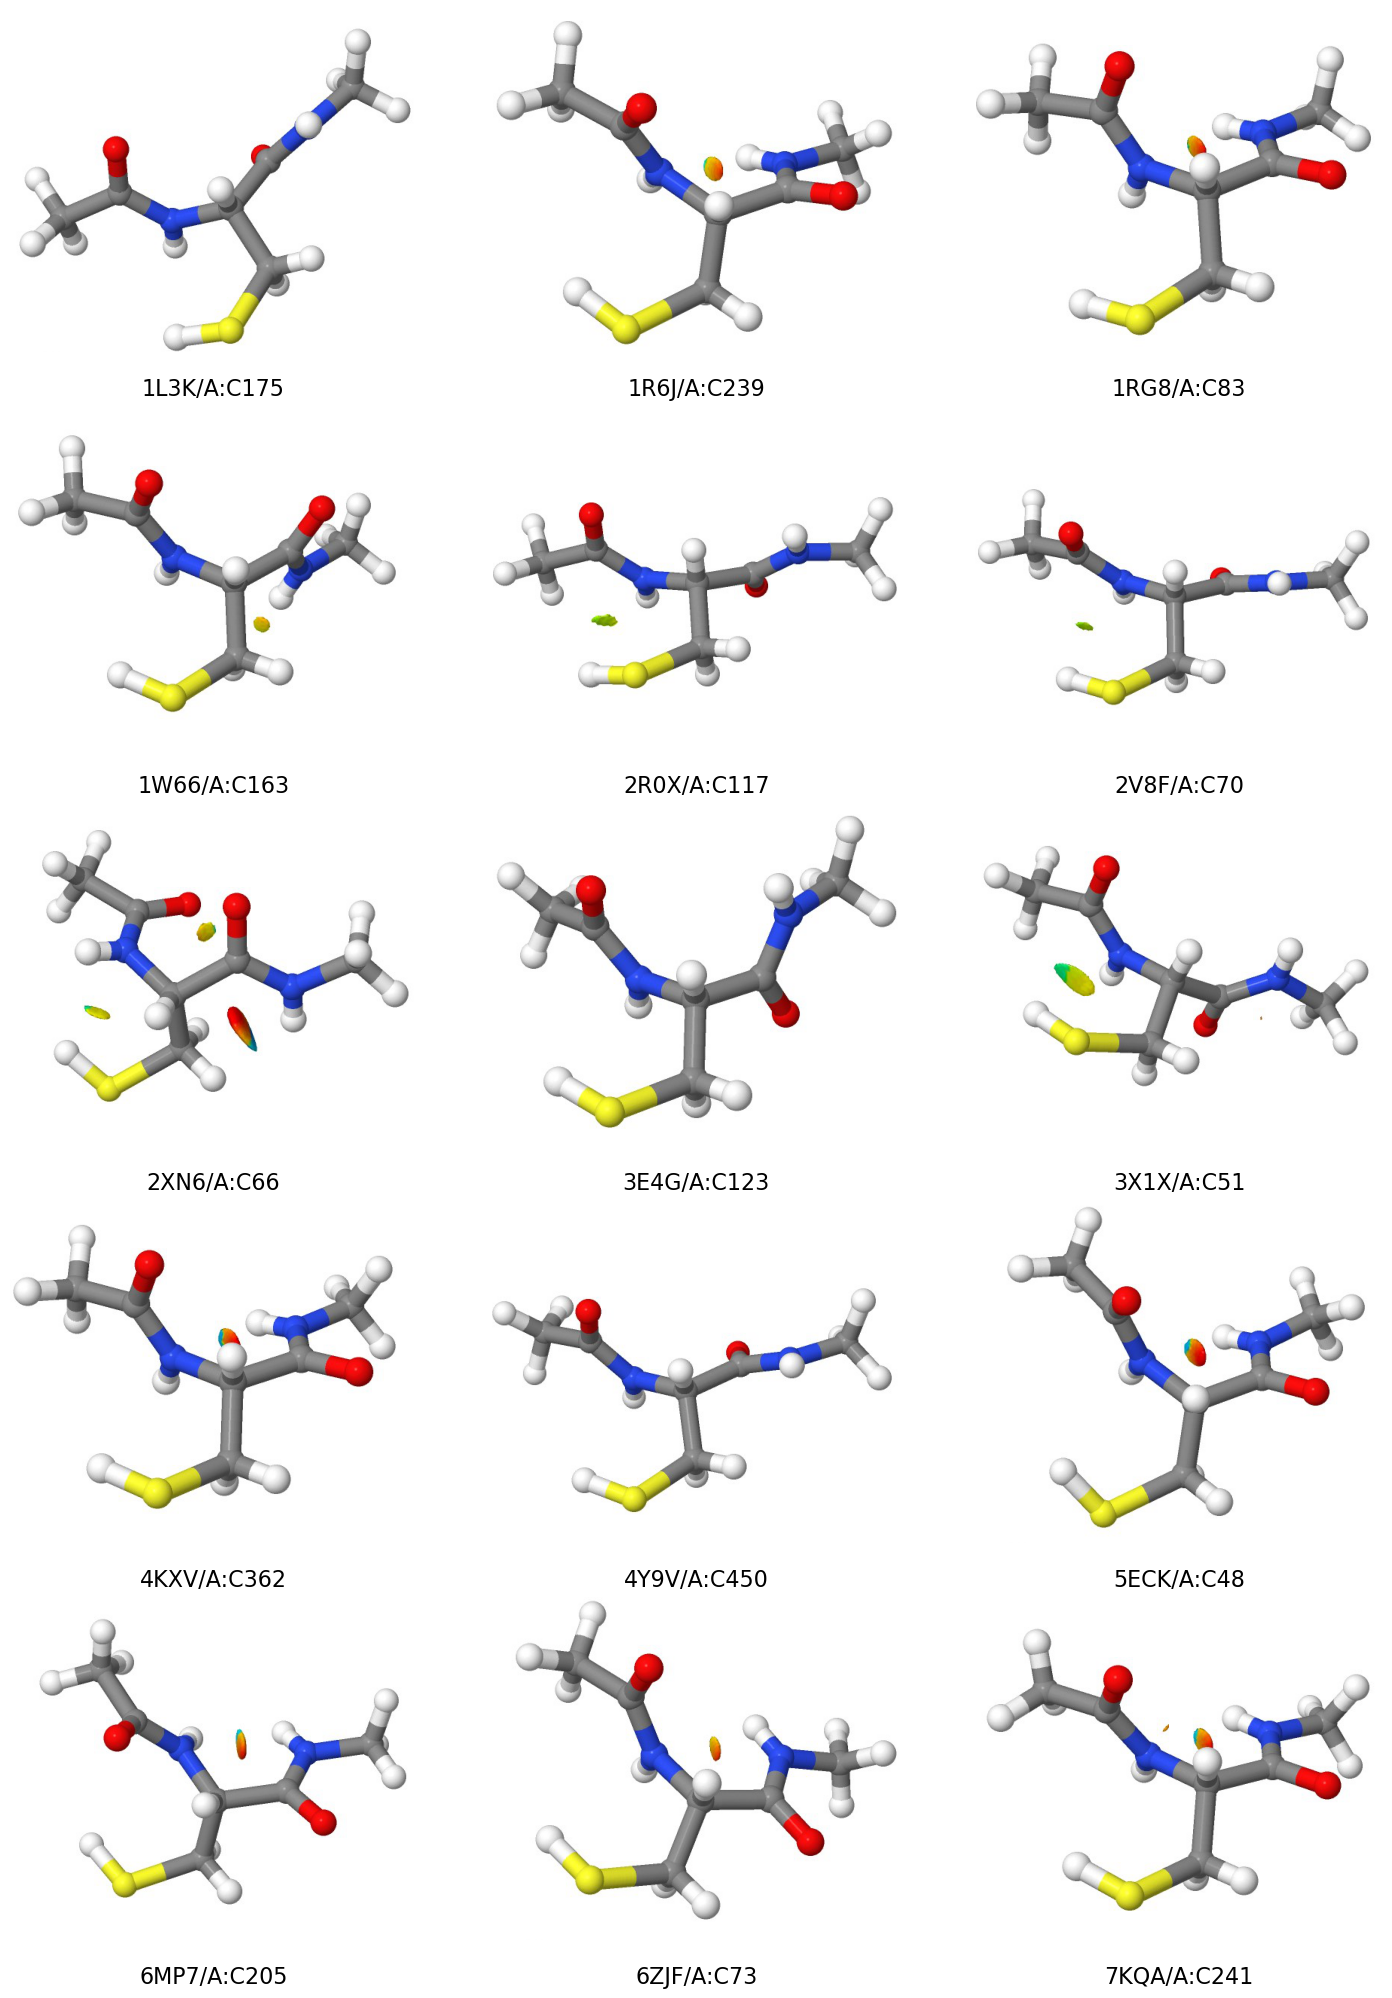

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

#^###############################################################################
#^ Choose the correct path for image files:
#^###############################################################################
# folder_path    = "D:\\qm_systems\\SHO_and_OHO_hbonds\\unoptimized\\NCI plots\\system_files_SELFCONT_CYS_mainchainO_CH3CO_CYS_NHCH3\\systems_taken_for_chi1_variant_analysis\\" #&##### choose the correct path here
# folder_path    = "D:\\qm_systems\\SHO_and_OHO_hbonds\\unoptimized\\NCI plots\\system_files_SELFCONT_SER_mainchainO_CH3CO_SER_NHCH3\\systems_taken_for_chi1_variant_analysis\\"
# folder_path    = "D:\\qm_systems\\SHO_and_OHO_hbonds\\unoptimized\\NCI plots\\system_files_SELFCONT_THR_mainchainO_CH3CO_THR_NHCH3\\systems_taken_for_chi1_variant_analysis\\"
folder_path    = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\NCI plots\\system_files_SELFCONT_CYS_mainchainN_CH3CO_CYS_NHCH3\\systems_taken_for_chi1_variant_analysis\\"

#^###############################################################################
#^ Choose the image files that are present in the path but have to be excluded:
#^###############################################################################
# files_exclude  = os.listdir("D:\\qm_systems\\SHO_and_OHO_hbonds\\unoptimized\\NCI plots\\images which will go in main paper & not in supplementary\\") # it will be a list of images names which will be excluded from the plot

#^###############################################################################
#^ Create a list containing paths of all the relevant image files:
#^###############################################################################
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('jpg', 'png', 'jpeg'))] # grab the paths of all the image files
# image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if (f.endswith(('jpg', 'png', 'jpeg')) and f not in files_exclude)] # grab the paths of all the image files except the ones which will go in main paper

#^###############################################################################
#^ Create a list containing names to be used for images on the grid:
#^###############################################################################
images      = [Image.open(img) for img in image_files] # this list will be used as imput to place images on the grid
image_names = list()
for i in os.listdir(folder_path):
    if i[-4:] == ".jpg":
    # if i[-4:] == ".jpg" and i not in files_exclude: # uncomment this condition if you are using the "files_exclude" variable
        pdb_id     = i.split("_")[0]
        resname    = i.split("_")[2]
        resno      = i.split("_")[3]
        reschain   = i.split("_")[4]
        image_name = pdb_id + "/" + reschain + ":" + resname[0] + resno # the image name format will be: "1GWO/A:S100"
        image_names.append(image_name)
# print(image_names)

#^###############################################################################
#^ Create a figure for displaying the grid:
#^###############################################################################
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # "fig" is the figure & "axes" denotes a 2D numpy array having a shape of 5,3 i.e., (5 rows 3 columns) where each element of the array will represent an individual subplot
# print(axes)
axes = axes.flatten() # convert the 2D numpy array to a 1D array so that iteration over it is easier
# print(axes)

#^###############################################################################
#^ Loop through each axis and image:
#^###############################################################################
images = [Image.open(img) for img in image_files]    # this list will be used as input to place images on the grid
for ax, img, name in zip(axes, images, image_names): # "zip(axes, images, image_names)" will be a list containing 3-element tuples of lists of "axes", "images" & "image_names"
    ax.imshow(img)                                   # "ax.imshow()" is used to display an image in the part of the grid in the current iteration
    ax.set_title(name, fontsize = 16, y = -0.15)     # "ax.set_title()" i used to place caption for the image in the iteration "y = -0.15" ensures that caption is placed below the image
    ax.axis('off')                                   # hide the axes spines for each image

#^###############################################################################
#^ Remove any empty axes if there are fewer images than grid cells
#^###############################################################################
for ax in axes[len(images):]:
    ax.axis('off')

#^###############################################################################
#^ Generate the final output:
#^###############################################################################
plt.subplots_adjust(wspace=0.05, hspace=0.1) #adjust the spaces between the images 0.05
plt.tight_layout()
# plt.show()
plt.savefig("E:\\NCIplot_CYS_SHN.jpg")

In [34]:
%reset -f

## Where the grid consists of 1 row and 3 columns

In [56]:
%reset -f

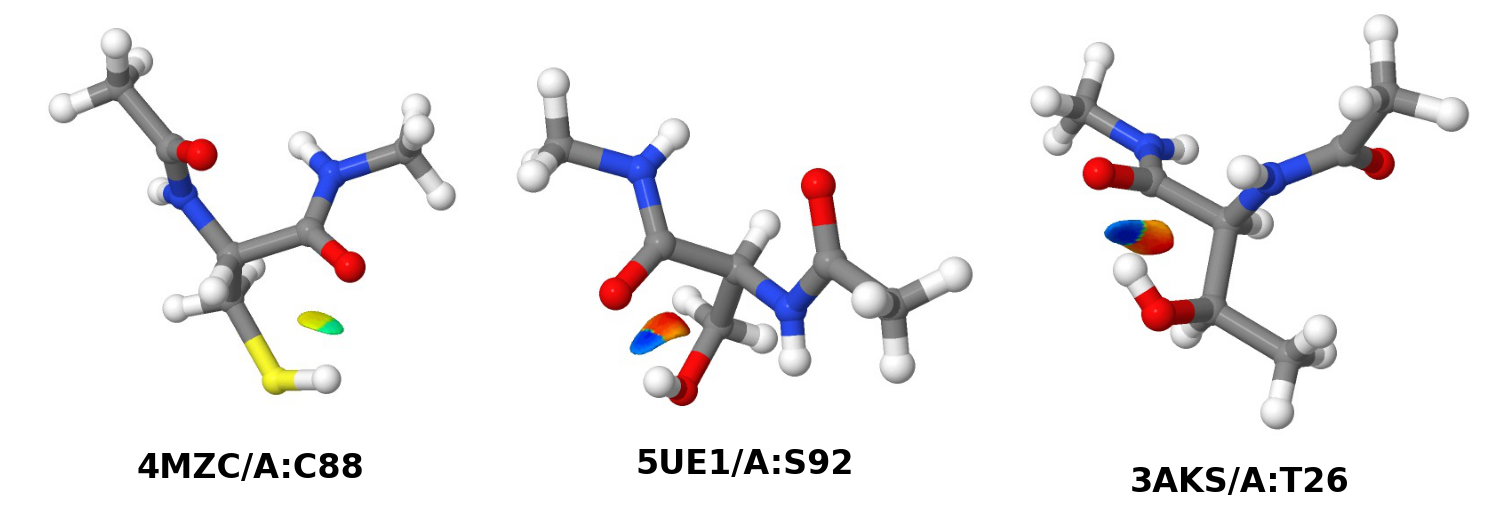

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

folder_path = "D:\\qm_systems\\SHO_and_OHO_hbonds\\unoptimized\\NCI plots\\images which will go in main paper & not in supplementary\\"
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('jpg', 'png', 'jpeg'))]
images      = [Image.open(img) for img in image_files] # this list will be used as input to place images on the grid
image_names = list()
for i in os.listdir(folder_path):
    if i[-4:] == ".jpg":
        pdb_id     = i.split("_")[0]
        resname    = i.split("_")[2]
        resno      = i.split("_")[3]
        reschain   = i.split("_")[4]
        image_name = pdb_id + "/" + reschain + ":" + resname[0] + resno
        image_names.append(image_name)
# print(image_names)

images      = [images[1], images[2], images[0]] # I re-ordered the list so that the new order will be CYS, SER, THR (re-ordering was required cuz alphabetically, the PDB ID of selected THR image was coming 1st, CYS 2nd & SER 3rd)
image_names = [image_names[1], image_names[2], image_names[0]]

# Create a figure for displaying the grid
fig, axes = plt.subplots(1, 3, figsize=(15, 20))  # "fig" is the figure & "axes" denotes a 2D numpy array having a shape of 1,3 i.e., (1 row 3 columns) where each element of the array will represent an individual subplot
# print(axes)
axes = axes.flatten() # convert the 2D numpy array to a 1D array so that iteration over it is easier
# print(axes)
labels = ['A', 'B', 'C']

# Loop through each axis and image
for ax, img, name, label in zip(axes, images, image_names, labels):   # "zip(axes, images, image_names)" will be a list containing 3-element tuples of lists of "axes", "images" & "image_names"
    ax.imshow(img)                                                    # "ax.imshow()" is used to display an image in the part of the grid in the current iteration
    ax.set_title(name, fontsize = 24, fontweight = 'bold', y = -0.15) # "ax.set_title()" i used to place caption for the image in the iteration "y = -0.15" ensures that caption is placed below the image
    # ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=24, fontweight='bold', color='black', backgroundcolor='white', ha='left', va='top')  # Add label at top-left
    ax.axis('off')                                                    # hide the axes spines for each image

# Remove any empty axes if there are fewer images than grid cells
for ax in axes[len(images):]:
    ax.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.1) #adjust the spaces between the images 0.05
plt.tight_layout()
# plt.show()
plt.savefig("E:\\NCIplot.jpg")

In [6]:
%reset -f

## Where the grid consists of 2 rows and 3 columns

NOTE: In some cases, you may have to use "Paint" software to manually increase the vertical space between two rows of images

### Step 1: Create the gridplots and save them as images

In [209]:
%reset -f

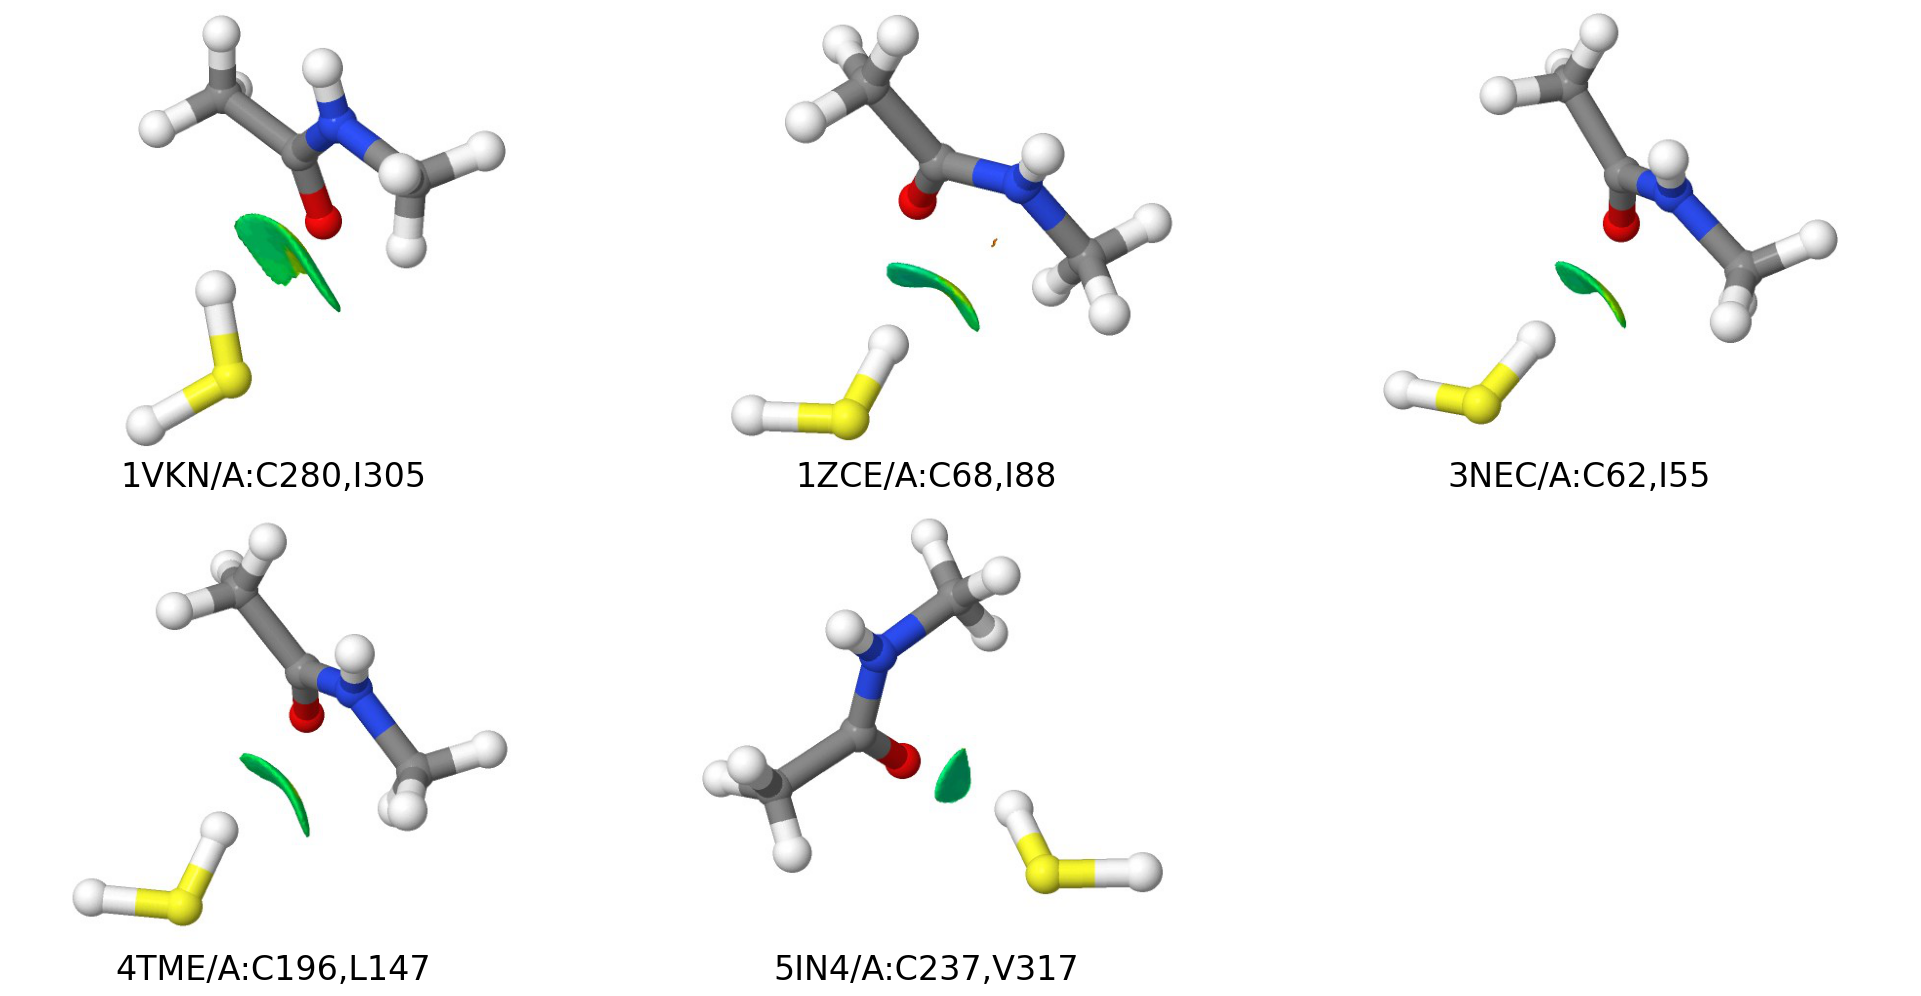

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

folder_path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\NCI plots\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_ch3sh\\"
# folder_path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\NCI plots\\system_files_NONSELFCONT_CYS_mainchainN_acetamide_h2s\\"
# folder_path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\NCI plots\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_ch3sh\\"
# folder_path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\NCI plots\\system_files_NONSELFCONT_CYS_mainchainN_methylacetamide_h2s\\"
# folder_path = "D:\\qm_systems\\SHN_and_OHN_hbonds\\pre_optimized\\NCI plots\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\"
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('jpg', 'png', 'jpeg'))]
# print(image_files)
images      = [Image.open(img) for img in image_files] # this list will be used as input to place images on the grid
# print(images)
# print(len(images))
image_names = list()

#^###############################################
#^ Create captions for each image in the grid:
#^###############################################
for i in os.listdir(folder_path):
    if i[-4:] == ".jpg":
        if "NONSELFCONT" not in folder_path:
            pdb_id     = i.split("_")[0]
            resname    = i.split("_")[2]
            resno      = i.split("_")[3]
            reschain   = i.split("_")[4][0] # if I don't use "[0]", the "+" symbol also gets included along with the chain ID
            image_name = pdb_id + "/" + reschain + ":" + resname[0] + resno # this will be the title of each image in the grid
            image_names.append(image_name)
        if "NONSELFCONT" in folder_path:    # for nonself contacts, the caption should also include the acceptor residue's info
            pdb_id     = i.split("_")[0]
            resname    = i.split("_")[2]
            resno      = i.split("_")[3]
            resname2   = i.split("_")[6]
            resno2     = i.split("_")[7]            
            reschain   = i.split("_")[4][0]
            image_name = pdb_id + "/" + reschain + ":" + resname[0] + resno + "," + resname2[0] + resno2 
            image_names.append(image_name)
# print(image_names)
# print(len(image_names))

#^######################################################
#^ CREATE THE GRID AND A PICTURE TO PLACE THE GRID ON:
#^######################################################
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # "fig" is the figure & "axes" denotes a 2D numpy array having a shape of 2,3 i.e., (2 rows 3 columns) where each element of the array will represent an individual subplot
# print(axes)
axes = axes.flatten()                             # convert the 2D numpy array to a 1D array so that iteration over it is easier
# print(axes)

#^###############################################################
#^ Loop through each axis of the grid and place images on it:
#^###############################################################
ctr = 0
for ax, img, name in zip(axes, images, image_names): # "zip(axes, images, image_names)" will be a list containing 3-element tuples of lists of "axes", "images" & "image_names"
    ctr += 1
    caption_distance = 0.01 if ctr >= 4 else 0.10    # it just so happened that for the "NONSELFCONT_CYS_mainchainN_acetamide_ch3sh" case, the 4th and 5th images in the 2x3 grid were oriented in such a way that their captions were touching them so I added this condition so that their captions will be placed further below relative to first 3 images
    ax.imshow(img)                                   # "ax.imshow()" is used to display an image in the part of the grid in the current iteration
    ax.set_title(                                    # "ax.set_title()" is used to place caption for the image in the iteration 
        name, 
        fontsize   = 24, 
        fontweight = 'regular', 
        y = -0.10,                                    # it controls the vertical position of the captions (use this line if all the captions are properly aligned with the images, else use the "caption_distance" line)
        # y = caption_distance,                      
        )
    ax.axis('off')                                   # hide the axes spines for each image

#^######################################################################
#^ Remove any empty axes if there are fewer images than grid cells:
#^######################################################################
for ax in axes[len(images):]:
    ax.axis('off')

plt.subplots_adjust(wspace = 0.05, hspace = 0.05) #&##### adjust the horizontal and vertical spaces respectively between the images (sometimes vertical space function doesn't work no matter how much you increase the value so in such cases, you paint to manually increase the distances)
plt.tight_layout()
# plt.show()
plt.savefig("D:\\" + folder_path.split("\\")[-2] + ".jpg")

In [202]:
%reset -f

### Step 2: Open each gridplot in MS paint, cut the resname and resno info from the caption and place it beside the respective atoms

# Convert gaussian log files to pdb files using pyautogui (ensure that there are no error termination log files in the folder and that the VS code window is on the left monitor, given you are using a dual monitor setup)

In [243]:
%reset -f

In [244]:
import os
import subprocess
import time
import pyautogui
import pygetwindow as gw

#^###########################################################
#^ Open gaussian:
#^###########################################################
process_gview = "C:\\g16w\\gview.exe"
p1 = subprocess.Popen(process_gview)
time.sleep(5) #&##### I have added such a long time of sleep because sometimes the gaussian main window launches as minimized. In such cases you will need time to manually click on it and maximize it

#^###########################################################
#^ Close any opened molecules:
#^###########################################################
windows = gw.getAllTitles() # it contains info on ALL the windowed applications
for title in windows:
    if title.strip() and "GaussView" in title.strip():
        gw.getWindowsWithTitle(title)[0].activate() # activate the window whose name starts with "GaussView"
        pyautogui.hotkey("ctrl", "f4")
        time.sleep(0.5)

#^###########################################################
#^ Convert log files to pdb files, one file at a time:
#^###########################################################
path = "C:\\Users\\Prathvi\\Downloads\\AAAA\\selfcont\\" #&##### this folder should contain only the desired log files. Use exactly this path, else the code will crash
for logfile in os.listdir(path):
    if logfile[-4:] == ".log":
        input_file_path  = path + logfile
        output_file_path = path + logfile[0:len(logfile) - 4] + ".pdb"
        pyautogui.hotkey("ctrl", "o")
        time.sleep(1)
        for j in range(1, 11 + 1): 
            pyautogui.press("tab")
        time.sleep(0.5)
        pyautogui.typewrite(path)
        pyautogui.press("enter")

        time.sleep(0.5)
        for j in range(1, 8 + 1): 
            pyautogui.press("tab")
        time.sleep(0.5)
        pyautogui.typewrite(input_file_path)
        time.sleep(0.5)
        pyautogui.press("enter")
        time.sleep(0.5)
        pyautogui.hotkey("ctrl", "s")
        time.sleep(0.5)
        pyautogui.hotkey("ctrl", "a")
        time.sleep(0.5)
        pyautogui.press("delete")
        pyautogui.typewrite(output_file_path)
        time.sleep(0.5)
        pyautogui.press("tab")
        time.sleep(0.5)
        pyautogui.press("space")
        time.sleep(0.5)
        pyautogui.press("down")
        time.sleep(0.5)
        pyautogui.press("down")
        time.sleep(0.5)
        pyautogui.press("enter")
        time.sleep(0.5)
        pyautogui.press("enter")
        time.sleep(0.5)
        pyautogui.hotkey("ctrl", "f4")

In [240]:
%reset -f

# Calculate the distance between O-atom and H-atom bonded to the -SH group for model systems corresponding to pre-optimized and post-optimized structures

In [259]:
%reset -f

In [260]:
from Bio.PDB import *
import os
import pandas as pd
import numpy as np
import sys
sys.path.append("G:\\My Drive\\python scripts and parameters\\")
import range_to_table
import importlib
importlib.reload(range_to_table)

# path              = "C:\\Users\\Prathvi\\Downloads\\AAAA\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\" #&###### this folder should contain both pre-optimized structures and their corresponding partially optimized structures
path              = "D:\\qm_systems\\SHN_and_OHN_hbonds\\partially_optimized\\sidechain_hg_atom_only\\Pre optimized pdb files and their corresponding partially optimized pdb files\\system_files_SELFCONT_CYS_mainchainN_acetamide_h2s\\b3lyp_6311g_2d2p\\"
# output_excel_file = path + "HG_O_and_HG_N_distances_" + path.split("\\")[-2] + ".xlsx"
output_excel_file = path + "HG_O_and_HG_N_distances_" + path.split("\\")[-3] + ".xlsx"
pdbparser         = PDBParser(PERMISSIVE = 1, QUIET = True)
dictdata          = dict()

#^#############################################################################################
#^ Grab the pre-optimized HG_O and HG_N distances from pre-optimized structures:
#^#############################################################################################
for pdb_file in os.listdir(path):
    if pdb_file[-4:] == ".pdb" and "optimization" not in pdb_file:
        print("processing", pdb_file)
        resinfo    = pdb_file.split("_donaccep.pdb")[0]
        structure  = pdbparser.get_structure("protein", path + pdb_file)
        atoms      = structure.get_atoms()
        dict_atoms = {"O": None, "N" : None, "HG" : None}
        for atom in atoms:
            if atom.get_name() in dict_atoms.keys():
                dict_atoms[atom.get_name()] = atom
        dist_HG_O = np.linalg.norm(np.array(dict_atoms["HG"].get_coord()) - np.array(dict_atoms["O"].get_coord()))
        dist_HG_N = np.linalg.norm(np.array(dict_atoms["HG"].get_coord()) - np.array(dict_atoms["N"].get_coord()))
        dist_HG_O = round(float(dist_HG_O), 1)
        dist_HG_N = round(float(dist_HG_N), 1)
        dictdata.setdefault("Resinfo",                  []).append(resinfo)
        dictdata.setdefault("HG_O distance (PRE-OPT)",  []).append(dist_HG_O)
        dictdata.setdefault("HG_N distance (PRE-OPT)",  []).append(dist_HG_N)
        dictdata.setdefault("HG_O distance (POST-OPT)", []).append("PLACEHOLDER") # for every pre-optimized structure, the entry "PLACEHOLDER" will be there in the post-opt distance columns (these will be replaced by the next piece of code)
        dictdata.setdefault("HG_N distance (POST-OPT)", []).append("PLACEHOLDER")

#^#############################################################################################
#^ Then grab the post-optimized HG_O and HG_N distances from post-optimized structures:
#^#############################################################################################
for pdb_file in os.listdir(path):
    if pdb_file[-4:] == ".pdb" and "optimization" in pdb_file:
        print("processing", pdb_file)
        resinfo    = pdb_file.split("_donaccep_optimization_query_output.pdb")[0]
        structure  = pdbparser.get_structure("protein", path + pdb_file)
        atoms      = structure.get_atoms()
        dict_atoms = {"O": None, "N" : None, "HG" : None}
        for atom in atoms:
            if atom.get_name() in dict_atoms.keys():
                dict_atoms[atom.get_name()] = atom
        dist_HG_O = np.linalg.norm(np.array(dict_atoms["HG"].get_coord()) - np.array(dict_atoms["O"].get_coord()))
        dist_HG_N = np.linalg.norm(np.array(dict_atoms["HG"].get_coord()) - np.array(dict_atoms["N"].get_coord()))
        dist_HG_O = round(float(dist_HG_O), 1)
        dist_HG_N = round(float(dist_HG_N), 1)
        #^#####################################################################################################################################################################################
        #^ Once the distances have been grabbed, search for the row correspondig to the system name and replace the term "PLACEHOLDER" in the post-opt columns with the post-opt distances:
        #^#####################################################################################################################################################################################
        for i in dictdata["Resinfo"]:
            if resinfo == i:
                index = dictdata["Resinfo"].index(i)
        dictdata["HG_O distance (POST-OPT)"][index] = dist_HG_O
        dictdata["HG_N distance (POST-OPT)"][index] = dist_HG_N

df1 = pd.DataFrame(dictdata)
df2 = df1[["HG_O distance (PRE-OPT)", "HG_O distance (POST-OPT)"]]
df3 = df1[["HG_N distance (PRE-OPT)", "HG_N distance (POST-OPT)"]]
with pd.ExcelWriter(path = output_excel_file, engine = "xlsxwriter") as writer:
    df1.to_excel(writer, sheet_name = "Sheet1", index = False, na_rep = "NA")
    df2.to_excel(writer, sheet_name = "HG_O",   index = False, na_rep = "NA")
    df3.to_excel(writer, sheet_name = "HG_N",   index = False, na_rep = "NA")
range_to_table.range_to_table(output_excel_file)

processing 1BKB_SG_CYS_30_A+_N_CYS_30_A_donaccep.pdb
processing 1C1D_SG_CYS_238_A+_N_CYS_238_A_donaccep.pdb
processing 1ES5_SG_CYS_223_A+_N_CYS_223_A_donaccep.pdb
processing 1EU1_SG_CYS_12_A+_N_CYS_12_A_donaccep.pdb
processing 1EVL_SG_CYS_361_A+_N_CYS_361_A_donaccep.pdb
processing 1EVL_SG_CYS_480_A+_N_CYS_480_A_donaccep.pdb
processing 1F0Y_SG_CYS_199_A+_N_CYS_199_A_donaccep.pdb
processing 1H16_SG_CYS_419_A+_N_CYS_419_A_donaccep.pdb
processing 1JG8_SG_CYS_206_A+_N_CYS_206_A_donaccep.pdb
processing 1K7J_SG_CYS_69_A+_N_CYS_69_A_donaccep.pdb
processing 1KHI_SG_CYS_53_A+_N_CYS_53_A_donaccep.pdb
processing 1L3K_SG_CYS_175_A+_N_CYS_175_A_donaccep.pdb
processing 1NTH_SG_CYS_218_A+_N_CYS_218_A_donaccep.pdb
processing 1PJX_SG_CYS_119_A+_N_CYS_119_A_donaccep.pdb
processing 1QTS_SG_CYS_902_A+_N_CYS_902_A_donaccep.pdb
processing 1R6J_SG_CYS_239_A+_N_CYS_239_A_donaccep.pdb
processing 1R6W_SG_CYS_110_A+_N_CYS_110_A_donaccep.pdb
processing 1RG8_SG_CYS_83_A+_N_CYS_83_A_donaccep.pdb
processing 1TWD_SG_C

In [250]:
%reset -f

# Check out of all the chalcogen bond examples <font color="red"> where acceptor atom in mainchain O & DA distance is <=5A</font>, for how many examples the system got created

In [1]:
%reset -f

In [2]:
import pandas as pd
import os

path_files = "D:\\qm_systems\\Chalcogen_bonds\\CYS\\pre_optimized\\system_files_CH3SH_HCHO\\with_bsse_correction\\DFT_D3_TPSSTPSS_def2TZVPP\\hadded_files_where_SO_distance_is_minimum\\"
# path_files = "D:\\qm_systems\\Chalcogen_bonds\\MET\\pre_optimized\\system_files_CH3_S_CH3_and_HCHO\\hadded files all single model\\"

df1 = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds CYS.xlsx", sheet_name = "Instances DA occup one 5A")
# df1 = pd.read_excel("D:\\PhD Work\\Project 02 Selenium H-bonds & chalcogen bonds\\20210302\\files_excel\\Chalcogen_bonds\\Chalcogen bonds MET.xlsx", sheet_name = "Instances DA occup one 5A")
df1 = df1[df1["Acceptor atom"] == "O"]

ctr = 0
for i in df1.itertuples():
    pdb_id         = df1.at[i[0],     "Donor PDB ID"]
    donor_atom     = df1.at[i[0],     "Donor atom"]
    donor_resname  = df1.at[i[0],     "Donor resname"]
    donor_resno    = str(df1.at[i[0], "Donor resno"])
    donor_reschain = df1.at[i[0],     "Donor reschain"]
    accep_atom     = df1.at[i[0],     "Acceptor atom"]
    accep_resname  = df1.at[i[0],     "Acceptor resname"]
    accep_resno    = str(df1.at[i[0], "Acceptor resno"])
    accep_reschain = df1.at[i[0],     "Acceptor reschain"]
    example_info   = pdb_id + "_" + donor_atom + "_" + donor_resname + "_" + donor_resno + "_" + donor_reschain + "+_" + accep_atom + "_" + accep_resname + "_" + accep_resno + "_" + accep_reschain + "_donaccep.pdb"
    # print(example_info)
    for file in os.listdir(path_files):
        if file == example_info:
            ctr += 1

print("systems were created for:", ctr, "/", len(df1))

systems were created for: 226 / 1241


In [ ]:
%reset -f

In [ ]:
import os

path = 
for i in os.listdir(path):
    for j in os.listdir(path + i + "\\"):